In [1]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(['quality'], axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)

In [5]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
925             8.6             0.220         0.36             1.9      0.064   
363            12.5             0.460         0.63             2.0      0.071   
906             7.2             0.540         0.27             2.6      0.084   
426             6.4             0.670         0.08             2.1      0.045   
1251            7.5             0.580         0.14             2.2      0.077   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
925                  53.0                  77.0  0.99604  3.47       0.87   
363                   6.0                  15.0  0.99880  2.99       0.87   
906                  12.0                  78.0  0.99640  3.39       0.71   
426                  19.0                  48.0  0.99490  3.49       0.49   
1251                 27.0                  60.0  0.99630  3.28       0.59   
...                   ...                   ...      ...   ...        ...   
1130                  5.0                  10.0  0.99770  3.18       0.63   
1294                 25.0                  60.0  0.99638  3.29       0.75   
860                  15.0                  85.0  0.99746  3.51       0.54   
1459                  7.0                  15.0  0.99458  3.32       0.80   
1126                  3.0                  11.0  0.99150  3.39       0.54   

      alcohol  
925      11.0  
363      10.2  
906      11.0  
426      11.4  
1251      9.8  
...       ...  
1130     10.4  
1294     10.9  
860       9.5  
1459     11.9  
1126     13.5  

[1119 rows x 11 columns]

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier()
BC= BaggingClassifier(n_estimators = 100, random_state=RANDOM_STATE)
RFC = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_STATE)

DTC.fit(X_train, y_train)
BC.fit(X_train, y_train)
RFC.fit(X_train, y_train)

acc_DT = accuracy_score(y_test, DTC.predict(X_test))
acc_Bagging = accuracy_score(y_test, BC.predict(X_test))
acc_RF = accuracy_score(y_test, RFC.predict(X_test))

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
results

model   task  accuracy
0  DecisionTreeClassifier  task2  0.564583
1      BaggingClassifier   task2  0.641667
2  RandomForestClassifier  task2  0.654167

После выполнения задания, можно сделать вывод, что наилучший результат показал классификатор RandomForestClassifier со 100 деревьями, показав точность 0.654167

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [12]:
n_estimators = [10, 50, 100] +[int(i) for i in range(200,5001,200)]
acc_dict = {}
for i in n_estimators:
    RFC = RandomForestClassifier(n_estimators = i, random_state=RANDOM_STATE)
    RFC.fit(X_train, y_train)
    acc_RF = accuracy_score(y_test, RFC.predict(X_test))
    acc_dict[i]=acc_RF

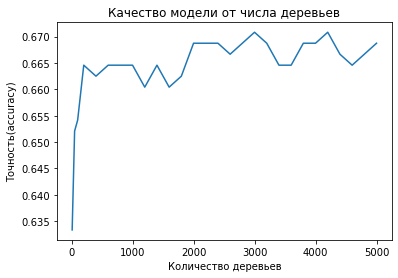

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(acc_dict.keys()), list(acc_dict.values()))
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность(accuracy)')
ax.set_title('Качество модели от числа деревьев')
plt.show()

In [14]:
conda install -c conda-forge py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tsvet\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    py-xgboost-1.7.3           |   py39haa95532_0         197 KB
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         pkgs/main/win-64::libxgboost-1.7.3-hd77b12b_0 
  py-xgboost         pkgs/main/win-64::py-xgboost-1.7.3-py39haa95532_0 

The following packages wil



==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0




4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

GBC = GradientBoostingClassifier(random_state=RANDOM_STATE)
XGBC = XGBClassifier(random_state=RANDOM_STATE)

acc_sklearn = cross_val_score(GBC, X, y, scoring='accuracy').mean()
acc_xgboost = cross_val_score(XGBC, X, y, scoring='accuracy').mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4

In [27]:
#необходимо для работы xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_tr = le.fit_transform(y_train)
y_tr = le.transform(y)

GBC = GradientBoostingClassifier(random_state=RANDOM_STATE)
XGBC = XGBClassifier(random_state=RANDOM_STATE)

acc_sklearn = cross_val_score(GBC, X, y, scoring='accuracy').mean()
acc_xgboost = cross_val_score(XGBC, X, y_tr, scoring='accuracy').mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
results

model   task  accuracy
0      DecisionTreeClassifier  task2  0.564583
1          BaggingClassifier   task2  0.641667
2      RandomForestClassifier  task2  0.654167
3  GradientBoostingClassifier  task4  0.565347
4               XGBClassifier  task4  0.547234

После выполнения задания, можно сделать вывод, что все также наилучший результат показывает классификатор RandomForestClassifier со 100 деревьями, показав точность 0.654167. Если сравнивать классификаторы из этого задания, что лучше работает GradientBoostingClassifier

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.001, 0.01, 0.1],
          'n_estimators': [100, 200, 500],
          'max_depth': [5, 10, 50]}

GSCV_GBC = GridSearchCV(GBC, params, cv=3)
GSCV_GBC.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [30]:
acc_sklearn_cv = accuracy_score(y_test, GSCV_GBC.predict(X_test))
acc_sklearn_cv

0.63125

In [31]:
best_params_sklearn = GSCV_GBC.best_params_
print('Параметры лучшей модели sklearn:\\n', best_params_sklearn)

Параметры лучшей модели sklearn:\n {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [33]:
GSCV_XGBC = GridSearchCV(XGBC, params, cv=3)
GSCV_XGBC.fit(X_train, y_train_tr)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_le

In [36]:
y_test_tr = le.transform(y_test)
acc_xgboost_cv = accuracy_score(y_test_tr, GSCV_XGBC.predict(X_test))
acc_xgboost_cv

0.6666666666666666

In [35]:
best_params_xgboost = GSCV_XGBC.best_params_
print('Параметры лучшей модели xgboost:\\n', best_params_xgboost)

Параметры лучшей модели xgboost:\n {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [37]:
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]
results

model   task  accuracy
0         DecisionTreeClassifier  task2  0.564583
1             BaggingClassifier   task2  0.641667
2         RandomForestClassifier  task2  0.654167
3     GradientBoostingClassifier  task4  0.565347
4                  XGBClassifier  task4  0.547234
5  GradientBoostingClassifier_CV  task5  0.631250
6               XGBClassifier_CV  task5  0.666667

После выполнения задания, можно сделать вывод, что градиентный бустинг библиотеки xgboost дает более высокое качество модели и имеет меньшеее время обучения, по сравнению с градиентным бустингом библиотеки sklearn.

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

acc_lightgbm = cross_val_score(LGBMClassifier(), X, y, scoring='accuracy').mean()
acc_catboost = cross_val_score(CatBoostClassifier(), X, y, scoring='accuracy').mean()

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

Learning rate set to 0.080126
0:	learn: 1.6829142	total: 159ms	remaining: 2m 39s
1:	learn: 1.5940547	total: 179ms	remaining: 1m 29s
2:	learn: 1.5175367	total: 200ms	remaining: 1m 6s
3:	learn: 1.4573818	total: 219ms	remaining: 54.5s
4:	learn: 1.3986323	total: 233ms	remaining: 46.5s
5:	learn: 1.3493535	total: 245ms	remaining: 40.5s
6:	learn: 1.3018142	total: 257ms	remaining: 36.4s
7:	learn: 1.2635278	total: 267ms	remaining: 33.1s
8:	learn: 1.2288350	total: 277ms	remaining: 30.5s
9:	learn: 1.1965165	total: 288ms	remaining: 28.5s
10:	learn: 1.1667856	total: 298ms	remaining: 26.8s
11:	learn: 1.1415420	total: 308ms	remaining: 25.4s
12:	learn: 1.1189592	total: 319ms	remaining: 24.2s
13:	learn: 1.0971406	total: 329ms	remaining: 23.1s
14:	learn: 1.0774057	total: 339ms	remaining: 22.2s
15:	learn: 1.0589907	total: 349ms	remaining: 21.5s
16:	learn: 1.0444871	total: 359ms	remaining: 20.8s
17:	learn: 1.0287948	total: 369ms	remaining: 20.2s
18:	learn: 1.0152259	total: 380ms	remaining: 19.6s
19:	learn

172:	learn: 0.5219469	total: 1.99s	remaining: 9.52s
173:	learn: 0.5204266	total: 2s	remaining: 9.52s
174:	learn: 0.5189848	total: 2.02s	remaining: 9.51s
175:	learn: 0.5173362	total: 2.03s	remaining: 9.49s
176:	learn: 0.5163165	total: 2.04s	remaining: 9.47s
177:	learn: 0.5144963	total: 2.05s	remaining: 9.46s
178:	learn: 0.5131795	total: 2.06s	remaining: 9.44s
179:	learn: 0.5115063	total: 2.07s	remaining: 9.42s
180:	learn: 0.5097465	total: 2.08s	remaining: 9.4s
181:	learn: 0.5074270	total: 2.09s	remaining: 9.38s
182:	learn: 0.5056929	total: 2.1s	remaining: 9.37s
183:	learn: 0.5045378	total: 2.11s	remaining: 9.35s
184:	learn: 0.5029112	total: 2.12s	remaining: 9.33s
185:	learn: 0.5018928	total: 2.13s	remaining: 9.31s
186:	learn: 0.5002399	total: 2.14s	remaining: 9.3s
187:	learn: 0.4983257	total: 2.15s	remaining: 9.28s
188:	learn: 0.4968606	total: 2.16s	remaining: 9.26s
189:	learn: 0.4947786	total: 2.17s	remaining: 9.24s
190:	learn: 0.4937663	total: 2.18s	remaining: 9.23s
191:	learn: 0.4926

344:	learn: 0.3291937	total: 3.78s	remaining: 7.17s
345:	learn: 0.3280922	total: 3.79s	remaining: 7.16s
346:	learn: 0.3276670	total: 3.8s	remaining: 7.15s
347:	learn: 0.3272057	total: 3.81s	remaining: 7.14s
348:	learn: 0.3264645	total: 3.82s	remaining: 7.13s
349:	learn: 0.3256591	total: 3.83s	remaining: 7.12s
350:	learn: 0.3248951	total: 3.84s	remaining: 7.1s
351:	learn: 0.3242439	total: 3.85s	remaining: 7.09s
352:	learn: 0.3238282	total: 3.86s	remaining: 7.08s
353:	learn: 0.3226601	total: 3.87s	remaining: 7.06s
354:	learn: 0.3221505	total: 3.88s	remaining: 7.05s
355:	learn: 0.3216054	total: 3.89s	remaining: 7.04s
356:	learn: 0.3210868	total: 3.9s	remaining: 7.03s
357:	learn: 0.3200036	total: 3.91s	remaining: 7.01s
358:	learn: 0.3189699	total: 3.92s	remaining: 7s
359:	learn: 0.3184600	total: 3.93s	remaining: 6.99s
360:	learn: 0.3174605	total: 3.94s	remaining: 6.98s
361:	learn: 0.3165319	total: 3.95s	remaining: 6.97s
362:	learn: 0.3160165	total: 3.96s	remaining: 6.95s
363:	learn: 0.3154

515:	learn: 0.2272005	total: 5.55s	remaining: 5.21s
516:	learn: 0.2268566	total: 5.56s	remaining: 5.2s
517:	learn: 0.2265057	total: 5.58s	remaining: 5.19s
518:	learn: 0.2260005	total: 5.59s	remaining: 5.18s
519:	learn: 0.2254782	total: 5.6s	remaining: 5.17s
520:	learn: 0.2248631	total: 5.61s	remaining: 5.16s
521:	learn: 0.2243349	total: 5.62s	remaining: 5.14s
522:	learn: 0.2236116	total: 5.63s	remaining: 5.13s
523:	learn: 0.2233167	total: 5.64s	remaining: 5.12s
524:	learn: 0.2227254	total: 5.65s	remaining: 5.11s
525:	learn: 0.2221492	total: 5.66s	remaining: 5.1s
526:	learn: 0.2217103	total: 5.67s	remaining: 5.09s
527:	learn: 0.2212635	total: 5.68s	remaining: 5.08s
528:	learn: 0.2210729	total: 5.69s	remaining: 5.07s
529:	learn: 0.2207763	total: 5.7s	remaining: 5.05s
530:	learn: 0.2200812	total: 5.71s	remaining: 5.04s
531:	learn: 0.2198323	total: 5.72s	remaining: 5.03s
532:	learn: 0.2194546	total: 5.73s	remaining: 5.02s
533:	learn: 0.2193246	total: 5.74s	remaining: 5.01s
534:	learn: 0.21

684:	learn: 0.1627173	total: 7.32s	remaining: 3.37s
685:	learn: 0.1623836	total: 7.33s	remaining: 3.36s
686:	learn: 0.1621042	total: 7.34s	remaining: 3.35s
687:	learn: 0.1618856	total: 7.36s	remaining: 3.34s
688:	learn: 0.1616498	total: 7.37s	remaining: 3.33s
689:	learn: 0.1613022	total: 7.38s	remaining: 3.31s
690:	learn: 0.1611822	total: 7.39s	remaining: 3.3s
691:	learn: 0.1608399	total: 7.4s	remaining: 3.29s
692:	learn: 0.1605741	total: 7.41s	remaining: 3.28s
693:	learn: 0.1603546	total: 7.42s	remaining: 3.27s
694:	learn: 0.1600637	total: 7.43s	remaining: 3.26s
695:	learn: 0.1598550	total: 7.44s	remaining: 3.25s
696:	learn: 0.1596532	total: 7.45s	remaining: 3.24s
697:	learn: 0.1595295	total: 7.46s	remaining: 3.23s
698:	learn: 0.1593516	total: 7.47s	remaining: 3.21s
699:	learn: 0.1589414	total: 7.48s	remaining: 3.2s
700:	learn: 0.1586259	total: 7.49s	remaining: 3.19s
701:	learn: 0.1582965	total: 7.5s	remaining: 3.18s
702:	learn: 0.1578856	total: 7.51s	remaining: 3.17s
703:	learn: 0.15

853:	learn: 0.1242543	total: 9.09s	remaining: 1.55s
854:	learn: 0.1241408	total: 9.1s	remaining: 1.54s
855:	learn: 0.1239785	total: 9.11s	remaining: 1.53s
856:	learn: 0.1236832	total: 9.12s	remaining: 1.52s
857:	learn: 0.1234699	total: 9.13s	remaining: 1.51s
858:	learn: 0.1232551	total: 9.14s	remaining: 1.5s
859:	learn: 0.1229762	total: 9.15s	remaining: 1.49s
860:	learn: 0.1227109	total: 9.16s	remaining: 1.48s
861:	learn: 0.1226465	total: 9.17s	remaining: 1.47s
862:	learn: 0.1226006	total: 9.18s	remaining: 1.46s
863:	learn: 0.1223791	total: 9.19s	remaining: 1.45s
864:	learn: 0.1222921	total: 9.2s	remaining: 1.44s
865:	learn: 0.1220869	total: 9.21s	remaining: 1.43s
866:	learn: 0.1219173	total: 9.22s	remaining: 1.41s
867:	learn: 0.1217439	total: 9.23s	remaining: 1.4s
868:	learn: 0.1216112	total: 9.24s	remaining: 1.39s
869:	learn: 0.1213982	total: 9.25s	remaining: 1.38s
870:	learn: 0.1212594	total: 9.26s	remaining: 1.37s
871:	learn: 0.1211169	total: 9.28s	remaining: 1.36s
872:	learn: 0.12

17:	learn: 1.0377472	total: 190ms	remaining: 10.4s
18:	learn: 1.0225451	total: 201ms	remaining: 10.4s
19:	learn: 1.0078182	total: 215ms	remaining: 10.5s
20:	learn: 0.9965059	total: 225ms	remaining: 10.5s
21:	learn: 0.9843890	total: 236ms	remaining: 10.5s
22:	learn: 0.9743925	total: 246ms	remaining: 10.5s
23:	learn: 0.9647185	total: 256ms	remaining: 10.4s
24:	learn: 0.9548957	total: 265ms	remaining: 10.3s
25:	learn: 0.9462032	total: 275ms	remaining: 10.3s
26:	learn: 0.9376687	total: 285ms	remaining: 10.3s
27:	learn: 0.9296853	total: 296ms	remaining: 10.3s
28:	learn: 0.9209638	total: 306ms	remaining: 10.3s
29:	learn: 0.9129251	total: 316ms	remaining: 10.2s
30:	learn: 0.9056664	total: 327ms	remaining: 10.2s
31:	learn: 0.8979119	total: 337ms	remaining: 10.2s
32:	learn: 0.8916454	total: 347ms	remaining: 10.2s
33:	learn: 0.8869213	total: 356ms	remaining: 10.1s
34:	learn: 0.8810770	total: 366ms	remaining: 10.1s
35:	learn: 0.8744360	total: 377ms	remaining: 10.1s
36:	learn: 0.8682777	total: 390

193:	learn: 0.5131928	total: 2.14s	remaining: 8.91s
194:	learn: 0.5120130	total: 2.15s	remaining: 8.9s
195:	learn: 0.5103172	total: 2.17s	remaining: 8.89s
196:	learn: 0.5092092	total: 2.18s	remaining: 8.88s
197:	learn: 0.5070948	total: 2.19s	remaining: 8.87s
198:	learn: 0.5054807	total: 2.2s	remaining: 8.85s
199:	learn: 0.5040213	total: 2.21s	remaining: 8.84s
200:	learn: 0.5027983	total: 2.22s	remaining: 8.82s
201:	learn: 0.5013220	total: 2.23s	remaining: 8.81s
202:	learn: 0.5001252	total: 2.24s	remaining: 8.79s
203:	learn: 0.4986913	total: 2.25s	remaining: 8.78s
204:	learn: 0.4970131	total: 2.26s	remaining: 8.76s
205:	learn: 0.4952727	total: 2.27s	remaining: 8.75s
206:	learn: 0.4938355	total: 2.28s	remaining: 8.73s
207:	learn: 0.4921756	total: 2.29s	remaining: 8.73s
208:	learn: 0.4907046	total: 2.3s	remaining: 8.72s
209:	learn: 0.4896275	total: 2.31s	remaining: 8.7s
210:	learn: 0.4886053	total: 2.33s	remaining: 8.7s
211:	learn: 0.4880005	total: 2.34s	remaining: 8.69s
212:	learn: 0.486

353:	learn: 0.3328392	total: 3.94s	remaining: 7.18s
354:	learn: 0.3323134	total: 3.95s	remaining: 7.17s
355:	learn: 0.3315295	total: 3.96s	remaining: 7.16s
356:	learn: 0.3305690	total: 3.97s	remaining: 7.15s
357:	learn: 0.3295395	total: 3.98s	remaining: 7.13s
358:	learn: 0.3286336	total: 3.99s	remaining: 7.12s
359:	learn: 0.3277383	total: 4s	remaining: 7.11s
360:	learn: 0.3270869	total: 4.01s	remaining: 7.1s
361:	learn: 0.3265736	total: 4.02s	remaining: 7.08s
362:	learn: 0.3261228	total: 4.03s	remaining: 7.07s
363:	learn: 0.3255540	total: 4.04s	remaining: 7.06s
364:	learn: 0.3249971	total: 4.05s	remaining: 7.05s
365:	learn: 0.3243581	total: 4.06s	remaining: 7.03s
366:	learn: 0.3238362	total: 4.07s	remaining: 7.02s
367:	learn: 0.3229424	total: 4.08s	remaining: 7.01s
368:	learn: 0.3224831	total: 4.09s	remaining: 7s
369:	learn: 0.3220838	total: 4.1s	remaining: 6.98s
370:	learn: 0.3214172	total: 4.11s	remaining: 6.97s
371:	learn: 0.3208930	total: 4.12s	remaining: 6.96s
372:	learn: 0.319859

522:	learn: 0.2280595	total: 5.7s	remaining: 5.2s
523:	learn: 0.2275436	total: 5.71s	remaining: 5.19s
524:	learn: 0.2268927	total: 5.73s	remaining: 5.18s
525:	learn: 0.2264518	total: 5.74s	remaining: 5.17s
526:	learn: 0.2256040	total: 5.75s	remaining: 5.16s
527:	learn: 0.2251739	total: 5.76s	remaining: 5.15s
528:	learn: 0.2248919	total: 5.77s	remaining: 5.14s
529:	learn: 0.2243926	total: 5.78s	remaining: 5.13s
530:	learn: 0.2237248	total: 5.8s	remaining: 5.12s
531:	learn: 0.2233128	total: 5.81s	remaining: 5.11s
532:	learn: 0.2228956	total: 5.82s	remaining: 5.1s
533:	learn: 0.2223221	total: 5.83s	remaining: 5.09s
534:	learn: 0.2218276	total: 5.84s	remaining: 5.08s
535:	learn: 0.2213394	total: 5.85s	remaining: 5.06s
536:	learn: 0.2208503	total: 5.86s	remaining: 5.05s
537:	learn: 0.2205819	total: 5.87s	remaining: 5.04s
538:	learn: 0.2201948	total: 5.88s	remaining: 5.03s
539:	learn: 0.2196190	total: 5.89s	remaining: 5.02s
540:	learn: 0.2194058	total: 5.9s	remaining: 5.01s
541:	learn: 0.218

690:	learn: 0.1672263	total: 7.47s	remaining: 3.34s
691:	learn: 0.1670397	total: 7.48s	remaining: 3.33s
692:	learn: 0.1667899	total: 7.49s	remaining: 3.32s
693:	learn: 0.1666048	total: 7.51s	remaining: 3.31s
694:	learn: 0.1663255	total: 7.52s	remaining: 3.3s
695:	learn: 0.1661594	total: 7.53s	remaining: 3.29s
696:	learn: 0.1657807	total: 7.54s	remaining: 3.28s
697:	learn: 0.1653123	total: 7.55s	remaining: 3.27s
698:	learn: 0.1650936	total: 7.56s	remaining: 3.25s
699:	learn: 0.1649033	total: 7.57s	remaining: 3.24s
700:	learn: 0.1646162	total: 7.58s	remaining: 3.23s
701:	learn: 0.1644578	total: 7.59s	remaining: 3.22s
702:	learn: 0.1642065	total: 7.6s	remaining: 3.21s
703:	learn: 0.1639282	total: 7.61s	remaining: 3.2s
704:	learn: 0.1636198	total: 7.62s	remaining: 3.19s
705:	learn: 0.1633852	total: 7.63s	remaining: 3.18s
706:	learn: 0.1629611	total: 7.64s	remaining: 3.17s
707:	learn: 0.1628098	total: 7.65s	remaining: 3.15s
708:	learn: 0.1626598	total: 7.66s	remaining: 3.14s
709:	learn: 0.1

862:	learn: 0.1263914	total: 9.28s	remaining: 1.47s
863:	learn: 0.1261372	total: 9.29s	remaining: 1.46s
864:	learn: 0.1258912	total: 9.3s	remaining: 1.45s
865:	learn: 0.1257261	total: 9.31s	remaining: 1.44s
866:	learn: 0.1254739	total: 9.32s	remaining: 1.43s
867:	learn: 0.1252815	total: 9.34s	remaining: 1.42s
868:	learn: 0.1250005	total: 9.35s	remaining: 1.41s
869:	learn: 0.1248487	total: 9.36s	remaining: 1.4s
870:	learn: 0.1247146	total: 9.37s	remaining: 1.39s
871:	learn: 0.1246235	total: 9.38s	remaining: 1.38s
872:	learn: 0.1244535	total: 9.39s	remaining: 1.36s
873:	learn: 0.1241815	total: 9.4s	remaining: 1.35s
874:	learn: 0.1240661	total: 9.41s	remaining: 1.34s
875:	learn: 0.1239151	total: 9.42s	remaining: 1.33s
876:	learn: 0.1237052	total: 9.43s	remaining: 1.32s
877:	learn: 0.1236060	total: 9.44s	remaining: 1.31s
878:	learn: 0.1233486	total: 9.45s	remaining: 1.3s
879:	learn: 0.1230123	total: 9.46s	remaining: 1.29s
880:	learn: 0.1228617	total: 9.47s	remaining: 1.28s
881:	learn: 0.12

25:	learn: 0.9581810	total: 271ms	remaining: 10.2s
26:	learn: 0.9486378	total: 282ms	remaining: 10.2s
27:	learn: 0.9392594	total: 294ms	remaining: 10.2s
28:	learn: 0.9320832	total: 304ms	remaining: 10.2s
29:	learn: 0.9253473	total: 314ms	remaining: 10.2s
30:	learn: 0.9189705	total: 325ms	remaining: 10.2s
31:	learn: 0.9112920	total: 335ms	remaining: 10.1s
32:	learn: 0.9045347	total: 345ms	remaining: 10.1s
33:	learn: 0.8971980	total: 355ms	remaining: 10.1s
34:	learn: 0.8907502	total: 365ms	remaining: 10.1s
35:	learn: 0.8861688	total: 375ms	remaining: 10.1s
36:	learn: 0.8799876	total: 386ms	remaining: 10s
37:	learn: 0.8753575	total: 395ms	remaining: 10s
38:	learn: 0.8716160	total: 405ms	remaining: 9.99s
39:	learn: 0.8669613	total: 415ms	remaining: 9.96s
40:	learn: 0.8626042	total: 425ms	remaining: 9.95s
41:	learn: 0.8578934	total: 436ms	remaining: 9.94s
42:	learn: 0.8539124	total: 447ms	remaining: 9.94s
43:	learn: 0.8502529	total: 457ms	remaining: 9.93s
44:	learn: 0.8474381	total: 469ms	r

198:	learn: 0.5151797	total: 2.07s	remaining: 8.32s
199:	learn: 0.5130580	total: 2.08s	remaining: 8.32s
200:	learn: 0.5124734	total: 2.09s	remaining: 8.31s
201:	learn: 0.5103534	total: 2.1s	remaining: 8.3s
202:	learn: 0.5093462	total: 2.11s	remaining: 8.29s
203:	learn: 0.5076391	total: 2.12s	remaining: 8.28s
204:	learn: 0.5070853	total: 2.13s	remaining: 8.27s
205:	learn: 0.5059308	total: 2.14s	remaining: 8.26s
206:	learn: 0.5041469	total: 2.15s	remaining: 8.24s
207:	learn: 0.5030379	total: 2.16s	remaining: 8.23s
208:	learn: 0.5012975	total: 2.17s	remaining: 8.22s
209:	learn: 0.5005378	total: 2.18s	remaining: 8.21s
210:	learn: 0.4983609	total: 2.19s	remaining: 8.2s
211:	learn: 0.4973621	total: 2.2s	remaining: 8.19s
212:	learn: 0.4967685	total: 2.21s	remaining: 8.18s
213:	learn: 0.4942741	total: 2.22s	remaining: 8.17s
214:	learn: 0.4927542	total: 2.23s	remaining: 8.16s
215:	learn: 0.4910335	total: 2.24s	remaining: 8.15s
216:	learn: 0.4888855	total: 2.25s	remaining: 8.14s
217:	learn: 0.48

372:	learn: 0.3325876	total: 3.87s	remaining: 6.51s
373:	learn: 0.3318717	total: 3.88s	remaining: 6.5s
374:	learn: 0.3307286	total: 3.9s	remaining: 6.49s
375:	learn: 0.3299494	total: 3.91s	remaining: 6.48s
376:	learn: 0.3292668	total: 3.92s	remaining: 6.47s
377:	learn: 0.3282993	total: 3.93s	remaining: 6.46s
378:	learn: 0.3275831	total: 3.94s	remaining: 6.45s
379:	learn: 0.3265345	total: 3.95s	remaining: 6.44s
380:	learn: 0.3259253	total: 3.96s	remaining: 6.43s
381:	learn: 0.3251244	total: 3.97s	remaining: 6.42s
382:	learn: 0.3245905	total: 3.98s	remaining: 6.41s
383:	learn: 0.3237266	total: 3.99s	remaining: 6.4s
384:	learn: 0.3228739	total: 4s	remaining: 6.39s
385:	learn: 0.3224123	total: 4.01s	remaining: 6.38s
386:	learn: 0.3215630	total: 4.02s	remaining: 6.37s
387:	learn: 0.3209681	total: 4.03s	remaining: 6.36s
388:	learn: 0.3206874	total: 4.04s	remaining: 6.34s
389:	learn: 0.3199924	total: 4.05s	remaining: 6.33s
390:	learn: 0.3191832	total: 4.06s	remaining: 6.33s
391:	learn: 0.3184

541:	learn: 0.2294658	total: 5.63s	remaining: 4.76s
542:	learn: 0.2288445	total: 5.64s	remaining: 4.75s
543:	learn: 0.2282715	total: 5.65s	remaining: 4.74s
544:	learn: 0.2279488	total: 5.66s	remaining: 4.73s
545:	learn: 0.2275779	total: 5.67s	remaining: 4.72s
546:	learn: 0.2273167	total: 5.68s	remaining: 4.71s
547:	learn: 0.2272691	total: 5.69s	remaining: 4.7s
548:	learn: 0.2264883	total: 5.7s	remaining: 4.69s
549:	learn: 0.2261485	total: 5.71s	remaining: 4.67s
550:	learn: 0.2256401	total: 5.72s	remaining: 4.67s
551:	learn: 0.2251746	total: 5.74s	remaining: 4.65s
552:	learn: 0.2247914	total: 5.75s	remaining: 4.64s
553:	learn: 0.2243590	total: 5.75s	remaining: 4.63s
554:	learn: 0.2240517	total: 5.76s	remaining: 4.62s
555:	learn: 0.2231724	total: 5.78s	remaining: 4.61s
556:	learn: 0.2228092	total: 5.79s	remaining: 4.6s
557:	learn: 0.2222206	total: 5.8s	remaining: 4.59s
558:	learn: 0.2216284	total: 5.81s	remaining: 4.58s
559:	learn: 0.2210912	total: 5.82s	remaining: 4.57s
560:	learn: 0.22

702:	learn: 0.1697112	total: 7.39s	remaining: 3.12s
703:	learn: 0.1694267	total: 7.4s	remaining: 3.11s
704:	learn: 0.1689780	total: 7.41s	remaining: 3.1s
705:	learn: 0.1685598	total: 7.42s	remaining: 3.09s
706:	learn: 0.1681804	total: 7.43s	remaining: 3.08s
707:	learn: 0.1680864	total: 7.44s	remaining: 3.07s
708:	learn: 0.1675916	total: 7.45s	remaining: 3.06s
709:	learn: 0.1671164	total: 7.46s	remaining: 3.05s
710:	learn: 0.1669131	total: 7.47s	remaining: 3.04s
711:	learn: 0.1666513	total: 7.49s	remaining: 3.03s
712:	learn: 0.1664042	total: 7.5s	remaining: 3.02s
713:	learn: 0.1662178	total: 7.5s	remaining: 3.01s
714:	learn: 0.1660786	total: 7.51s	remaining: 3s
715:	learn: 0.1659363	total: 7.53s	remaining: 2.98s
716:	learn: 0.1657754	total: 7.54s	remaining: 2.97s
717:	learn: 0.1655139	total: 7.54s	remaining: 2.96s
718:	learn: 0.1653241	total: 7.55s	remaining: 2.95s
719:	learn: 0.1652019	total: 7.57s	remaining: 2.94s
720:	learn: 0.1649729	total: 7.58s	remaining: 2.93s
721:	learn: 0.16462

874:	learn: 0.1309759	total: 9.35s	remaining: 1.33s
875:	learn: 0.1307956	total: 9.36s	remaining: 1.32s
876:	learn: 0.1306509	total: 9.37s	remaining: 1.31s
877:	learn: 0.1305489	total: 9.38s	remaining: 1.3s
878:	learn: 0.1304649	total: 9.39s	remaining: 1.29s
879:	learn: 0.1303623	total: 9.4s	remaining: 1.28s
880:	learn: 0.1302206	total: 9.42s	remaining: 1.27s
881:	learn: 0.1299746	total: 9.43s	remaining: 1.26s
882:	learn: 0.1298022	total: 9.44s	remaining: 1.25s
883:	learn: 0.1296813	total: 9.45s	remaining: 1.24s
884:	learn: 0.1293446	total: 9.46s	remaining: 1.23s
885:	learn: 0.1292115	total: 9.47s	remaining: 1.22s
886:	learn: 0.1288977	total: 9.48s	remaining: 1.21s
887:	learn: 0.1287449	total: 9.49s	remaining: 1.2s
888:	learn: 0.1286013	total: 9.5s	remaining: 1.19s
889:	learn: 0.1283478	total: 9.51s	remaining: 1.18s
890:	learn: 0.1281418	total: 9.52s	remaining: 1.17s
891:	learn: 0.1279239	total: 9.53s	remaining: 1.15s
892:	learn: 0.1277709	total: 9.55s	remaining: 1.14s
893:	learn: 0.12

34:	learn: 0.8782515	total: 429ms	remaining: 11.8s
35:	learn: 0.8723190	total: 441ms	remaining: 11.8s
36:	learn: 0.8671644	total: 453ms	remaining: 11.8s
37:	learn: 0.8618355	total: 465ms	remaining: 11.8s
38:	learn: 0.8563884	total: 477ms	remaining: 11.7s
39:	learn: 0.8513855	total: 487ms	remaining: 11.7s
40:	learn: 0.8474891	total: 499ms	remaining: 11.7s
41:	learn: 0.8416086	total: 510ms	remaining: 11.6s
42:	learn: 0.8383906	total: 521ms	remaining: 11.6s
43:	learn: 0.8337874	total: 532ms	remaining: 11.5s
44:	learn: 0.8297850	total: 542ms	remaining: 11.5s
45:	learn: 0.8260110	total: 552ms	remaining: 11.5s
46:	learn: 0.8222199	total: 563ms	remaining: 11.4s
47:	learn: 0.8190478	total: 573ms	remaining: 11.4s
48:	learn: 0.8157215	total: 583ms	remaining: 11.3s
49:	learn: 0.8115480	total: 593ms	remaining: 11.3s
50:	learn: 0.8076197	total: 604ms	remaining: 11.2s
51:	learn: 0.8045528	total: 615ms	remaining: 11.2s
52:	learn: 0.8015036	total: 625ms	remaining: 11.2s
53:	learn: 0.7980462	total: 641

199:	learn: 0.5212958	total: 2.2s	remaining: 8.82s
200:	learn: 0.5204984	total: 2.22s	remaining: 8.81s
201:	learn: 0.5177290	total: 2.23s	remaining: 8.81s
202:	learn: 0.5165313	total: 2.24s	remaining: 8.8s
203:	learn: 0.5148328	total: 2.25s	remaining: 8.8s
204:	learn: 0.5136346	total: 2.27s	remaining: 8.79s
205:	learn: 0.5123359	total: 2.28s	remaining: 8.78s
206:	learn: 0.5111955	total: 2.29s	remaining: 8.77s
207:	learn: 0.5097729	total: 2.3s	remaining: 8.77s
208:	learn: 0.5081185	total: 2.31s	remaining: 8.76s
209:	learn: 0.5067985	total: 2.33s	remaining: 8.75s
210:	learn: 0.5053257	total: 2.34s	remaining: 8.74s
211:	learn: 0.5037243	total: 2.35s	remaining: 8.72s
212:	learn: 0.5027484	total: 2.36s	remaining: 8.71s
213:	learn: 0.5013280	total: 2.37s	remaining: 8.7s
214:	learn: 0.5004925	total: 2.38s	remaining: 8.68s
215:	learn: 0.4988056	total: 2.39s	remaining: 8.67s
216:	learn: 0.4969703	total: 2.4s	remaining: 8.66s
217:	learn: 0.4958941	total: 2.41s	remaining: 8.65s
218:	learn: 0.4952

366:	learn: 0.3469563	total: 4.13s	remaining: 7.13s
367:	learn: 0.3456187	total: 4.14s	remaining: 7.12s
368:	learn: 0.3447314	total: 4.16s	remaining: 7.11s
369:	learn: 0.3440149	total: 4.17s	remaining: 7.1s
370:	learn: 0.3434785	total: 4.18s	remaining: 7.09s
371:	learn: 0.3419798	total: 4.19s	remaining: 7.08s
372:	learn: 0.3414747	total: 4.21s	remaining: 7.07s
373:	learn: 0.3410107	total: 4.22s	remaining: 7.06s
374:	learn: 0.3403813	total: 4.23s	remaining: 7.04s
375:	learn: 0.3397477	total: 4.24s	remaining: 7.04s
376:	learn: 0.3391482	total: 4.25s	remaining: 7.03s
377:	learn: 0.3384128	total: 4.26s	remaining: 7.01s
378:	learn: 0.3379937	total: 4.27s	remaining: 7s
379:	learn: 0.3371655	total: 4.29s	remaining: 6.99s
380:	learn: 0.3362487	total: 4.3s	remaining: 6.98s
381:	learn: 0.3352770	total: 4.31s	remaining: 6.97s
382:	learn: 0.3344230	total: 4.32s	remaining: 6.95s
383:	learn: 0.3333989	total: 4.33s	remaining: 6.94s
384:	learn: 0.3322101	total: 4.34s	remaining: 6.93s
385:	learn: 0.332

535:	learn: 0.2421542	total: 6.09s	remaining: 5.27s
536:	learn: 0.2417157	total: 6.1s	remaining: 5.26s
537:	learn: 0.2411773	total: 6.12s	remaining: 5.25s
538:	learn: 0.2409665	total: 6.13s	remaining: 5.24s
539:	learn: 0.2406759	total: 6.14s	remaining: 5.23s
540:	learn: 0.2404939	total: 6.15s	remaining: 5.22s
541:	learn: 0.2401646	total: 6.16s	remaining: 5.2s
542:	learn: 0.2394818	total: 6.17s	remaining: 5.19s
543:	learn: 0.2391505	total: 6.18s	remaining: 5.18s
544:	learn: 0.2388604	total: 6.19s	remaining: 5.17s
545:	learn: 0.2385778	total: 6.2s	remaining: 5.16s
546:	learn: 0.2383589	total: 6.21s	remaining: 5.14s
547:	learn: 0.2381355	total: 6.22s	remaining: 5.13s
548:	learn: 0.2376734	total: 6.24s	remaining: 5.12s
549:	learn: 0.2372765	total: 6.25s	remaining: 5.11s
550:	learn: 0.2363566	total: 6.26s	remaining: 5.1s
551:	learn: 0.2356971	total: 6.27s	remaining: 5.09s
552:	learn: 0.2354473	total: 6.28s	remaining: 5.08s
553:	learn: 0.2347176	total: 6.29s	remaining: 5.07s
554:	learn: 0.23

709:	learn: 0.1780538	total: 8.06s	remaining: 3.29s
710:	learn: 0.1778244	total: 8.07s	remaining: 3.28s
711:	learn: 0.1776754	total: 8.08s	remaining: 3.27s
712:	learn: 0.1774334	total: 8.09s	remaining: 3.26s
713:	learn: 0.1770884	total: 8.1s	remaining: 3.25s
714:	learn: 0.1769173	total: 8.11s	remaining: 3.23s
715:	learn: 0.1766318	total: 8.12s	remaining: 3.22s
716:	learn: 0.1764735	total: 8.13s	remaining: 3.21s
717:	learn: 0.1759966	total: 8.14s	remaining: 3.2s
718:	learn: 0.1755691	total: 8.15s	remaining: 3.19s
719:	learn: 0.1753032	total: 8.16s	remaining: 3.17s
720:	learn: 0.1750524	total: 8.17s	remaining: 3.16s
721:	learn: 0.1747502	total: 8.19s	remaining: 3.15s
722:	learn: 0.1743188	total: 8.2s	remaining: 3.14s
723:	learn: 0.1740617	total: 8.21s	remaining: 3.13s
724:	learn: 0.1738654	total: 8.22s	remaining: 3.12s
725:	learn: 0.1736081	total: 8.23s	remaining: 3.1s
726:	learn: 0.1733382	total: 8.24s	remaining: 3.09s
727:	learn: 0.1729396	total: 8.25s	remaining: 3.08s
728:	learn: 0.17

886:	learn: 0.1358100	total: 10s	remaining: 1.27s
887:	learn: 0.1355302	total: 10s	remaining: 1.26s
888:	learn: 0.1351971	total: 10s	remaining: 1.25s
889:	learn: 0.1350882	total: 10s	remaining: 1.24s
890:	learn: 0.1347795	total: 10s	remaining: 1.23s
891:	learn: 0.1346066	total: 10.1s	remaining: 1.22s
892:	learn: 0.1343648	total: 10.1s	remaining: 1.21s
893:	learn: 0.1341469	total: 10.1s	remaining: 1.19s
894:	learn: 0.1338056	total: 10.1s	remaining: 1.18s
895:	learn: 0.1334722	total: 10.1s	remaining: 1.17s
896:	learn: 0.1331183	total: 10.1s	remaining: 1.16s
897:	learn: 0.1330358	total: 10.1s	remaining: 1.15s
898:	learn: 0.1327982	total: 10.1s	remaining: 1.14s
899:	learn: 0.1326742	total: 10.1s	remaining: 1.13s
900:	learn: 0.1324709	total: 10.1s	remaining: 1.11s
901:	learn: 0.1323632	total: 10.2s	remaining: 1.1s
902:	learn: 0.1321881	total: 10.2s	remaining: 1.09s
903:	learn: 0.1320266	total: 10.2s	remaining: 1.08s
904:	learn: 0.1317781	total: 10.2s	remaining: 1.07s
905:	learn: 0.1315912	t

60:	learn: 0.7836375	total: 680ms	remaining: 10.5s
61:	learn: 0.7816715	total: 693ms	remaining: 10.5s
62:	learn: 0.7792629	total: 707ms	remaining: 10.5s
63:	learn: 0.7757492	total: 717ms	remaining: 10.5s
64:	learn: 0.7734034	total: 729ms	remaining: 10.5s
65:	learn: 0.7694694	total: 740ms	remaining: 10.5s
66:	learn: 0.7674405	total: 751ms	remaining: 10.5s
67:	learn: 0.7660702	total: 762ms	remaining: 10.4s
68:	learn: 0.7644363	total: 773ms	remaining: 10.4s
69:	learn: 0.7628087	total: 785ms	remaining: 10.4s
70:	learn: 0.7609360	total: 796ms	remaining: 10.4s
71:	learn: 0.7588778	total: 807ms	remaining: 10.4s
72:	learn: 0.7555879	total: 818ms	remaining: 10.4s
73:	learn: 0.7529876	total: 831ms	remaining: 10.4s
74:	learn: 0.7496469	total: 842ms	remaining: 10.4s
75:	learn: 0.7477003	total: 853ms	remaining: 10.4s
76:	learn: 0.7455917	total: 865ms	remaining: 10.4s
77:	learn: 0.7426493	total: 880ms	remaining: 10.4s
78:	learn: 0.7393812	total: 893ms	remaining: 10.4s
79:	learn: 0.7361627	total: 905

231:	learn: 0.4746938	total: 2.8s	remaining: 9.29s
232:	learn: 0.4733174	total: 2.82s	remaining: 9.29s
233:	learn: 0.4715002	total: 2.83s	remaining: 9.28s
234:	learn: 0.4707749	total: 2.84s	remaining: 9.26s
235:	learn: 0.4699260	total: 2.85s	remaining: 9.24s
236:	learn: 0.4687345	total: 2.86s	remaining: 9.22s
237:	learn: 0.4681602	total: 2.87s	remaining: 9.2s
238:	learn: 0.4664770	total: 2.89s	remaining: 9.19s
239:	learn: 0.4657819	total: 2.9s	remaining: 9.17s
240:	learn: 0.4641736	total: 2.91s	remaining: 9.15s
241:	learn: 0.4627165	total: 2.92s	remaining: 9.14s
242:	learn: 0.4615508	total: 2.93s	remaining: 9.13s
243:	learn: 0.4601687	total: 2.94s	remaining: 9.11s
244:	learn: 0.4591570	total: 2.95s	remaining: 9.1s
245:	learn: 0.4581322	total: 2.96s	remaining: 9.08s
246:	learn: 0.4570258	total: 2.97s	remaining: 9.06s
247:	learn: 0.4555084	total: 2.98s	remaining: 9.05s
248:	learn: 0.4550171	total: 2.99s	remaining: 9.03s
249:	learn: 0.4536454	total: 3s	remaining: 9.01s
250:	learn: 0.45237

393:	learn: 0.3209405	total: 4.53s	remaining: 6.97s
394:	learn: 0.3205130	total: 4.54s	remaining: 6.95s
395:	learn: 0.3195879	total: 4.55s	remaining: 6.94s
396:	learn: 0.3192790	total: 4.56s	remaining: 6.93s
397:	learn: 0.3186193	total: 4.57s	remaining: 6.91s
398:	learn: 0.3178636	total: 4.58s	remaining: 6.9s
399:	learn: 0.3173341	total: 4.59s	remaining: 6.89s
400:	learn: 0.3163242	total: 4.6s	remaining: 6.87s
401:	learn: 0.3156384	total: 4.61s	remaining: 6.86s
402:	learn: 0.3146128	total: 4.62s	remaining: 6.85s
403:	learn: 0.3137767	total: 4.63s	remaining: 6.83s
404:	learn: 0.3130949	total: 4.64s	remaining: 6.82s
405:	learn: 0.3127269	total: 4.65s	remaining: 6.81s
406:	learn: 0.3119459	total: 4.66s	remaining: 6.79s
407:	learn: 0.3114979	total: 4.67s	remaining: 6.78s
408:	learn: 0.3107701	total: 4.68s	remaining: 6.77s
409:	learn: 0.3102158	total: 4.69s	remaining: 6.75s
410:	learn: 0.3094617	total: 4.7s	remaining: 6.74s
411:	learn: 0.3085578	total: 4.71s	remaining: 6.73s
412:	learn: 0.3

568:	learn: 0.2232929	total: 6.46s	remaining: 4.9s
569:	learn: 0.2227282	total: 6.47s	remaining: 4.88s
570:	learn: 0.2224202	total: 6.49s	remaining: 4.87s
571:	learn: 0.2219705	total: 6.5s	remaining: 4.86s
572:	learn: 0.2215372	total: 6.5s	remaining: 4.85s
573:	learn: 0.2211615	total: 6.52s	remaining: 4.84s
574:	learn: 0.2205464	total: 6.53s	remaining: 4.82s
575:	learn: 0.2202171	total: 6.54s	remaining: 4.81s
576:	learn: 0.2195325	total: 6.55s	remaining: 4.8s
577:	learn: 0.2190273	total: 6.56s	remaining: 4.79s
578:	learn: 0.2186837	total: 6.57s	remaining: 4.78s
579:	learn: 0.2181503	total: 6.58s	remaining: 4.76s
580:	learn: 0.2176806	total: 6.59s	remaining: 4.75s
581:	learn: 0.2171150	total: 6.6s	remaining: 4.74s
582:	learn: 0.2168604	total: 6.61s	remaining: 4.73s
583:	learn: 0.2165135	total: 6.62s	remaining: 4.72s
584:	learn: 0.2160997	total: 6.63s	remaining: 4.7s
585:	learn: 0.2157350	total: 6.64s	remaining: 4.69s
586:	learn: 0.2155333	total: 6.65s	remaining: 4.68s
587:	learn: 0.2150

734:	learn: 0.1658038	total: 8.23s	remaining: 2.97s
735:	learn: 0.1655823	total: 8.24s	remaining: 2.96s
736:	learn: 0.1653345	total: 8.26s	remaining: 2.94s
737:	learn: 0.1649796	total: 8.27s	remaining: 2.93s
738:	learn: 0.1647459	total: 8.28s	remaining: 2.92s
739:	learn: 0.1645384	total: 8.29s	remaining: 2.91s
740:	learn: 0.1640848	total: 8.3s	remaining: 2.9s
741:	learn: 0.1637416	total: 8.31s	remaining: 2.89s
742:	learn: 0.1635652	total: 8.32s	remaining: 2.88s
743:	learn: 0.1634612	total: 8.33s	remaining: 2.87s
744:	learn: 0.1632852	total: 8.34s	remaining: 2.85s
745:	learn: 0.1628555	total: 8.35s	remaining: 2.84s
746:	learn: 0.1626972	total: 8.36s	remaining: 2.83s
747:	learn: 0.1623465	total: 8.37s	remaining: 2.82s
748:	learn: 0.1619741	total: 8.38s	remaining: 2.81s
749:	learn: 0.1616442	total: 8.39s	remaining: 2.8s
750:	learn: 0.1613221	total: 8.4s	remaining: 2.78s
751:	learn: 0.1611622	total: 8.41s	remaining: 2.77s
752:	learn: 0.1609125	total: 8.42s	remaining: 2.76s
753:	learn: 0.16

903:	learn: 0.1282975	total: 9.98s	remaining: 1.06s
904:	learn: 0.1281640	total: 9.99s	remaining: 1.05s
905:	learn: 0.1279870	total: 10s	remaining: 1.04s
906:	learn: 0.1278581	total: 10s	remaining: 1.03s
907:	learn: 0.1276464	total: 10s	remaining: 1.01s
908:	learn: 0.1274312	total: 10s	remaining: 1s
909:	learn: 0.1272884	total: 10s	remaining: 993ms
910:	learn: 0.1271618	total: 10s	remaining: 982ms
911:	learn: 0.1270350	total: 10.1s	remaining: 971ms
912:	learn: 0.1268968	total: 10.1s	remaining: 960ms
913:	learn: 0.1266503	total: 10.1s	remaining: 949ms
914:	learn: 0.1265025	total: 10.1s	remaining: 937ms
915:	learn: 0.1263774	total: 10.1s	remaining: 926ms
916:	learn: 0.1262937	total: 10.1s	remaining: 915ms
917:	learn: 0.1261426	total: 10.1s	remaining: 904ms
918:	learn: 0.1260496	total: 10.1s	remaining: 893ms
919:	learn: 0.1258276	total: 10.1s	remaining: 882ms
920:	learn: 0.1256751	total: 10.2s	remaining: 871ms
921:	learn: 0.1255337	total: 10.2s	remaining: 860ms
922:	learn: 0.1253676	total

In [41]:
results

model   task  accuracy
0         DecisionTreeClassifier  task2  0.564583
1             BaggingClassifier   task2  0.641667
2         RandomForestClassifier  task2  0.654167
3     GradientBoostingClassifier  task4  0.565347
4                  XGBClassifier  task4  0.547234
5  GradientBoostingClassifier_CV  task5  0.631250
6               XGBClassifier_CV  task5  0.666667
7                 LGBMClassifier  task6  0.557247
8             CatBoostClassifier  task6  0.545976

После выполнения задания, можно сделать вывод, что реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost проигрывают ранее использованных классификаторов.

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [43]:
GSCV_lightgbm = GridSearchCV(LGBMClassifier(), params, cv=3)
GSCV_lightgbm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [44]:
acc_lightgbm_cv = accuracy_score(y_test, GSCV_lightgbm.predict(X_test))
acc_lightgbm_cv

0.6833333333333333

In [45]:
best_params_lightgbm = GSCV_lightgbm.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200}


In [46]:
GSCV_catboost = GridSearchCV(CatBoostClassifier(), params, cv=3)
GSCV_catboost.fit(X_train, y_train)

0:	learn: 1.7904026	total: 6.71ms	remaining: 664ms
1:	learn: 1.7889819	total: 14.4ms	remaining: 704ms
2:	learn: 1.7875506	total: 20.3ms	remaining: 657ms
3:	learn: 1.7861512	total: 26.4ms	remaining: 634ms
4:	learn: 1.7847538	total: 32.4ms	remaining: 616ms
5:	learn: 1.7832921	total: 38.5ms	remaining: 603ms
6:	learn: 1.7819820	total: 44.8ms	remaining: 595ms
7:	learn: 1.7807546	total: 51.8ms	remaining: 596ms
8:	learn: 1.7792993	total: 57.2ms	remaining: 578ms
9:	learn: 1.7779024	total: 62.9ms	remaining: 566ms
10:	learn: 1.7764111	total: 68.3ms	remaining: 553ms
11:	learn: 1.7751298	total: 73.9ms	remaining: 542ms
12:	learn: 1.7736986	total: 79.5ms	remaining: 532ms
13:	learn: 1.7723760	total: 85ms	remaining: 522ms
14:	learn: 1.7709231	total: 90.6ms	remaining: 514ms
15:	learn: 1.7696226	total: 96.1ms	remaining: 504ms
16:	learn: 1.7682514	total: 102ms	remaining: 496ms
17:	learn: 1.7671187	total: 107ms	remaining: 488ms
18:	learn: 1.7658332	total: 113ms	remaining: 481ms
19:	learn: 1.7644298	total:

64:	learn: 1.7124707	total: 365ms	remaining: 196ms
65:	learn: 1.7112863	total: 378ms	remaining: 195ms
66:	learn: 1.7101099	total: 389ms	remaining: 192ms
67:	learn: 1.7089541	total: 397ms	remaining: 187ms
68:	learn: 1.7078483	total: 404ms	remaining: 181ms
69:	learn: 1.7067798	total: 409ms	remaining: 175ms
70:	learn: 1.7055799	total: 414ms	remaining: 169ms
71:	learn: 1.7043839	total: 422ms	remaining: 164ms
72:	learn: 1.7031938	total: 430ms	remaining: 159ms
73:	learn: 1.7021471	total: 435ms	remaining: 153ms
74:	learn: 1.7011220	total: 441ms	remaining: 147ms
75:	learn: 1.6999956	total: 447ms	remaining: 141ms
76:	learn: 1.6988409	total: 453ms	remaining: 135ms
77:	learn: 1.6976754	total: 458ms	remaining: 129ms
78:	learn: 1.6965040	total: 464ms	remaining: 123ms
79:	learn: 1.6954683	total: 469ms	remaining: 117ms
80:	learn: 1.6943722	total: 474ms	remaining: 111ms
81:	learn: 1.6931784	total: 480ms	remaining: 105ms
82:	learn: 1.6919941	total: 486ms	remaining: 99.5ms
83:	learn: 1.6908959	total: 49

34:	learn: 1.7452330	total: 198ms	remaining: 932ms
35:	learn: 1.7439781	total: 204ms	remaining: 928ms
36:	learn: 1.7426425	total: 210ms	remaining: 924ms
37:	learn: 1.7413761	total: 216ms	remaining: 921ms
38:	learn: 1.7400385	total: 223ms	remaining: 919ms
39:	learn: 1.7386351	total: 228ms	remaining: 913ms
40:	learn: 1.7373257	total: 234ms	remaining: 907ms
41:	learn: 1.7360963	total: 240ms	remaining: 901ms
42:	learn: 1.7347734	total: 245ms	remaining: 895ms
43:	learn: 1.7334409	total: 251ms	remaining: 890ms
44:	learn: 1.7321904	total: 257ms	remaining: 884ms
45:	learn: 1.7309496	total: 262ms	remaining: 878ms
46:	learn: 1.7297382	total: 268ms	remaining: 871ms
47:	learn: 1.7283624	total: 273ms	remaining: 865ms
48:	learn: 1.7270725	total: 278ms	remaining: 858ms
49:	learn: 1.7259512	total: 284ms	remaining: 851ms
50:	learn: 1.7246242	total: 289ms	remaining: 845ms
51:	learn: 1.7235423	total: 295ms	remaining: 839ms
52:	learn: 1.7222914	total: 300ms	remaining: 832ms
53:	learn: 1.7209366	total: 305

198:	learn: 1.5663893	total: 1.11s	remaining: 5.58ms
199:	learn: 1.5654456	total: 1.12s	remaining: 0us
0:	learn: 1.7903394	total: 8.22ms	remaining: 1.64s
1:	learn: 1.7890313	total: 13.7ms	remaining: 1.36s
2:	learn: 1.7876645	total: 21.8ms	remaining: 1.43s
3:	learn: 1.7863749	total: 27.4ms	remaining: 1.34s
4:	learn: 1.7850502	total: 33.9ms	remaining: 1.32s
5:	learn: 1.7837190	total: 40.4ms	remaining: 1.3s
6:	learn: 1.7825687	total: 45.9ms	remaining: 1.26s
7:	learn: 1.7813436	total: 54ms	remaining: 1.29s
8:	learn: 1.7800223	total: 59.5ms	remaining: 1.26s
9:	learn: 1.7788096	total: 65.9ms	remaining: 1.25s
10:	learn: 1.7774972	total: 72.6ms	remaining: 1.25s
11:	learn: 1.7762595	total: 78ms	remaining: 1.22s
12:	learn: 1.7749434	total: 86.1ms	remaining: 1.24s
13:	learn: 1.7736684	total: 91.5ms	remaining: 1.22s
14:	learn: 1.7723466	total: 97.7ms	remaining: 1.2s
15:	learn: 1.7710927	total: 105ms	remaining: 1.21s
16:	learn: 1.7697971	total: 110ms	remaining: 1.19s
17:	learn: 1.7686011	total: 118

187:	learn: 1.5862596	total: 1.06s	remaining: 67.5ms
188:	learn: 1.5853184	total: 1.06s	remaining: 61.9ms
189:	learn: 1.5842665	total: 1.07s	remaining: 56.3ms
190:	learn: 1.5834271	total: 1.08s	remaining: 50.7ms
191:	learn: 1.5824815	total: 1.1s	remaining: 45.7ms
192:	learn: 1.5815488	total: 1.11s	remaining: 40.3ms
193:	learn: 1.5807154	total: 1.12s	remaining: 34.8ms
194:	learn: 1.5798691	total: 1.13s	remaining: 29ms
195:	learn: 1.5789448	total: 1.14s	remaining: 23.2ms
196:	learn: 1.5780192	total: 1.14s	remaining: 17.4ms
197:	learn: 1.5770790	total: 1.15s	remaining: 11.6ms
198:	learn: 1.5761777	total: 1.15s	remaining: 5.79ms
199:	learn: 1.5753480	total: 1.16s	remaining: 0us
0:	learn: 1.7904122	total: 6.04ms	remaining: 1.2s
1:	learn: 1.7891413	total: 11.5ms	remaining: 1.14s
2:	learn: 1.7878285	total: 16.7ms	remaining: 1.1s
3:	learn: 1.7865801	total: 22.3ms	remaining: 1.09s
4:	learn: 1.7853427	total: 28.2ms	remaining: 1.1s
5:	learn: 1.7840426	total: 33.5ms	remaining: 1.08s
6:	learn: 1.78

166:	learn: 1.6126237	total: 944ms	remaining: 187ms
167:	learn: 1.6117448	total: 952ms	remaining: 181ms
168:	learn: 1.6107366	total: 958ms	remaining: 176ms
169:	learn: 1.6098640	total: 964ms	remaining: 170ms
170:	learn: 1.6089414	total: 971ms	remaining: 165ms
171:	learn: 1.6079608	total: 978ms	remaining: 159ms
172:	learn: 1.6070617	total: 987ms	remaining: 154ms
173:	learn: 1.6061374	total: 992ms	remaining: 148ms
174:	learn: 1.6051934	total: 1s	remaining: 143ms
175:	learn: 1.6043814	total: 1s	remaining: 137ms
176:	learn: 1.6034743	total: 1.01s	remaining: 131ms
177:	learn: 1.6026515	total: 1.02s	remaining: 126ms
178:	learn: 1.6017362	total: 1.02s	remaining: 120ms
179:	learn: 1.6008357	total: 1.03s	remaining: 115ms
180:	learn: 1.5999354	total: 1.04s	remaining: 109ms
181:	learn: 1.5990211	total: 1.04s	remaining: 103ms
182:	learn: 1.5980495	total: 1.05s	remaining: 97.4ms
183:	learn: 1.5971311	total: 1.05s	remaining: 91.6ms
184:	learn: 1.5963969	total: 1.06s	remaining: 85.9ms
185:	learn: 1.5

139:	learn: 1.6238026	total: 840ms	remaining: 2.16s
140:	learn: 1.6228110	total: 846ms	remaining: 2.15s
141:	learn: 1.6217503	total: 852ms	remaining: 2.15s
142:	learn: 1.6206756	total: 858ms	remaining: 2.14s
143:	learn: 1.6195478	total: 866ms	remaining: 2.14s
144:	learn: 1.6185634	total: 874ms	remaining: 2.14s
145:	learn: 1.6175718	total: 881ms	remaining: 2.13s
146:	learn: 1.6166759	total: 887ms	remaining: 2.13s
147:	learn: 1.6156807	total: 894ms	remaining: 2.13s
148:	learn: 1.6146833	total: 899ms	remaining: 2.12s
149:	learn: 1.6135913	total: 907ms	remaining: 2.12s
150:	learn: 1.6125684	total: 913ms	remaining: 2.11s
151:	learn: 1.6116341	total: 919ms	remaining: 2.1s
152:	learn: 1.6106118	total: 926ms	remaining: 2.1s
153:	learn: 1.6096822	total: 931ms	remaining: 2.09s
154:	learn: 1.6086516	total: 939ms	remaining: 2.09s
155:	learn: 1.6077834	total: 946ms	remaining: 2.08s
156:	learn: 1.6067726	total: 953ms	remaining: 2.08s
157:	learn: 1.6058124	total: 960ms	remaining: 2.08s
158:	learn: 1.

303:	learn: 1.4788306	total: 1.77s	remaining: 1.14s
304:	learn: 1.4780641	total: 1.77s	remaining: 1.13s
305:	learn: 1.4773311	total: 1.78s	remaining: 1.13s
306:	learn: 1.4765582	total: 1.78s	remaining: 1.12s
307:	learn: 1.4758320	total: 1.79s	remaining: 1.12s
308:	learn: 1.4750344	total: 1.8s	remaining: 1.11s
309:	learn: 1.4742410	total: 1.8s	remaining: 1.1s
310:	learn: 1.4734881	total: 1.81s	remaining: 1.1s
311:	learn: 1.4727500	total: 1.81s	remaining: 1.09s
312:	learn: 1.4719882	total: 1.82s	remaining: 1.09s
313:	learn: 1.4713081	total: 1.82s	remaining: 1.08s
314:	learn: 1.4705867	total: 1.83s	remaining: 1.07s
315:	learn: 1.4697439	total: 1.83s	remaining: 1.07s
316:	learn: 1.4689089	total: 1.84s	remaining: 1.06s
317:	learn: 1.4681361	total: 1.84s	remaining: 1.05s
318:	learn: 1.4674243	total: 1.85s	remaining: 1.05s
319:	learn: 1.4666525	total: 1.85s	remaining: 1.04s
320:	learn: 1.4658384	total: 1.86s	remaining: 1.04s
321:	learn: 1.4651337	total: 1.87s	remaining: 1.03s
322:	learn: 1.46

465:	learn: 1.3688894	total: 2.68s	remaining: 195ms
466:	learn: 1.3683036	total: 2.68s	remaining: 190ms
467:	learn: 1.3676926	total: 2.69s	remaining: 184ms
468:	learn: 1.3670554	total: 2.69s	remaining: 178ms
469:	learn: 1.3665160	total: 2.7s	remaining: 172ms
470:	learn: 1.3658870	total: 2.71s	remaining: 167ms
471:	learn: 1.3653125	total: 2.71s	remaining: 161ms
472:	learn: 1.3647242	total: 2.72s	remaining: 155ms
473:	learn: 1.3642252	total: 2.73s	remaining: 150ms
474:	learn: 1.3636328	total: 2.73s	remaining: 144ms
475:	learn: 1.3630257	total: 2.74s	remaining: 138ms
476:	learn: 1.3624598	total: 2.74s	remaining: 132ms
477:	learn: 1.3618313	total: 2.75s	remaining: 127ms
478:	learn: 1.3612375	total: 2.75s	remaining: 121ms
479:	learn: 1.3605931	total: 2.76s	remaining: 115ms
480:	learn: 1.3600585	total: 2.77s	remaining: 109ms
481:	learn: 1.3594733	total: 2.77s	remaining: 103ms
482:	learn: 1.3589598	total: 2.78s	remaining: 97.7ms
483:	learn: 1.3583603	total: 2.78s	remaining: 92ms
484:	learn: 1

145:	learn: 1.6258617	total: 855ms	remaining: 2.07s
146:	learn: 1.6249085	total: 862ms	remaining: 2.07s
147:	learn: 1.6239485	total: 868ms	remaining: 2.06s
148:	learn: 1.6229602	total: 874ms	remaining: 2.06s
149:	learn: 1.6219152	total: 885ms	remaining: 2.06s
150:	learn: 1.6209095	total: 891ms	remaining: 2.06s
151:	learn: 1.6199990	total: 897ms	remaining: 2.05s
152:	learn: 1.6189801	total: 906ms	remaining: 2.06s
153:	learn: 1.6179559	total: 912ms	remaining: 2.05s
154:	learn: 1.6168886	total: 919ms	remaining: 2.05s
155:	learn: 1.6160587	total: 925ms	remaining: 2.04s
156:	learn: 1.6150841	total: 932ms	remaining: 2.04s
157:	learn: 1.6141636	total: 938ms	remaining: 2.03s
158:	learn: 1.6131448	total: 945ms	remaining: 2.03s
159:	learn: 1.6122541	total: 950ms	remaining: 2.02s
160:	learn: 1.6113274	total: 956ms	remaining: 2.01s
161:	learn: 1.6103736	total: 963ms	remaining: 2.01s
162:	learn: 1.6093839	total: 968ms	remaining: 2s
163:	learn: 1.6083683	total: 974ms	remaining: 2s
164:	learn: 1.6074

310:	learn: 1.4859043	total: 1.77s	remaining: 1.07s
311:	learn: 1.4852311	total: 1.77s	remaining: 1.07s
312:	learn: 1.4844722	total: 1.78s	remaining: 1.06s
313:	learn: 1.4837640	total: 1.78s	remaining: 1.06s
314:	learn: 1.4830819	total: 1.79s	remaining: 1.05s
315:	learn: 1.4823628	total: 1.8s	remaining: 1.05s
316:	learn: 1.4815756	total: 1.8s	remaining: 1.04s
317:	learn: 1.4807749	total: 1.81s	remaining: 1.03s
318:	learn: 1.4800545	total: 1.81s	remaining: 1.03s
319:	learn: 1.4792445	total: 1.82s	remaining: 1.02s
320:	learn: 1.4785927	total: 1.82s	remaining: 1.02s
321:	learn: 1.4778257	total: 1.83s	remaining: 1.01s
322:	learn: 1.4770852	total: 1.83s	remaining: 1s
323:	learn: 1.4763970	total: 1.84s	remaining: 999ms
324:	learn: 1.4756546	total: 1.84s	remaining: 993ms
325:	learn: 1.4749123	total: 1.85s	remaining: 987ms
326:	learn: 1.4742612	total: 1.85s	remaining: 982ms
327:	learn: 1.4736049	total: 1.86s	remaining: 976ms
328:	learn: 1.4729575	total: 1.86s	remaining: 970ms
329:	learn: 1.472

479:	learn: 1.3764431	total: 2.7s	remaining: 112ms
480:	learn: 1.3758662	total: 2.7s	remaining: 107ms
481:	learn: 1.3753126	total: 2.71s	remaining: 101ms
482:	learn: 1.3747566	total: 2.71s	remaining: 95.6ms
483:	learn: 1.3741382	total: 2.72s	remaining: 90ms
484:	learn: 1.3735430	total: 2.73s	remaining: 84.4ms
485:	learn: 1.3729650	total: 2.73s	remaining: 78.8ms
486:	learn: 1.3723801	total: 2.74s	remaining: 73.2ms
487:	learn: 1.3718221	total: 2.75s	remaining: 67.5ms
488:	learn: 1.3712175	total: 2.75s	remaining: 61.9ms
489:	learn: 1.3706718	total: 2.76s	remaining: 56.3ms
490:	learn: 1.3700954	total: 2.76s	remaining: 50.6ms
491:	learn: 1.3695459	total: 2.77s	remaining: 45ms
492:	learn: 1.3690431	total: 2.77s	remaining: 39.4ms
493:	learn: 1.3684588	total: 2.78s	remaining: 33.8ms
494:	learn: 1.3679271	total: 2.78s	remaining: 28.1ms
495:	learn: 1.3674040	total: 2.79s	remaining: 22.5ms
496:	learn: 1.3668732	total: 2.79s	remaining: 16.9ms
497:	learn: 1.3662768	total: 2.8s	remaining: 11.2ms
498

167:	learn: 1.6117448	total: 948ms	remaining: 1.87s
168:	learn: 1.6107366	total: 954ms	remaining: 1.87s
169:	learn: 1.6098640	total: 960ms	remaining: 1.86s
170:	learn: 1.6089414	total: 966ms	remaining: 1.86s
171:	learn: 1.6079608	total: 972ms	remaining: 1.85s
172:	learn: 1.6070617	total: 978ms	remaining: 1.85s
173:	learn: 1.6061374	total: 983ms	remaining: 1.84s
174:	learn: 1.6051934	total: 989ms	remaining: 1.83s
175:	learn: 1.6043814	total: 994ms	remaining: 1.83s
176:	learn: 1.6034743	total: 999ms	remaining: 1.82s
177:	learn: 1.6026515	total: 1s	remaining: 1.82s
178:	learn: 1.6017362	total: 1.01s	remaining: 1.81s
179:	learn: 1.6008357	total: 1.01s	remaining: 1.8s
180:	learn: 1.5999354	total: 1.02s	remaining: 1.8s
181:	learn: 1.5990211	total: 1.03s	remaining: 1.8s
182:	learn: 1.5980495	total: 1.03s	remaining: 1.79s
183:	learn: 1.5971311	total: 1.04s	remaining: 1.79s
184:	learn: 1.5963969	total: 1.04s	remaining: 1.78s
185:	learn: 1.5954968	total: 1.05s	remaining: 1.77s
186:	learn: 1.5946

337:	learn: 1.4778093	total: 1.88s	remaining: 901ms
338:	learn: 1.4771769	total: 1.89s	remaining: 895ms
339:	learn: 1.4764915	total: 1.89s	remaining: 890ms
340:	learn: 1.4758766	total: 1.9s	remaining: 885ms
341:	learn: 1.4752245	total: 1.9s	remaining: 879ms
342:	learn: 1.4745209	total: 1.91s	remaining: 874ms
343:	learn: 1.4738529	total: 1.91s	remaining: 868ms
344:	learn: 1.4731712	total: 1.92s	remaining: 862ms
345:	learn: 1.4725695	total: 1.93s	remaining: 857ms
346:	learn: 1.4719566	total: 1.93s	remaining: 852ms
347:	learn: 1.4712530	total: 1.94s	remaining: 846ms
348:	learn: 1.4705295	total: 1.94s	remaining: 840ms
349:	learn: 1.4698357	total: 1.95s	remaining: 835ms
350:	learn: 1.4691774	total: 1.95s	remaining: 829ms
351:	learn: 1.4684854	total: 1.96s	remaining: 824ms
352:	learn: 1.4677942	total: 1.96s	remaining: 818ms
353:	learn: 1.4671746	total: 1.97s	remaining: 812ms
354:	learn: 1.4664967	total: 1.97s	remaining: 807ms
355:	learn: 1.4658741	total: 1.98s	remaining: 801ms
356:	learn: 1.

0:	learn: 1.7908139	total: 142ms	remaining: 14s
1:	learn: 1.7897105	total: 297ms	remaining: 14.5s
2:	learn: 1.7885856	total: 457ms	remaining: 14.8s
3:	learn: 1.7873298	total: 607ms	remaining: 14.6s
4:	learn: 1.7866409	total: 762ms	remaining: 14.5s
5:	learn: 1.7855143	total: 911ms	remaining: 14.3s
6:	learn: 1.7843315	total: 1.06s	remaining: 14.1s
7:	learn: 1.7835136	total: 1.22s	remaining: 14s
8:	learn: 1.7825644	total: 1.38s	remaining: 13.9s
9:	learn: 1.7817918	total: 1.54s	remaining: 13.9s
10:	learn: 1.7806374	total: 1.7s	remaining: 13.8s
11:	learn: 1.7796842	total: 1.88s	remaining: 13.8s
12:	learn: 1.7787831	total: 2.06s	remaining: 13.8s
13:	learn: 1.7776853	total: 2.22s	remaining: 13.6s
14:	learn: 1.7768790	total: 2.37s	remaining: 13.4s
15:	learn: 1.7759375	total: 2.53s	remaining: 13.3s
16:	learn: 1.7748841	total: 2.7s	remaining: 13.2s
17:	learn: 1.7741137	total: 2.88s	remaining: 13.1s
18:	learn: 1.7732377	total: 3.07s	remaining: 13.1s
19:	learn: 1.7725195	total: 3.23s	remaining: 12

62:	learn: 1.7339078	total: 9.89s	remaining: 5.81s
63:	learn: 1.7329450	total: 10.1s	remaining: 5.66s
64:	learn: 1.7319397	total: 10.2s	remaining: 5.5s
65:	learn: 1.7309687	total: 10.4s	remaining: 5.35s
66:	learn: 1.7301818	total: 10.5s	remaining: 5.19s
67:	learn: 1.7295546	total: 10.7s	remaining: 5.03s
68:	learn: 1.7284360	total: 10.9s	remaining: 4.88s
69:	learn: 1.7277835	total: 11s	remaining: 4.72s
70:	learn: 1.7269010	total: 11.2s	remaining: 4.57s
71:	learn: 1.7260007	total: 11.3s	remaining: 4.41s
72:	learn: 1.7251197	total: 11.5s	remaining: 4.25s
73:	learn: 1.7245640	total: 11.7s	remaining: 4.09s
74:	learn: 1.7238024	total: 11.8s	remaining: 3.93s
75:	learn: 1.7229666	total: 11.9s	remaining: 3.77s
76:	learn: 1.7221162	total: 12.1s	remaining: 3.63s
77:	learn: 1.7214750	total: 12.3s	remaining: 3.47s
78:	learn: 1.7203432	total: 12.5s	remaining: 3.31s
79:	learn: 1.7195028	total: 12.7s	remaining: 3.16s
80:	learn: 1.7185109	total: 12.8s	remaining: 3.01s
81:	learn: 1.7177153	total: 13s	re

24:	learn: 1.7680227	total: 3.93s	remaining: 27.5s
25:	learn: 1.7671118	total: 4.08s	remaining: 27.3s
26:	learn: 1.7660826	total: 4.24s	remaining: 27.2s
27:	learn: 1.7654613	total: 4.39s	remaining: 27s
28:	learn: 1.7644797	total: 4.58s	remaining: 27s
29:	learn: 1.7632348	total: 4.76s	remaining: 27s
30:	learn: 1.7625062	total: 4.94s	remaining: 26.9s
31:	learn: 1.7618482	total: 5.12s	remaining: 26.9s
32:	learn: 1.7608017	total: 5.28s	remaining: 26.7s
33:	learn: 1.7599346	total: 5.43s	remaining: 26.5s
34:	learn: 1.7588438	total: 5.58s	remaining: 26.3s
35:	learn: 1.7580247	total: 5.75s	remaining: 26.2s
36:	learn: 1.7567956	total: 5.9s	remaining: 26s
37:	learn: 1.7560690	total: 6.05s	remaining: 25.8s
38:	learn: 1.7553793	total: 6.21s	remaining: 25.6s
39:	learn: 1.7545634	total: 6.35s	remaining: 25.4s
40:	learn: 1.7537360	total: 6.5s	remaining: 25.2s
41:	learn: 1.7524064	total: 6.52s	remaining: 24.5s
42:	learn: 1.7515739	total: 6.67s	remaining: 24.4s
43:	learn: 1.7506690	total: 6.84s	remaini

186:	learn: 1.6299639	total: 29s	remaining: 2.02s
187:	learn: 1.6292983	total: 29.2s	remaining: 1.86s
188:	learn: 1.6284588	total: 29.3s	remaining: 1.71s
189:	learn: 1.6277084	total: 29.5s	remaining: 1.55s
190:	learn: 1.6269511	total: 29.6s	remaining: 1.4s
191:	learn: 1.6260844	total: 29.8s	remaining: 1.24s
192:	learn: 1.6254528	total: 29.9s	remaining: 1.08s
193:	learn: 1.6245578	total: 30.1s	remaining: 930ms
194:	learn: 1.6240107	total: 30.2s	remaining: 775ms
195:	learn: 1.6232586	total: 30.4s	remaining: 620ms
196:	learn: 1.6227188	total: 30.5s	remaining: 465ms
197:	learn: 1.6218090	total: 30.7s	remaining: 310ms
198:	learn: 1.6209306	total: 30.8s	remaining: 155ms
199:	learn: 1.6202804	total: 31s	remaining: 0us
0:	learn: 1.7908535	total: 179ms	remaining: 35.7s
1:	learn: 1.7896532	total: 340ms	remaining: 33.6s
2:	learn: 1.7885230	total: 505ms	remaining: 33.2s
3:	learn: 1.7875464	total: 675ms	remaining: 33.1s
4:	learn: 1.7868507	total: 834ms	remaining: 32.5s
5:	learn: 1.7859334	total: 98

147:	learn: 1.6660357	total: 23.2s	remaining: 8.15s
148:	learn: 1.6651946	total: 23.4s	remaining: 8s
149:	learn: 1.6645012	total: 23.5s	remaining: 7.84s
150:	learn: 1.6635270	total: 23.6s	remaining: 7.66s
151:	learn: 1.6628235	total: 23.7s	remaining: 7.5s
152:	learn: 1.6619588	total: 23.9s	remaining: 7.34s
153:	learn: 1.6612967	total: 24s	remaining: 7.18s
154:	learn: 1.6606926	total: 24.2s	remaining: 7.02s
155:	learn: 1.6600311	total: 24.3s	remaining: 6.87s
156:	learn: 1.6592901	total: 24.5s	remaining: 6.71s
157:	learn: 1.6585151	total: 24.7s	remaining: 6.55s
158:	learn: 1.6576063	total: 24.8s	remaining: 6.39s
159:	learn: 1.6566551	total: 24.9s	remaining: 6.22s
160:	learn: 1.6559633	total: 25s	remaining: 6.06s
161:	learn: 1.6552301	total: 25.2s	remaining: 5.9s
162:	learn: 1.6543392	total: 25.3s	remaining: 5.75s
163:	learn: 1.6535881	total: 25.5s	remaining: 5.59s
164:	learn: 1.6529701	total: 25.6s	remaining: 5.44s
165:	learn: 1.6522910	total: 25.8s	remaining: 5.28s
166:	learn: 1.6515205

109:	learn: 1.6957831	total: 18.7s	remaining: 15.3s
110:	learn: 1.6948033	total: 18.9s	remaining: 15.1s
111:	learn: 1.6941962	total: 19s	remaining: 14.9s
112:	learn: 1.6935193	total: 19.2s	remaining: 14.8s
113:	learn: 1.6925404	total: 19.3s	remaining: 14.6s
114:	learn: 1.6919365	total: 19.5s	remaining: 14.4s
115:	learn: 1.6912159	total: 19.7s	remaining: 14.2s
116:	learn: 1.6904778	total: 19.8s	remaining: 14.1s
117:	learn: 1.6896271	total: 20s	remaining: 13.9s
118:	learn: 1.6890610	total: 20.2s	remaining: 13.7s
119:	learn: 1.6884570	total: 20.3s	remaining: 13.6s
120:	learn: 1.6875236	total: 20.4s	remaining: 13.3s
121:	learn: 1.6867277	total: 20.5s	remaining: 13.1s
122:	learn: 1.6860153	total: 20.7s	remaining: 12.9s
123:	learn: 1.6853348	total: 20.8s	remaining: 12.8s
124:	learn: 1.6845588	total: 21s	remaining: 12.6s
125:	learn: 1.6837199	total: 21.1s	remaining: 12.4s
126:	learn: 1.6828614	total: 21.3s	remaining: 12.2s
127:	learn: 1.6818312	total: 21.4s	remaining: 12.1s
128:	learn: 1.6810

68:	learn: 1.7271368	total: 10.7s	remaining: 1m 6s
69:	learn: 1.7264344	total: 10.8s	remaining: 1m 6s
70:	learn: 1.7255115	total: 11s	remaining: 1m 6s
71:	learn: 1.7247186	total: 11.1s	remaining: 1m 6s
72:	learn: 1.7239728	total: 11.3s	remaining: 1m 6s
73:	learn: 1.7233930	total: 11.5s	remaining: 1m 6s
74:	learn: 1.7226298	total: 11.7s	remaining: 1m 6s
75:	learn: 1.7218808	total: 11.8s	remaining: 1m 5s
76:	learn: 1.7211359	total: 12s	remaining: 1m 5s
77:	learn: 1.7204202	total: 12.2s	remaining: 1m 5s
78:	learn: 1.7193241	total: 12.4s	remaining: 1m 5s
79:	learn: 1.7184613	total: 12.5s	remaining: 1m 5s
80:	learn: 1.7173926	total: 12.7s	remaining: 1m 5s
81:	learn: 1.7165439	total: 12.9s	remaining: 1m 5s
82:	learn: 1.7157837	total: 13s	remaining: 1m 5s
83:	learn: 1.7149870	total: 13.2s	remaining: 1m 5s
84:	learn: 1.7139821	total: 13.4s	remaining: 1m 5s
85:	learn: 1.7130942	total: 13.6s	remaining: 1m 5s
86:	learn: 1.7119835	total: 13.8s	remaining: 1m 5s
87:	learn: 1.7109447	total: 13.9s	rem

229:	learn: 1.5974878	total: 37.5s	remaining: 44s
230:	learn: 1.5966781	total: 37.7s	remaining: 43.9s
231:	learn: 1.5959635	total: 37.8s	remaining: 43.7s
232:	learn: 1.5951373	total: 38.1s	remaining: 43.6s
233:	learn: 1.5943753	total: 38.2s	remaining: 43.4s
234:	learn: 1.5936637	total: 38.4s	remaining: 43.3s
235:	learn: 1.5928710	total: 38.6s	remaining: 43.2s
236:	learn: 1.5921169	total: 38.7s	remaining: 43s
237:	learn: 1.5913671	total: 38.9s	remaining: 42.8s
238:	learn: 1.5904556	total: 39.1s	remaining: 42.7s
239:	learn: 1.5897505	total: 39.3s	remaining: 42.5s
240:	learn: 1.5890462	total: 39.4s	remaining: 42.3s
241:	learn: 1.5881786	total: 39.5s	remaining: 42.2s
242:	learn: 1.5873516	total: 39.7s	remaining: 42s
243:	learn: 1.5866981	total: 39.9s	remaining: 41.8s
244:	learn: 1.5860027	total: 40s	remaining: 41.7s
245:	learn: 1.5852787	total: 40.2s	remaining: 41.5s
246:	learn: 1.5846230	total: 40.4s	remaining: 41.4s
247:	learn: 1.5839258	total: 40.6s	remaining: 41.2s
248:	learn: 1.583187

390:	learn: 1.4892327	total: 1m 3s	remaining: 17.7s
391:	learn: 1.4886778	total: 1m 3s	remaining: 17.5s
392:	learn: 1.4881762	total: 1m 3s	remaining: 17.3s
393:	learn: 1.4875902	total: 1m 3s	remaining: 17.2s
394:	learn: 1.4869242	total: 1m 4s	remaining: 17s
395:	learn: 1.4863359	total: 1m 4s	remaining: 16.9s
396:	learn: 1.4856492	total: 1m 4s	remaining: 16.7s
397:	learn: 1.4850566	total: 1m 4s	remaining: 16.5s
398:	learn: 1.4844860	total: 1m 4s	remaining: 16.4s
399:	learn: 1.4838187	total: 1m 4s	remaining: 16.2s
400:	learn: 1.4832862	total: 1m 4s	remaining: 16s
401:	learn: 1.4827262	total: 1m 5s	remaining: 15.9s
402:	learn: 1.4821402	total: 1m 5s	remaining: 15.7s
403:	learn: 1.4815413	total: 1m 5s	remaining: 15.5s
404:	learn: 1.4810419	total: 1m 5s	remaining: 15.4s
405:	learn: 1.4804258	total: 1m 5s	remaining: 15.2s
406:	learn: 1.4797498	total: 1m 5s	remaining: 15s
407:	learn: 1.4791804	total: 1m 6s	remaining: 14.9s
408:	learn: 1.4787262	total: 1m 6s	remaining: 14.7s
409:	learn: 1.4778

49:	learn: 1.7465224	total: 7.25s	remaining: 1m 5s
50:	learn: 1.7457213	total: 7.4s	remaining: 1m 5s
51:	learn: 1.7447721	total: 7.55s	remaining: 1m 5s
52:	learn: 1.7439715	total: 7.7s	remaining: 1m 4s
53:	learn: 1.7428974	total: 7.84s	remaining: 1m 4s
54:	learn: 1.7418713	total: 7.98s	remaining: 1m 4s
55:	learn: 1.7406894	total: 8.12s	remaining: 1m 4s
56:	learn: 1.7399335	total: 8.27s	remaining: 1m 4s
57:	learn: 1.7392150	total: 8.42s	remaining: 1m 4s
58:	learn: 1.7383305	total: 8.56s	remaining: 1m 4s
59:	learn: 1.7370365	total: 8.71s	remaining: 1m 3s
60:	learn: 1.7360166	total: 8.85s	remaining: 1m 3s
61:	learn: 1.7347106	total: 8.85s	remaining: 1m 2s
62:	learn: 1.7339078	total: 9s	remaining: 1m 2s
63:	learn: 1.7329450	total: 9.15s	remaining: 1m 2s
64:	learn: 1.7319397	total: 9.29s	remaining: 1m 2s
65:	learn: 1.7309687	total: 9.44s	remaining: 1m 2s
66:	learn: 1.7301818	total: 9.58s	remaining: 1m 1s
67:	learn: 1.7295546	total: 9.73s	remaining: 1m 1s
68:	learn: 1.7284360	total: 9.88s	re

210:	learn: 1.6200487	total: 30.4s	remaining: 41.6s
211:	learn: 1.6193840	total: 30.5s	remaining: 41.5s
212:	learn: 1.6184807	total: 30.7s	remaining: 41.3s
213:	learn: 1.6179207	total: 30.8s	remaining: 41.2s
214:	learn: 1.6172505	total: 31s	remaining: 41.1s
215:	learn: 1.6165487	total: 31.1s	remaining: 40.9s
216:	learn: 1.6158070	total: 31.3s	remaining: 40.8s
217:	learn: 1.6149472	total: 31.4s	remaining: 40.6s
218:	learn: 1.6143042	total: 31.6s	remaining: 40.5s
219:	learn: 1.6133453	total: 31.6s	remaining: 40.3s
220:	learn: 1.6127224	total: 31.8s	remaining: 40.1s
221:	learn: 1.6120021	total: 31.9s	remaining: 40s
222:	learn: 1.6112144	total: 32.1s	remaining: 39.8s
223:	learn: 1.6104966	total: 32.2s	remaining: 39.7s
224:	learn: 1.6099364	total: 32.4s	remaining: 39.6s
225:	learn: 1.6091322	total: 32.5s	remaining: 39.4s
226:	learn: 1.6085141	total: 32.7s	remaining: 39.3s
227:	learn: 1.6076827	total: 32.8s	remaining: 39.1s
228:	learn: 1.6069588	total: 33s	remaining: 39s
229:	learn: 1.606082

369:	learn: 1.5124130	total: 53.9s	remaining: 18.9s
370:	learn: 1.5118520	total: 54s	remaining: 18.8s
371:	learn: 1.5113902	total: 54.2s	remaining: 18.6s
372:	learn: 1.5107515	total: 54.3s	remaining: 18.5s
373:	learn: 1.5099306	total: 54.4s	remaining: 18.3s
374:	learn: 1.5093231	total: 54.6s	remaining: 18.2s
375:	learn: 1.5086573	total: 54.7s	remaining: 18s
376:	learn: 1.5080430	total: 54.9s	remaining: 17.9s
377:	learn: 1.5075066	total: 55s	remaining: 17.8s
378:	learn: 1.5069553	total: 55.2s	remaining: 17.6s
379:	learn: 1.5063245	total: 55.3s	remaining: 17.5s
380:	learn: 1.5057455	total: 55.5s	remaining: 17.3s
381:	learn: 1.5051346	total: 55.6s	remaining: 17.2s
382:	learn: 1.5043985	total: 55.8s	remaining: 17s
383:	learn: 1.5037884	total: 55.9s	remaining: 16.9s
384:	learn: 1.5032073	total: 56.1s	remaining: 16.7s
385:	learn: 1.5025880	total: 56.2s	remaining: 16.6s
386:	learn: 1.5020941	total: 56.4s	remaining: 16.5s
387:	learn: 1.5014082	total: 56.5s	remaining: 16.3s
388:	learn: 1.500909

28:	learn: 1.7646382	total: 4.3s	remaining: 1m 9s
29:	learn: 1.7636055	total: 4.45s	remaining: 1m 9s
30:	learn: 1.7628634	total: 4.6s	remaining: 1m 9s
31:	learn: 1.7621420	total: 4.75s	remaining: 1m 9s
32:	learn: 1.7609932	total: 4.89s	remaining: 1m 9s
33:	learn: 1.7600542	total: 5.04s	remaining: 1m 9s
34:	learn: 1.7592728	total: 5.2s	remaining: 1m 9s
35:	learn: 1.7584753	total: 5.35s	remaining: 1m 8s
36:	learn: 1.7573257	total: 5.5s	remaining: 1m 8s
37:	learn: 1.7564120	total: 5.66s	remaining: 1m 8s
38:	learn: 1.7555881	total: 5.81s	remaining: 1m 8s
39:	learn: 1.7548435	total: 5.95s	remaining: 1m 8s
40:	learn: 1.7537503	total: 6.1s	remaining: 1m 8s
41:	learn: 1.7529590	total: 6.25s	remaining: 1m 8s
42:	learn: 1.7520096	total: 6.42s	remaining: 1m 8s
43:	learn: 1.7511058	total: 6.56s	remaining: 1m 8s
44:	learn: 1.7503402	total: 6.7s	remaining: 1m 7s
45:	learn: 1.7496066	total: 6.84s	remaining: 1m 7s
46:	learn: 1.7488075	total: 6.99s	remaining: 1m 7s
47:	learn: 1.7478299	total: 7.2s	rema

189:	learn: 1.6365007	total: 28.1s	remaining: 45.9s
190:	learn: 1.6357936	total: 28.3s	remaining: 45.8s
191:	learn: 1.6350745	total: 28.4s	remaining: 45.6s
192:	learn: 1.6344394	total: 28.6s	remaining: 45.4s
193:	learn: 1.6336868	total: 28.8s	remaining: 45.4s
194:	learn: 1.6330378	total: 28.9s	remaining: 45.2s
195:	learn: 1.6324175	total: 29.1s	remaining: 45.1s
196:	learn: 1.6318304	total: 29.2s	remaining: 45s
197:	learn: 1.6311007	total: 29.4s	remaining: 44.8s
198:	learn: 1.6301498	total: 29.5s	remaining: 44.6s
199:	learn: 1.6294952	total: 29.6s	remaining: 44.4s
200:	learn: 1.6289643	total: 29.8s	remaining: 44.3s
201:	learn: 1.6283736	total: 30s	remaining: 44.2s
202:	learn: 1.6277457	total: 30.1s	remaining: 44.1s
203:	learn: 1.6271265	total: 30.3s	remaining: 44s
204:	learn: 1.6262789	total: 30.5s	remaining: 43.9s
205:	learn: 1.6253672	total: 30.7s	remaining: 43.8s
206:	learn: 1.6246545	total: 30.8s	remaining: 43.6s
207:	learn: 1.6240140	total: 31s	remaining: 43.5s
208:	learn: 1.623245

349:	learn: 1.5314790	total: 52.4s	remaining: 22.5s
350:	learn: 1.5309278	total: 52.6s	remaining: 22.3s
351:	learn: 1.5303339	total: 52.8s	remaining: 22.2s
352:	learn: 1.5296940	total: 52.9s	remaining: 22s
353:	learn: 1.5290564	total: 53.1s	remaining: 21.9s
354:	learn: 1.5285184	total: 53.2s	remaining: 21.7s
355:	learn: 1.5277368	total: 53.3s	remaining: 21.5s
356:	learn: 1.5270858	total: 53.4s	remaining: 21.4s
357:	learn: 1.5265730	total: 53.6s	remaining: 21.2s
358:	learn: 1.5259320	total: 53.7s	remaining: 21.1s
359:	learn: 1.5253301	total: 53.8s	remaining: 20.9s
360:	learn: 1.5246650	total: 54s	remaining: 20.8s
361:	learn: 1.5239587	total: 54.1s	remaining: 20.6s
362:	learn: 1.5233604	total: 54.3s	remaining: 20.5s
363:	learn: 1.5227595	total: 54.4s	remaining: 20.3s
364:	learn: 1.5220902	total: 54.6s	remaining: 20.2s
365:	learn: 1.5215440	total: 54.7s	remaining: 20s
366:	learn: 1.5209430	total: 54.9s	remaining: 19.9s
367:	learn: 1.5203127	total: 55s	remaining: 19.7s
368:	learn: 1.519741

35:	learn: 1.4369402	total: 191ms	remaining: 340ms
36:	learn: 1.4297314	total: 197ms	remaining: 335ms
37:	learn: 1.4226448	total: 202ms	remaining: 330ms
38:	learn: 1.4155542	total: 208ms	remaining: 325ms
39:	learn: 1.4083452	total: 213ms	remaining: 319ms
40:	learn: 1.4018334	total: 218ms	remaining: 314ms
41:	learn: 1.3953018	total: 223ms	remaining: 308ms
42:	learn: 1.3889929	total: 229ms	remaining: 303ms
43:	learn: 1.3828801	total: 233ms	remaining: 297ms
44:	learn: 1.3763863	total: 239ms	remaining: 292ms
45:	learn: 1.3704971	total: 244ms	remaining: 286ms
46:	learn: 1.3647578	total: 249ms	remaining: 281ms
47:	learn: 1.3587013	total: 255ms	remaining: 276ms
48:	learn: 1.3527941	total: 260ms	remaining: 271ms
49:	learn: 1.3475666	total: 265ms	remaining: 265ms
50:	learn: 1.3415669	total: 270ms	remaining: 260ms
51:	learn: 1.3356633	total: 275ms	remaining: 254ms
52:	learn: 1.3298478	total: 281ms	remaining: 249ms
53:	learn: 1.3240485	total: 286ms	remaining: 244ms
54:	learn: 1.3185060	total: 292

99:	learn: 1.1570211	total: 541ms	remaining: 0us
0:	learn: 1.7783373	total: 5.71ms	remaining: 565ms
1:	learn: 1.7659396	total: 10.9ms	remaining: 536ms
2:	learn: 1.7533889	total: 16.3ms	remaining: 527ms
3:	learn: 1.7416616	total: 21.4ms	remaining: 514ms
4:	learn: 1.7302001	total: 26.9ms	remaining: 511ms
5:	learn: 1.7184037	total: 32ms	remaining: 502ms
6:	learn: 1.7079386	total: 37.2ms	remaining: 495ms
7:	learn: 1.6973073	total: 42.5ms	remaining: 489ms
8:	learn: 1.6864552	total: 48ms	remaining: 486ms
9:	learn: 1.6756598	total: 53.4ms	remaining: 481ms
10:	learn: 1.6647924	total: 58.8ms	remaining: 476ms
11:	learn: 1.6546721	total: 64.2ms	remaining: 471ms
12:	learn: 1.6443584	total: 69.6ms	remaining: 466ms
13:	learn: 1.6342576	total: 74.9ms	remaining: 460ms
14:	learn: 1.6232652	total: 80.3ms	remaining: 455ms
15:	learn: 1.6140305	total: 85.7ms	remaining: 450ms
16:	learn: 1.6042890	total: 91.2ms	remaining: 445ms
17:	learn: 1.5954489	total: 96.5ms	remaining: 439ms
18:	learn: 1.5872116	total: 1

88:	learn: 1.1745855	total: 480ms	remaining: 598ms
89:	learn: 1.1709057	total: 485ms	remaining: 593ms
90:	learn: 1.1674136	total: 491ms	remaining: 588ms
91:	learn: 1.1644762	total: 496ms	remaining: 583ms
92:	learn: 1.1610617	total: 502ms	remaining: 577ms
93:	learn: 1.1579855	total: 507ms	remaining: 572ms
94:	learn: 1.1546777	total: 513ms	remaining: 567ms
95:	learn: 1.1512388	total: 518ms	remaining: 561ms
96:	learn: 1.1486088	total: 523ms	remaining: 556ms
97:	learn: 1.1456440	total: 529ms	remaining: 550ms
98:	learn: 1.1423649	total: 534ms	remaining: 545ms
99:	learn: 1.1394090	total: 539ms	remaining: 539ms
100:	learn: 1.1365898	total: 545ms	remaining: 534ms
101:	learn: 1.1333880	total: 549ms	remaining: 528ms
102:	learn: 1.1303081	total: 555ms	remaining: 522ms
103:	learn: 1.1272770	total: 560ms	remaining: 517ms
104:	learn: 1.1242794	total: 565ms	remaining: 512ms
105:	learn: 1.1216117	total: 571ms	remaining: 506ms
106:	learn: 1.1193638	total: 576ms	remaining: 501ms
107:	learn: 1.1164476	to

50:	learn: 1.3589766	total: 273ms	remaining: 798ms
51:	learn: 1.3538041	total: 279ms	remaining: 794ms
52:	learn: 1.3480631	total: 284ms	remaining: 788ms
53:	learn: 1.3426183	total: 289ms	remaining: 782ms
54:	learn: 1.3371830	total: 294ms	remaining: 776ms
55:	learn: 1.3314582	total: 300ms	remaining: 771ms
56:	learn: 1.3263914	total: 305ms	remaining: 765ms
57:	learn: 1.3209064	total: 310ms	remaining: 759ms
58:	learn: 1.3161783	total: 315ms	remaining: 754ms
59:	learn: 1.3120894	total: 321ms	remaining: 748ms
60:	learn: 1.3068269	total: 326ms	remaining: 743ms
61:	learn: 1.3020872	total: 331ms	remaining: 738ms
62:	learn: 1.2972301	total: 336ms	remaining: 731ms
63:	learn: 1.2930020	total: 342ms	remaining: 726ms
64:	learn: 1.2882833	total: 347ms	remaining: 720ms
65:	learn: 1.2835572	total: 352ms	remaining: 715ms
66:	learn: 1.2788981	total: 357ms	remaining: 710ms
67:	learn: 1.2744167	total: 363ms	remaining: 705ms
68:	learn: 1.2703863	total: 368ms	remaining: 699ms
69:	learn: 1.2661788	total: 374

9:	learn: 1.6756598	total: 55.8ms	remaining: 1.06s
10:	learn: 1.6647924	total: 61.9ms	remaining: 1.06s
11:	learn: 1.6546721	total: 67.7ms	remaining: 1.06s
12:	learn: 1.6443584	total: 73.3ms	remaining: 1.05s
13:	learn: 1.6342576	total: 79.2ms	remaining: 1.05s
14:	learn: 1.6232652	total: 85.1ms	remaining: 1.05s
15:	learn: 1.6140305	total: 91ms	remaining: 1.05s
16:	learn: 1.6042890	total: 96.9ms	remaining: 1.04s
17:	learn: 1.5954489	total: 103ms	remaining: 1.04s
18:	learn: 1.5872116	total: 108ms	remaining: 1.03s
19:	learn: 1.5787497	total: 114ms	remaining: 1.02s
20:	learn: 1.5697726	total: 119ms	remaining: 1.01s
21:	learn: 1.5615148	total: 124ms	remaining: 1s
22:	learn: 1.5532938	total: 130ms	remaining: 998ms
23:	learn: 1.5457843	total: 135ms	remaining: 990ms
24:	learn: 1.5372115	total: 140ms	remaining: 982ms
25:	learn: 1.5298214	total: 146ms	remaining: 974ms
26:	learn: 1.5221886	total: 150ms	remaining: 964ms
27:	learn: 1.5151413	total: 156ms	remaining: 956ms
28:	learn: 1.5083332	total: 1

178:	learn: 1.0175315	total: 959ms	remaining: 113ms
179:	learn: 1.0159323	total: 964ms	remaining: 107ms
180:	learn: 1.0143152	total: 970ms	remaining: 102ms
181:	learn: 1.0129160	total: 975ms	remaining: 96.4ms
182:	learn: 1.0114908	total: 980ms	remaining: 91ms
183:	learn: 1.0101325	total: 985ms	remaining: 85.7ms
184:	learn: 1.0089299	total: 991ms	remaining: 80.3ms
185:	learn: 1.0075619	total: 996ms	remaining: 75ms
186:	learn: 1.0063458	total: 1s	remaining: 69.6ms
187:	learn: 1.0050809	total: 1.01s	remaining: 64.3ms
188:	learn: 1.0036589	total: 1.01s	remaining: 58.9ms
189:	learn: 1.0023756	total: 1.02s	remaining: 53.6ms
190:	learn: 1.0011911	total: 1.02s	remaining: 48.2ms
191:	learn: 1.0000385	total: 1.03s	remaining: 42.8ms
192:	learn: 0.9985628	total: 1.03s	remaining: 37.5ms
193:	learn: 0.9975722	total: 1.04s	remaining: 32.1ms
194:	learn: 0.9964198	total: 1.04s	remaining: 26.8ms
195:	learn: 0.9950046	total: 1.05s	remaining: 21.4ms
196:	learn: 0.9940589	total: 1.05s	remaining: 16.1ms
197

139:	learn: 1.0398132	total: 754ms	remaining: 1.94s
140:	learn: 1.0379395	total: 760ms	remaining: 1.93s
141:	learn: 1.0360832	total: 765ms	remaining: 1.93s
142:	learn: 1.0341763	total: 770ms	remaining: 1.92s
143:	learn: 1.0318142	total: 775ms	remaining: 1.92s
144:	learn: 1.0296963	total: 780ms	remaining: 1.91s
145:	learn: 1.0279872	total: 785ms	remaining: 1.9s
146:	learn: 1.0263768	total: 790ms	remaining: 1.9s
147:	learn: 1.0241723	total: 796ms	remaining: 1.89s
148:	learn: 1.0224846	total: 801ms	remaining: 1.89s
149:	learn: 1.0206538	total: 806ms	remaining: 1.88s
150:	learn: 1.0189324	total: 811ms	remaining: 1.87s
151:	learn: 1.0175636	total: 816ms	remaining: 1.87s
152:	learn: 1.0158983	total: 822ms	remaining: 1.86s
153:	learn: 1.0141110	total: 827ms	remaining: 1.86s
154:	learn: 1.0122647	total: 832ms	remaining: 1.85s
155:	learn: 1.0107071	total: 838ms	remaining: 1.85s
156:	learn: 1.0089059	total: 843ms	remaining: 1.84s
157:	learn: 1.0073177	total: 848ms	remaining: 1.84s
158:	learn: 1.

308:	learn: 0.8522272	total: 1.65s	remaining: 1.02s
309:	learn: 0.8515812	total: 1.65s	remaining: 1.01s
310:	learn: 0.8510221	total: 1.66s	remaining: 1.01s
311:	learn: 0.8503122	total: 1.66s	remaining: 1s
312:	learn: 0.8498066	total: 1.67s	remaining: 997ms
313:	learn: 0.8491993	total: 1.67s	remaining: 992ms
314:	learn: 0.8486476	total: 1.68s	remaining: 987ms
315:	learn: 0.8480965	total: 1.69s	remaining: 981ms
316:	learn: 0.8475032	total: 1.69s	remaining: 976ms
317:	learn: 0.8467012	total: 1.7s	remaining: 971ms
318:	learn: 0.8461839	total: 1.7s	remaining: 966ms
319:	learn: 0.8457104	total: 1.71s	remaining: 960ms
320:	learn: 0.8451597	total: 1.71s	remaining: 955ms
321:	learn: 0.8447633	total: 1.72s	remaining: 950ms
322:	learn: 0.8441344	total: 1.73s	remaining: 948ms
323:	learn: 0.8435972	total: 1.74s	remaining: 943ms
324:	learn: 0.8428805	total: 1.74s	remaining: 938ms
325:	learn: 0.8423379	total: 1.75s	remaining: 933ms
326:	learn: 0.8417503	total: 1.75s	remaining: 928ms
327:	learn: 0.841

471:	learn: 0.7784388	total: 2.55s	remaining: 151ms
472:	learn: 0.7781476	total: 2.55s	remaining: 146ms
473:	learn: 0.7778546	total: 2.56s	remaining: 140ms
474:	learn: 0.7773383	total: 2.56s	remaining: 135ms
475:	learn: 0.7769310	total: 2.57s	remaining: 130ms
476:	learn: 0.7765629	total: 2.57s	remaining: 124ms
477:	learn: 0.7760740	total: 2.58s	remaining: 119ms
478:	learn: 0.7757674	total: 2.58s	remaining: 113ms
479:	learn: 0.7753357	total: 2.59s	remaining: 108ms
480:	learn: 0.7750195	total: 2.6s	remaining: 103ms
481:	learn: 0.7745682	total: 2.6s	remaining: 97.1ms
482:	learn: 0.7742898	total: 2.61s	remaining: 91.7ms
483:	learn: 0.7739431	total: 2.61s	remaining: 86.3ms
484:	learn: 0.7736343	total: 2.62s	remaining: 80.9ms
485:	learn: 0.7732717	total: 2.62s	remaining: 75.5ms
486:	learn: 0.7728060	total: 2.63s	remaining: 70.1ms
487:	learn: 0.7724795	total: 2.63s	remaining: 64.7ms
488:	learn: 0.7721212	total: 2.64s	remaining: 59.3ms
489:	learn: 0.7718435	total: 2.64s	remaining: 53.9ms
490:	

151:	learn: 1.0355785	total: 901ms	remaining: 2.06s
152:	learn: 1.0336375	total: 907ms	remaining: 2.06s
153:	learn: 1.0319804	total: 913ms	remaining: 2.05s
154:	learn: 1.0301046	total: 920ms	remaining: 2.05s
155:	learn: 1.0287184	total: 927ms	remaining: 2.04s
156:	learn: 1.0267420	total: 934ms	remaining: 2.04s
157:	learn: 1.0252290	total: 942ms	remaining: 2.04s
158:	learn: 1.0234571	total: 948ms	remaining: 2.03s
159:	learn: 1.0218304	total: 954ms	remaining: 2.03s
160:	learn: 1.0201047	total: 960ms	remaining: 2.02s
161:	learn: 1.0183587	total: 965ms	remaining: 2.01s
162:	learn: 1.0167163	total: 971ms	remaining: 2.01s
163:	learn: 1.0151650	total: 977ms	remaining: 2s
164:	learn: 1.0136455	total: 983ms	remaining: 2s
165:	learn: 1.0119349	total: 989ms	remaining: 1.99s
166:	learn: 1.0102635	total: 995ms	remaining: 1.98s
167:	learn: 1.0088146	total: 1s	remaining: 1.98s
168:	learn: 1.0073031	total: 1.01s	remaining: 1.97s
169:	learn: 1.0056977	total: 1.01s	remaining: 1.96s
170:	learn: 1.0042515

324:	learn: 0.8618636	total: 1.98s	remaining: 1.06s
325:	learn: 0.8612322	total: 1.98s	remaining: 1.06s
326:	learn: 0.8607632	total: 1.99s	remaining: 1.05s
327:	learn: 0.8599851	total: 1.99s	remaining: 1.04s
328:	learn: 0.8593451	total: 2s	remaining: 1.04s
329:	learn: 0.8588401	total: 2s	remaining: 1.03s
330:	learn: 0.8581284	total: 2.01s	remaining: 1.03s
331:	learn: 0.8576796	total: 2.02s	remaining: 1.02s
332:	learn: 0.8570585	total: 2.02s	remaining: 1.01s
333:	learn: 0.8563817	total: 2.03s	remaining: 1.01s
334:	learn: 0.8556948	total: 2.04s	remaining: 1s
335:	learn: 0.8549444	total: 2.04s	remaining: 997ms
336:	learn: 0.8543776	total: 2.05s	remaining: 991ms
337:	learn: 0.8537186	total: 2.06s	remaining: 985ms
338:	learn: 0.8531469	total: 2.06s	remaining: 979ms
339:	learn: 0.8526995	total: 2.07s	remaining: 973ms
340:	learn: 0.8522015	total: 2.07s	remaining: 966ms
341:	learn: 0.8516063	total: 2.08s	remaining: 960ms
342:	learn: 0.8508378	total: 2.08s	remaining: 953ms
343:	learn: 0.8503326

491:	learn: 0.7879866	total: 2.87s	remaining: 46.7ms
492:	learn: 0.7875958	total: 2.88s	remaining: 40.9ms
493:	learn: 0.7871327	total: 2.88s	remaining: 35ms
494:	learn: 0.7867244	total: 2.89s	remaining: 29.2ms
495:	learn: 0.7863338	total: 2.9s	remaining: 23.3ms
496:	learn: 0.7860742	total: 2.9s	remaining: 17.5ms
497:	learn: 0.7856581	total: 2.9s	remaining: 11.7ms
498:	learn: 0.7854614	total: 2.91s	remaining: 5.83ms
499:	learn: 0.7850742	total: 2.92s	remaining: 0us
0:	learn: 1.7783373	total: 5.98ms	remaining: 2.98s
1:	learn: 1.7659396	total: 10.9ms	remaining: 2.7s
2:	learn: 1.7533889	total: 16.3ms	remaining: 2.7s
3:	learn: 1.7416616	total: 21.6ms	remaining: 2.67s
4:	learn: 1.7302001	total: 27.2ms	remaining: 2.69s
5:	learn: 1.7184037	total: 32.5ms	remaining: 2.67s
6:	learn: 1.7079386	total: 37.9ms	remaining: 2.67s
7:	learn: 1.6973073	total: 43.3ms	remaining: 2.66s
8:	learn: 1.6864552	total: 48.7ms	remaining: 2.65s
9:	learn: 1.6756598	total: 54.3ms	remaining: 2.66s
10:	learn: 1.6647924	to

181:	learn: 1.0129160	total: 982ms	remaining: 1.72s
182:	learn: 1.0114908	total: 988ms	remaining: 1.71s
183:	learn: 1.0101325	total: 993ms	remaining: 1.71s
184:	learn: 1.0089299	total: 998ms	remaining: 1.7s
185:	learn: 1.0075619	total: 1s	remaining: 1.69s
186:	learn: 1.0063458	total: 1.01s	remaining: 1.69s
187:	learn: 1.0050809	total: 1.01s	remaining: 1.68s
188:	learn: 1.0036589	total: 1.02s	remaining: 1.68s
189:	learn: 1.0023756	total: 1.02s	remaining: 1.67s
190:	learn: 1.0011911	total: 1.03s	remaining: 1.67s
191:	learn: 1.0000385	total: 1.03s	remaining: 1.66s
192:	learn: 0.9985628	total: 1.04s	remaining: 1.65s
193:	learn: 0.9975722	total: 1.04s	remaining: 1.65s
194:	learn: 0.9964198	total: 1.05s	remaining: 1.64s
195:	learn: 0.9950046	total: 1.06s	remaining: 1.64s
196:	learn: 0.9940589	total: 1.06s	remaining: 1.63s
197:	learn: 0.9927960	total: 1.07s	remaining: 1.63s
198:	learn: 0.9916146	total: 1.07s	remaining: 1.62s
199:	learn: 0.9904484	total: 1.08s	remaining: 1.61s
200:	learn: 0.98

348:	learn: 0.8775373	total: 1.87s	remaining: 810ms
349:	learn: 0.8770741	total: 1.88s	remaining: 805ms
350:	learn: 0.8764121	total: 1.88s	remaining: 800ms
351:	learn: 0.8758570	total: 1.89s	remaining: 794ms
352:	learn: 0.8752452	total: 1.89s	remaining: 789ms
353:	learn: 0.8747960	total: 1.9s	remaining: 783ms
354:	learn: 0.8743450	total: 1.9s	remaining: 778ms
355:	learn: 0.8736742	total: 1.91s	remaining: 773ms
356:	learn: 0.8732018	total: 1.92s	remaining: 767ms
357:	learn: 0.8729085	total: 1.92s	remaining: 762ms
358:	learn: 0.8723262	total: 1.93s	remaining: 756ms
359:	learn: 0.8719234	total: 1.93s	remaining: 751ms
360:	learn: 0.8715291	total: 1.94s	remaining: 746ms
361:	learn: 0.8710590	total: 1.94s	remaining: 740ms
362:	learn: 0.8708009	total: 1.95s	remaining: 735ms
363:	learn: 0.8703743	total: 1.95s	remaining: 729ms
364:	learn: 0.8699800	total: 1.96s	remaining: 724ms
365:	learn: 0.8695231	total: 1.96s	remaining: 719ms
366:	learn: 0.8690683	total: 1.97s	remaining: 713ms
367:	learn: 0.

6:	learn: 1.7204416	total: 1.03s	remaining: 13.7s
7:	learn: 1.7128700	total: 1.16s	remaining: 13.4s
8:	learn: 1.7042783	total: 1.31s	remaining: 13.3s
9:	learn: 1.6972110	total: 1.46s	remaining: 13.2s
10:	learn: 1.6870064	total: 1.62s	remaining: 13.1s
11:	learn: 1.6767882	total: 1.77s	remaining: 13s
12:	learn: 1.6689592	total: 1.93s	remaining: 12.9s
13:	learn: 1.6596525	total: 2.08s	remaining: 12.8s
14:	learn: 1.6526450	total: 2.23s	remaining: 12.6s
15:	learn: 1.6447542	total: 2.37s	remaining: 12.5s
16:	learn: 1.6360872	total: 2.52s	remaining: 12.3s
17:	learn: 1.6295596	total: 2.67s	remaining: 12.2s
18:	learn: 1.6223398	total: 2.83s	remaining: 12s
19:	learn: 1.6144286	total: 2.97s	remaining: 11.9s
20:	learn: 1.6080524	total: 3.13s	remaining: 11.8s
21:	learn: 1.5993345	total: 3.28s	remaining: 11.6s
22:	learn: 1.5932883	total: 3.42s	remaining: 11.4s
23:	learn: 1.5874773	total: 3.57s	remaining: 11.3s
24:	learn: 1.5798430	total: 3.74s	remaining: 11.2s
25:	learn: 1.5730884	total: 3.9s	remain

69:	learn: 1.3308686	total: 10.3s	remaining: 4.43s
70:	learn: 1.3266140	total: 10.5s	remaining: 4.28s
71:	learn: 1.3234130	total: 10.6s	remaining: 4.14s
72:	learn: 1.3187271	total: 10.8s	remaining: 3.99s
73:	learn: 1.3150976	total: 10.9s	remaining: 3.84s
74:	learn: 1.3105503	total: 11.1s	remaining: 3.69s
75:	learn: 1.3058260	total: 11.2s	remaining: 3.55s
76:	learn: 1.3024004	total: 11.4s	remaining: 3.4s
77:	learn: 1.2976765	total: 11.5s	remaining: 3.25s
78:	learn: 1.2942949	total: 11.7s	remaining: 3.1s
79:	learn: 1.2907689	total: 11.8s	remaining: 2.96s
80:	learn: 1.2870429	total: 12s	remaining: 2.81s
81:	learn: 1.2825761	total: 12.1s	remaining: 2.66s
82:	learn: 1.2785317	total: 12.3s	remaining: 2.51s
83:	learn: 1.2739318	total: 12.4s	remaining: 2.37s
84:	learn: 1.2694192	total: 12.6s	remaining: 2.22s
85:	learn: 1.2653938	total: 12.7s	remaining: 2.07s
86:	learn: 1.2619671	total: 12.9s	remaining: 1.93s
87:	learn: 1.2583503	total: 13s	remaining: 1.78s
88:	learn: 1.2545338	total: 13.2s	rem

32:	learn: 1.5259869	total: 5s	remaining: 25.3s
33:	learn: 1.5197723	total: 5.16s	remaining: 25.2s
34:	learn: 1.5124575	total: 5.3s	remaining: 25s
35:	learn: 1.5066463	total: 5.46s	remaining: 24.9s
36:	learn: 1.4984392	total: 5.61s	remaining: 24.7s
37:	learn: 1.4932370	total: 5.75s	remaining: 24.5s
38:	learn: 1.4880255	total: 5.9s	remaining: 24.4s
39:	learn: 1.4823591	total: 6.05s	remaining: 24.2s
40:	learn: 1.4766494	total: 6.2s	remaining: 24s
41:	learn: 1.4683486	total: 6.22s	remaining: 23.4s
42:	learn: 1.4628208	total: 6.38s	remaining: 23.3s
43:	learn: 1.4568979	total: 6.53s	remaining: 23.2s
44:	learn: 1.4510866	total: 6.68s	remaining: 23s
45:	learn: 1.4449191	total: 6.83s	remaining: 22.9s
46:	learn: 1.4379267	total: 6.97s	remaining: 22.7s
47:	learn: 1.4320174	total: 7.12s	remaining: 22.5s
48:	learn: 1.4260501	total: 7.27s	remaining: 22.4s
49:	learn: 1.4208523	total: 7.44s	remaining: 22.3s
50:	learn: 1.4144884	total: 7.59s	remaining: 22.2s
51:	learn: 1.4083233	total: 7.75s	remaining

194:	learn: 0.9474453	total: 29s	remaining: 745ms
195:	learn: 0.9453527	total: 29.2s	remaining: 596ms
196:	learn: 0.9434300	total: 29.4s	remaining: 448ms
197:	learn: 0.9417034	total: 29.6s	remaining: 299ms
198:	learn: 0.9395788	total: 29.7s	remaining: 149ms
199:	learn: 0.9375491	total: 29.9s	remaining: 0us
0:	learn: 1.7827211	total: 160ms	remaining: 31.9s
1:	learn: 1.7708852	total: 377ms	remaining: 37.3s
2:	learn: 1.7599300	total: 552ms	remaining: 36.2s
3:	learn: 1.7505950	total: 719ms	remaining: 35.2s
4:	learn: 1.7425822	total: 879ms	remaining: 34.3s
5:	learn: 1.7339705	total: 1.1s	remaining: 35.5s
6:	learn: 1.7262231	total: 1.25s	remaining: 34.6s
7:	learn: 1.7164996	total: 1.43s	remaining: 34.3s
8:	learn: 1.7077830	total: 1.6s	remaining: 34s
9:	learn: 1.6995816	total: 1.79s	remaining: 34s
10:	learn: 1.6920066	total: 1.94s	remaining: 33.3s
11:	learn: 1.6844426	total: 2.08s	remaining: 32.7s
12:	learn: 1.6750417	total: 2.24s	remaining: 32.2s
13:	learn: 1.6664206	total: 2.39s	remaining: 

156:	learn: 1.0485315	total: 23.7s	remaining: 6.49s
157:	learn: 1.0458201	total: 23.9s	remaining: 6.35s
158:	learn: 1.0432778	total: 24s	remaining: 6.2s
159:	learn: 1.0411597	total: 24.2s	remaining: 6.04s
160:	learn: 1.0388454	total: 24.3s	remaining: 5.89s
161:	learn: 1.0364433	total: 24.5s	remaining: 5.75s
162:	learn: 1.0340199	total: 24.6s	remaining: 5.59s
163:	learn: 1.0318883	total: 24.8s	remaining: 5.45s
164:	learn: 1.0293106	total: 25s	remaining: 5.3s
165:	learn: 1.0270348	total: 25.1s	remaining: 5.15s
166:	learn: 1.0245970	total: 25.3s	remaining: 5s
167:	learn: 1.0223319	total: 25.5s	remaining: 4.85s
168:	learn: 1.0201388	total: 25.6s	remaining: 4.7s
169:	learn: 1.0179928	total: 25.7s	remaining: 4.54s
170:	learn: 1.0156546	total: 25.9s	remaining: 4.39s
171:	learn: 1.0134409	total: 26.1s	remaining: 4.24s
172:	learn: 1.0111872	total: 26.2s	remaining: 4.09s
173:	learn: 1.0090774	total: 26.4s	remaining: 3.95s
174:	learn: 1.0067786	total: 26.6s	remaining: 3.79s
175:	learn: 1.0042635	

118:	learn: 1.1709413	total: 19.1s	remaining: 13s
119:	learn: 1.1677987	total: 19.3s	remaining: 12.9s
120:	learn: 1.1641858	total: 19.4s	remaining: 12.7s
121:	learn: 1.1610032	total: 19.6s	remaining: 12.5s
122:	learn: 1.1582762	total: 19.7s	remaining: 12.4s
123:	learn: 1.1555833	total: 19.9s	remaining: 12.2s
124:	learn: 1.1529157	total: 20s	remaining: 12s
125:	learn: 1.1501499	total: 20.2s	remaining: 11.9s
126:	learn: 1.1469724	total: 20.3s	remaining: 11.7s
127:	learn: 1.1440911	total: 20.5s	remaining: 11.5s
128:	learn: 1.1412572	total: 20.7s	remaining: 11.4s
129:	learn: 1.1385416	total: 20.8s	remaining: 11.2s
130:	learn: 1.1353906	total: 21s	remaining: 11.1s
131:	learn: 1.1327322	total: 21.1s	remaining: 10.9s
132:	learn: 1.1299664	total: 21.3s	remaining: 10.7s
133:	learn: 1.1269057	total: 21.4s	remaining: 10.6s
134:	learn: 1.1241726	total: 21.6s	remaining: 10.4s
135:	learn: 1.1212549	total: 21.7s	remaining: 10.2s
136:	learn: 1.1181330	total: 21.9s	remaining: 10.1s
137:	learn: 1.115613

79:	learn: 1.2768970	total: 11.9s	remaining: 1m 2s
80:	learn: 1.2730325	total: 12s	remaining: 1m 2s
81:	learn: 1.2688147	total: 12.2s	remaining: 1m 2s
82:	learn: 1.2649701	total: 12.3s	remaining: 1m 1s
83:	learn: 1.2609446	total: 12.5s	remaining: 1m 1s
84:	learn: 1.2565693	total: 12.6s	remaining: 1m 1s
85:	learn: 1.2521575	total: 12.8s	remaining: 1m 1s
86:	learn: 1.2474060	total: 12.9s	remaining: 1m 1s
87:	learn: 1.2435066	total: 13.1s	remaining: 1m 1s
88:	learn: 1.2395791	total: 13.2s	remaining: 1m 1s
89:	learn: 1.2354165	total: 13.4s	remaining: 1m
90:	learn: 1.2318298	total: 13.5s	remaining: 1m
91:	learn: 1.2287165	total: 13.6s	remaining: 1m
92:	learn: 1.2256365	total: 13.8s	remaining: 1m
93:	learn: 1.2219188	total: 14s	remaining: 1m
94:	learn: 1.2180184	total: 14.1s	remaining: 1m
95:	learn: 1.2147625	total: 14.2s	remaining: 59.9s
96:	learn: 1.2111055	total: 14.4s	remaining: 59.8s
97:	learn: 1.2074543	total: 14.5s	remaining: 59.6s
98:	learn: 1.2038054	total: 14.7s	remaining: 59.5s
99

239:	learn: 0.8667782	total: 35.9s	remaining: 38.9s
240:	learn: 0.8653356	total: 36.1s	remaining: 38.8s
241:	learn: 0.8637520	total: 36.2s	remaining: 38.6s
242:	learn: 0.8620068	total: 36.3s	remaining: 38.4s
243:	learn: 0.8604199	total: 36.4s	remaining: 38.2s
244:	learn: 0.8587280	total: 36.5s	remaining: 38s
245:	learn: 0.8571042	total: 36.7s	remaining: 37.9s
246:	learn: 0.8555769	total: 36.8s	remaining: 37.7s
247:	learn: 0.8541945	total: 37s	remaining: 37.6s
248:	learn: 0.8524156	total: 37.1s	remaining: 37.4s
249:	learn: 0.8509130	total: 37.3s	remaining: 37.3s
250:	learn: 0.8493655	total: 37.5s	remaining: 37.2s
251:	learn: 0.8478400	total: 37.6s	remaining: 37s
252:	learn: 0.8464024	total: 37.8s	remaining: 36.9s
253:	learn: 0.8449120	total: 37.9s	remaining: 36.7s
254:	learn: 0.8433443	total: 38.1s	remaining: 36.6s
255:	learn: 0.8418395	total: 38.2s	remaining: 36.4s
256:	learn: 0.8403230	total: 38.4s	remaining: 36.3s
257:	learn: 0.8389057	total: 38.5s	remaining: 36.1s
258:	learn: 0.8374

399:	learn: 0.6766250	total: 1m 2s	remaining: 15.7s
400:	learn: 0.6757992	total: 1m 2s	remaining: 15.5s
401:	learn: 0.6748717	total: 1m 2s	remaining: 15.4s
402:	learn: 0.6739529	total: 1m 3s	remaining: 15.2s
403:	learn: 0.6730601	total: 1m 3s	remaining: 15s
404:	learn: 0.6721677	total: 1m 3s	remaining: 14.9s
405:	learn: 0.6712840	total: 1m 3s	remaining: 14.7s
406:	learn: 0.6703470	total: 1m 3s	remaining: 14.6s
407:	learn: 0.6694608	total: 1m 3s	remaining: 14.4s
408:	learn: 0.6684811	total: 1m 4s	remaining: 14.2s
409:	learn: 0.6675137	total: 1m 4s	remaining: 14.1s
410:	learn: 0.6666760	total: 1m 4s	remaining: 13.9s
411:	learn: 0.6658050	total: 1m 4s	remaining: 13.8s
412:	learn: 0.6649909	total: 1m 4s	remaining: 13.6s
413:	learn: 0.6641495	total: 1m 4s	remaining: 13.5s
414:	learn: 0.6632786	total: 1m 4s	remaining: 13.3s
415:	learn: 0.6624391	total: 1m 5s	remaining: 13.1s
416:	learn: 0.6614721	total: 1m 5s	remaining: 13s
417:	learn: 0.6605584	total: 1m 5s	remaining: 12.8s
418:	learn: 0.65

58:	learn: 1.3842046	total: 9.36s	remaining: 1m 9s
59:	learn: 1.3779215	total: 9.51s	remaining: 1m 9s
60:	learn: 1.3729956	total: 9.67s	remaining: 1m 9s
61:	learn: 1.3686070	total: 9.82s	remaining: 1m 9s
62:	learn: 1.3635627	total: 9.95s	remaining: 1m 9s
63:	learn: 1.3592759	total: 10.1s	remaining: 1m 8s
64:	learn: 1.3540268	total: 10.2s	remaining: 1m 8s
65:	learn: 1.3489220	total: 10.4s	remaining: 1m 8s
66:	learn: 1.3448687	total: 10.6s	remaining: 1m 8s
67:	learn: 1.3408847	total: 10.7s	remaining: 1m 8s
68:	learn: 1.3353280	total: 10.9s	remaining: 1m 7s
69:	learn: 1.3308686	total: 11s	remaining: 1m 7s
70:	learn: 1.3266140	total: 11.1s	remaining: 1m 7s
71:	learn: 1.3234130	total: 11.3s	remaining: 1m 7s
72:	learn: 1.3187271	total: 11.5s	remaining: 1m 6s
73:	learn: 1.3150976	total: 11.6s	remaining: 1m 6s
74:	learn: 1.3105503	total: 11.8s	remaining: 1m 6s
75:	learn: 1.3058260	total: 11.9s	remaining: 1m 6s
76:	learn: 1.3024004	total: 12.1s	remaining: 1m 6s
77:	learn: 1.2976765	total: 12.2s

219:	learn: 0.9174202	total: 34.9s	remaining: 44.5s
220:	learn: 0.9157113	total: 35.1s	remaining: 44.3s
221:	learn: 0.9140091	total: 35.2s	remaining: 44.1s
222:	learn: 0.9122285	total: 35.4s	remaining: 44s
223:	learn: 0.9106680	total: 35.6s	remaining: 43.8s
224:	learn: 0.9090033	total: 35.7s	remaining: 43.7s
225:	learn: 0.9074032	total: 35.9s	remaining: 43.5s
226:	learn: 0.9056023	total: 36.1s	remaining: 43.4s
227:	learn: 0.9039177	total: 36.2s	remaining: 43.2s
228:	learn: 0.9022528	total: 36.4s	remaining: 43s
229:	learn: 0.9005188	total: 36.5s	remaining: 42.9s
230:	learn: 0.8987455	total: 36.7s	remaining: 42.7s
231:	learn: 0.8969452	total: 36.8s	remaining: 42.5s
232:	learn: 0.8952194	total: 37s	remaining: 42.4s
233:	learn: 0.8936033	total: 37.1s	remaining: 42.2s
234:	learn: 0.8919165	total: 37.3s	remaining: 42s
235:	learn: 0.8901505	total: 37.4s	remaining: 41.9s
236:	learn: 0.8883433	total: 37.6s	remaining: 41.7s
237:	learn: 0.8864836	total: 37.8s	remaining: 41.6s
238:	learn: 0.884966

379:	learn: 0.7102361	total: 1m	remaining: 19.1s
380:	learn: 0.7093123	total: 1m	remaining: 18.9s
381:	learn: 0.7083894	total: 1m	remaining: 18.8s
382:	learn: 0.7074777	total: 1m	remaining: 18.6s
383:	learn: 0.7064987	total: 1m 1s	remaining: 18.4s
384:	learn: 0.7054904	total: 1m 1s	remaining: 18.3s
385:	learn: 0.7044951	total: 1m 1s	remaining: 18.1s
386:	learn: 0.7035833	total: 1m 1s	remaining: 18s
387:	learn: 0.7025632	total: 1m 1s	remaining: 17.8s
388:	learn: 0.7015743	total: 1m 1s	remaining: 17.6s
389:	learn: 0.7005904	total: 1m 1s	remaining: 17.5s
390:	learn: 0.6996185	total: 1m 2s	remaining: 17.3s
391:	learn: 0.6986191	total: 1m 2s	remaining: 17.2s
392:	learn: 0.6976728	total: 1m 2s	remaining: 17s
393:	learn: 0.6968099	total: 1m 2s	remaining: 16.8s
394:	learn: 0.6959226	total: 1m 2s	remaining: 16.7s
395:	learn: 0.6948338	total: 1m 2s	remaining: 16.5s
396:	learn: 0.6939098	total: 1m 3s	remaining: 16.4s
397:	learn: 0.6929205	total: 1m 3s	remaining: 16.2s
398:	learn: 0.6919887	total:

38:	learn: 1.4985222	total: 6.04s	remaining: 1m 11s
39:	learn: 1.4933958	total: 6.2s	remaining: 1m 11s
40:	learn: 1.4878984	total: 6.35s	remaining: 1m 11s
41:	learn: 1.4824955	total: 6.49s	remaining: 1m 10s
42:	learn: 1.4762450	total: 6.64s	remaining: 1m 10s
43:	learn: 1.4708701	total: 6.82s	remaining: 1m 10s
44:	learn: 1.4658004	total: 7s	remaining: 1m 10s
45:	learn: 1.4604419	total: 7.16s	remaining: 1m 10s
46:	learn: 1.4548527	total: 7.31s	remaining: 1m 10s
47:	learn: 1.4493769	total: 7.45s	remaining: 1m 10s
48:	learn: 1.4441717	total: 7.6s	remaining: 1m 9s
49:	learn: 1.4385060	total: 7.75s	remaining: 1m 9s
50:	learn: 1.4335815	total: 7.9s	remaining: 1m 9s
51:	learn: 1.4294680	total: 8.06s	remaining: 1m 9s
52:	learn: 1.4240677	total: 8.25s	remaining: 1m 9s
53:	learn: 1.4194876	total: 8.43s	remaining: 1m 9s
54:	learn: 1.4138070	total: 8.57s	remaining: 1m 9s
55:	learn: 1.4094203	total: 8.74s	remaining: 1m 9s
56:	learn: 1.4057072	total: 8.9s	remaining: 1m 9s
57:	learn: 1.3997218	total: 

198:	learn: 0.9799315	total: 34.1s	remaining: 51.5s
199:	learn: 0.9779036	total: 34.4s	remaining: 51.5s
200:	learn: 0.9757956	total: 34.6s	remaining: 51.4s
201:	learn: 0.9740102	total: 34.8s	remaining: 51.3s
202:	learn: 0.9721153	total: 35s	remaining: 51.2s
203:	learn: 0.9701105	total: 35.2s	remaining: 51s
204:	learn: 0.9683035	total: 35.4s	remaining: 50.9s
205:	learn: 0.9666225	total: 35.7s	remaining: 50.9s
206:	learn: 0.9648482	total: 35.9s	remaining: 50.8s
207:	learn: 0.9627439	total: 36s	remaining: 50.6s
208:	learn: 0.9611479	total: 36.2s	remaining: 50.5s
209:	learn: 0.9592207	total: 36.4s	remaining: 50.3s
210:	learn: 0.9573536	total: 36.7s	remaining: 50.2s
211:	learn: 0.9554872	total: 36.9s	remaining: 50.1s
212:	learn: 0.9538710	total: 37.1s	remaining: 50s
213:	learn: 0.9522722	total: 37.3s	remaining: 49.8s
214:	learn: 0.9506136	total: 37.4s	remaining: 49.6s
215:	learn: 0.9490405	total: 37.6s	remaining: 49.5s
216:	learn: 0.9472358	total: 37.9s	remaining: 49.5s
217:	learn: 0.945718

357:	learn: 0.7629242	total: 1m	remaining: 23.9s
358:	learn: 0.7618778	total: 1m	remaining: 23.8s
359:	learn: 0.7609449	total: 1m	remaining: 23.6s
360:	learn: 0.7600141	total: 1m	remaining: 23.4s
361:	learn: 0.7590979	total: 1m	remaining: 23.2s
362:	learn: 0.7580351	total: 1m 1s	remaining: 23.1s
363:	learn: 0.7570845	total: 1m 1s	remaining: 22.9s
364:	learn: 0.7561647	total: 1m 1s	remaining: 22.7s
365:	learn: 0.7551938	total: 1m 1s	remaining: 22.6s
366:	learn: 0.7542797	total: 1m 1s	remaining: 22.4s
367:	learn: 0.7532774	total: 1m 1s	remaining: 22.2s
368:	learn: 0.7521619	total: 1m 2s	remaining: 22.1s
369:	learn: 0.7511608	total: 1m 2s	remaining: 21.9s
370:	learn: 0.7501941	total: 1m 2s	remaining: 21.7s
371:	learn: 0.7491634	total: 1m 2s	remaining: 21.5s
372:	learn: 0.7481671	total: 1m 2s	remaining: 21.4s
373:	learn: 0.7471898	total: 1m 2s	remaining: 21.2s
374:	learn: 0.7462591	total: 1m 3s	remaining: 21s
375:	learn: 0.7452392	total: 1m 3s	remaining: 20.8s
376:	learn: 0.7442948	total: 

22:	learn: 0.9229977	total: 199ms	remaining: 667ms
23:	learn: 0.9142083	total: 217ms	remaining: 688ms
24:	learn: 0.9068624	total: 241ms	remaining: 723ms
25:	learn: 0.8983958	total: 268ms	remaining: 763ms
26:	learn: 0.8907583	total: 298ms	remaining: 806ms
27:	learn: 0.8814091	total: 317ms	remaining: 814ms
28:	learn: 0.8730964	total: 332ms	remaining: 813ms
29:	learn: 0.8676060	total: 349ms	remaining: 813ms
30:	learn: 0.8614213	total: 362ms	remaining: 805ms
31:	learn: 0.8554885	total: 375ms	remaining: 796ms
32:	learn: 0.8486894	total: 387ms	remaining: 786ms
33:	learn: 0.8426138	total: 395ms	remaining: 766ms
34:	learn: 0.8353291	total: 404ms	remaining: 751ms
35:	learn: 0.8303742	total: 411ms	remaining: 731ms
36:	learn: 0.8259678	total: 420ms	remaining: 714ms
37:	learn: 0.8224578	total: 426ms	remaining: 695ms
38:	learn: 0.8178118	total: 436ms	remaining: 682ms
39:	learn: 0.8125152	total: 443ms	remaining: 664ms
40:	learn: 0.8105159	total: 452ms	remaining: 651ms
41:	learn: 0.8059466	total: 460

99:	learn: 0.6392604	total: 678ms	remaining: 0us
0:	learn: 1.6628090	total: 6.68ms	remaining: 661ms
1:	learn: 1.5664842	total: 12.1ms	remaining: 593ms
2:	learn: 1.4848371	total: 18.1ms	remaining: 585ms
3:	learn: 1.4220668	total: 23.5ms	remaining: 565ms
4:	learn: 1.3628127	total: 29ms	remaining: 551ms
5:	learn: 1.3103000	total: 34.5ms	remaining: 541ms
6:	learn: 1.2706200	total: 40.1ms	remaining: 533ms
7:	learn: 1.2385642	total: 45.5ms	remaining: 524ms
8:	learn: 1.2025083	total: 51.5ms	remaining: 520ms
9:	learn: 1.1713799	total: 65.1ms	remaining: 586ms
10:	learn: 1.1440225	total: 76.3ms	remaining: 617ms
11:	learn: 1.1208874	total: 83ms	remaining: 609ms
12:	learn: 1.1018205	total: 101ms	remaining: 675ms
13:	learn: 1.0843046	total: 107ms	remaining: 656ms
14:	learn: 1.0630747	total: 120ms	remaining: 682ms
15:	learn: 1.0471186	total: 126ms	remaining: 664ms
16:	learn: 1.0299715	total: 132ms	remaining: 647ms
17:	learn: 1.0187817	total: 138ms	remaining: 628ms
18:	learn: 1.0069235	total: 144ms	r

82:	learn: 0.6845338	total: 558ms	remaining: 787ms
83:	learn: 0.6822436	total: 566ms	remaining: 782ms
84:	learn: 0.6803535	total: 572ms	remaining: 774ms
85:	learn: 0.6780250	total: 578ms	remaining: 767ms
86:	learn: 0.6757647	total: 585ms	remaining: 760ms
87:	learn: 0.6723153	total: 591ms	remaining: 753ms
88:	learn: 0.6698281	total: 598ms	remaining: 746ms
89:	learn: 0.6660647	total: 603ms	remaining: 737ms
90:	learn: 0.6645550	total: 609ms	remaining: 729ms
91:	learn: 0.6622998	total: 617ms	remaining: 725ms
92:	learn: 0.6602899	total: 624ms	remaining: 718ms
93:	learn: 0.6578948	total: 633ms	remaining: 714ms
94:	learn: 0.6549444	total: 640ms	remaining: 707ms
95:	learn: 0.6526439	total: 648ms	remaining: 702ms
96:	learn: 0.6509702	total: 654ms	remaining: 694ms
97:	learn: 0.6475173	total: 661ms	remaining: 688ms
98:	learn: 0.6456826	total: 667ms	remaining: 680ms
99:	learn: 0.6411357	total: 672ms	remaining: 672ms
100:	learn: 0.6388205	total: 679ms	remaining: 665ms
101:	learn: 0.6375520	total: 6

43:	learn: 0.8129563	total: 395ms	remaining: 1.4s
44:	learn: 0.8093191	total: 401ms	remaining: 1.38s
45:	learn: 0.8056230	total: 407ms	remaining: 1.36s
46:	learn: 0.8028067	total: 414ms	remaining: 1.35s
47:	learn: 0.7978588	total: 424ms	remaining: 1.34s
48:	learn: 0.7953130	total: 430ms	remaining: 1.32s
49:	learn: 0.7911700	total: 440ms	remaining: 1.32s
50:	learn: 0.7879016	total: 447ms	remaining: 1.31s
51:	learn: 0.7823261	total: 457ms	remaining: 1.3s
52:	learn: 0.7787649	total: 463ms	remaining: 1.28s
53:	learn: 0.7732922	total: 472ms	remaining: 1.27s
54:	learn: 0.7698037	total: 479ms	remaining: 1.26s
55:	learn: 0.7647966	total: 492ms	remaining: 1.26s
56:	learn: 0.7624423	total: 509ms	remaining: 1.27s
57:	learn: 0.7584030	total: 518ms	remaining: 1.27s
58:	learn: 0.7544030	total: 525ms	remaining: 1.25s
59:	learn: 0.7487753	total: 533ms	remaining: 1.24s
60:	learn: 0.7456151	total: 552ms	remaining: 1.26s
61:	learn: 0.7420113	total: 565ms	remaining: 1.26s
62:	learn: 0.7401846	total: 579ms

5:	learn: 1.3103000	total: 36.6ms	remaining: 1.18s
6:	learn: 1.2706200	total: 45.2ms	remaining: 1.25s
7:	learn: 1.2385642	total: 50.7ms	remaining: 1.22s
8:	learn: 1.2025083	total: 59.6ms	remaining: 1.26s
9:	learn: 1.1713799	total: 64.9ms	remaining: 1.23s
10:	learn: 1.1440225	total: 81.4ms	remaining: 1.4s
11:	learn: 1.1208874	total: 95.1ms	remaining: 1.49s
12:	learn: 1.1018205	total: 100ms	remaining: 1.45s
13:	learn: 1.0843046	total: 108ms	remaining: 1.43s
14:	learn: 1.0630747	total: 113ms	remaining: 1.39s
15:	learn: 1.0471186	total: 121ms	remaining: 1.39s
16:	learn: 1.0299715	total: 127ms	remaining: 1.37s
17:	learn: 1.0187817	total: 132ms	remaining: 1.34s
18:	learn: 1.0069235	total: 141ms	remaining: 1.34s
19:	learn: 0.9951790	total: 146ms	remaining: 1.31s
20:	learn: 0.9825056	total: 158ms	remaining: 1.34s
21:	learn: 0.9722448	total: 164ms	remaining: 1.33s
22:	learn: 0.9611864	total: 172ms	remaining: 1.32s
23:	learn: 0.9509697	total: 178ms	remaining: 1.3s
24:	learn: 0.9439962	total: 184

168:	learn: 0.5435047	total: 1.12s	remaining: 205ms
169:	learn: 0.5398644	total: 1.13s	remaining: 199ms
170:	learn: 0.5382440	total: 1.13s	remaining: 192ms
171:	learn: 0.5380445	total: 1.14s	remaining: 185ms
172:	learn: 0.5367410	total: 1.14s	remaining: 178ms
173:	learn: 0.5347756	total: 1.15s	remaining: 172ms
174:	learn: 0.5321442	total: 1.15s	remaining: 165ms
175:	learn: 0.5317545	total: 1.16s	remaining: 158ms
176:	learn: 0.5303444	total: 1.16s	remaining: 151ms
177:	learn: 0.5299445	total: 1.17s	remaining: 145ms
178:	learn: 0.5285578	total: 1.17s	remaining: 138ms
179:	learn: 0.5265468	total: 1.18s	remaining: 131ms
180:	learn: 0.5254163	total: 1.19s	remaining: 124ms
181:	learn: 0.5233636	total: 1.19s	remaining: 118ms
182:	learn: 0.5221312	total: 1.2s	remaining: 111ms
183:	learn: 0.5213115	total: 1.2s	remaining: 105ms
184:	learn: 0.5191304	total: 1.21s	remaining: 98.1ms
185:	learn: 0.5165875	total: 1.22s	remaining: 91.5ms
186:	learn: 0.5153634	total: 1.22s	remaining: 85ms
187:	learn: 0

138:	learn: 0.5621958	total: 858ms	remaining: 2.23s
139:	learn: 0.5603447	total: 865ms	remaining: 2.22s
140:	learn: 0.5580465	total: 870ms	remaining: 2.21s
141:	learn: 0.5568617	total: 878ms	remaining: 2.21s
142:	learn: 0.5544137	total: 883ms	remaining: 2.21s
143:	learn: 0.5514354	total: 889ms	remaining: 2.2s
144:	learn: 0.5496189	total: 896ms	remaining: 2.19s
145:	learn: 0.5471996	total: 901ms	remaining: 2.19s
146:	learn: 0.5457949	total: 909ms	remaining: 2.18s
147:	learn: 0.5443904	total: 914ms	remaining: 2.17s
148:	learn: 0.5418588	total: 920ms	remaining: 2.17s
149:	learn: 0.5388062	total: 926ms	remaining: 2.16s
150:	learn: 0.5377215	total: 932ms	remaining: 2.15s
151:	learn: 0.5344195	total: 937ms	remaining: 2.15s
152:	learn: 0.5314191	total: 943ms	remaining: 2.14s
153:	learn: 0.5290826	total: 949ms	remaining: 2.13s
154:	learn: 0.5275755	total: 957ms	remaining: 2.13s
155:	learn: 0.5256272	total: 962ms	remaining: 2.12s
156:	learn: 0.5244583	total: 968ms	remaining: 2.11s
157:	learn: 0

312:	learn: 0.3208749	total: 1.93s	remaining: 1.15s
313:	learn: 0.3196500	total: 1.94s	remaining: 1.15s
314:	learn: 0.3187185	total: 1.95s	remaining: 1.14s
315:	learn: 0.3180347	total: 1.95s	remaining: 1.14s
316:	learn: 0.3172982	total: 1.96s	remaining: 1.13s
317:	learn: 0.3168104	total: 1.96s	remaining: 1.12s
318:	learn: 0.3157957	total: 1.97s	remaining: 1.12s
319:	learn: 0.3145977	total: 1.97s	remaining: 1.11s
320:	learn: 0.3138312	total: 1.98s	remaining: 1.1s
321:	learn: 0.3134116	total: 1.98s	remaining: 1.1s
322:	learn: 0.3125327	total: 1.99s	remaining: 1.09s
323:	learn: 0.3113312	total: 2s	remaining: 1.08s
324:	learn: 0.3099245	total: 2s	remaining: 1.08s
325:	learn: 0.3089371	total: 2.01s	remaining: 1.07s
326:	learn: 0.3081502	total: 2.01s	remaining: 1.06s
327:	learn: 0.3067971	total: 2.02s	remaining: 1.06s
328:	learn: 0.3054921	total: 2.03s	remaining: 1.06s
329:	learn: 0.3047010	total: 2.04s	remaining: 1.05s
330:	learn: 0.3040266	total: 2.05s	remaining: 1.04s
331:	learn: 0.303434

488:	learn: 0.2066582	total: 3.01s	remaining: 67.7ms
489:	learn: 0.2062437	total: 3.01s	remaining: 61.5ms
490:	learn: 0.2056947	total: 3.02s	remaining: 55.4ms
491:	learn: 0.2052608	total: 3.03s	remaining: 49.2ms
492:	learn: 0.2049336	total: 3.03s	remaining: 43.1ms
493:	learn: 0.2043942	total: 3.04s	remaining: 36.9ms
494:	learn: 0.2038344	total: 3.04s	remaining: 30.7ms
495:	learn: 0.2034567	total: 3.05s	remaining: 24.6ms
496:	learn: 0.2033515	total: 3.06s	remaining: 18.4ms
497:	learn: 0.2029105	total: 3.06s	remaining: 12.3ms
498:	learn: 0.2022675	total: 3.07s	remaining: 6.15ms
499:	learn: 0.2017577	total: 3.07s	remaining: 0us
0:	learn: 1.6559227	total: 5.67ms	remaining: 2.83s
1:	learn: 1.5576250	total: 10.9ms	remaining: 2.71s
2:	learn: 1.4736499	total: 17.4ms	remaining: 2.89s
3:	learn: 1.4053178	total: 22.7ms	remaining: 2.82s
4:	learn: 1.3452384	total: 30.7ms	remaining: 3.04s
5:	learn: 1.2944301	total: 36ms	remaining: 2.97s
6:	learn: 1.2548127	total: 41.3ms	remaining: 2.91s
7:	learn: 1.

175:	learn: 0.4892462	total: 1.17s	remaining: 2.15s
176:	learn: 0.4859175	total: 1.18s	remaining: 2.14s
177:	learn: 0.4840266	total: 1.18s	remaining: 2.14s
178:	learn: 0.4829722	total: 1.19s	remaining: 2.13s
179:	learn: 0.4819098	total: 1.19s	remaining: 2.12s
180:	learn: 0.4810145	total: 1.2s	remaining: 2.11s
181:	learn: 0.4794477	total: 1.2s	remaining: 2.1s
182:	learn: 0.4781883	total: 1.21s	remaining: 2.09s
183:	learn: 0.4770566	total: 1.21s	remaining: 2.08s
184:	learn: 0.4746376	total: 1.22s	remaining: 2.08s
185:	learn: 0.4732270	total: 1.23s	remaining: 2.07s
186:	learn: 0.4716163	total: 1.23s	remaining: 2.06s
187:	learn: 0.4708011	total: 1.24s	remaining: 2.05s
188:	learn: 0.4687414	total: 1.24s	remaining: 2.04s
189:	learn: 0.4672086	total: 1.25s	remaining: 2.04s
190:	learn: 0.4659120	total: 1.25s	remaining: 2.03s
191:	learn: 0.4651289	total: 1.26s	remaining: 2.02s
192:	learn: 0.4642398	total: 1.27s	remaining: 2.01s
193:	learn: 0.4625853	total: 1.27s	remaining: 2.01s
194:	learn: 0.4

347:	learn: 0.3019309	total: 2.27s	remaining: 994ms
348:	learn: 0.3013179	total: 2.28s	remaining: 987ms
349:	learn: 0.3003529	total: 2.29s	remaining: 980ms
350:	learn: 0.2991797	total: 2.29s	remaining: 973ms
351:	learn: 0.2984625	total: 2.3s	remaining: 967ms
352:	learn: 0.2973347	total: 2.31s	remaining: 960ms
353:	learn: 0.2969286	total: 2.31s	remaining: 953ms
354:	learn: 0.2964222	total: 2.32s	remaining: 947ms
355:	learn: 0.2956794	total: 2.32s	remaining: 940ms
356:	learn: 0.2952039	total: 2.33s	remaining: 934ms
357:	learn: 0.2941797	total: 2.34s	remaining: 927ms
358:	learn: 0.2935363	total: 2.34s	remaining: 920ms
359:	learn: 0.2923935	total: 2.35s	remaining: 913ms
360:	learn: 0.2918621	total: 2.35s	remaining: 907ms
361:	learn: 0.2906550	total: 2.36s	remaining: 900ms
362:	learn: 0.2900191	total: 2.37s	remaining: 893ms
363:	learn: 0.2895755	total: 2.37s	remaining: 887ms
364:	learn: 0.2889571	total: 2.38s	remaining: 880ms
365:	learn: 0.2886284	total: 2.38s	remaining: 873ms
366:	learn: 0

18:	learn: 1.0069235	total: 110ms	remaining: 2.77s
19:	learn: 0.9951790	total: 117ms	remaining: 2.8s
20:	learn: 0.9825056	total: 122ms	remaining: 2.79s
21:	learn: 0.9722448	total: 128ms	remaining: 2.78s
22:	learn: 0.9611864	total: 134ms	remaining: 2.79s
23:	learn: 0.9509697	total: 140ms	remaining: 2.78s
24:	learn: 0.9439962	total: 147ms	remaining: 2.8s
25:	learn: 0.9362723	total: 153ms	remaining: 2.78s
26:	learn: 0.9288241	total: 158ms	remaining: 2.77s
27:	learn: 0.9209415	total: 165ms	remaining: 2.78s
28:	learn: 0.9146530	total: 170ms	remaining: 2.76s
29:	learn: 0.9097298	total: 176ms	remaining: 2.75s
30:	learn: 0.9048047	total: 181ms	remaining: 2.74s
31:	learn: 0.8990626	total: 187ms	remaining: 2.73s
32:	learn: 0.8916599	total: 193ms	remaining: 2.73s
33:	learn: 0.8840067	total: 198ms	remaining: 2.72s
34:	learn: 0.8799970	total: 204ms	remaining: 2.71s
35:	learn: 0.8733785	total: 210ms	remaining: 2.71s
36:	learn: 0.8676422	total: 216ms	remaining: 2.7s
37:	learn: 0.8631122	total: 221ms	

197:	learn: 0.4969672	total: 1.19s	remaining: 1.81s
198:	learn: 0.4943839	total: 1.19s	remaining: 1.8s
199:	learn: 0.4927078	total: 1.2s	remaining: 1.8s
200:	learn: 0.4921700	total: 1.21s	remaining: 1.79s
201:	learn: 0.4897579	total: 1.21s	remaining: 1.79s
202:	learn: 0.4885954	total: 1.22s	remaining: 1.78s
203:	learn: 0.4877162	total: 1.22s	remaining: 1.77s
204:	learn: 0.4860827	total: 1.23s	remaining: 1.77s
205:	learn: 0.4839361	total: 1.23s	remaining: 1.76s
206:	learn: 0.4819782	total: 1.24s	remaining: 1.75s
207:	learn: 0.4803661	total: 1.24s	remaining: 1.75s
208:	learn: 0.4786994	total: 1.25s	remaining: 1.74s
209:	learn: 0.4764263	total: 1.25s	remaining: 1.73s
210:	learn: 0.4755096	total: 1.26s	remaining: 1.73s
211:	learn: 0.4743393	total: 1.27s	remaining: 1.72s
212:	learn: 0.4722713	total: 1.27s	remaining: 1.72s
213:	learn: 0.4707170	total: 1.28s	remaining: 1.71s
214:	learn: 0.4702756	total: 1.28s	remaining: 1.7s
215:	learn: 0.4683614	total: 1.29s	remaining: 1.7s
216:	learn: 0.466

375:	learn: 0.3037792	total: 2.26s	remaining: 746ms
376:	learn: 0.3034779	total: 2.27s	remaining: 740ms
377:	learn: 0.3024150	total: 2.27s	remaining: 733ms
378:	learn: 0.3018710	total: 2.28s	remaining: 727ms
379:	learn: 0.3010286	total: 2.28s	remaining: 721ms
380:	learn: 0.3002077	total: 2.29s	remaining: 715ms
381:	learn: 0.2994344	total: 2.3s	remaining: 712ms
382:	learn: 0.2985412	total: 2.31s	remaining: 706ms
383:	learn: 0.2975240	total: 2.32s	remaining: 700ms
384:	learn: 0.2971898	total: 2.32s	remaining: 694ms
385:	learn: 0.2967620	total: 2.33s	remaining: 688ms
386:	learn: 0.2959641	total: 2.33s	remaining: 682ms
387:	learn: 0.2955069	total: 2.34s	remaining: 675ms
388:	learn: 0.2947221	total: 2.35s	remaining: 670ms
389:	learn: 0.2935157	total: 2.35s	remaining: 663ms
390:	learn: 0.2927988	total: 2.36s	remaining: 657ms
391:	learn: 0.2918438	total: 2.36s	remaining: 651ms
392:	learn: 0.2910762	total: 2.37s	remaining: 645ms
393:	learn: 0.2904155	total: 2.37s	remaining: 639ms
394:	learn: 0

35:	learn: 0.7131476	total: 6.07s	remaining: 10.8s
36:	learn: 0.7032553	total: 6.25s	remaining: 10.6s
37:	learn: 0.6946598	total: 6.41s	remaining: 10.5s
38:	learn: 0.6851561	total: 6.58s	remaining: 10.3s
39:	learn: 0.6758530	total: 6.76s	remaining: 10.1s
40:	learn: 0.6680464	total: 6.92s	remaining: 9.96s
41:	learn: 0.6587858	total: 7.08s	remaining: 9.77s
42:	learn: 0.6500857	total: 7.26s	remaining: 9.62s
43:	learn: 0.6411906	total: 7.45s	remaining: 9.48s
44:	learn: 0.6331669	total: 7.6s	remaining: 9.29s
45:	learn: 0.6258478	total: 7.78s	remaining: 9.14s
46:	learn: 0.6178442	total: 7.95s	remaining: 8.97s
47:	learn: 0.6099137	total: 8.12s	remaining: 8.79s
48:	learn: 0.6020382	total: 8.29s	remaining: 8.63s
49:	learn: 0.5958190	total: 8.47s	remaining: 8.47s
50:	learn: 0.5889214	total: 8.68s	remaining: 8.34s
51:	learn: 0.5825303	total: 8.86s	remaining: 8.17s
52:	learn: 0.5772654	total: 9.03s	remaining: 8.01s
53:	learn: 0.5712856	total: 9.22s	remaining: 7.85s
54:	learn: 0.5661209	total: 9.4s

97:	learn: 0.3770966	total: 16.8s	remaining: 342ms
98:	learn: 0.3739968	total: 16.9s	remaining: 171ms
99:	learn: 0.3706963	total: 17.1s	remaining: 0us
0:	learn: 1.7248425	total: 156ms	remaining: 15.5s
1:	learn: 1.6267224	total: 316ms	remaining: 15.5s
2:	learn: 1.5561387	total: 506ms	remaining: 16.4s
3:	learn: 1.4799161	total: 681ms	remaining: 16.3s
4:	learn: 1.4252185	total: 1s	remaining: 19s
5:	learn: 1.3756189	total: 1.3s	remaining: 20.3s
6:	learn: 1.3329572	total: 1.46s	remaining: 19.5s
7:	learn: 1.2901049	total: 1.63s	remaining: 18.7s
8:	learn: 1.2524830	total: 1.79s	remaining: 18.1s
9:	learn: 1.2194112	total: 1.96s	remaining: 17.6s
10:	learn: 1.1851915	total: 2.12s	remaining: 17.1s
11:	learn: 1.1541925	total: 2.28s	remaining: 16.7s
12:	learn: 1.1271882	total: 2.46s	remaining: 16.5s
13:	learn: 1.0982466	total: 2.64s	remaining: 16.2s
14:	learn: 1.0714651	total: 2.81s	remaining: 15.9s
15:	learn: 1.0462935	total: 2.99s	remaining: 15.7s
16:	learn: 1.0236989	total: 3.15s	remaining: 15.4

60:	learn: 0.5290043	total: 10.2s	remaining: 23.2s
61:	learn: 0.5230692	total: 10.4s	remaining: 23.1s
62:	learn: 0.5193692	total: 10.6s	remaining: 23s
63:	learn: 0.5132676	total: 10.7s	remaining: 22.8s
64:	learn: 0.5077434	total: 10.9s	remaining: 22.6s
65:	learn: 0.5023303	total: 11.1s	remaining: 22.4s
66:	learn: 0.4969588	total: 11.2s	remaining: 22.3s
67:	learn: 0.4918801	total: 11.4s	remaining: 22.1s
68:	learn: 0.4865191	total: 11.5s	remaining: 21.9s
69:	learn: 0.4821716	total: 11.7s	remaining: 21.7s
70:	learn: 0.4760988	total: 11.9s	remaining: 21.6s
71:	learn: 0.4708489	total: 12s	remaining: 21.4s
72:	learn: 0.4662093	total: 12.2s	remaining: 21.2s
73:	learn: 0.4615293	total: 12.4s	remaining: 21.1s
74:	learn: 0.4572809	total: 12.6s	remaining: 20.9s
75:	learn: 0.4522636	total: 12.7s	remaining: 20.8s
76:	learn: 0.4464007	total: 12.9s	remaining: 20.6s
77:	learn: 0.4424161	total: 13.1s	remaining: 20.4s
78:	learn: 0.4379612	total: 13.2s	remaining: 20.3s
79:	learn: 0.4321911	total: 13.4s	r

20:	learn: 0.9336005	total: 3.47s	remaining: 29.6s
21:	learn: 0.9148837	total: 3.65s	remaining: 29.5s
22:	learn: 0.9003173	total: 3.83s	remaining: 29.5s
23:	learn: 0.8854377	total: 3.98s	remaining: 29.2s
24:	learn: 0.8699189	total: 4.16s	remaining: 29.1s
25:	learn: 0.8558954	total: 4.31s	remaining: 28.8s
26:	learn: 0.8410991	total: 4.47s	remaining: 28.7s
27:	learn: 0.8276516	total: 4.66s	remaining: 28.6s
28:	learn: 0.8141188	total: 4.83s	remaining: 28.5s
29:	learn: 0.8010950	total: 4.99s	remaining: 28.3s
30:	learn: 0.7890810	total: 5.18s	remaining: 28.2s
31:	learn: 0.7775415	total: 5.34s	remaining: 28s
32:	learn: 0.7660921	total: 5.52s	remaining: 27.9s
33:	learn: 0.7558676	total: 5.7s	remaining: 27.8s
34:	learn: 0.7455922	total: 5.87s	remaining: 27.7s
35:	learn: 0.7338981	total: 6.04s	remaining: 27.5s
36:	learn: 0.7244739	total: 6.2s	remaining: 27.3s
37:	learn: 0.7152830	total: 6.37s	remaining: 27.1s
38:	learn: 0.7055580	total: 6.56s	remaining: 27.1s
39:	learn: 0.6975293	total: 6.74s	r

181:	learn: 0.1975859	total: 30.7s	remaining: 3.04s
182:	learn: 0.1961325	total: 30.9s	remaining: 2.87s
183:	learn: 0.1948781	total: 31.1s	remaining: 2.7s
184:	learn: 0.1935233	total: 31.2s	remaining: 2.53s
185:	learn: 0.1925659	total: 31.4s	remaining: 2.36s
186:	learn: 0.1912228	total: 31.6s	remaining: 2.19s
187:	learn: 0.1903208	total: 31.7s	remaining: 2.03s
188:	learn: 0.1886458	total: 31.9s	remaining: 1.86s
189:	learn: 0.1877370	total: 32.1s	remaining: 1.69s
190:	learn: 0.1865452	total: 32.2s	remaining: 1.52s
191:	learn: 0.1854664	total: 32.4s	remaining: 1.35s
192:	learn: 0.1845040	total: 32.6s	remaining: 1.18s
193:	learn: 0.1832545	total: 32.8s	remaining: 1.01s
194:	learn: 0.1822306	total: 32.9s	remaining: 844ms
195:	learn: 0.1810958	total: 33.1s	remaining: 675ms
196:	learn: 0.1799004	total: 33.2s	remaining: 506ms
197:	learn: 0.1787166	total: 33.4s	remaining: 338ms
198:	learn: 0.1775511	total: 33.6s	remaining: 169ms
199:	learn: 0.1767900	total: 33.8s	remaining: 0us
0:	learn: 1.724

143:	learn: 0.2727754	total: 24.5s	remaining: 9.53s
144:	learn: 0.2704436	total: 24.7s	remaining: 9.36s
145:	learn: 0.2682133	total: 24.9s	remaining: 9.2s
146:	learn: 0.2664774	total: 25s	remaining: 9.02s
147:	learn: 0.2644410	total: 25.2s	remaining: 8.85s
148:	learn: 0.2627244	total: 25.4s	remaining: 8.68s
149:	learn: 0.2607887	total: 25.5s	remaining: 8.51s
150:	learn: 0.2591073	total: 25.7s	remaining: 8.34s
151:	learn: 0.2569605	total: 25.9s	remaining: 8.17s
152:	learn: 0.2550453	total: 26s	remaining: 8s
153:	learn: 0.2528822	total: 26.2s	remaining: 7.83s
154:	learn: 0.2506541	total: 26.4s	remaining: 7.66s
155:	learn: 0.2486232	total: 26.6s	remaining: 7.49s
156:	learn: 0.2468690	total: 26.7s	remaining: 7.32s
157:	learn: 0.2449938	total: 26.9s	remaining: 7.15s
158:	learn: 0.2434056	total: 27.1s	remaining: 6.98s
159:	learn: 0.2423636	total: 27.2s	remaining: 6.81s
160:	learn: 0.2409352	total: 27.4s	remaining: 6.63s
161:	learn: 0.2396516	total: 27.6s	remaining: 6.46s
162:	learn: 0.238030

102:	learn: 0.3475617	total: 17.4s	remaining: 1m 7s
103:	learn: 0.3443544	total: 17.6s	remaining: 1m 6s
104:	learn: 0.3409716	total: 17.7s	remaining: 1m 6s
105:	learn: 0.3383714	total: 17.9s	remaining: 1m 6s
106:	learn: 0.3355928	total: 18s	remaining: 1m 6s
107:	learn: 0.3323693	total: 18.2s	remaining: 1m 6s
108:	learn: 0.3287060	total: 18.4s	remaining: 1m 5s
109:	learn: 0.3253074	total: 18.6s	remaining: 1m 5s
110:	learn: 0.3221031	total: 18.7s	remaining: 1m 5s
111:	learn: 0.3190765	total: 18.9s	remaining: 1m 5s
112:	learn: 0.3168257	total: 19.1s	remaining: 1m 5s
113:	learn: 0.3144051	total: 19.2s	remaining: 1m 5s
114:	learn: 0.3125194	total: 19.4s	remaining: 1m 4s
115:	learn: 0.3104865	total: 19.5s	remaining: 1m 4s
116:	learn: 0.3077763	total: 19.7s	remaining: 1m 4s
117:	learn: 0.3050633	total: 19.9s	remaining: 1m 4s
118:	learn: 0.3021005	total: 20s	remaining: 1m 4s
119:	learn: 0.2999199	total: 20.2s	remaining: 1m 4s
120:	learn: 0.2970445	total: 20.4s	remaining: 1m 3s
121:	learn: 0.29

262:	learn: 0.1202360	total: 44.3s	remaining: 39.9s
263:	learn: 0.1195964	total: 44.5s	remaining: 39.8s
264:	learn: 0.1191747	total: 44.7s	remaining: 39.6s
265:	learn: 0.1186183	total: 44.9s	remaining: 39.5s
266:	learn: 0.1180670	total: 45s	remaining: 39.3s
267:	learn: 0.1174804	total: 45.2s	remaining: 39.1s
268:	learn: 0.1170066	total: 45.4s	remaining: 38.9s
269:	learn: 0.1165161	total: 45.5s	remaining: 38.8s
270:	learn: 0.1159268	total: 45.7s	remaining: 38.6s
271:	learn: 0.1153269	total: 45.9s	remaining: 38.4s
272:	learn: 0.1146934	total: 46s	remaining: 38.3s
273:	learn: 0.1142545	total: 46.2s	remaining: 38.1s
274:	learn: 0.1135955	total: 46.4s	remaining: 37.9s
275:	learn: 0.1131445	total: 46.5s	remaining: 37.8s
276:	learn: 0.1126364	total: 46.7s	remaining: 37.6s
277:	learn: 0.1120473	total: 46.9s	remaining: 37.4s
278:	learn: 0.1114641	total: 47s	remaining: 37.3s
279:	learn: 0.1109443	total: 47.2s	remaining: 37.1s
280:	learn: 0.1106230	total: 47.3s	remaining: 36.8s
281:	learn: 0.1100

422:	learn: 0.0654248	total: 1m 11s	remaining: 12.9s
423:	learn: 0.0652405	total: 1m 11s	remaining: 12.8s
424:	learn: 0.0650882	total: 1m 11s	remaining: 12.6s
425:	learn: 0.0649271	total: 1m 11s	remaining: 12.4s
426:	learn: 0.0647348	total: 1m 11s	remaining: 12.3s
427:	learn: 0.0645159	total: 1m 11s	remaining: 12.1s
428:	learn: 0.0643001	total: 1m 12s	remaining: 11.9s
429:	learn: 0.0641348	total: 1m 12s	remaining: 11.8s
430:	learn: 0.0639389	total: 1m 12s	remaining: 11.6s
431:	learn: 0.0637274	total: 1m 12s	remaining: 11.4s
432:	learn: 0.0635342	total: 1m 12s	remaining: 11.3s
433:	learn: 0.0633594	total: 1m 12s	remaining: 11.1s
434:	learn: 0.0631821	total: 1m 13s	remaining: 10.9s
435:	learn: 0.0629537	total: 1m 13s	remaining: 10.8s
436:	learn: 0.0627227	total: 1m 13s	remaining: 10.6s
437:	learn: 0.0625112	total: 1m 13s	remaining: 10.4s
438:	learn: 0.0623757	total: 1m 13s	remaining: 10.3s
439:	learn: 0.0621729	total: 1m 13s	remaining: 10.1s
440:	learn: 0.0620149	total: 1m 14s	remaining:

79:	learn: 0.4446025	total: 13.7s	remaining: 1m 11s
80:	learn: 0.4407359	total: 13.8s	remaining: 1m 11s
81:	learn: 0.4357749	total: 14s	remaining: 1m 11s
82:	learn: 0.4314874	total: 14.2s	remaining: 1m 11s
83:	learn: 0.4271781	total: 14.3s	remaining: 1m 10s
84:	learn: 0.4231525	total: 14.5s	remaining: 1m 10s
85:	learn: 0.4191760	total: 14.7s	remaining: 1m 10s
86:	learn: 0.4151577	total: 14.8s	remaining: 1m 10s
87:	learn: 0.4119424	total: 15s	remaining: 1m 10s
88:	learn: 0.4080184	total: 15.2s	remaining: 1m 10s
89:	learn: 0.4034667	total: 15.3s	remaining: 1m 9s
90:	learn: 0.4000712	total: 15.5s	remaining: 1m 9s
91:	learn: 0.3965909	total: 15.7s	remaining: 1m 9s
92:	learn: 0.3942589	total: 15.9s	remaining: 1m 9s
93:	learn: 0.3907400	total: 16s	remaining: 1m 9s
94:	learn: 0.3871649	total: 16.2s	remaining: 1m 9s
95:	learn: 0.3836896	total: 16.4s	remaining: 1m 8s
96:	learn: 0.3801621	total: 16.6s	remaining: 1m 8s
97:	learn: 0.3770966	total: 16.7s	remaining: 1m 8s
98:	learn: 0.3739968	total:

240:	learn: 0.1412552	total: 40.8s	remaining: 43.8s
241:	learn: 0.1407104	total: 41s	remaining: 43.7s
242:	learn: 0.1400117	total: 41.1s	remaining: 43.5s
243:	learn: 0.1394957	total: 41.3s	remaining: 43.3s
244:	learn: 0.1388802	total: 41.5s	remaining: 43.2s
245:	learn: 0.1381690	total: 41.6s	remaining: 43s
246:	learn: 0.1375638	total: 41.8s	remaining: 42.8s
247:	learn: 0.1368597	total: 42s	remaining: 42.7s
248:	learn: 0.1362828	total: 42.1s	remaining: 42.5s
249:	learn: 0.1353480	total: 42.3s	remaining: 42.3s
250:	learn: 0.1347053	total: 42.5s	remaining: 42.1s
251:	learn: 0.1341072	total: 42.6s	remaining: 42s
252:	learn: 0.1334107	total: 42.8s	remaining: 41.8s
253:	learn: 0.1327347	total: 43s	remaining: 41.6s
254:	learn: 0.1321317	total: 43.2s	remaining: 41.5s
255:	learn: 0.1315523	total: 43.4s	remaining: 41.3s
256:	learn: 0.1309555	total: 43.5s	remaining: 41.2s
257:	learn: 0.1303819	total: 43.7s	remaining: 41s
258:	learn: 0.1297715	total: 43.9s	remaining: 40.8s
259:	learn: 0.1291898	to

401:	learn: 0.0746577	total: 1m 7s	remaining: 16.5s
402:	learn: 0.0744124	total: 1m 7s	remaining: 16.3s
403:	learn: 0.0741592	total: 1m 7s	remaining: 16.2s
404:	learn: 0.0738727	total: 1m 8s	remaining: 16s
405:	learn: 0.0735897	total: 1m 8s	remaining: 15.8s
406:	learn: 0.0733707	total: 1m 8s	remaining: 15.6s
407:	learn: 0.0730716	total: 1m 8s	remaining: 15.5s
408:	learn: 0.0728080	total: 1m 8s	remaining: 15.3s
409:	learn: 0.0725891	total: 1m 8s	remaining: 15.1s
410:	learn: 0.0723313	total: 1m 9s	remaining: 15s
411:	learn: 0.0720768	total: 1m 9s	remaining: 14.8s
412:	learn: 0.0718549	total: 1m 9s	remaining: 14.6s
413:	learn: 0.0716154	total: 1m 9s	remaining: 14.5s
414:	learn: 0.0713663	total: 1m 9s	remaining: 14.3s
415:	learn: 0.0711312	total: 1m 9s	remaining: 14.1s
416:	learn: 0.0708725	total: 1m 10s	remaining: 14s
417:	learn: 0.0706713	total: 1m 10s	remaining: 13.8s
418:	learn: 0.0704470	total: 1m 10s	remaining: 13.6s
419:	learn: 0.0702417	total: 1m 10s	remaining: 13.5s
420:	learn: 0.

59:	learn: 0.5783018	total: 10.3s	remaining: 1m 15s
60:	learn: 0.5716349	total: 10.5s	remaining: 1m 15s
61:	learn: 0.5656572	total: 10.7s	remaining: 1m 15s
62:	learn: 0.5603653	total: 10.9s	remaining: 1m 15s
63:	learn: 0.5557163	total: 11s	remaining: 1m 15s
64:	learn: 0.5495183	total: 11.2s	remaining: 1m 14s
65:	learn: 0.5446866	total: 11.4s	remaining: 1m 14s
66:	learn: 0.5394552	total: 11.5s	remaining: 1m 14s
67:	learn: 0.5336466	total: 11.7s	remaining: 1m 14s
68:	learn: 0.5288126	total: 11.9s	remaining: 1m 14s
69:	learn: 0.5224525	total: 12s	remaining: 1m 13s
70:	learn: 0.5173187	total: 12.2s	remaining: 1m 13s
71:	learn: 0.5130242	total: 12.4s	remaining: 1m 13s
72:	learn: 0.5078955	total: 12.5s	remaining: 1m 13s
73:	learn: 0.5030305	total: 12.7s	remaining: 1m 13s
74:	learn: 0.4988253	total: 12.9s	remaining: 1m 12s
75:	learn: 0.4941486	total: 13.1s	remaining: 1m 12s
76:	learn: 0.4900119	total: 13.2s	remaining: 1m 12s
77:	learn: 0.4842421	total: 13.4s	remaining: 1m 12s
78:	learn: 0.479

219:	learn: 0.1671032	total: 37.2s	remaining: 47.4s
220:	learn: 0.1660911	total: 37.4s	remaining: 47.2s
221:	learn: 0.1652284	total: 37.6s	remaining: 47.1s
222:	learn: 0.1643068	total: 37.7s	remaining: 46.9s
223:	learn: 0.1634880	total: 37.9s	remaining: 46.7s
224:	learn: 0.1625356	total: 38.1s	remaining: 46.5s
225:	learn: 0.1616264	total: 38.2s	remaining: 46.3s
226:	learn: 0.1607479	total: 38.4s	remaining: 46.2s
227:	learn: 0.1598905	total: 38.6s	remaining: 46s
228:	learn: 0.1591200	total: 38.7s	remaining: 45.8s
229:	learn: 0.1580898	total: 38.9s	remaining: 45.7s
230:	learn: 0.1572673	total: 39.1s	remaining: 45.5s
231:	learn: 0.1564753	total: 39.2s	remaining: 45.3s
232:	learn: 0.1556481	total: 39.4s	remaining: 45.2s
233:	learn: 0.1549851	total: 39.6s	remaining: 45s
234:	learn: 0.1541323	total: 39.7s	remaining: 44.8s
235:	learn: 0.1534130	total: 39.9s	remaining: 44.6s
236:	learn: 0.1525259	total: 40.1s	remaining: 44.5s
237:	learn: 0.1518467	total: 40.2s	remaining: 44.3s
238:	learn: 0.15

378:	learn: 0.0839552	total: 1m 4s	remaining: 20.4s
379:	learn: 0.0836750	total: 1m 4s	remaining: 20.3s
380:	learn: 0.0833348	total: 1m 4s	remaining: 20.1s
381:	learn: 0.0829481	total: 1m 4s	remaining: 19.9s
382:	learn: 0.0826734	total: 1m 4s	remaining: 19.8s
383:	learn: 0.0824326	total: 1m 4s	remaining: 19.6s
384:	learn: 0.0821505	total: 1m 4s	remaining: 19.4s
385:	learn: 0.0818051	total: 1m 5s	remaining: 19.2s
386:	learn: 0.0815496	total: 1m 5s	remaining: 19.1s
387:	learn: 0.0812690	total: 1m 5s	remaining: 18.9s
388:	learn: 0.0809497	total: 1m 5s	remaining: 18.7s
389:	learn: 0.0806845	total: 1m 5s	remaining: 18.6s
390:	learn: 0.0804581	total: 1m 5s	remaining: 18.4s
391:	learn: 0.0801686	total: 1m 6s	remaining: 18.2s
392:	learn: 0.0798954	total: 1m 6s	remaining: 18.1s
393:	learn: 0.0795933	total: 1m 6s	remaining: 17.9s
394:	learn: 0.0793558	total: 1m 6s	remaining: 17.7s
395:	learn: 0.0790681	total: 1m 6s	remaining: 17.6s
396:	learn: 0.0787425	total: 1m 7s	remaining: 17.4s
397:	learn: 

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Tsvet\anaconda3\lib\site-packages\catboost\core.py", line 2339, i

0:	learn: 1.6864738	total: 177ms	remaining: 1m 28s
1:	learn: 1.5847130	total: 340ms	remaining: 1m 24s
2:	learn: 1.4990684	total: 527ms	remaining: 1m 27s
3:	learn: 1.4249586	total: 704ms	remaining: 1m 27s
4:	learn: 1.3808060	total: 885ms	remaining: 1m 27s
5:	learn: 1.3361386	total: 1.08s	remaining: 1m 28s
6:	learn: 1.2902236	total: 1.25s	remaining: 1m 27s
7:	learn: 1.2504577	total: 1.42s	remaining: 1m 27s
8:	learn: 1.2096241	total: 1.6s	remaining: 1m 27s
9:	learn: 1.1775761	total: 1.78s	remaining: 1m 27s
10:	learn: 1.1428823	total: 1.96s	remaining: 1m 27s
11:	learn: 1.1106925	total: 2.14s	remaining: 1m 27s
12:	learn: 1.0783455	total: 2.3s	remaining: 1m 26s
13:	learn: 1.0530396	total: 2.46s	remaining: 1m 25s
14:	learn: 1.0281236	total: 2.64s	remaining: 1m 25s
15:	learn: 1.0064738	total: 2.83s	remaining: 1m 25s
16:	learn: 0.9850824	total: 3s	remaining: 1m 25s
17:	learn: 0.9662229	total: 3.18s	remaining: 1m 25s
18:	learn: 0.9481585	total: 3.35s	remaining: 1m 24s
19:	learn: 0.9311880	total:

159:	learn: 0.2578857	total: 28.4s	remaining: 1m
160:	learn: 0.2564972	total: 28.6s	remaining: 1m
161:	learn: 0.2548768	total: 28.7s	remaining: 59.9s
162:	learn: 0.2532404	total: 28.9s	remaining: 59.7s
163:	learn: 0.2515227	total: 29.1s	remaining: 59.6s
164:	learn: 0.2502898	total: 29.2s	remaining: 59.3s
165:	learn: 0.2483444	total: 29.4s	remaining: 59.2s
166:	learn: 0.2463983	total: 29.6s	remaining: 59s
167:	learn: 0.2453278	total: 29.8s	remaining: 58.8s
168:	learn: 0.2434140	total: 29.9s	remaining: 58.6s
169:	learn: 0.2420537	total: 30.1s	remaining: 58.5s
170:	learn: 0.2403161	total: 30.3s	remaining: 58.3s
171:	learn: 0.2388449	total: 30.5s	remaining: 58.1s
172:	learn: 0.2371110	total: 30.7s	remaining: 58s
173:	learn: 0.2358460	total: 30.8s	remaining: 57.8s
174:	learn: 0.2344167	total: 31s	remaining: 57.6s
175:	learn: 0.2327704	total: 31.2s	remaining: 57.4s
176:	learn: 0.2311049	total: 31.4s	remaining: 57.2s
177:	learn: 0.2295095	total: 31.5s	remaining: 57s
178:	learn: 0.2285793	tota

319:	learn: 0.1152387	total: 56.6s	remaining: 31.9s
320:	learn: 0.1149064	total: 56.8s	remaining: 31.7s
321:	learn: 0.1145572	total: 57s	remaining: 31.5s
322:	learn: 0.1141112	total: 57.2s	remaining: 31.3s
323:	learn: 0.1137761	total: 57.4s	remaining: 31.2s
324:	learn: 0.1132439	total: 57.5s	remaining: 31s
325:	learn: 0.1129140	total: 57.7s	remaining: 30.8s
326:	learn: 0.1124078	total: 57.9s	remaining: 30.6s
327:	learn: 0.1119184	total: 58s	remaining: 30.4s
328:	learn: 0.1115204	total: 58.2s	remaining: 30.2s
329:	learn: 0.1109641	total: 58.4s	remaining: 30.1s
330:	learn: 0.1104535	total: 58.6s	remaining: 29.9s
331:	learn: 0.1101224	total: 58.7s	remaining: 29.7s
332:	learn: 0.1096691	total: 58.9s	remaining: 29.5s
333:	learn: 0.1094807	total: 59.1s	remaining: 29.4s
334:	learn: 0.1090475	total: 59.3s	remaining: 29.2s
335:	learn: 0.1087448	total: 59.4s	remaining: 29s
336:	learn: 0.1082603	total: 59.6s	remaining: 28.8s
337:	learn: 0.1077828	total: 59.8s	remaining: 28.7s
338:	learn: 0.107256

476:	learn: 0.0697650	total: 1m 24s	remaining: 4.06s
477:	learn: 0.0695873	total: 1m 24s	remaining: 3.88s
478:	learn: 0.0693779	total: 1m 24s	remaining: 3.71s
479:	learn: 0.0691896	total: 1m 24s	remaining: 3.53s
480:	learn: 0.0689409	total: 1m 24s	remaining: 3.35s
481:	learn: 0.0687627	total: 1m 25s	remaining: 3.18s
482:	learn: 0.0685722	total: 1m 25s	remaining: 3s
483:	learn: 0.0683904	total: 1m 25s	remaining: 2.83s
484:	learn: 0.0681942	total: 1m 25s	remaining: 2.65s
485:	learn: 0.0680038	total: 1m 25s	remaining: 2.47s
486:	learn: 0.0678228	total: 1m 25s	remaining: 2.29s
487:	learn: 0.0676026	total: 1m 26s	remaining: 2.12s
488:	learn: 0.0674809	total: 1m 26s	remaining: 1.94s
489:	learn: 0.0672980	total: 1m 26s	remaining: 1.77s
490:	learn: 0.0671366	total: 1m 26s	remaining: 1.59s
491:	learn: 0.0669296	total: 1m 26s	remaining: 1.41s
492:	learn: 0.0667456	total: 1m 27s	remaining: 1.24s
493:	learn: 0.0665446	total: 1m 27s	remaining: 1.06s
494:	learn: 0.0663800	total: 1m 27s	remaining: 88

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002AF69ADDC70>,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [47]:
acc_catboost_cv = accuracy_score(y_test, GSCV_catboost.predict(X_test))
acc_catboost_cv

0.6583333333333333

In [48]:
best_params_catboost = GSCV_catboost.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)


Параметры лучшей модели catboost:
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [49]:
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]
results

model   task  accuracy
0          DecisionTreeClassifier  task2  0.564583
1              BaggingClassifier   task2  0.641667
2          RandomForestClassifier  task2  0.654167
3      GradientBoostingClassifier  task4  0.565347
4                   XGBClassifier  task4  0.547234
5   GradientBoostingClassifier_CV  task5  0.631250
6                XGBClassifier_CV  task5  0.666667
7                  LGBMClassifier  task6  0.557247
8              CatBoostClassifier  task6  0.545976
9               LGBMClassifier_CV  task7  0.683333
10          CatBoostClassifier_CV  task7  0.658333

После выполнения задания, можно сделать вывод, что алгоритм градиентного бустинга из библиотеки lightgbm показал лучший результат, среди всех классификаторов.

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [50]:
conda install -c conda-forge optuna

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tsvet\anaconda3

  added / updated specs:
    - optuna


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alembic-1.9.3              |     pyhd8ed1ab_0         143 KB  conda-forge
    cmaes-0.9.1                |     pyhd8ed1ab_0          20 KB  conda-forge
    colorlog-6.7.0             |   py39hcbf5309_1          18 KB  conda-forge
    importlib_resources-5.10.2 |     pyhd8ed1ab_0          30 KB  conda-forge
    mako-1.2.4                 |     pyhd8ed1ab_0          61 KB  conda-forge
    optuna-3.1.0               |     pyhd8ed1ab_0         213 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         485 KB

The following NEW packages will be INSTALLED:

  alembic            conda-forge/noarch::alembic-1.9.3-pyhd

In [64]:
import optuna
import xgboost
import warnings
warnings.filterwarnings('ignore')

def objective(trial):
    
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.01)
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 500)
    max_depth = trial.suggest_int('max_depth', 5, 10, 50)
    
    OPT_XGBC = xgboost.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    OPT_XGBC.fit(X_train, y_train_tr)
    y_pred = OPT_XGBC.predict(X_test)

    OPT_as = accuracy_score(y_test_tr, y_pred)

    return OPT_as 

study = optuna.create_study()
study.optimize(objective, n_trials=100)

In [65]:
best_params_xgboost_optuna = study.best_params
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)

Параметры лучшей модели xgboost:
 {'learning_rate': 0.00998926061451294, 'n_estimators': 100, 'max_depth': 5}


In [66]:
acc_xgboost_optuna = study.best_value
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

In [67]:
results

model    task  accuracy
0          DecisionTreeClassifier   task2  0.564583
1              BaggingClassifier    task2  0.641667
2          RandomForestClassifier   task2  0.654167
3      GradientBoostingClassifier   task4  0.565347
4                   XGBClassifier   task4  0.547234
5   GradientBoostingClassifier_CV   task5  0.631250
6                XGBClassifier_CV   task5  0.666667
7                  LGBMClassifier   task6  0.557247
8              CatBoostClassifier   task6  0.545976
9               LGBMClassifier_CV   task7  0.683333
10          CatBoostClassifier_CV   task7  0.658333
11           XGBClassifier_optuna   task8  0.575000
12               Stacking default   task9  0.592255
13                       Stacking  task10  0.566616

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [52]:
from sklearn.ensemble import StackingClassifier
clf = [('GBC', GradientBoostingClassifier()),
        ('LGBMC', LGBMClassifier()),
        ('XGBCl', XGBClassifier()),
        ('CBC', CatBoostClassifier())]

SC = StackingClassifier(estimators=clf)

acc_stacking_default = cross_val_score(SC, X, y, scoring='accuracy').mean()

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

Learning rate set to 0.080126
0:	learn: 1.6829142	total: 11.8ms	remaining: 11.8s
1:	learn: 1.5940547	total: 22.1ms	remaining: 11s
2:	learn: 1.5175367	total: 32.6ms	remaining: 10.8s
3:	learn: 1.4573818	total: 42.9ms	remaining: 10.7s
4:	learn: 1.3986323	total: 53.2ms	remaining: 10.6s
5:	learn: 1.3493535	total: 63.8ms	remaining: 10.6s
6:	learn: 1.3018142	total: 74.8ms	remaining: 10.6s
7:	learn: 1.2635278	total: 85.1ms	remaining: 10.6s
8:	learn: 1.2288350	total: 94.9ms	remaining: 10.4s
9:	learn: 1.1965165	total: 105ms	remaining: 10.4s
10:	learn: 1.1667856	total: 115ms	remaining: 10.3s
11:	learn: 1.1415420	total: 125ms	remaining: 10.3s
12:	learn: 1.1189592	total: 136ms	remaining: 10.3s
13:	learn: 1.0971406	total: 146ms	remaining: 10.3s
14:	learn: 1.0774057	total: 156ms	remaining: 10.2s
15:	learn: 1.0589907	total: 166ms	remaining: 10.2s
16:	learn: 1.0444871	total: 176ms	remaining: 10.2s
17:	learn: 1.0287948	total: 188ms	remaining: 10.3s
18:	learn: 1.0152259	total: 200ms	remaining: 10.3s
19:	

170:	learn: 0.5250455	total: 1.82s	remaining: 8.82s
171:	learn: 0.5231372	total: 1.84s	remaining: 8.84s
172:	learn: 0.5219469	total: 1.85s	remaining: 8.85s
173:	learn: 0.5204266	total: 1.86s	remaining: 8.84s
174:	learn: 0.5189848	total: 1.87s	remaining: 8.83s
175:	learn: 0.5173362	total: 1.89s	remaining: 8.83s
176:	learn: 0.5163165	total: 1.9s	remaining: 8.81s
177:	learn: 0.5144963	total: 1.91s	remaining: 8.8s
178:	learn: 0.5131795	total: 1.92s	remaining: 8.79s
179:	learn: 0.5115063	total: 1.93s	remaining: 8.79s
180:	learn: 0.5097465	total: 1.94s	remaining: 8.78s
181:	learn: 0.5074270	total: 1.95s	remaining: 8.77s
182:	learn: 0.5056929	total: 1.96s	remaining: 8.77s
183:	learn: 0.5045378	total: 1.97s	remaining: 8.76s
184:	learn: 0.5029112	total: 1.99s	remaining: 8.75s
185:	learn: 0.5018928	total: 2s	remaining: 8.74s
186:	learn: 0.5002399	total: 2.01s	remaining: 8.72s
187:	learn: 0.4983257	total: 2.02s	remaining: 8.72s
188:	learn: 0.4968606	total: 2.03s	remaining: 8.71s
189:	learn: 0.494

336:	learn: 0.3349471	total: 3.59s	remaining: 7.07s
337:	learn: 0.3341642	total: 3.6s	remaining: 7.06s
338:	learn: 0.3332552	total: 3.62s	remaining: 7.05s
339:	learn: 0.3323842	total: 3.63s	remaining: 7.05s
340:	learn: 0.3314884	total: 3.64s	remaining: 7.04s
341:	learn: 0.3306859	total: 3.65s	remaining: 7.02s
342:	learn: 0.3302645	total: 3.66s	remaining: 7.01s
343:	learn: 0.3297095	total: 3.67s	remaining: 7s
344:	learn: 0.3291937	total: 3.68s	remaining: 6.99s
345:	learn: 0.3280922	total: 3.69s	remaining: 6.98s
346:	learn: 0.3276670	total: 3.71s	remaining: 6.97s
347:	learn: 0.3272057	total: 3.71s	remaining: 6.96s
348:	learn: 0.3264645	total: 3.73s	remaining: 6.95s
349:	learn: 0.3256591	total: 3.74s	remaining: 6.94s
350:	learn: 0.3248951	total: 3.75s	remaining: 6.93s
351:	learn: 0.3242439	total: 3.76s	remaining: 6.92s
352:	learn: 0.3238282	total: 3.77s	remaining: 6.91s
353:	learn: 0.3226601	total: 3.78s	remaining: 6.9s
354:	learn: 0.3221505	total: 3.79s	remaining: 6.89s
355:	learn: 0.321

496:	learn: 0.2361215	total: 5.4s	remaining: 5.47s
497:	learn: 0.2357509	total: 5.41s	remaining: 5.46s
498:	learn: 0.2353520	total: 5.42s	remaining: 5.45s
499:	learn: 0.2348972	total: 5.43s	remaining: 5.43s
500:	learn: 0.2342905	total: 5.44s	remaining: 5.42s
501:	learn: 0.2338682	total: 5.46s	remaining: 5.41s
502:	learn: 0.2335119	total: 5.46s	remaining: 5.4s
503:	learn: 0.2330617	total: 5.48s	remaining: 5.39s
504:	learn: 0.2324541	total: 5.49s	remaining: 5.38s
505:	learn: 0.2321332	total: 5.5s	remaining: 5.37s
506:	learn: 0.2315701	total: 5.51s	remaining: 5.35s
507:	learn: 0.2311405	total: 5.52s	remaining: 5.34s
508:	learn: 0.2307520	total: 5.53s	remaining: 5.33s
509:	learn: 0.2304032	total: 5.54s	remaining: 5.32s
510:	learn: 0.2298988	total: 5.55s	remaining: 5.31s
511:	learn: 0.2293318	total: 5.56s	remaining: 5.3s
512:	learn: 0.2288845	total: 5.57s	remaining: 5.29s
513:	learn: 0.2283263	total: 5.58s	remaining: 5.27s
514:	learn: 0.2279643	total: 5.59s	remaining: 5.26s
515:	learn: 0.22

665:	learn: 0.1688828	total: 7.18s	remaining: 3.6s
666:	learn: 0.1685958	total: 7.19s	remaining: 3.59s
667:	learn: 0.1682625	total: 7.2s	remaining: 3.58s
668:	learn: 0.1678396	total: 7.21s	remaining: 3.57s
669:	learn: 0.1675589	total: 7.22s	remaining: 3.56s
670:	learn: 0.1674071	total: 7.23s	remaining: 3.54s
671:	learn: 0.1668955	total: 7.24s	remaining: 3.53s
672:	learn: 0.1664307	total: 7.25s	remaining: 3.52s
673:	learn: 0.1661886	total: 7.26s	remaining: 3.51s
674:	learn: 0.1659257	total: 7.27s	remaining: 3.5s
675:	learn: 0.1655177	total: 7.28s	remaining: 3.49s
676:	learn: 0.1650633	total: 7.29s	remaining: 3.48s
677:	learn: 0.1647492	total: 7.3s	remaining: 3.47s
678:	learn: 0.1645138	total: 7.31s	remaining: 3.46s
679:	learn: 0.1644126	total: 7.32s	remaining: 3.45s
680:	learn: 0.1641063	total: 7.33s	remaining: 3.44s
681:	learn: 0.1638337	total: 7.34s	remaining: 3.42s
682:	learn: 0.1635742	total: 7.36s	remaining: 3.41s
683:	learn: 0.1631675	total: 7.37s	remaining: 3.4s
684:	learn: 0.162

836:	learn: 0.1277678	total: 8.98s	remaining: 1.75s
837:	learn: 0.1275873	total: 8.99s	remaining: 1.74s
838:	learn: 0.1274253	total: 9s	remaining: 1.73s
839:	learn: 0.1272475	total: 9.02s	remaining: 1.72s
840:	learn: 0.1270857	total: 9.03s	remaining: 1.71s
841:	learn: 0.1267869	total: 9.04s	remaining: 1.7s
842:	learn: 0.1265001	total: 9.05s	remaining: 1.68s
843:	learn: 0.1263548	total: 9.06s	remaining: 1.67s
844:	learn: 0.1260982	total: 9.07s	remaining: 1.66s
845:	learn: 0.1259241	total: 9.08s	remaining: 1.65s
846:	learn: 0.1256509	total: 9.09s	remaining: 1.64s
847:	learn: 0.1254621	total: 9.1s	remaining: 1.63s
848:	learn: 0.1252372	total: 9.11s	remaining: 1.62s
849:	learn: 0.1249651	total: 9.12s	remaining: 1.61s
850:	learn: 0.1247999	total: 9.13s	remaining: 1.6s
851:	learn: 0.1245327	total: 9.14s	remaining: 1.59s
852:	learn: 0.1244360	total: 9.15s	remaining: 1.58s
853:	learn: 0.1242543	total: 9.16s	remaining: 1.57s
854:	learn: 0.1241408	total: 9.17s	remaining: 1.55s
855:	learn: 0.1239

Learning rate set to 0.079219
0:	learn: 1.6908407	total: 11.5ms	remaining: 11.5s
1:	learn: 1.6048347	total: 22.2ms	remaining: 11.1s
2:	learn: 1.5324418	total: 33ms	remaining: 11s
3:	learn: 1.4657292	total: 45.3ms	remaining: 11.3s
4:	learn: 1.4045547	total: 57.7ms	remaining: 11.5s
5:	learn: 1.3546578	total: 68ms	remaining: 11.3s
6:	learn: 1.3070741	total: 78.7ms	remaining: 11.2s
7:	learn: 1.2683314	total: 88.9ms	remaining: 11s
8:	learn: 1.2328123	total: 99.2ms	remaining: 10.9s
9:	learn: 1.2013913	total: 109ms	remaining: 10.8s
10:	learn: 1.1718214	total: 120ms	remaining: 10.8s
11:	learn: 1.1455404	total: 130ms	remaining: 10.7s
12:	learn: 1.1210237	total: 141ms	remaining: 10.7s
13:	learn: 1.0996253	total: 151ms	remaining: 10.6s
14:	learn: 1.0793710	total: 161ms	remaining: 10.5s
15:	learn: 1.0611808	total: 171ms	remaining: 10.5s
16:	learn: 1.0451260	total: 182ms	remaining: 10.5s
17:	learn: 1.0273279	total: 193ms	remaining: 10.5s
18:	learn: 1.0126435	total: 203ms	remaining: 10.5s
19:	learn:

171:	learn: 0.4834022	total: 1.75s	remaining: 8.44s
172:	learn: 0.4818102	total: 1.76s	remaining: 8.43s
173:	learn: 0.4789399	total: 1.77s	remaining: 8.42s
174:	learn: 0.4776120	total: 1.78s	remaining: 8.41s
175:	learn: 0.4760675	total: 1.79s	remaining: 8.4s
176:	learn: 0.4748339	total: 1.8s	remaining: 8.39s
177:	learn: 0.4739074	total: 1.81s	remaining: 8.38s
178:	learn: 0.4725565	total: 1.82s	remaining: 8.36s
179:	learn: 0.4708527	total: 1.83s	remaining: 8.35s
180:	learn: 0.4694344	total: 1.84s	remaining: 8.34s
181:	learn: 0.4677184	total: 1.85s	remaining: 8.32s
182:	learn: 0.4664664	total: 1.86s	remaining: 8.31s
183:	learn: 0.4649312	total: 1.87s	remaining: 8.3s
184:	learn: 0.4632885	total: 1.88s	remaining: 8.29s
185:	learn: 0.4617022	total: 1.89s	remaining: 8.28s
186:	learn: 0.4597848	total: 1.9s	remaining: 8.26s
187:	learn: 0.4582880	total: 1.91s	remaining: 8.25s
188:	learn: 0.4569644	total: 1.92s	remaining: 8.24s
189:	learn: 0.4563934	total: 1.93s	remaining: 8.23s
190:	learn: 0.45

334:	learn: 0.2855142	total: 3.53s	remaining: 7.01s
335:	learn: 0.2849380	total: 3.55s	remaining: 7.01s
336:	learn: 0.2843195	total: 3.56s	remaining: 7s
337:	learn: 0.2835994	total: 3.57s	remaining: 6.99s
338:	learn: 0.2830916	total: 3.58s	remaining: 6.99s
339:	learn: 0.2827025	total: 3.59s	remaining: 6.97s
340:	learn: 0.2819752	total: 3.6s	remaining: 6.97s
341:	learn: 0.2812251	total: 3.62s	remaining: 6.96s
342:	learn: 0.2803507	total: 3.63s	remaining: 6.95s
343:	learn: 0.2798462	total: 3.64s	remaining: 6.94s
344:	learn: 0.2791571	total: 3.65s	remaining: 6.93s
345:	learn: 0.2782961	total: 3.66s	remaining: 6.92s
346:	learn: 0.2774740	total: 3.67s	remaining: 6.91s
347:	learn: 0.2769519	total: 3.68s	remaining: 6.9s
348:	learn: 0.2763178	total: 3.69s	remaining: 6.89s
349:	learn: 0.2755071	total: 3.7s	remaining: 6.88s
350:	learn: 0.2749174	total: 3.72s	remaining: 6.87s
351:	learn: 0.2740712	total: 3.73s	remaining: 6.87s
352:	learn: 0.2730748	total: 3.74s	remaining: 6.86s
353:	learn: 0.2724

507:	learn: 0.1871458	total: 5.47s	remaining: 5.3s
508:	learn: 0.1865356	total: 5.48s	remaining: 5.29s
509:	learn: 0.1860586	total: 5.49s	remaining: 5.28s
510:	learn: 0.1857547	total: 5.5s	remaining: 5.26s
511:	learn: 0.1853341	total: 5.51s	remaining: 5.25s
512:	learn: 0.1848886	total: 5.52s	remaining: 5.24s
513:	learn: 0.1845387	total: 5.53s	remaining: 5.23s
514:	learn: 0.1840874	total: 5.54s	remaining: 5.22s
515:	learn: 0.1836570	total: 5.55s	remaining: 5.21s
516:	learn: 0.1832762	total: 5.56s	remaining: 5.2s
517:	learn: 0.1828465	total: 5.57s	remaining: 5.18s
518:	learn: 0.1824560	total: 5.58s	remaining: 5.17s
519:	learn: 0.1819741	total: 5.59s	remaining: 5.16s
520:	learn: 0.1814809	total: 5.6s	remaining: 5.15s
521:	learn: 0.1811816	total: 5.61s	remaining: 5.14s
522:	learn: 0.1807752	total: 5.62s	remaining: 5.13s
523:	learn: 0.1805110	total: 5.63s	remaining: 5.11s
524:	learn: 0.1800543	total: 5.64s	remaining: 5.1s
525:	learn: 0.1796387	total: 5.65s	remaining: 5.09s
526:	learn: 0.179

681:	learn: 0.1299606	total: 7.17s	remaining: 3.35s
682:	learn: 0.1298034	total: 7.18s	remaining: 3.33s
683:	learn: 0.1295371	total: 7.19s	remaining: 3.32s
684:	learn: 0.1293729	total: 7.2s	remaining: 3.31s
685:	learn: 0.1290120	total: 7.21s	remaining: 3.3s
686:	learn: 0.1287542	total: 7.22s	remaining: 3.29s
687:	learn: 0.1285811	total: 7.23s	remaining: 3.28s
688:	learn: 0.1282338	total: 7.24s	remaining: 3.27s
689:	learn: 0.1279397	total: 7.25s	remaining: 3.26s
690:	learn: 0.1277257	total: 7.26s	remaining: 3.25s
691:	learn: 0.1273964	total: 7.27s	remaining: 3.24s
692:	learn: 0.1270707	total: 7.28s	remaining: 3.23s
693:	learn: 0.1268225	total: 7.29s	remaining: 3.21s
694:	learn: 0.1266372	total: 7.3s	remaining: 3.2s
695:	learn: 0.1264231	total: 7.31s	remaining: 3.19s
696:	learn: 0.1261945	total: 7.32s	remaining: 3.18s
697:	learn: 0.1259561	total: 7.33s	remaining: 3.17s
698:	learn: 0.1257827	total: 7.34s	remaining: 3.16s
699:	learn: 0.1256615	total: 7.35s	remaining: 3.15s
700:	learn: 0.12

856:	learn: 0.0969381	total: 8.88s	remaining: 1.48s
857:	learn: 0.0968617	total: 8.89s	remaining: 1.47s
858:	learn: 0.0966649	total: 8.9s	remaining: 1.46s
859:	learn: 0.0965984	total: 8.91s	remaining: 1.45s
860:	learn: 0.0964326	total: 8.92s	remaining: 1.44s
861:	learn: 0.0962158	total: 8.93s	remaining: 1.43s
862:	learn: 0.0961264	total: 8.94s	remaining: 1.42s
863:	learn: 0.0959913	total: 8.95s	remaining: 1.41s
864:	learn: 0.0958255	total: 8.96s	remaining: 1.4s
865:	learn: 0.0956895	total: 8.97s	remaining: 1.39s
866:	learn: 0.0956044	total: 8.98s	remaining: 1.38s
867:	learn: 0.0955538	total: 8.99s	remaining: 1.37s
868:	learn: 0.0954476	total: 9s	remaining: 1.36s
869:	learn: 0.0953145	total: 9.01s	remaining: 1.34s
870:	learn: 0.0951751	total: 9.02s	remaining: 1.33s
871:	learn: 0.0950245	total: 9.03s	remaining: 1.32s
872:	learn: 0.0949412	total: 9.03s	remaining: 1.31s
873:	learn: 0.0947583	total: 9.04s	remaining: 1.3s
874:	learn: 0.0946768	total: 9.05s	remaining: 1.29s
875:	learn: 0.0944

26:	learn: 0.9231007	total: 263ms	remaining: 9.49s
27:	learn: 0.9118251	total: 273ms	remaining: 9.47s
28:	learn: 0.9047423	total: 283ms	remaining: 9.47s
29:	learn: 0.8973595	total: 293ms	remaining: 9.46s
30:	learn: 0.8904271	total: 302ms	remaining: 9.45s
31:	learn: 0.8841069	total: 312ms	remaining: 9.43s
32:	learn: 0.8774077	total: 321ms	remaining: 9.41s
33:	learn: 0.8703949	total: 331ms	remaining: 9.4s
34:	learn: 0.8636808	total: 340ms	remaining: 9.37s
35:	learn: 0.8575549	total: 350ms	remaining: 9.36s
36:	learn: 0.8503335	total: 359ms	remaining: 9.35s
37:	learn: 0.8439972	total: 369ms	remaining: 9.35s
38:	learn: 0.8366779	total: 379ms	remaining: 9.34s
39:	learn: 0.8302582	total: 388ms	remaining: 9.32s
40:	learn: 0.8247163	total: 399ms	remaining: 9.32s
41:	learn: 0.8212026	total: 408ms	remaining: 9.31s
42:	learn: 0.8159192	total: 417ms	remaining: 9.28s
43:	learn: 0.8123328	total: 427ms	remaining: 9.28s
44:	learn: 0.8079367	total: 437ms	remaining: 9.27s
45:	learn: 0.8044357	total: 447m

201:	learn: 0.4509688	total: 1.97s	remaining: 7.77s
202:	learn: 0.4492687	total: 1.98s	remaining: 7.76s
203:	learn: 0.4483024	total: 1.99s	remaining: 7.75s
204:	learn: 0.4477581	total: 2s	remaining: 7.74s
205:	learn: 0.4468933	total: 2s	remaining: 7.73s
206:	learn: 0.4449348	total: 2.01s	remaining: 7.72s
207:	learn: 0.4429715	total: 2.02s	remaining: 7.71s
208:	learn: 0.4416468	total: 2.03s	remaining: 7.7s
209:	learn: 0.4408898	total: 2.04s	remaining: 7.68s
210:	learn: 0.4391136	total: 2.05s	remaining: 7.67s
211:	learn: 0.4379103	total: 2.06s	remaining: 7.66s
212:	learn: 0.4371222	total: 2.07s	remaining: 7.65s
213:	learn: 0.4365924	total: 2.08s	remaining: 7.64s
214:	learn: 0.4352895	total: 2.09s	remaining: 7.63s
215:	learn: 0.4327021	total: 2.1s	remaining: 7.63s
216:	learn: 0.4320832	total: 2.11s	remaining: 7.61s
217:	learn: 0.4304834	total: 2.12s	remaining: 7.61s
218:	learn: 0.4294951	total: 2.13s	remaining: 7.59s
219:	learn: 0.4279057	total: 2.14s	remaining: 7.59s
220:	learn: 0.426091

379:	learn: 0.2734476	total: 3.69s	remaining: 6.03s
380:	learn: 0.2726534	total: 3.7s	remaining: 6.02s
381:	learn: 0.2718384	total: 3.71s	remaining: 6.01s
382:	learn: 0.2708094	total: 3.72s	remaining: 6s
383:	learn: 0.2703778	total: 3.73s	remaining: 5.99s
384:	learn: 0.2696261	total: 3.74s	remaining: 5.98s
385:	learn: 0.2685107	total: 3.75s	remaining: 5.97s
386:	learn: 0.2677670	total: 3.76s	remaining: 5.96s
387:	learn: 0.2672211	total: 3.77s	remaining: 5.95s
388:	learn: 0.2664593	total: 3.78s	remaining: 5.94s
389:	learn: 0.2651441	total: 3.79s	remaining: 5.93s
390:	learn: 0.2641682	total: 3.8s	remaining: 5.92s
391:	learn: 0.2637386	total: 3.81s	remaining: 5.91s
392:	learn: 0.2630361	total: 3.82s	remaining: 5.9s
393:	learn: 0.2623135	total: 3.83s	remaining: 5.89s
394:	learn: 0.2617562	total: 3.84s	remaining: 5.88s
395:	learn: 0.2609706	total: 3.85s	remaining: 5.87s
396:	learn: 0.2603575	total: 3.86s	remaining: 5.86s
397:	learn: 0.2600833	total: 3.87s	remaining: 5.85s
398:	learn: 0.2591

552:	learn: 0.1827789	total: 5.4s	remaining: 4.36s
553:	learn: 0.1825139	total: 5.41s	remaining: 4.35s
554:	learn: 0.1820259	total: 5.42s	remaining: 4.34s
555:	learn: 0.1816269	total: 5.43s	remaining: 4.33s
556:	learn: 0.1811941	total: 5.44s	remaining: 4.33s
557:	learn: 0.1810118	total: 5.45s	remaining: 4.32s
558:	learn: 0.1807876	total: 5.46s	remaining: 4.31s
559:	learn: 0.1805248	total: 5.47s	remaining: 4.3s
560:	learn: 0.1800737	total: 5.48s	remaining: 4.29s
561:	learn: 0.1797098	total: 5.49s	remaining: 4.28s
562:	learn: 0.1792947	total: 5.5s	remaining: 4.27s
563:	learn: 0.1790404	total: 5.51s	remaining: 4.26s
564:	learn: 0.1786644	total: 5.52s	remaining: 4.25s
565:	learn: 0.1781437	total: 5.53s	remaining: 4.24s
566:	learn: 0.1775909	total: 5.54s	remaining: 4.23s
567:	learn: 0.1771630	total: 5.55s	remaining: 4.22s
568:	learn: 0.1766783	total: 5.56s	remaining: 4.21s
569:	learn: 0.1760398	total: 5.57s	remaining: 4.2s
570:	learn: 0.1756646	total: 5.58s	remaining: 4.19s
571:	learn: 0.17

712:	learn: 0.1367619	total: 6.96s	remaining: 2.8s
713:	learn: 0.1365610	total: 6.97s	remaining: 2.79s
714:	learn: 0.1362942	total: 6.98s	remaining: 2.78s
715:	learn: 0.1359168	total: 6.99s	remaining: 2.77s
716:	learn: 0.1354817	total: 7s	remaining: 2.76s
717:	learn: 0.1352206	total: 7.01s	remaining: 2.75s
718:	learn: 0.1349757	total: 7.02s	remaining: 2.74s
719:	learn: 0.1347137	total: 7.03s	remaining: 2.73s
720:	learn: 0.1344007	total: 7.04s	remaining: 2.72s
721:	learn: 0.1342599	total: 7.05s	remaining: 2.71s
722:	learn: 0.1338575	total: 7.06s	remaining: 2.7s
723:	learn: 0.1337730	total: 7.07s	remaining: 2.69s
724:	learn: 0.1335401	total: 7.08s	remaining: 2.69s
725:	learn: 0.1332284	total: 7.09s	remaining: 2.67s
726:	learn: 0.1330251	total: 7.1s	remaining: 2.67s
727:	learn: 0.1328420	total: 7.11s	remaining: 2.66s
728:	learn: 0.1326952	total: 7.12s	remaining: 2.65s
729:	learn: 0.1324414	total: 7.13s	remaining: 2.64s
730:	learn: 0.1323428	total: 7.14s	remaining: 2.63s
731:	learn: 0.1320

887:	learn: 0.1033857	total: 8.67s	remaining: 1.09s
888:	learn: 0.1032440	total: 8.68s	remaining: 1.08s
889:	learn: 0.1031190	total: 8.69s	remaining: 1.07s
890:	learn: 0.1029141	total: 8.7s	remaining: 1.06s
891:	learn: 0.1027623	total: 8.71s	remaining: 1.05s
892:	learn: 0.1026402	total: 8.72s	remaining: 1.04s
893:	learn: 0.1024235	total: 8.73s	remaining: 1.03s
894:	learn: 0.1022488	total: 8.74s	remaining: 1.02s
895:	learn: 0.1021288	total: 8.75s	remaining: 1.01s
896:	learn: 0.1019801	total: 8.76s	remaining: 1s
897:	learn: 0.1017184	total: 8.77s	remaining: 996ms
898:	learn: 0.1015968	total: 8.78s	remaining: 986ms
899:	learn: 0.1013321	total: 8.79s	remaining: 976ms
900:	learn: 0.1012283	total: 8.8s	remaining: 966ms
901:	learn: 0.1009644	total: 8.8s	remaining: 957ms
902:	learn: 0.1008379	total: 8.81s	remaining: 947ms
903:	learn: 0.1006976	total: 8.82s	remaining: 937ms
904:	learn: 0.1003901	total: 8.83s	remaining: 927ms
905:	learn: 0.1002224	total: 8.84s	remaining: 918ms
906:	learn: 0.1000

53:	learn: 0.7923469	total: 585ms	remaining: 10.3s
54:	learn: 0.7881061	total: 596ms	remaining: 10.2s
55:	learn: 0.7843377	total: 605ms	remaining: 10.2s
56:	learn: 0.7802137	total: 615ms	remaining: 10.2s
57:	learn: 0.7753136	total: 625ms	remaining: 10.1s
58:	learn: 0.7724658	total: 634ms	remaining: 10.1s
59:	learn: 0.7684820	total: 644ms	remaining: 10.1s
60:	learn: 0.7666255	total: 654ms	remaining: 10.1s
61:	learn: 0.7625075	total: 664ms	remaining: 10s
62:	learn: 0.7598108	total: 675ms	remaining: 10s
63:	learn: 0.7579928	total: 684ms	remaining: 10s
64:	learn: 0.7551290	total: 693ms	remaining: 9.97s
65:	learn: 0.7504187	total: 703ms	remaining: 9.95s
66:	learn: 0.7496659	total: 713ms	remaining: 9.93s
67:	learn: 0.7478508	total: 723ms	remaining: 9.91s
68:	learn: 0.7458102	total: 733ms	remaining: 9.89s
69:	learn: 0.7425501	total: 743ms	remaining: 9.87s
70:	learn: 0.7398736	total: 753ms	remaining: 9.85s
71:	learn: 0.7363483	total: 763ms	remaining: 9.83s
72:	learn: 0.7328532	total: 773ms	rem

230:	learn: 0.4277148	total: 2.34s	remaining: 7.78s
231:	learn: 0.4266512	total: 2.35s	remaining: 7.77s
232:	learn: 0.4259609	total: 2.36s	remaining: 7.76s
233:	learn: 0.4248294	total: 2.37s	remaining: 7.75s
234:	learn: 0.4235913	total: 2.38s	remaining: 7.74s
235:	learn: 0.4226844	total: 2.39s	remaining: 7.73s
236:	learn: 0.4215552	total: 2.4s	remaining: 7.72s
237:	learn: 0.4204649	total: 2.41s	remaining: 7.71s
238:	learn: 0.4189122	total: 2.42s	remaining: 7.69s
239:	learn: 0.4174263	total: 2.42s	remaining: 7.68s
240:	learn: 0.4159358	total: 2.43s	remaining: 7.67s
241:	learn: 0.4152364	total: 2.44s	remaining: 7.66s
242:	learn: 0.4148085	total: 2.45s	remaining: 7.65s
243:	learn: 0.4126452	total: 2.46s	remaining: 7.63s
244:	learn: 0.4114387	total: 2.47s	remaining: 7.62s
245:	learn: 0.4110730	total: 2.48s	remaining: 7.61s
246:	learn: 0.4098243	total: 2.49s	remaining: 7.6s
247:	learn: 0.4085865	total: 2.5s	remaining: 7.59s
248:	learn: 0.4077313	total: 2.51s	remaining: 7.58s
249:	learn: 0.4

399:	learn: 0.2735517	total: 4.08s	remaining: 6.12s
400:	learn: 0.2727320	total: 4.09s	remaining: 6.12s
401:	learn: 0.2717946	total: 4.11s	remaining: 6.11s
402:	learn: 0.2713342	total: 4.12s	remaining: 6.11s
403:	learn: 0.2709617	total: 4.13s	remaining: 6.1s
404:	learn: 0.2702751	total: 4.14s	remaining: 6.09s
405:	learn: 0.2697182	total: 4.15s	remaining: 6.08s
406:	learn: 0.2687197	total: 4.16s	remaining: 6.07s
407:	learn: 0.2683499	total: 4.17s	remaining: 6.05s
408:	learn: 0.2678410	total: 4.18s	remaining: 6.04s
409:	learn: 0.2675498	total: 4.19s	remaining: 6.03s
410:	learn: 0.2671605	total: 4.2s	remaining: 6.02s
411:	learn: 0.2667902	total: 4.21s	remaining: 6.01s
412:	learn: 0.2660373	total: 4.22s	remaining: 6s
413:	learn: 0.2650871	total: 4.23s	remaining: 5.99s
414:	learn: 0.2643497	total: 4.24s	remaining: 5.98s
415:	learn: 0.2634456	total: 4.25s	remaining: 5.97s
416:	learn: 0.2631638	total: 4.26s	remaining: 5.96s
417:	learn: 0.2626468	total: 4.27s	remaining: 5.95s
418:	learn: 0.262

575:	learn: 0.1848563	total: 5.83s	remaining: 4.29s
576:	learn: 0.1845194	total: 5.84s	remaining: 4.28s
577:	learn: 0.1840136	total: 5.85s	remaining: 4.27s
578:	learn: 0.1837822	total: 5.86s	remaining: 4.26s
579:	learn: 0.1833035	total: 5.87s	remaining: 4.25s
580:	learn: 0.1830867	total: 5.88s	remaining: 4.24s
581:	learn: 0.1828495	total: 5.89s	remaining: 4.23s
582:	learn: 0.1824751	total: 5.9s	remaining: 4.22s
583:	learn: 0.1819930	total: 5.91s	remaining: 4.21s
584:	learn: 0.1816152	total: 5.92s	remaining: 4.2s
585:	learn: 0.1812798	total: 5.93s	remaining: 4.19s
586:	learn: 0.1807866	total: 5.94s	remaining: 4.18s
587:	learn: 0.1806005	total: 5.95s	remaining: 4.17s
588:	learn: 0.1803972	total: 5.96s	remaining: 4.16s
589:	learn: 0.1797492	total: 5.97s	remaining: 4.15s
590:	learn: 0.1793390	total: 5.98s	remaining: 4.14s
591:	learn: 0.1792247	total: 5.99s	remaining: 4.13s
592:	learn: 0.1788234	total: 6s	remaining: 4.12s
593:	learn: 0.1785647	total: 6.01s	remaining: 4.11s
594:	learn: 0.178

745:	learn: 0.1353438	total: 7.6s	remaining: 2.59s
746:	learn: 0.1350623	total: 7.61s	remaining: 2.58s
747:	learn: 0.1348864	total: 7.62s	remaining: 2.56s
748:	learn: 0.1346947	total: 7.63s	remaining: 2.56s
749:	learn: 0.1343633	total: 7.63s	remaining: 2.54s
750:	learn: 0.1341540	total: 7.64s	remaining: 2.53s
751:	learn: 0.1339261	total: 7.66s	remaining: 2.52s
752:	learn: 0.1338170	total: 7.67s	remaining: 2.51s
753:	learn: 0.1336700	total: 7.67s	remaining: 2.5s
754:	learn: 0.1334694	total: 7.68s	remaining: 2.49s
755:	learn: 0.1332906	total: 7.69s	remaining: 2.48s
756:	learn: 0.1331514	total: 7.7s	remaining: 2.47s
757:	learn: 0.1329726	total: 7.71s	remaining: 2.46s
758:	learn: 0.1328565	total: 7.72s	remaining: 2.45s
759:	learn: 0.1325994	total: 7.73s	remaining: 2.44s
760:	learn: 0.1322558	total: 7.74s	remaining: 2.43s
761:	learn: 0.1319902	total: 7.75s	remaining: 2.42s
762:	learn: 0.1315692	total: 7.76s	remaining: 2.41s
763:	learn: 0.1312784	total: 7.77s	remaining: 2.4s
764:	learn: 0.13

913:	learn: 0.1043801	total: 9.32s	remaining: 877ms
914:	learn: 0.1042054	total: 9.33s	remaining: 867ms
915:	learn: 0.1040358	total: 9.34s	remaining: 856ms
916:	learn: 0.1039350	total: 9.35s	remaining: 846ms
917:	learn: 0.1038165	total: 9.36s	remaining: 836ms
918:	learn: 0.1036572	total: 9.37s	remaining: 826ms
919:	learn: 0.1034841	total: 9.38s	remaining: 815ms
920:	learn: 0.1033094	total: 9.39s	remaining: 805ms
921:	learn: 0.1031882	total: 9.4s	remaining: 795ms
922:	learn: 0.1030170	total: 9.41s	remaining: 785ms
923:	learn: 0.1028965	total: 9.42s	remaining: 775ms
924:	learn: 0.1026678	total: 9.43s	remaining: 764ms
925:	learn: 0.1025515	total: 9.44s	remaining: 754ms
926:	learn: 0.1023643	total: 9.45s	remaining: 744ms
927:	learn: 0.1022135	total: 9.46s	remaining: 734ms
928:	learn: 0.1020386	total: 9.47s	remaining: 724ms
929:	learn: 0.1019317	total: 9.48s	remaining: 713ms
930:	learn: 0.1016830	total: 9.49s	remaining: 703ms
931:	learn: 0.1015174	total: 9.5s	remaining: 693ms
932:	learn: 0.

88:	learn: 0.6803970	total: 950ms	remaining: 9.73s
89:	learn: 0.6776403	total: 960ms	remaining: 9.71s
90:	learn: 0.6758309	total: 969ms	remaining: 9.68s
91:	learn: 0.6726891	total: 979ms	remaining: 9.66s
92:	learn: 0.6711167	total: 989ms	remaining: 9.64s
93:	learn: 0.6687719	total: 998ms	remaining: 9.62s
94:	learn: 0.6649375	total: 1.01s	remaining: 9.6s
95:	learn: 0.6626380	total: 1.02s	remaining: 9.57s
96:	learn: 0.6600379	total: 1.03s	remaining: 9.56s
97:	learn: 0.6571589	total: 1.04s	remaining: 9.54s
98:	learn: 0.6540184	total: 1.05s	remaining: 9.52s
99:	learn: 0.6528404	total: 1.05s	remaining: 9.5s
100:	learn: 0.6513373	total: 1.07s	remaining: 9.49s
101:	learn: 0.6481228	total: 1.08s	remaining: 9.48s
102:	learn: 0.6457359	total: 1.09s	remaining: 9.46s
103:	learn: 0.6440734	total: 1.09s	remaining: 9.44s
104:	learn: 0.6414882	total: 1.11s	remaining: 9.43s
105:	learn: 0.6400377	total: 1.11s	remaining: 9.41s
106:	learn: 0.6372796	total: 1.13s	remaining: 9.39s
107:	learn: 0.6355367	tota

259:	learn: 0.3765791	total: 2.67s	remaining: 7.6s
260:	learn: 0.3752598	total: 2.68s	remaining: 7.59s
261:	learn: 0.3740409	total: 2.69s	remaining: 7.58s
262:	learn: 0.3723985	total: 2.7s	remaining: 7.58s
263:	learn: 0.3712859	total: 2.71s	remaining: 7.57s
264:	learn: 0.3704469	total: 2.73s	remaining: 7.56s
265:	learn: 0.3696842	total: 2.74s	remaining: 7.55s
266:	learn: 0.3685361	total: 2.75s	remaining: 7.54s
267:	learn: 0.3675470	total: 2.76s	remaining: 7.53s
268:	learn: 0.3665467	total: 2.77s	remaining: 7.53s
269:	learn: 0.3653224	total: 2.78s	remaining: 7.52s
270:	learn: 0.3642238	total: 2.79s	remaining: 7.51s
271:	learn: 0.3633310	total: 2.8s	remaining: 7.5s
272:	learn: 0.3628915	total: 2.81s	remaining: 7.49s
273:	learn: 0.3620867	total: 2.83s	remaining: 7.49s
274:	learn: 0.3611146	total: 2.84s	remaining: 7.48s
275:	learn: 0.3602342	total: 2.85s	remaining: 7.47s
276:	learn: 0.3590958	total: 2.86s	remaining: 7.46s
277:	learn: 0.3581893	total: 2.87s	remaining: 7.46s
278:	learn: 0.35

421:	learn: 0.2432725	total: 4.39s	remaining: 6.01s
422:	learn: 0.2429711	total: 4.4s	remaining: 6s
423:	learn: 0.2423898	total: 4.41s	remaining: 5.98s
424:	learn: 0.2421250	total: 4.42s	remaining: 5.97s
425:	learn: 0.2417330	total: 4.42s	remaining: 5.96s
426:	learn: 0.2409094	total: 4.43s	remaining: 5.95s
427:	learn: 0.2401747	total: 4.45s	remaining: 5.94s
428:	learn: 0.2393054	total: 4.46s	remaining: 5.93s
429:	learn: 0.2390845	total: 4.46s	remaining: 5.92s
430:	learn: 0.2386841	total: 4.47s	remaining: 5.91s
431:	learn: 0.2379342	total: 4.48s	remaining: 5.9s
432:	learn: 0.2370560	total: 4.49s	remaining: 5.88s
433:	learn: 0.2365001	total: 4.5s	remaining: 5.87s
434:	learn: 0.2361152	total: 4.51s	remaining: 5.86s
435:	learn: 0.2353693	total: 4.52s	remaining: 5.85s
436:	learn: 0.2348793	total: 4.53s	remaining: 5.84s
437:	learn: 0.2341647	total: 4.54s	remaining: 5.83s
438:	learn: 0.2333473	total: 4.55s	remaining: 5.82s
439:	learn: 0.2328665	total: 4.56s	remaining: 5.81s
440:	learn: 0.2325

591:	learn: 0.1678744	total: 6.14s	remaining: 4.23s
592:	learn: 0.1676524	total: 6.15s	remaining: 4.22s
593:	learn: 0.1673602	total: 6.16s	remaining: 4.21s
594:	learn: 0.1669742	total: 6.17s	remaining: 4.2s
595:	learn: 0.1667699	total: 6.18s	remaining: 4.19s
596:	learn: 0.1665611	total: 6.19s	remaining: 4.18s
597:	learn: 0.1662406	total: 6.2s	remaining: 4.17s
598:	learn: 0.1657598	total: 6.21s	remaining: 4.16s
599:	learn: 0.1654296	total: 6.22s	remaining: 4.15s
600:	learn: 0.1650899	total: 6.23s	remaining: 4.13s
601:	learn: 0.1646623	total: 6.24s	remaining: 4.13s
602:	learn: 0.1642847	total: 6.25s	remaining: 4.11s
603:	learn: 0.1640080	total: 6.26s	remaining: 4.1s
604:	learn: 0.1635598	total: 6.27s	remaining: 4.09s
605:	learn: 0.1631197	total: 6.28s	remaining: 4.08s
606:	learn: 0.1628745	total: 6.29s	remaining: 4.07s
607:	learn: 0.1625068	total: 6.3s	remaining: 4.06s
608:	learn: 0.1622204	total: 6.31s	remaining: 4.05s
609:	learn: 0.1619716	total: 6.32s	remaining: 4.04s
610:	learn: 0.16

758:	learn: 0.1241480	total: 7.87s	remaining: 2.5s
759:	learn: 0.1239594	total: 7.88s	remaining: 2.49s
760:	learn: 0.1237735	total: 7.89s	remaining: 2.48s
761:	learn: 0.1235761	total: 7.9s	remaining: 2.47s
762:	learn: 0.1231416	total: 7.91s	remaining: 2.46s
763:	learn: 0.1230494	total: 7.92s	remaining: 2.44s
764:	learn: 0.1228541	total: 7.93s	remaining: 2.44s
765:	learn: 0.1225970	total: 7.94s	remaining: 2.42s
766:	learn: 0.1224044	total: 7.95s	remaining: 2.41s
767:	learn: 0.1221627	total: 7.96s	remaining: 2.4s
768:	learn: 0.1219138	total: 7.97s	remaining: 2.39s
769:	learn: 0.1215681	total: 7.98s	remaining: 2.38s
770:	learn: 0.1215100	total: 7.99s	remaining: 2.37s
771:	learn: 0.1212696	total: 8s	remaining: 2.36s
772:	learn: 0.1211377	total: 8.01s	remaining: 2.35s
773:	learn: 0.1208565	total: 8.02s	remaining: 2.34s
774:	learn: 0.1206912	total: 8.03s	remaining: 2.33s
775:	learn: 0.1204338	total: 8.04s	remaining: 2.32s
776:	learn: 0.1203256	total: 8.05s	remaining: 2.31s
777:	learn: 0.1201

934:	learn: 0.0939554	total: 9.61s	remaining: 668ms
935:	learn: 0.0938017	total: 9.62s	remaining: 658ms
936:	learn: 0.0935720	total: 9.63s	remaining: 647ms
937:	learn: 0.0935295	total: 9.64s	remaining: 637ms
938:	learn: 0.0933727	total: 9.65s	remaining: 627ms
939:	learn: 0.0932197	total: 9.66s	remaining: 616ms
940:	learn: 0.0931163	total: 9.66s	remaining: 606ms
941:	learn: 0.0930174	total: 9.68s	remaining: 596ms
942:	learn: 0.0928607	total: 9.69s	remaining: 585ms
943:	learn: 0.0927652	total: 9.7s	remaining: 575ms
944:	learn: 0.0926540	total: 9.71s	remaining: 565ms
945:	learn: 0.0926179	total: 9.71s	remaining: 555ms
946:	learn: 0.0925455	total: 9.72s	remaining: 544ms
947:	learn: 0.0924814	total: 9.73s	remaining: 534ms
948:	learn: 0.0924173	total: 9.74s	remaining: 524ms
949:	learn: 0.0923216	total: 9.75s	remaining: 513ms
950:	learn: 0.0922510	total: 9.76s	remaining: 503ms
951:	learn: 0.0921484	total: 9.77s	remaining: 493ms
952:	learn: 0.0920745	total: 9.78s	remaining: 482ms
953:	learn: 0

103:	learn: 0.6308699	total: 1.03s	remaining: 8.89s
104:	learn: 0.6278414	total: 1.04s	remaining: 8.88s
105:	learn: 0.6255166	total: 1.05s	remaining: 8.87s
106:	learn: 0.6231610	total: 1.06s	remaining: 8.86s
107:	learn: 0.6211944	total: 1.07s	remaining: 8.85s
108:	learn: 0.6193072	total: 1.08s	remaining: 8.83s
109:	learn: 0.6174402	total: 1.09s	remaining: 8.82s
110:	learn: 0.6145651	total: 1.1s	remaining: 8.81s
111:	learn: 0.6114612	total: 1.11s	remaining: 8.8s
112:	learn: 0.6090049	total: 1.12s	remaining: 8.79s
113:	learn: 0.6078676	total: 1.13s	remaining: 8.8s
114:	learn: 0.6051714	total: 1.15s	remaining: 8.82s
115:	learn: 0.6025524	total: 1.16s	remaining: 8.8s
116:	learn: 0.6000682	total: 1.17s	remaining: 8.79s
117:	learn: 0.5973931	total: 1.19s	remaining: 8.86s
118:	learn: 0.5956654	total: 1.2s	remaining: 8.89s
119:	learn: 0.5930758	total: 1.21s	remaining: 8.9s
120:	learn: 0.5898673	total: 1.22s	remaining: 8.9s
121:	learn: 0.5880366	total: 1.24s	remaining: 8.9s
122:	learn: 0.586906

270:	learn: 0.3523031	total: 2.78s	remaining: 7.49s
271:	learn: 0.3519051	total: 2.79s	remaining: 7.48s
272:	learn: 0.3509983	total: 2.81s	remaining: 7.47s
273:	learn: 0.3499726	total: 2.82s	remaining: 7.47s
274:	learn: 0.3491810	total: 2.83s	remaining: 7.46s
275:	learn: 0.3483640	total: 2.84s	remaining: 7.45s
276:	learn: 0.3476624	total: 2.85s	remaining: 7.45s
277:	learn: 0.3474017	total: 2.87s	remaining: 7.44s
278:	learn: 0.3458858	total: 2.88s	remaining: 7.43s
279:	learn: 0.3445500	total: 2.89s	remaining: 7.42s
280:	learn: 0.3432509	total: 2.9s	remaining: 7.42s
281:	learn: 0.3422829	total: 2.91s	remaining: 7.41s
282:	learn: 0.3411648	total: 2.92s	remaining: 7.41s
283:	learn: 0.3398633	total: 2.93s	remaining: 7.4s
284:	learn: 0.3383084	total: 2.94s	remaining: 7.39s
285:	learn: 0.3375621	total: 2.96s	remaining: 7.38s
286:	learn: 0.3362185	total: 2.97s	remaining: 7.37s
287:	learn: 0.3351553	total: 2.98s	remaining: 7.36s
288:	learn: 0.3345711	total: 2.99s	remaining: 7.35s
289:	learn: 0.

445:	learn: 0.2205496	total: 4.71s	remaining: 5.84s
446:	learn: 0.2203048	total: 4.72s	remaining: 5.83s
447:	learn: 0.2195494	total: 4.72s	remaining: 5.82s
448:	learn: 0.2191238	total: 4.74s	remaining: 5.81s
449:	learn: 0.2186563	total: 4.75s	remaining: 5.8s
450:	learn: 0.2183318	total: 4.75s	remaining: 5.79s
451:	learn: 0.2176664	total: 4.76s	remaining: 5.78s
452:	learn: 0.2170091	total: 4.77s	remaining: 5.76s
453:	learn: 0.2164868	total: 4.78s	remaining: 5.75s
454:	learn: 0.2158217	total: 4.79s	remaining: 5.74s
455:	learn: 0.2154110	total: 4.8s	remaining: 5.73s
456:	learn: 0.2149566	total: 4.81s	remaining: 5.72s
457:	learn: 0.2145513	total: 4.82s	remaining: 5.71s
458:	learn: 0.2143120	total: 4.83s	remaining: 5.7s
459:	learn: 0.2134079	total: 4.84s	remaining: 5.68s
460:	learn: 0.2128911	total: 4.85s	remaining: 5.67s
461:	learn: 0.2121871	total: 4.86s	remaining: 5.66s
462:	learn: 0.2115756	total: 4.87s	remaining: 5.65s
463:	learn: 0.2109004	total: 4.88s	remaining: 5.64s
464:	learn: 0.2

612:	learn: 0.1554539	total: 6.48s	remaining: 4.09s
613:	learn: 0.1551834	total: 6.49s	remaining: 4.08s
614:	learn: 0.1548674	total: 6.5s	remaining: 4.07s
615:	learn: 0.1545802	total: 6.51s	remaining: 4.06s
616:	learn: 0.1544449	total: 6.52s	remaining: 4.05s
617:	learn: 0.1540744	total: 6.53s	remaining: 4.04s
618:	learn: 0.1536754	total: 6.54s	remaining: 4.03s
619:	learn: 0.1533034	total: 6.55s	remaining: 4.01s
620:	learn: 0.1530234	total: 6.56s	remaining: 4s
621:	learn: 0.1527409	total: 6.57s	remaining: 3.99s
622:	learn: 0.1523676	total: 6.58s	remaining: 3.98s
623:	learn: 0.1522075	total: 6.59s	remaining: 3.97s
624:	learn: 0.1519106	total: 6.6s	remaining: 3.96s
625:	learn: 0.1515421	total: 6.61s	remaining: 3.95s
626:	learn: 0.1514211	total: 6.62s	remaining: 3.94s
627:	learn: 0.1512580	total: 6.63s	remaining: 3.93s
628:	learn: 0.1509432	total: 6.64s	remaining: 3.92s
629:	learn: 0.1506855	total: 6.65s	remaining: 3.9s
630:	learn: 0.1502933	total: 6.66s	remaining: 3.89s
631:	learn: 0.1497

786:	learn: 0.1148633	total: 8.21s	remaining: 2.22s
787:	learn: 0.1146405	total: 8.22s	remaining: 2.21s
788:	learn: 0.1143785	total: 8.23s	remaining: 2.2s
789:	learn: 0.1142660	total: 8.23s	remaining: 2.19s
790:	learn: 0.1139924	total: 8.25s	remaining: 2.18s
791:	learn: 0.1137036	total: 8.26s	remaining: 2.17s
792:	learn: 0.1135198	total: 8.27s	remaining: 2.16s
793:	learn: 0.1132718	total: 8.28s	remaining: 2.15s
794:	learn: 0.1129239	total: 8.29s	remaining: 2.14s
795:	learn: 0.1128238	total: 8.3s	remaining: 2.13s
796:	learn: 0.1126387	total: 8.3s	remaining: 2.12s
797:	learn: 0.1123090	total: 8.31s	remaining: 2.1s
798:	learn: 0.1121037	total: 8.32s	remaining: 2.09s
799:	learn: 0.1118628	total: 8.33s	remaining: 2.08s
800:	learn: 0.1116978	total: 8.34s	remaining: 2.07s
801:	learn: 0.1115755	total: 8.35s	remaining: 2.06s
802:	learn: 0.1113665	total: 8.36s	remaining: 2.05s
803:	learn: 0.1112483	total: 8.37s	remaining: 2.04s
804:	learn: 0.1111590	total: 8.38s	remaining: 2.03s
805:	learn: 0.11

963:	learn: 0.0888374	total: 9.96s	remaining: 372ms
964:	learn: 0.0887221	total: 9.97s	remaining: 362ms
965:	learn: 0.0886484	total: 9.98s	remaining: 351ms
966:	learn: 0.0884989	total: 9.99s	remaining: 341ms
967:	learn: 0.0884519	total: 10s	remaining: 331ms
968:	learn: 0.0883264	total: 10s	remaining: 320ms
969:	learn: 0.0882411	total: 10s	remaining: 310ms
970:	learn: 0.0880890	total: 10s	remaining: 300ms
971:	learn: 0.0879581	total: 10s	remaining: 289ms
972:	learn: 0.0878778	total: 10s	remaining: 279ms
973:	learn: 0.0877720	total: 10.1s	remaining: 269ms
974:	learn: 0.0877096	total: 10.1s	remaining: 258ms
975:	learn: 0.0876134	total: 10.1s	remaining: 248ms
976:	learn: 0.0875406	total: 10.1s	remaining: 237ms
977:	learn: 0.0874275	total: 10.1s	remaining: 227ms
978:	learn: 0.0873516	total: 10.1s	remaining: 217ms
979:	learn: 0.0872021	total: 10.1s	remaining: 206ms
980:	learn: 0.0870588	total: 10.1s	remaining: 196ms
981:	learn: 0.0869744	total: 10.1s	remaining: 186ms
982:	learn: 0.0868975	to

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080126
0:	learn: 1.6840847	total: 11ms	remaining: 11s
1:	learn: 1.5978039	total: 21.8ms	remaining: 10.9s
2:	learn: 1.5257603	total: 32.7ms	remaining: 10.9s
3:	learn: 1.4631105	total: 43.5ms	remaining: 10.8s
4:	learn: 1.4066852	total: 54.3ms	remaining: 10.8s
5:	learn: 1.3562870	total: 64.5ms	remaining: 10.7s
6:	learn: 1.3106638	total: 74.6ms	remaining: 10.6s
7:	learn: 1.2734663	total: 84.5ms	remaining: 10.5s
8:	learn: 1.2377126	total: 94.8ms	remaining: 10.4s
9:	learn: 1.2070297	total: 105ms	remaining: 10.4s
10:	learn: 1.1785148	total: 116ms	remaining: 10.4s
11:	learn: 1.1519585	total: 127ms	remaining: 10.4s
12:	learn: 1.1294027	total: 137ms	remaining: 10.4s
13:	learn: 1.1075097	total: 148ms	remaining: 10.4s
14:	learn: 1.0858891	total: 158ms	remaining: 10.4s
15:	learn: 1.0700503	total: 169ms	remaining: 10.4s
16:	learn: 1.0544703	total: 179ms	remaining: 10.3s
17:	learn: 1.0377472	total: 190ms	remaining: 10.4s
18:	learn: 1.0225451	total: 200ms	remaining: 10.3s
19:	le

164:	learn: 0.5586735	total: 1.69s	remaining: 8.58s
165:	learn: 0.5568027	total: 1.71s	remaining: 8.57s
166:	learn: 0.5558644	total: 1.72s	remaining: 8.56s
167:	learn: 0.5552228	total: 1.73s	remaining: 8.55s
168:	learn: 0.5541125	total: 1.74s	remaining: 8.53s
169:	learn: 0.5534673	total: 1.75s	remaining: 8.52s
170:	learn: 0.5515176	total: 1.75s	remaining: 8.51s
171:	learn: 0.5487106	total: 1.77s	remaining: 8.5s
172:	learn: 0.5468170	total: 1.78s	remaining: 8.49s
173:	learn: 0.5451484	total: 1.79s	remaining: 8.48s
174:	learn: 0.5423718	total: 1.8s	remaining: 8.47s
175:	learn: 0.5409006	total: 1.81s	remaining: 8.47s
176:	learn: 0.5403445	total: 1.82s	remaining: 8.46s
177:	learn: 0.5383932	total: 1.83s	remaining: 8.44s
178:	learn: 0.5368731	total: 1.84s	remaining: 8.43s
179:	learn: 0.5349053	total: 1.85s	remaining: 8.42s
180:	learn: 0.5341363	total: 1.86s	remaining: 8.41s
181:	learn: 0.5315687	total: 1.87s	remaining: 8.4s
182:	learn: 0.5306685	total: 1.88s	remaining: 8.39s
183:	learn: 0.5

328:	learn: 0.3561716	total: 3.39s	remaining: 6.91s
329:	learn: 0.3552341	total: 3.4s	remaining: 6.9s
330:	learn: 0.3544323	total: 3.41s	remaining: 6.89s
331:	learn: 0.3537771	total: 3.42s	remaining: 6.88s
332:	learn: 0.3522353	total: 3.43s	remaining: 6.87s
333:	learn: 0.3511740	total: 3.44s	remaining: 6.86s
334:	learn: 0.3501995	total: 3.45s	remaining: 6.85s
335:	learn: 0.3486971	total: 3.46s	remaining: 6.84s
336:	learn: 0.3483180	total: 3.47s	remaining: 6.83s
337:	learn: 0.3473833	total: 3.48s	remaining: 6.82s
338:	learn: 0.3467779	total: 3.49s	remaining: 6.81s
339:	learn: 0.3458771	total: 3.5s	remaining: 6.8s
340:	learn: 0.3445631	total: 3.51s	remaining: 6.79s
341:	learn: 0.3439657	total: 3.52s	remaining: 6.78s
342:	learn: 0.3425904	total: 3.53s	remaining: 6.76s
343:	learn: 0.3419335	total: 3.54s	remaining: 6.75s
344:	learn: 0.3405751	total: 3.55s	remaining: 6.74s
345:	learn: 0.3391274	total: 3.56s	remaining: 6.73s
346:	learn: 0.3384180	total: 3.57s	remaining: 6.72s
347:	learn: 0.33

505:	learn: 0.2371599	total: 5.33s	remaining: 5.21s
506:	learn: 0.2365348	total: 5.34s	remaining: 5.2s
507:	learn: 0.2359526	total: 5.36s	remaining: 5.19s
508:	learn: 0.2356454	total: 5.37s	remaining: 5.18s
509:	learn: 0.2351117	total: 5.38s	remaining: 5.17s
510:	learn: 0.2345846	total: 5.39s	remaining: 5.15s
511:	learn: 0.2342600	total: 5.4s	remaining: 5.14s
512:	learn: 0.2333364	total: 5.41s	remaining: 5.13s
513:	learn: 0.2326845	total: 5.42s	remaining: 5.12s
514:	learn: 0.2320530	total: 5.43s	remaining: 5.11s
515:	learn: 0.2315069	total: 5.44s	remaining: 5.1s
516:	learn: 0.2309273	total: 5.45s	remaining: 5.09s
517:	learn: 0.2305206	total: 5.46s	remaining: 5.08s
518:	learn: 0.2298749	total: 5.47s	remaining: 5.07s
519:	learn: 0.2293064	total: 5.48s	remaining: 5.06s
520:	learn: 0.2291217	total: 5.49s	remaining: 5.04s
521:	learn: 0.2286974	total: 5.5s	remaining: 5.03s
522:	learn: 0.2280595	total: 5.51s	remaining: 5.02s
523:	learn: 0.2275436	total: 5.52s	remaining: 5.01s
524:	learn: 0.22

672:	learn: 0.1723264	total: 7.06s	remaining: 3.43s
673:	learn: 0.1719155	total: 7.07s	remaining: 3.42s
674:	learn: 0.1717696	total: 7.08s	remaining: 3.41s
675:	learn: 0.1716194	total: 7.09s	remaining: 3.4s
676:	learn: 0.1713279	total: 7.1s	remaining: 3.39s
677:	learn: 0.1708327	total: 7.11s	remaining: 3.38s
678:	learn: 0.1706418	total: 7.12s	remaining: 3.37s
679:	learn: 0.1704773	total: 7.13s	remaining: 3.35s
680:	learn: 0.1699556	total: 7.14s	remaining: 3.34s
681:	learn: 0.1697684	total: 7.15s	remaining: 3.33s
682:	learn: 0.1695614	total: 7.16s	remaining: 3.32s
683:	learn: 0.1692338	total: 7.17s	remaining: 3.31s
684:	learn: 0.1689436	total: 7.18s	remaining: 3.3s
685:	learn: 0.1686997	total: 7.19s	remaining: 3.29s
686:	learn: 0.1684493	total: 7.2s	remaining: 3.28s
687:	learn: 0.1682941	total: 7.21s	remaining: 3.27s
688:	learn: 0.1677338	total: 7.22s	remaining: 3.26s
689:	learn: 0.1674480	total: 7.23s	remaining: 3.25s
690:	learn: 0.1672263	total: 7.24s	remaining: 3.24s
691:	learn: 0.16

837:	learn: 0.1316509	total: 8.79s	remaining: 1.7s
838:	learn: 0.1315489	total: 8.8s	remaining: 1.69s
839:	learn: 0.1313897	total: 8.81s	remaining: 1.68s
840:	learn: 0.1310538	total: 8.82s	remaining: 1.67s
841:	learn: 0.1309922	total: 8.83s	remaining: 1.66s
842:	learn: 0.1307532	total: 8.84s	remaining: 1.65s
843:	learn: 0.1305722	total: 8.85s	remaining: 1.64s
844:	learn: 0.1302931	total: 8.86s	remaining: 1.63s
845:	learn: 0.1301755	total: 8.87s	remaining: 1.61s
846:	learn: 0.1300994	total: 8.88s	remaining: 1.6s
847:	learn: 0.1298867	total: 8.89s	remaining: 1.59s
848:	learn: 0.1296742	total: 8.9s	remaining: 1.58s
849:	learn: 0.1294120	total: 8.92s	remaining: 1.57s
850:	learn: 0.1292400	total: 8.94s	remaining: 1.56s
851:	learn: 0.1290136	total: 8.96s	remaining: 1.56s
852:	learn: 0.1288095	total: 8.97s	remaining: 1.55s
853:	learn: 0.1287062	total: 8.99s	remaining: 1.54s
854:	learn: 0.1283604	total: 9s	remaining: 1.53s
855:	learn: 0.1280566	total: 9.01s	remaining: 1.51s
856:	learn: 0.12786

Learning rate set to 0.079219
0:	learn: 1.6778808	total: 10.2ms	remaining: 10.2s
1:	learn: 1.5920950	total: 20.4ms	remaining: 10.2s
2:	learn: 1.5176218	total: 31.2ms	remaining: 10.4s
3:	learn: 1.4530471	total: 41.6ms	remaining: 10.4s
4:	learn: 1.3946149	total: 52.1ms	remaining: 10.4s
5:	learn: 1.3435800	total: 62.3ms	remaining: 10.3s
6:	learn: 1.2970564	total: 72.2ms	remaining: 10.2s
7:	learn: 1.2581643	total: 82.2ms	remaining: 10.2s
8:	learn: 1.2231556	total: 92ms	remaining: 10.1s
9:	learn: 1.1854821	total: 102ms	remaining: 10.1s
10:	learn: 1.1566346	total: 112ms	remaining: 10.1s
11:	learn: 1.1306634	total: 122ms	remaining: 10s
12:	learn: 1.1079666	total: 132ms	remaining: 9.99s
13:	learn: 1.0837428	total: 141ms	remaining: 9.95s
14:	learn: 1.0616612	total: 151ms	remaining: 9.93s
15:	learn: 1.0430773	total: 161ms	remaining: 9.88s
16:	learn: 1.0262200	total: 170ms	remaining: 9.86s
17:	learn: 1.0119278	total: 180ms	remaining: 9.84s
18:	learn: 0.9973794	total: 192ms	remaining: 9.92s
19:	le

177:	learn: 0.4834920	total: 1.78s	remaining: 8.24s
178:	learn: 0.4823605	total: 1.79s	remaining: 8.23s
179:	learn: 0.4805361	total: 1.81s	remaining: 8.23s
180:	learn: 0.4793786	total: 1.82s	remaining: 8.22s
181:	learn: 0.4773039	total: 1.82s	remaining: 8.21s
182:	learn: 0.4766693	total: 1.83s	remaining: 8.19s
183:	learn: 0.4751454	total: 1.84s	remaining: 8.18s
184:	learn: 0.4743774	total: 1.85s	remaining: 8.17s
185:	learn: 0.4727832	total: 1.86s	remaining: 8.16s
186:	learn: 0.4710428	total: 1.87s	remaining: 8.15s
187:	learn: 0.4692718	total: 1.88s	remaining: 8.13s
188:	learn: 0.4672118	total: 1.89s	remaining: 8.12s
189:	learn: 0.4666745	total: 1.9s	remaining: 8.11s
190:	learn: 0.4652931	total: 1.91s	remaining: 8.1s
191:	learn: 0.4629034	total: 1.92s	remaining: 8.09s
192:	learn: 0.4613217	total: 1.93s	remaining: 8.08s
193:	learn: 0.4600930	total: 1.94s	remaining: 8.07s
194:	learn: 0.4575383	total: 1.95s	remaining: 8.06s
195:	learn: 0.4561811	total: 1.96s	remaining: 8.05s
196:	learn: 0.

348:	learn: 0.2888016	total: 3.53s	remaining: 6.59s
349:	learn: 0.2883804	total: 3.54s	remaining: 6.58s
350:	learn: 0.2873996	total: 3.56s	remaining: 6.57s
351:	learn: 0.2861815	total: 3.57s	remaining: 6.57s
352:	learn: 0.2853710	total: 3.58s	remaining: 6.56s
353:	learn: 0.2845521	total: 3.59s	remaining: 6.55s
354:	learn: 0.2839816	total: 3.6s	remaining: 6.54s
355:	learn: 0.2831013	total: 3.61s	remaining: 6.53s
356:	learn: 0.2826879	total: 3.62s	remaining: 6.52s
357:	learn: 0.2822652	total: 3.63s	remaining: 6.51s
358:	learn: 0.2817623	total: 3.64s	remaining: 6.5s
359:	learn: 0.2810221	total: 3.65s	remaining: 6.49s
360:	learn: 0.2806884	total: 3.66s	remaining: 6.47s
361:	learn: 0.2801237	total: 3.67s	remaining: 6.46s
362:	learn: 0.2796479	total: 3.68s	remaining: 6.45s
363:	learn: 0.2793037	total: 3.69s	remaining: 6.44s
364:	learn: 0.2781155	total: 3.7s	remaining: 6.43s
365:	learn: 0.2774350	total: 3.71s	remaining: 6.42s
366:	learn: 0.2765823	total: 3.72s	remaining: 6.41s
367:	learn: 0.2

521:	learn: 0.1915266	total: 5.31s	remaining: 4.86s
522:	learn: 0.1910536	total: 5.32s	remaining: 4.85s
523:	learn: 0.1907099	total: 5.33s	remaining: 4.84s
524:	learn: 0.1903264	total: 5.34s	remaining: 4.83s
525:	learn: 0.1900818	total: 5.35s	remaining: 4.83s
526:	learn: 0.1896800	total: 5.36s	remaining: 4.82s
527:	learn: 0.1888875	total: 5.38s	remaining: 4.81s
528:	learn: 0.1884961	total: 5.39s	remaining: 4.8s
529:	learn: 0.1881245	total: 5.4s	remaining: 4.79s
530:	learn: 0.1879385	total: 5.41s	remaining: 4.78s
531:	learn: 0.1876131	total: 5.42s	remaining: 4.77s
532:	learn: 0.1872968	total: 5.43s	remaining: 4.76s
533:	learn: 0.1869186	total: 5.44s	remaining: 4.75s
534:	learn: 0.1865135	total: 5.45s	remaining: 4.74s
535:	learn: 0.1861093	total: 5.46s	remaining: 4.73s
536:	learn: 0.1856905	total: 5.47s	remaining: 4.72s
537:	learn: 0.1853059	total: 5.48s	remaining: 4.71s
538:	learn: 0.1848960	total: 5.49s	remaining: 4.7s
539:	learn: 0.1846158	total: 5.5s	remaining: 4.69s
540:	learn: 0.18

683:	learn: 0.1371769	total: 7.3s	remaining: 3.37s
684:	learn: 0.1368856	total: 7.31s	remaining: 3.36s
685:	learn: 0.1365200	total: 7.32s	remaining: 3.35s
686:	learn: 0.1360794	total: 7.33s	remaining: 3.34s
687:	learn: 0.1358249	total: 7.34s	remaining: 3.33s
688:	learn: 0.1356304	total: 7.35s	remaining: 3.32s
689:	learn: 0.1352844	total: 7.36s	remaining: 3.31s
690:	learn: 0.1349510	total: 7.37s	remaining: 3.29s
691:	learn: 0.1347907	total: 7.38s	remaining: 3.28s
692:	learn: 0.1345057	total: 7.39s	remaining: 3.27s
693:	learn: 0.1341613	total: 7.4s	remaining: 3.26s
694:	learn: 0.1339068	total: 7.41s	remaining: 3.25s
695:	learn: 0.1337263	total: 7.42s	remaining: 3.24s
696:	learn: 0.1334679	total: 7.43s	remaining: 3.23s
697:	learn: 0.1333091	total: 7.44s	remaining: 3.22s
698:	learn: 0.1330291	total: 7.45s	remaining: 3.21s
699:	learn: 0.1328526	total: 7.46s	remaining: 3.19s
700:	learn: 0.1325711	total: 7.47s	remaining: 3.18s
701:	learn: 0.1323605	total: 7.48s	remaining: 3.17s
702:	learn: 0.

857:	learn: 0.1019509	total: 9.07s	remaining: 1.5s
858:	learn: 0.1018233	total: 9.08s	remaining: 1.49s
859:	learn: 0.1017876	total: 9.09s	remaining: 1.48s
860:	learn: 0.1016221	total: 9.1s	remaining: 1.47s
861:	learn: 0.1015397	total: 9.11s	remaining: 1.46s
862:	learn: 0.1012933	total: 9.12s	remaining: 1.45s
863:	learn: 0.1010834	total: 9.13s	remaining: 1.44s
864:	learn: 0.1009331	total: 9.14s	remaining: 1.43s
865:	learn: 0.1007738	total: 9.15s	remaining: 1.42s
866:	learn: 0.1006776	total: 9.16s	remaining: 1.41s
867:	learn: 0.1004519	total: 9.17s	remaining: 1.39s
868:	learn: 0.1003235	total: 9.18s	remaining: 1.38s
869:	learn: 0.1001989	total: 9.19s	remaining: 1.37s
870:	learn: 0.1000632	total: 9.2s	remaining: 1.36s
871:	learn: 0.0999202	total: 9.21s	remaining: 1.35s
872:	learn: 0.0998733	total: 9.22s	remaining: 1.34s
873:	learn: 0.0996055	total: 9.23s	remaining: 1.33s
874:	learn: 0.0994660	total: 9.24s	remaining: 1.32s
875:	learn: 0.0993881	total: 9.25s	remaining: 1.31s
876:	learn: 0.0

22:	learn: 0.9824899	total: 276ms	remaining: 11.7s
23:	learn: 0.9729355	total: 287ms	remaining: 11.7s
24:	learn: 0.9631507	total: 298ms	remaining: 11.6s
25:	learn: 0.9539528	total: 311ms	remaining: 11.7s
26:	learn: 0.9464613	total: 323ms	remaining: 11.6s
27:	learn: 0.9367329	total: 334ms	remaining: 11.6s
28:	learn: 0.9290389	total: 345ms	remaining: 11.5s
29:	learn: 0.9209244	total: 356ms	remaining: 11.5s
30:	learn: 0.9122324	total: 368ms	remaining: 11.5s
31:	learn: 0.9043493	total: 379ms	remaining: 11.5s
32:	learn: 0.8973293	total: 389ms	remaining: 11.4s
33:	learn: 0.8899155	total: 401ms	remaining: 11.4s
34:	learn: 0.8828161	total: 413ms	remaining: 11.4s
35:	learn: 0.8768473	total: 423ms	remaining: 11.3s
36:	learn: 0.8699744	total: 435ms	remaining: 11.3s
37:	learn: 0.8653213	total: 446ms	remaining: 11.3s
38:	learn: 0.8588477	total: 458ms	remaining: 11.3s
39:	learn: 0.8532348	total: 473ms	remaining: 11.4s
40:	learn: 0.8496501	total: 488ms	remaining: 11.4s
41:	learn: 0.8450935	total: 500

194:	learn: 0.4779565	total: 2.1s	remaining: 8.69s
195:	learn: 0.4759215	total: 2.11s	remaining: 8.67s
196:	learn: 0.4742716	total: 2.13s	remaining: 8.66s
197:	learn: 0.4722763	total: 2.13s	remaining: 8.65s
198:	learn: 0.4709904	total: 2.15s	remaining: 8.64s
199:	learn: 0.4695662	total: 2.15s	remaining: 8.62s
200:	learn: 0.4677711	total: 2.17s	remaining: 8.61s
201:	learn: 0.4663143	total: 2.17s	remaining: 8.59s
202:	learn: 0.4649912	total: 2.18s	remaining: 8.58s
203:	learn: 0.4635884	total: 2.19s	remaining: 8.56s
204:	learn: 0.4622056	total: 2.2s	remaining: 8.55s
205:	learn: 0.4611778	total: 2.21s	remaining: 8.54s
206:	learn: 0.4592568	total: 2.22s	remaining: 8.52s
207:	learn: 0.4579873	total: 2.23s	remaining: 8.51s
208:	learn: 0.4570047	total: 2.24s	remaining: 8.49s
209:	learn: 0.4564467	total: 2.25s	remaining: 8.48s
210:	learn: 0.4550127	total: 2.26s	remaining: 8.46s
211:	learn: 0.4530082	total: 2.27s	remaining: 8.45s
212:	learn: 0.4519683	total: 2.28s	remaining: 8.43s
213:	learn: 0.

370:	learn: 0.2891549	total: 3.88s	remaining: 6.57s
371:	learn: 0.2886689	total: 3.89s	remaining: 6.56s
372:	learn: 0.2883374	total: 3.9s	remaining: 6.55s
373:	learn: 0.2876261	total: 3.91s	remaining: 6.54s
374:	learn: 0.2871985	total: 3.92s	remaining: 6.53s
375:	learn: 0.2864463	total: 3.93s	remaining: 6.52s
376:	learn: 0.2856660	total: 3.94s	remaining: 6.5s
377:	learn: 0.2848227	total: 3.95s	remaining: 6.49s
378:	learn: 0.2844452	total: 3.96s	remaining: 6.48s
379:	learn: 0.2838493	total: 3.97s	remaining: 6.47s
380:	learn: 0.2831819	total: 3.97s	remaining: 6.45s
381:	learn: 0.2820854	total: 3.98s	remaining: 6.44s
382:	learn: 0.2811535	total: 3.99s	remaining: 6.43s
383:	learn: 0.2799492	total: 4s	remaining: 6.42s
384:	learn: 0.2795110	total: 4.01s	remaining: 6.41s
385:	learn: 0.2791418	total: 4.02s	remaining: 6.4s
386:	learn: 0.2779276	total: 4.03s	remaining: 6.38s
387:	learn: 0.2771182	total: 4.04s	remaining: 6.37s
388:	learn: 0.2767987	total: 4.05s	remaining: 6.36s
389:	learn: 0.2757

548:	learn: 0.1941352	total: 5.67s	remaining: 4.66s
549:	learn: 0.1938799	total: 5.68s	remaining: 4.65s
550:	learn: 0.1932261	total: 5.69s	remaining: 4.64s
551:	learn: 0.1929050	total: 5.7s	remaining: 4.63s
552:	learn: 0.1926944	total: 5.71s	remaining: 4.62s
553:	learn: 0.1922252	total: 5.72s	remaining: 4.61s
554:	learn: 0.1919685	total: 5.74s	remaining: 4.6s
555:	learn: 0.1916436	total: 5.74s	remaining: 4.59s
556:	learn: 0.1914686	total: 5.75s	remaining: 4.58s
557:	learn: 0.1911132	total: 5.76s	remaining: 4.57s
558:	learn: 0.1907064	total: 5.77s	remaining: 4.55s
559:	learn: 0.1903027	total: 5.78s	remaining: 4.54s
560:	learn: 0.1898456	total: 5.79s	remaining: 4.53s
561:	learn: 0.1893581	total: 5.8s	remaining: 4.52s
562:	learn: 0.1891906	total: 5.81s	remaining: 4.51s
563:	learn: 0.1889424	total: 5.82s	remaining: 4.5s
564:	learn: 0.1884325	total: 5.83s	remaining: 4.49s
565:	learn: 0.1879210	total: 5.84s	remaining: 4.48s
566:	learn: 0.1876075	total: 5.85s	remaining: 4.47s
567:	learn: 0.18

726:	learn: 0.1352864	total: 7.45s	remaining: 2.8s
727:	learn: 0.1350008	total: 7.46s	remaining: 2.79s
728:	learn: 0.1347738	total: 7.47s	remaining: 2.78s
729:	learn: 0.1344538	total: 7.49s	remaining: 2.77s
730:	learn: 0.1343139	total: 7.5s	remaining: 2.76s
731:	learn: 0.1341020	total: 7.5s	remaining: 2.75s
732:	learn: 0.1339101	total: 7.51s	remaining: 2.74s
733:	learn: 0.1336280	total: 7.53s	remaining: 2.73s
734:	learn: 0.1332813	total: 7.54s	remaining: 2.72s
735:	learn: 0.1331072	total: 7.54s	remaining: 2.71s
736:	learn: 0.1327730	total: 7.55s	remaining: 2.69s
737:	learn: 0.1325034	total: 7.56s	remaining: 2.69s
738:	learn: 0.1323869	total: 7.57s	remaining: 2.67s
739:	learn: 0.1321330	total: 7.58s	remaining: 2.66s
740:	learn: 0.1319370	total: 7.59s	remaining: 2.65s
741:	learn: 0.1317649	total: 7.6s	remaining: 2.64s
742:	learn: 0.1313643	total: 7.61s	remaining: 2.63s
743:	learn: 0.1311238	total: 7.62s	remaining: 2.62s
744:	learn: 0.1310151	total: 7.63s	remaining: 2.61s
745:	learn: 0.13

902:	learn: 0.1011724	total: 9.21s	remaining: 990ms
903:	learn: 0.1009974	total: 9.23s	remaining: 980ms
904:	learn: 0.1008159	total: 9.24s	remaining: 970ms
905:	learn: 0.1007183	total: 9.25s	remaining: 959ms
906:	learn: 0.1005621	total: 9.26s	remaining: 949ms
907:	learn: 0.1002727	total: 9.27s	remaining: 939ms
908:	learn: 0.1000748	total: 9.28s	remaining: 929ms
909:	learn: 0.0999290	total: 9.29s	remaining: 918ms
910:	learn: 0.0998287	total: 9.29s	remaining: 908ms
911:	learn: 0.0996119	total: 9.3s	remaining: 898ms
912:	learn: 0.0994855	total: 9.31s	remaining: 888ms
913:	learn: 0.0993613	total: 9.32s	remaining: 877ms
914:	learn: 0.0992522	total: 9.33s	remaining: 867ms
915:	learn: 0.0990430	total: 9.34s	remaining: 857ms
916:	learn: 0.0989782	total: 9.35s	remaining: 847ms
917:	learn: 0.0988516	total: 9.36s	remaining: 836ms
918:	learn: 0.0987391	total: 9.37s	remaining: 826ms
919:	learn: 0.0984915	total: 9.38s	remaining: 816ms
920:	learn: 0.0983690	total: 9.39s	remaining: 806ms
921:	learn: 0

76:	learn: 0.7144628	total: 783ms	remaining: 9.39s
77:	learn: 0.7100255	total: 794ms	remaining: 9.39s
78:	learn: 0.7068939	total: 805ms	remaining: 9.39s
79:	learn: 0.7043626	total: 815ms	remaining: 9.37s
80:	learn: 0.7011724	total: 824ms	remaining: 9.35s
81:	learn: 0.6988977	total: 835ms	remaining: 9.34s
82:	learn: 0.6966482	total: 845ms	remaining: 9.33s
83:	learn: 0.6949802	total: 855ms	remaining: 9.32s
84:	learn: 0.6937370	total: 864ms	remaining: 9.3s
85:	learn: 0.6906796	total: 874ms	remaining: 9.29s
86:	learn: 0.6875505	total: 884ms	remaining: 9.27s
87:	learn: 0.6849842	total: 893ms	remaining: 9.26s
88:	learn: 0.6819801	total: 903ms	remaining: 9.24s
89:	learn: 0.6787136	total: 913ms	remaining: 9.23s
90:	learn: 0.6761748	total: 923ms	remaining: 9.21s
91:	learn: 0.6720472	total: 932ms	remaining: 9.2s
92:	learn: 0.6699696	total: 942ms	remaining: 9.19s
93:	learn: 0.6675103	total: 952ms	remaining: 9.18s
94:	learn: 0.6656790	total: 962ms	remaining: 9.16s
95:	learn: 0.6630008	total: 972ms

241:	learn: 0.4244494	total: 2.56s	remaining: 8.02s
242:	learn: 0.4234666	total: 2.57s	remaining: 8.01s
243:	learn: 0.4221447	total: 2.61s	remaining: 8.08s
244:	learn: 0.4208279	total: 2.63s	remaining: 8.09s
245:	learn: 0.4197441	total: 2.64s	remaining: 8.08s
246:	learn: 0.4186791	total: 2.65s	remaining: 8.07s
247:	learn: 0.4173378	total: 2.66s	remaining: 8.06s
248:	learn: 0.4158414	total: 2.67s	remaining: 8.05s
249:	learn: 0.4138144	total: 2.68s	remaining: 8.04s
250:	learn: 0.4131631	total: 2.69s	remaining: 8.02s
251:	learn: 0.4119395	total: 2.7s	remaining: 8.01s
252:	learn: 0.4110826	total: 2.71s	remaining: 8s
253:	learn: 0.4103103	total: 2.72s	remaining: 7.98s
254:	learn: 0.4092852	total: 2.73s	remaining: 7.97s
255:	learn: 0.4086745	total: 2.74s	remaining: 7.95s
256:	learn: 0.4075639	total: 2.75s	remaining: 7.94s
257:	learn: 0.4065844	total: 2.76s	remaining: 7.93s
258:	learn: 0.4043123	total: 2.77s	remaining: 7.92s
259:	learn: 0.4032710	total: 2.78s	remaining: 7.91s
260:	learn: 0.40

404:	learn: 0.2742270	total: 4.34s	remaining: 6.38s
405:	learn: 0.2732799	total: 4.35s	remaining: 6.37s
406:	learn: 0.2727617	total: 4.36s	remaining: 6.36s
407:	learn: 0.2722828	total: 4.37s	remaining: 6.35s
408:	learn: 0.2717696	total: 4.38s	remaining: 6.33s
409:	learn: 0.2711898	total: 4.39s	remaining: 6.32s
410:	learn: 0.2700572	total: 4.4s	remaining: 6.31s
411:	learn: 0.2691786	total: 4.41s	remaining: 6.3s
412:	learn: 0.2686705	total: 4.42s	remaining: 6.29s
413:	learn: 0.2680951	total: 4.43s	remaining: 6.28s
414:	learn: 0.2677261	total: 4.44s	remaining: 6.26s
415:	learn: 0.2668082	total: 4.45s	remaining: 6.25s
416:	learn: 0.2660305	total: 4.46s	remaining: 6.24s
417:	learn: 0.2653629	total: 4.47s	remaining: 6.23s
418:	learn: 0.2642848	total: 4.48s	remaining: 6.22s
419:	learn: 0.2641084	total: 4.49s	remaining: 6.2s
420:	learn: 0.2637499	total: 4.5s	remaining: 6.19s
421:	learn: 0.2627201	total: 4.51s	remaining: 6.18s
422:	learn: 0.2620046	total: 4.52s	remaining: 6.17s
423:	learn: 0.26

575:	learn: 0.1851763	total: 6.13s	remaining: 4.51s
576:	learn: 0.1848699	total: 6.14s	remaining: 4.5s
577:	learn: 0.1843076	total: 6.15s	remaining: 4.49s
578:	learn: 0.1838041	total: 6.16s	remaining: 4.48s
579:	learn: 0.1835064	total: 6.17s	remaining: 4.47s
580:	learn: 0.1830449	total: 6.18s	remaining: 4.46s
581:	learn: 0.1826304	total: 6.19s	remaining: 4.45s
582:	learn: 0.1823500	total: 6.2s	remaining: 4.44s
583:	learn: 0.1820986	total: 6.21s	remaining: 4.42s
584:	learn: 0.1816682	total: 6.22s	remaining: 4.42s
585:	learn: 0.1813615	total: 6.23s	remaining: 4.4s
586:	learn: 0.1811609	total: 6.24s	remaining: 4.39s
587:	learn: 0.1808019	total: 6.25s	remaining: 4.38s
588:	learn: 0.1805736	total: 6.26s	remaining: 4.37s
589:	learn: 0.1801252	total: 6.27s	remaining: 4.36s
590:	learn: 0.1798595	total: 6.28s	remaining: 4.35s
591:	learn: 0.1794707	total: 6.29s	remaining: 4.34s
592:	learn: 0.1789007	total: 6.3s	remaining: 4.33s
593:	learn: 0.1784156	total: 6.31s	remaining: 4.32s
594:	learn: 0.17

746:	learn: 0.1353735	total: 7.94s	remaining: 2.69s
747:	learn: 0.1352841	total: 7.95s	remaining: 2.68s
748:	learn: 0.1350744	total: 7.96s	remaining: 2.67s
749:	learn: 0.1348698	total: 7.97s	remaining: 2.66s
750:	learn: 0.1346624	total: 7.98s	remaining: 2.65s
751:	learn: 0.1344769	total: 7.99s	remaining: 2.63s
752:	learn: 0.1343059	total: 8s	remaining: 2.62s
753:	learn: 0.1340859	total: 8.01s	remaining: 2.61s
754:	learn: 0.1338886	total: 8.02s	remaining: 2.6s
755:	learn: 0.1336640	total: 8.03s	remaining: 2.59s
756:	learn: 0.1335910	total: 8.04s	remaining: 2.58s
757:	learn: 0.1333922	total: 8.05s	remaining: 2.57s
758:	learn: 0.1331237	total: 8.06s	remaining: 2.56s
759:	learn: 0.1327201	total: 8.07s	remaining: 2.55s
760:	learn: 0.1323322	total: 8.08s	remaining: 2.54s
761:	learn: 0.1320417	total: 8.09s	remaining: 2.53s
762:	learn: 0.1318981	total: 8.1s	remaining: 2.52s
763:	learn: 0.1316321	total: 8.11s	remaining: 2.5s
764:	learn: 0.1314645	total: 8.12s	remaining: 2.49s
765:	learn: 0.1312

924:	learn: 0.1032270	total: 9.74s	remaining: 790ms
925:	learn: 0.1030354	total: 9.76s	remaining: 780ms
926:	learn: 0.1029011	total: 9.77s	remaining: 769ms
927:	learn: 0.1027411	total: 9.78s	remaining: 759ms
928:	learn: 0.1026205	total: 9.79s	remaining: 748ms
929:	learn: 0.1025102	total: 9.8s	remaining: 737ms
930:	learn: 0.1024099	total: 9.81s	remaining: 727ms
931:	learn: 0.1022803	total: 9.82s	remaining: 716ms
932:	learn: 0.1021949	total: 9.83s	remaining: 706ms
933:	learn: 0.1020465	total: 9.84s	remaining: 695ms
934:	learn: 0.1018304	total: 9.85s	remaining: 685ms
935:	learn: 0.1017030	total: 9.86s	remaining: 674ms
936:	learn: 0.1015489	total: 9.87s	remaining: 663ms
937:	learn: 0.1014821	total: 9.88s	remaining: 653ms
938:	learn: 0.1012991	total: 9.89s	remaining: 642ms
939:	learn: 0.1011749	total: 9.9s	remaining: 632ms
940:	learn: 0.1010306	total: 9.91s	remaining: 621ms
941:	learn: 0.1009486	total: 9.92s	remaining: 611ms
942:	learn: 0.1008121	total: 9.93s	remaining: 600ms
943:	learn: 0.

90:	learn: 0.6783943	total: 915ms	remaining: 9.14s
91:	learn: 0.6764388	total: 926ms	remaining: 9.14s
92:	learn: 0.6740588	total: 939ms	remaining: 9.15s
93:	learn: 0.6711574	total: 949ms	remaining: 9.15s
94:	learn: 0.6688130	total: 960ms	remaining: 9.15s
95:	learn: 0.6683815	total: 971ms	remaining: 9.14s
96:	learn: 0.6668660	total: 981ms	remaining: 9.13s
97:	learn: 0.6649192	total: 990ms	remaining: 9.11s
98:	learn: 0.6615149	total: 1000ms	remaining: 9.1s
99:	learn: 0.6574097	total: 1.01s	remaining: 9.09s
100:	learn: 0.6540421	total: 1.02s	remaining: 9.08s
101:	learn: 0.6529010	total: 1.03s	remaining: 9.06s
102:	learn: 0.6499930	total: 1.04s	remaining: 9.05s
103:	learn: 0.6480178	total: 1.05s	remaining: 9.04s
104:	learn: 0.6451996	total: 1.06s	remaining: 9.03s
105:	learn: 0.6433079	total: 1.07s	remaining: 9.01s
106:	learn: 0.6407524	total: 1.08s	remaining: 9s
107:	learn: 0.6376545	total: 1.09s	remaining: 8.98s
108:	learn: 0.6349185	total: 1.1s	remaining: 8.97s
109:	learn: 0.6333883	tota

250:	learn: 0.4071540	total: 2.52s	remaining: 7.52s
251:	learn: 0.4061161	total: 2.53s	remaining: 7.51s
252:	learn: 0.4043252	total: 2.54s	remaining: 7.51s
253:	learn: 0.4037520	total: 2.55s	remaining: 7.5s
254:	learn: 0.4021654	total: 2.56s	remaining: 7.49s
255:	learn: 0.4010455	total: 2.57s	remaining: 7.48s
256:	learn: 0.4003463	total: 2.58s	remaining: 7.46s
257:	learn: 0.3995768	total: 2.59s	remaining: 7.46s
258:	learn: 0.3980669	total: 2.6s	remaining: 7.45s
259:	learn: 0.3975559	total: 2.61s	remaining: 7.43s
260:	learn: 0.3970465	total: 2.62s	remaining: 7.42s
261:	learn: 0.3962216	total: 2.63s	remaining: 7.41s
262:	learn: 0.3955021	total: 2.64s	remaining: 7.4s
263:	learn: 0.3946936	total: 2.65s	remaining: 7.39s
264:	learn: 0.3937254	total: 2.66s	remaining: 7.38s
265:	learn: 0.3920797	total: 2.67s	remaining: 7.37s
266:	learn: 0.3904578	total: 2.68s	remaining: 7.36s
267:	learn: 0.3892510	total: 2.69s	remaining: 7.34s
268:	learn: 0.3886742	total: 2.7s	remaining: 7.33s
269:	learn: 0.38

409:	learn: 0.2655534	total: 4.12s	remaining: 5.93s
410:	learn: 0.2651152	total: 4.13s	remaining: 5.92s
411:	learn: 0.2642891	total: 4.14s	remaining: 5.91s
412:	learn: 0.2631954	total: 4.15s	remaining: 5.9s
413:	learn: 0.2626127	total: 4.16s	remaining: 5.89s
414:	learn: 0.2618802	total: 4.17s	remaining: 5.88s
415:	learn: 0.2614358	total: 4.18s	remaining: 5.87s
416:	learn: 0.2608331	total: 4.19s	remaining: 5.86s
417:	learn: 0.2600681	total: 4.2s	remaining: 5.85s
418:	learn: 0.2590985	total: 4.21s	remaining: 5.84s
419:	learn: 0.2586760	total: 4.22s	remaining: 5.83s
420:	learn: 0.2583468	total: 4.23s	remaining: 5.82s
421:	learn: 0.2574742	total: 4.24s	remaining: 5.81s
422:	learn: 0.2568324	total: 4.25s	remaining: 5.8s
423:	learn: 0.2565606	total: 4.26s	remaining: 5.79s
424:	learn: 0.2558420	total: 4.27s	remaining: 5.78s
425:	learn: 0.2544888	total: 4.28s	remaining: 5.77s
426:	learn: 0.2538625	total: 4.29s	remaining: 5.76s
427:	learn: 0.2528545	total: 4.3s	remaining: 5.75s
428:	learn: 0.25

577:	learn: 0.1785294	total: 5.87s	remaining: 4.29s
578:	learn: 0.1783380	total: 5.88s	remaining: 4.28s
579:	learn: 0.1775614	total: 5.9s	remaining: 4.27s
580:	learn: 0.1771268	total: 5.91s	remaining: 4.26s
581:	learn: 0.1769273	total: 5.92s	remaining: 4.25s
582:	learn: 0.1765240	total: 5.93s	remaining: 4.24s
583:	learn: 0.1763778	total: 5.95s	remaining: 4.23s
584:	learn: 0.1760687	total: 5.96s	remaining: 4.23s
585:	learn: 0.1758217	total: 5.97s	remaining: 4.22s
586:	learn: 0.1754846	total: 5.98s	remaining: 4.21s
587:	learn: 0.1750894	total: 5.99s	remaining: 4.2s
588:	learn: 0.1748531	total: 6s	remaining: 4.19s
589:	learn: 0.1744257	total: 6.01s	remaining: 4.18s
590:	learn: 0.1741257	total: 6.03s	remaining: 4.17s
591:	learn: 0.1736926	total: 6.04s	remaining: 4.16s
592:	learn: 0.1734837	total: 6.05s	remaining: 4.15s
593:	learn: 0.1730138	total: 6.06s	remaining: 4.14s
594:	learn: 0.1727484	total: 6.08s	remaining: 4.13s
595:	learn: 0.1723575	total: 6.09s	remaining: 4.13s
596:	learn: 0.172

742:	learn: 0.1323610	total: 7.65s	remaining: 2.65s
743:	learn: 0.1320473	total: 7.67s	remaining: 2.64s
744:	learn: 0.1318347	total: 7.68s	remaining: 2.63s
745:	learn: 0.1316651	total: 7.69s	remaining: 2.62s
746:	learn: 0.1314959	total: 7.7s	remaining: 2.61s
747:	learn: 0.1312702	total: 7.71s	remaining: 2.6s
748:	learn: 0.1310866	total: 7.71s	remaining: 2.58s
749:	learn: 0.1306718	total: 7.72s	remaining: 2.58s
750:	learn: 0.1305744	total: 7.73s	remaining: 2.56s
751:	learn: 0.1301660	total: 7.74s	remaining: 2.55s
752:	learn: 0.1300138	total: 7.75s	remaining: 2.54s
753:	learn: 0.1297517	total: 7.76s	remaining: 2.53s
754:	learn: 0.1294919	total: 7.77s	remaining: 2.52s
755:	learn: 0.1291874	total: 7.78s	remaining: 2.51s
756:	learn: 0.1289706	total: 7.79s	remaining: 2.5s
757:	learn: 0.1288208	total: 7.8s	remaining: 2.49s
758:	learn: 0.1286639	total: 7.81s	remaining: 2.48s
759:	learn: 0.1284253	total: 7.82s	remaining: 2.47s
760:	learn: 0.1283056	total: 7.83s	remaining: 2.46s
761:	learn: 0.12

902:	learn: 0.1034969	total: 9.46s	remaining: 1.02s
903:	learn: 0.1032868	total: 9.47s	remaining: 1s
904:	learn: 0.1030490	total: 9.48s	remaining: 995ms
905:	learn: 0.1028818	total: 9.49s	remaining: 985ms
906:	learn: 0.1027237	total: 9.5s	remaining: 974ms
907:	learn: 0.1026046	total: 9.51s	remaining: 964ms
908:	learn: 0.1024518	total: 9.53s	remaining: 954ms
909:	learn: 0.1022482	total: 9.54s	remaining: 943ms
910:	learn: 0.1020869	total: 9.55s	remaining: 933ms
911:	learn: 0.1018282	total: 9.56s	remaining: 922ms
912:	learn: 0.1017338	total: 9.57s	remaining: 912ms
913:	learn: 0.1016215	total: 9.58s	remaining: 901ms
914:	learn: 0.1013437	total: 9.6s	remaining: 891ms
915:	learn: 0.1011745	total: 9.61s	remaining: 881ms
916:	learn: 0.1011059	total: 9.62s	remaining: 871ms
917:	learn: 0.1010108	total: 9.63s	remaining: 860ms
918:	learn: 0.1007959	total: 9.64s	remaining: 850ms
919:	learn: 0.1006433	total: 9.65s	remaining: 839ms
920:	learn: 0.1004942	total: 9.67s	remaining: 829ms
921:	learn: 0.100

70:	learn: 0.7256973	total: 791ms	remaining: 10.4s
71:	learn: 0.7215619	total: 805ms	remaining: 10.4s
72:	learn: 0.7182984	total: 820ms	remaining: 10.4s
73:	learn: 0.7145820	total: 834ms	remaining: 10.4s
74:	learn: 0.7108073	total: 847ms	remaining: 10.4s
75:	learn: 0.7081850	total: 858ms	remaining: 10.4s
76:	learn: 0.7065045	total: 870ms	remaining: 10.4s
77:	learn: 0.7045982	total: 883ms	remaining: 10.4s
78:	learn: 0.7014338	total: 893ms	remaining: 10.4s
79:	learn: 0.7000078	total: 904ms	remaining: 10.4s
80:	learn: 0.6965857	total: 914ms	remaining: 10.4s
81:	learn: 0.6943434	total: 925ms	remaining: 10.4s
82:	learn: 0.6892129	total: 934ms	remaining: 10.3s
83:	learn: 0.6851995	total: 944ms	remaining: 10.3s
84:	learn: 0.6824847	total: 953ms	remaining: 10.3s
85:	learn: 0.6798403	total: 964ms	remaining: 10.2s
86:	learn: 0.6754030	total: 973ms	remaining: 10.2s
87:	learn: 0.6724041	total: 984ms	remaining: 10.2s
88:	learn: 0.6711210	total: 994ms	remaining: 10.2s
89:	learn: 0.6696496	total: 1s	

241:	learn: 0.4079278	total: 2.54s	remaining: 7.97s
242:	learn: 0.4064449	total: 2.56s	remaining: 7.96s
243:	learn: 0.4050269	total: 2.56s	remaining: 7.95s
244:	learn: 0.4042828	total: 2.58s	remaining: 7.94s
245:	learn: 0.4030286	total: 2.58s	remaining: 7.92s
246:	learn: 0.4021145	total: 2.59s	remaining: 7.91s
247:	learn: 0.4008169	total: 2.6s	remaining: 7.9s
248:	learn: 0.3994012	total: 2.62s	remaining: 7.89s
249:	learn: 0.3977679	total: 2.63s	remaining: 7.88s
250:	learn: 0.3970716	total: 2.63s	remaining: 7.86s
251:	learn: 0.3959365	total: 2.64s	remaining: 7.85s
252:	learn: 0.3940392	total: 2.65s	remaining: 7.84s
253:	learn: 0.3932277	total: 2.66s	remaining: 7.82s
254:	learn: 0.3921395	total: 2.67s	remaining: 7.82s
255:	learn: 0.3909334	total: 2.69s	remaining: 7.8s
256:	learn: 0.3904441	total: 2.69s	remaining: 7.79s
257:	learn: 0.3894550	total: 2.7s	remaining: 7.78s
258:	learn: 0.3877382	total: 2.71s	remaining: 7.77s
259:	learn: 0.3868088	total: 2.73s	remaining: 7.76s
260:	learn: 0.38

418:	learn: 0.2456741	total: 4.31s	remaining: 5.97s
419:	learn: 0.2453863	total: 4.32s	remaining: 5.96s
420:	learn: 0.2446504	total: 4.33s	remaining: 5.95s
421:	learn: 0.2441651	total: 4.33s	remaining: 5.94s
422:	learn: 0.2435960	total: 4.34s	remaining: 5.93s
423:	learn: 0.2430463	total: 4.36s	remaining: 5.92s
424:	learn: 0.2424702	total: 4.37s	remaining: 5.91s
425:	learn: 0.2419123	total: 4.37s	remaining: 5.89s
426:	learn: 0.2410763	total: 4.38s	remaining: 5.88s
427:	learn: 0.2404561	total: 4.39s	remaining: 5.87s
428:	learn: 0.2397240	total: 4.4s	remaining: 5.86s
429:	learn: 0.2389686	total: 4.41s	remaining: 5.85s
430:	learn: 0.2382932	total: 4.42s	remaining: 5.84s
431:	learn: 0.2376475	total: 4.43s	remaining: 5.83s
432:	learn: 0.2370425	total: 4.44s	remaining: 5.82s
433:	learn: 0.2359787	total: 4.45s	remaining: 5.81s
434:	learn: 0.2355918	total: 4.46s	remaining: 5.79s
435:	learn: 0.2349180	total: 4.47s	remaining: 5.78s
436:	learn: 0.2342596	total: 4.48s	remaining: 5.77s
437:	learn: 0

595:	learn: 0.1647391	total: 6.05s	remaining: 4.1s
596:	learn: 0.1645745	total: 6.06s	remaining: 4.09s
597:	learn: 0.1643707	total: 6.07s	remaining: 4.08s
598:	learn: 0.1642518	total: 6.08s	remaining: 4.07s
599:	learn: 0.1641126	total: 6.09s	remaining: 4.06s
600:	learn: 0.1637667	total: 6.1s	remaining: 4.05s
601:	learn: 0.1635650	total: 6.11s	remaining: 4.04s
602:	learn: 0.1632430	total: 6.12s	remaining: 4.03s
603:	learn: 0.1629775	total: 6.13s	remaining: 4.02s
604:	learn: 0.1627445	total: 6.14s	remaining: 4.01s
605:	learn: 0.1625633	total: 6.15s	remaining: 4s
606:	learn: 0.1622936	total: 6.16s	remaining: 3.99s
607:	learn: 0.1621247	total: 6.17s	remaining: 3.98s
608:	learn: 0.1618273	total: 6.18s	remaining: 3.97s
609:	learn: 0.1616017	total: 6.19s	remaining: 3.96s
610:	learn: 0.1612983	total: 6.2s	remaining: 3.95s
611:	learn: 0.1610078	total: 6.21s	remaining: 3.94s
612:	learn: 0.1607964	total: 6.22s	remaining: 3.92s
613:	learn: 0.1603536	total: 6.23s	remaining: 3.92s
614:	learn: 0.1599

772:	learn: 0.1205785	total: 7.8s	remaining: 2.29s
773:	learn: 0.1204109	total: 7.81s	remaining: 2.28s
774:	learn: 0.1200854	total: 7.82s	remaining: 2.27s
775:	learn: 0.1198430	total: 7.83s	remaining: 2.26s
776:	learn: 0.1196383	total: 7.84s	remaining: 2.25s
777:	learn: 0.1193500	total: 7.85s	remaining: 2.24s
778:	learn: 0.1190452	total: 7.86s	remaining: 2.23s
779:	learn: 0.1188692	total: 7.87s	remaining: 2.22s
780:	learn: 0.1187809	total: 7.88s	remaining: 2.21s
781:	learn: 0.1186328	total: 7.89s	remaining: 2.2s
782:	learn: 0.1183278	total: 7.9s	remaining: 2.19s
783:	learn: 0.1178989	total: 7.91s	remaining: 2.18s
784:	learn: 0.1177317	total: 7.92s	remaining: 2.17s
785:	learn: 0.1175306	total: 7.93s	remaining: 2.16s
786:	learn: 0.1172736	total: 7.94s	remaining: 2.15s
787:	learn: 0.1171122	total: 7.95s	remaining: 2.14s
788:	learn: 0.1169246	total: 7.96s	remaining: 2.13s
789:	learn: 0.1166393	total: 7.97s	remaining: 2.12s
790:	learn: 0.1164873	total: 7.98s	remaining: 2.11s
791:	learn: 0.1

946:	learn: 0.0917591	total: 9.52s	remaining: 533ms
947:	learn: 0.0916355	total: 9.53s	remaining: 523ms
948:	learn: 0.0914439	total: 9.54s	remaining: 513ms
949:	learn: 0.0913643	total: 9.55s	remaining: 503ms
950:	learn: 0.0912249	total: 9.56s	remaining: 493ms
951:	learn: 0.0911516	total: 9.57s	remaining: 483ms
952:	learn: 0.0910422	total: 9.58s	remaining: 473ms
953:	learn: 0.0909271	total: 9.59s	remaining: 463ms
954:	learn: 0.0907322	total: 9.6s	remaining: 453ms
955:	learn: 0.0906450	total: 9.61s	remaining: 442ms
956:	learn: 0.0905328	total: 9.62s	remaining: 432ms
957:	learn: 0.0903754	total: 9.63s	remaining: 422ms
958:	learn: 0.0903564	total: 9.64s	remaining: 412ms
959:	learn: 0.0902305	total: 9.65s	remaining: 402ms
960:	learn: 0.0901383	total: 9.66s	remaining: 392ms
961:	learn: 0.0900319	total: 9.67s	remaining: 382ms
962:	learn: 0.0897372	total: 9.68s	remaining: 372ms
963:	learn: 0.0895993	total: 9.69s	remaining: 362ms
964:	learn: 0.0894851	total: 9.7s	remaining: 352ms
965:	learn: 0.

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080126
0:	learn: 1.6857511	total: 11.8ms	remaining: 11.8s
1:	learn: 1.6066582	total: 22.1ms	remaining: 11s
2:	learn: 1.5323530	total: 32.2ms	remaining: 10.7s
3:	learn: 1.4707107	total: 43ms	remaining: 10.7s
4:	learn: 1.4172632	total: 53.1ms	remaining: 10.6s
5:	learn: 1.3699168	total: 63.7ms	remaining: 10.6s
6:	learn: 1.3245308	total: 74.6ms	remaining: 10.6s
7:	learn: 1.2868631	total: 84.6ms	remaining: 10.5s
8:	learn: 1.2552498	total: 94.7ms	remaining: 10.4s
9:	learn: 1.2233550	total: 105ms	remaining: 10.4s
10:	learn: 1.1977538	total: 115ms	remaining: 10.3s
11:	learn: 1.1705817	total: 125ms	remaining: 10.3s
12:	learn: 1.1486246	total: 136ms	remaining: 10.3s
13:	learn: 1.1249861	total: 146ms	remaining: 10.3s
14:	learn: 1.1042382	total: 156ms	remaining: 10.3s
15:	learn: 1.0859414	total: 167ms	remaining: 10.2s
16:	learn: 1.0678263	total: 177ms	remaining: 10.2s
17:	learn: 1.0507500	total: 188ms	remaining: 10.3s
18:	learn: 1.0356341	total: 199ms	remaining: 10.3s
19:	le

163:	learn: 0.5665447	total: 1.7s	remaining: 8.66s
164:	learn: 0.5647997	total: 1.71s	remaining: 8.65s
165:	learn: 0.5623995	total: 1.72s	remaining: 8.64s
166:	learn: 0.5604022	total: 1.73s	remaining: 8.63s
167:	learn: 0.5588065	total: 1.74s	remaining: 8.61s
168:	learn: 0.5580395	total: 1.75s	remaining: 8.6s
169:	learn: 0.5564429	total: 1.76s	remaining: 8.58s
170:	learn: 0.5554701	total: 1.77s	remaining: 8.57s
171:	learn: 0.5532392	total: 1.78s	remaining: 8.56s
172:	learn: 0.5516761	total: 1.79s	remaining: 8.55s
173:	learn: 0.5501758	total: 1.8s	remaining: 8.54s
174:	learn: 0.5479094	total: 1.81s	remaining: 8.53s
175:	learn: 0.5464962	total: 1.82s	remaining: 8.52s
176:	learn: 0.5457971	total: 1.83s	remaining: 8.51s
177:	learn: 0.5446494	total: 1.84s	remaining: 8.5s
178:	learn: 0.5433754	total: 1.85s	remaining: 8.49s
179:	learn: 0.5418568	total: 1.86s	remaining: 8.48s
180:	learn: 0.5401057	total: 1.87s	remaining: 8.47s
181:	learn: 0.5387705	total: 1.88s	remaining: 8.46s
182:	learn: 0.53

328:	learn: 0.3700334	total: 3.39s	remaining: 6.91s
329:	learn: 0.3690952	total: 3.4s	remaining: 6.9s
330:	learn: 0.3678783	total: 3.41s	remaining: 6.89s
331:	learn: 0.3664937	total: 3.42s	remaining: 6.88s
332:	learn: 0.3656206	total: 3.43s	remaining: 6.87s
333:	learn: 0.3642277	total: 3.44s	remaining: 6.86s
334:	learn: 0.3633203	total: 3.45s	remaining: 6.85s
335:	learn: 0.3623191	total: 3.46s	remaining: 6.84s
336:	learn: 0.3617414	total: 3.47s	remaining: 6.83s
337:	learn: 0.3604812	total: 3.48s	remaining: 6.82s
338:	learn: 0.3601187	total: 3.49s	remaining: 6.81s
339:	learn: 0.3591285	total: 3.5s	remaining: 6.8s
340:	learn: 0.3579831	total: 3.51s	remaining: 6.79s
341:	learn: 0.3569915	total: 3.52s	remaining: 6.78s
342:	learn: 0.3566848	total: 3.53s	remaining: 6.77s
343:	learn: 0.3556227	total: 3.54s	remaining: 6.76s
344:	learn: 0.3545449	total: 3.55s	remaining: 6.75s
345:	learn: 0.3536113	total: 3.56s	remaining: 6.74s
346:	learn: 0.3522334	total: 3.58s	remaining: 6.73s
347:	learn: 0.35

497:	learn: 0.2519875	total: 5.13s	remaining: 5.17s
498:	learn: 0.2513222	total: 5.14s	remaining: 5.17s
499:	learn: 0.2507583	total: 5.16s	remaining: 5.16s
500:	learn: 0.2501833	total: 5.17s	remaining: 5.14s
501:	learn: 0.2493819	total: 5.18s	remaining: 5.13s
502:	learn: 0.2487047	total: 5.19s	remaining: 5.12s
503:	learn: 0.2481569	total: 5.2s	remaining: 5.11s
504:	learn: 0.2475451	total: 5.21s	remaining: 5.1s
505:	learn: 0.2471401	total: 5.22s	remaining: 5.09s
506:	learn: 0.2468645	total: 5.23s	remaining: 5.08s
507:	learn: 0.2459744	total: 5.24s	remaining: 5.07s
508:	learn: 0.2455353	total: 5.25s	remaining: 5.06s
509:	learn: 0.2449744	total: 5.26s	remaining: 5.05s
510:	learn: 0.2443403	total: 5.27s	remaining: 5.04s
511:	learn: 0.2437922	total: 5.28s	remaining: 5.03s
512:	learn: 0.2432680	total: 5.29s	remaining: 5.02s
513:	learn: 0.2428324	total: 5.3s	remaining: 5.01s
514:	learn: 0.2425654	total: 5.31s	remaining: 5s
515:	learn: 0.2417487	total: 5.32s	remaining: 4.99s
516:	learn: 0.2413

663:	learn: 0.1813290	total: 6.85s	remaining: 3.47s
664:	learn: 0.1809694	total: 6.86s	remaining: 3.46s
665:	learn: 0.1805486	total: 6.87s	remaining: 3.44s
666:	learn: 0.1802644	total: 6.88s	remaining: 3.44s
667:	learn: 0.1800531	total: 6.89s	remaining: 3.42s
668:	learn: 0.1797063	total: 6.9s	remaining: 3.41s
669:	learn: 0.1794578	total: 6.91s	remaining: 3.4s
670:	learn: 0.1792180	total: 6.92s	remaining: 3.39s
671:	learn: 0.1788145	total: 6.93s	remaining: 3.38s
672:	learn: 0.1787710	total: 6.94s	remaining: 3.37s
673:	learn: 0.1782480	total: 6.95s	remaining: 3.36s
674:	learn: 0.1780439	total: 6.96s	remaining: 3.35s
675:	learn: 0.1775440	total: 6.97s	remaining: 3.34s
676:	learn: 0.1771171	total: 6.98s	remaining: 3.33s
677:	learn: 0.1767114	total: 6.99s	remaining: 3.32s
678:	learn: 0.1762415	total: 7s	remaining: 3.31s
679:	learn: 0.1760851	total: 7.01s	remaining: 3.3s
680:	learn: 0.1757662	total: 7.03s	remaining: 3.29s
681:	learn: 0.1755485	total: 7.04s	remaining: 3.28s
682:	learn: 0.1753

829:	learn: 0.1396161	total: 8.81s	remaining: 1.8s
830:	learn: 0.1393118	total: 8.83s	remaining: 1.79s
831:	learn: 0.1391253	total: 8.86s	remaining: 1.79s
832:	learn: 0.1390420	total: 8.88s	remaining: 1.78s
833:	learn: 0.1389309	total: 8.89s	remaining: 1.77s
834:	learn: 0.1386563	total: 8.91s	remaining: 1.76s
835:	learn: 0.1385175	total: 8.92s	remaining: 1.75s
836:	learn: 0.1382687	total: 8.93s	remaining: 1.74s
837:	learn: 0.1380653	total: 8.95s	remaining: 1.73s
838:	learn: 0.1379638	total: 8.96s	remaining: 1.72s
839:	learn: 0.1377708	total: 8.98s	remaining: 1.71s
840:	learn: 0.1374329	total: 9s	remaining: 1.7s
841:	learn: 0.1371084	total: 9.02s	remaining: 1.69s
842:	learn: 0.1368015	total: 9.04s	remaining: 1.68s
843:	learn: 0.1365157	total: 9.06s	remaining: 1.67s
844:	learn: 0.1363042	total: 9.08s	remaining: 1.66s
845:	learn: 0.1362327	total: 9.09s	remaining: 1.66s
846:	learn: 0.1359269	total: 9.11s	remaining: 1.65s
847:	learn: 0.1357845	total: 9.14s	remaining: 1.64s
848:	learn: 0.135

996:	learn: 0.1115168	total: 11.3s	remaining: 33.9ms
997:	learn: 0.1113555	total: 11.3s	remaining: 22.6ms
998:	learn: 0.1111927	total: 11.3s	remaining: 11.3ms
999:	learn: 0.1109606	total: 11.3s	remaining: 0us
Learning rate set to 0.079219
0:	learn: 1.6900812	total: 23.1ms	remaining: 23.1s
1:	learn: 1.6089960	total: 33.6ms	remaining: 16.8s
2:	learn: 1.5387073	total: 44.3ms	remaining: 14.7s
3:	learn: 1.4714485	total: 54.2ms	remaining: 13.5s
4:	learn: 1.4160102	total: 64.3ms	remaining: 12.8s
5:	learn: 1.3680094	total: 74.4ms	remaining: 12.3s
6:	learn: 1.3237878	total: 84.5ms	remaining: 12s
7:	learn: 1.2864861	total: 94.3ms	remaining: 11.7s
8:	learn: 1.2516936	total: 104ms	remaining: 11.5s
9:	learn: 1.2177392	total: 114ms	remaining: 11.3s
10:	learn: 1.1888307	total: 124ms	remaining: 11.2s
11:	learn: 1.1611463	total: 134ms	remaining: 11s
12:	learn: 1.1375227	total: 144ms	remaining: 10.9s
13:	learn: 1.1139461	total: 153ms	remaining: 10.8s
14:	learn: 1.0931875	total: 162ms	remaining: 10.6s
15

173:	learn: 0.5077416	total: 1.79s	remaining: 8.52s
174:	learn: 0.5068641	total: 1.8s	remaining: 8.51s
175:	learn: 0.5050880	total: 1.82s	remaining: 8.52s
176:	learn: 0.5028166	total: 1.83s	remaining: 8.51s
177:	learn: 0.5020725	total: 1.84s	remaining: 8.5s
178:	learn: 0.5001690	total: 1.85s	remaining: 8.49s
179:	learn: 0.4988897	total: 1.86s	remaining: 8.48s
180:	learn: 0.4965719	total: 1.87s	remaining: 8.48s
181:	learn: 0.4947262	total: 1.88s	remaining: 8.46s
182:	learn: 0.4923091	total: 1.89s	remaining: 8.45s
183:	learn: 0.4913896	total: 1.9s	remaining: 8.44s
184:	learn: 0.4903223	total: 1.91s	remaining: 8.42s
185:	learn: 0.4890693	total: 1.92s	remaining: 8.41s
186:	learn: 0.4873805	total: 1.93s	remaining: 8.4s
187:	learn: 0.4856762	total: 1.94s	remaining: 8.39s
188:	learn: 0.4840013	total: 1.95s	remaining: 8.37s
189:	learn: 0.4825982	total: 1.96s	remaining: 8.36s
190:	learn: 0.4805523	total: 1.97s	remaining: 8.35s
191:	learn: 0.4795015	total: 1.98s	remaining: 8.33s
192:	learn: 0.47

333:	learn: 0.3172656	total: 3.4s	remaining: 6.79s
334:	learn: 0.3162684	total: 3.42s	remaining: 6.78s
335:	learn: 0.3155260	total: 3.43s	remaining: 6.78s
336:	learn: 0.3144595	total: 3.44s	remaining: 6.76s
337:	learn: 0.3134060	total: 3.45s	remaining: 6.75s
338:	learn: 0.3127346	total: 3.46s	remaining: 6.74s
339:	learn: 0.3117678	total: 3.47s	remaining: 6.73s
340:	learn: 0.3110564	total: 3.48s	remaining: 6.72s
341:	learn: 0.3101319	total: 3.49s	remaining: 6.71s
342:	learn: 0.3098748	total: 3.5s	remaining: 6.7s
343:	learn: 0.3091202	total: 3.51s	remaining: 6.69s
344:	learn: 0.3083918	total: 3.52s	remaining: 6.68s
345:	learn: 0.3073640	total: 3.53s	remaining: 6.67s
346:	learn: 0.3066469	total: 3.54s	remaining: 6.66s
347:	learn: 0.3056341	total: 3.55s	remaining: 6.64s
348:	learn: 0.3046709	total: 3.56s	remaining: 6.63s
349:	learn: 0.3042786	total: 3.56s	remaining: 6.62s
350:	learn: 0.3035591	total: 3.57s	remaining: 6.61s
351:	learn: 0.3027448	total: 3.58s	remaining: 6.6s
352:	learn: 0.30

507:	learn: 0.2085904	total: 5.36s	remaining: 5.19s
508:	learn: 0.2082286	total: 5.37s	remaining: 5.18s
509:	learn: 0.2079165	total: 5.38s	remaining: 5.17s
510:	learn: 0.2076217	total: 5.39s	remaining: 5.16s
511:	learn: 0.2072838	total: 5.4s	remaining: 5.15s
512:	learn: 0.2069587	total: 5.41s	remaining: 5.14s
513:	learn: 0.2062379	total: 5.42s	remaining: 5.13s
514:	learn: 0.2056660	total: 5.43s	remaining: 5.11s
515:	learn: 0.2053698	total: 5.44s	remaining: 5.1s
516:	learn: 0.2050584	total: 5.45s	remaining: 5.09s
517:	learn: 0.2044694	total: 5.46s	remaining: 5.08s
518:	learn: 0.2039035	total: 5.47s	remaining: 5.07s
519:	learn: 0.2034143	total: 5.48s	remaining: 5.06s
520:	learn: 0.2029189	total: 5.49s	remaining: 5.05s
521:	learn: 0.2026111	total: 5.5s	remaining: 5.04s
522:	learn: 0.2020279	total: 5.51s	remaining: 5.03s
523:	learn: 0.2015847	total: 5.52s	remaining: 5.01s
524:	learn: 0.2011538	total: 5.53s	remaining: 5s
525:	learn: 0.2007904	total: 5.54s	remaining: 4.99s
526:	learn: 0.2004

675:	learn: 0.1510332	total: 7.07s	remaining: 3.39s
676:	learn: 0.1508243	total: 7.08s	remaining: 3.38s
677:	learn: 0.1505558	total: 7.09s	remaining: 3.37s
678:	learn: 0.1501649	total: 7.1s	remaining: 3.36s
679:	learn: 0.1498914	total: 7.11s	remaining: 3.35s
680:	learn: 0.1496233	total: 7.12s	remaining: 3.34s
681:	learn: 0.1492119	total: 7.13s	remaining: 3.33s
682:	learn: 0.1490217	total: 7.14s	remaining: 3.31s
683:	learn: 0.1486730	total: 7.15s	remaining: 3.3s
684:	learn: 0.1485022	total: 7.16s	remaining: 3.29s
685:	learn: 0.1481791	total: 7.17s	remaining: 3.28s
686:	learn: 0.1479698	total: 7.18s	remaining: 3.27s
687:	learn: 0.1477261	total: 7.19s	remaining: 3.26s
688:	learn: 0.1475032	total: 7.2s	remaining: 3.25s
689:	learn: 0.1473701	total: 7.21s	remaining: 3.24s
690:	learn: 0.1471443	total: 7.22s	remaining: 3.23s
691:	learn: 0.1468624	total: 7.23s	remaining: 3.22s
692:	learn: 0.1464857	total: 7.24s	remaining: 3.21s
693:	learn: 0.1460976	total: 7.25s	remaining: 3.2s
694:	learn: 0.14

851:	learn: 0.1127830	total: 8.82s	remaining: 1.53s
852:	learn: 0.1125527	total: 8.83s	remaining: 1.52s
853:	learn: 0.1123156	total: 8.84s	remaining: 1.51s
854:	learn: 0.1120830	total: 8.85s	remaining: 1.5s
855:	learn: 0.1118537	total: 8.86s	remaining: 1.49s
856:	learn: 0.1116250	total: 8.87s	remaining: 1.48s
857:	learn: 0.1114837	total: 8.88s	remaining: 1.47s
858:	learn: 0.1112505	total: 8.89s	remaining: 1.46s
859:	learn: 0.1110469	total: 8.9s	remaining: 1.45s
860:	learn: 0.1108496	total: 8.91s	remaining: 1.44s
861:	learn: 0.1106957	total: 8.92s	remaining: 1.43s
862:	learn: 0.1105480	total: 8.93s	remaining: 1.42s
863:	learn: 0.1102171	total: 8.94s	remaining: 1.41s
864:	learn: 0.1100490	total: 8.95s	remaining: 1.4s
865:	learn: 0.1099051	total: 8.96s	remaining: 1.39s
866:	learn: 0.1098527	total: 8.97s	remaining: 1.38s
867:	learn: 0.1097407	total: 8.98s	remaining: 1.36s
868:	learn: 0.1095938	total: 8.99s	remaining: 1.35s
869:	learn: 0.1095249	total: 9s	remaining: 1.34s
870:	learn: 0.1094

17:	learn: 1.0718315	total: 202ms	remaining: 11s
18:	learn: 1.0551173	total: 212ms	remaining: 10.9s
19:	learn: 1.0402948	total: 222ms	remaining: 10.9s
20:	learn: 1.0273528	total: 231ms	remaining: 10.8s
21:	learn: 1.0140877	total: 241ms	remaining: 10.7s
22:	learn: 1.0037558	total: 251ms	remaining: 10.7s
23:	learn: 0.9924478	total: 262ms	remaining: 10.7s
24:	learn: 0.9831411	total: 273ms	remaining: 10.6s
25:	learn: 0.9736004	total: 283ms	remaining: 10.6s
26:	learn: 0.9641665	total: 293ms	remaining: 10.6s
27:	learn: 0.9556145	total: 303ms	remaining: 10.5s
28:	learn: 0.9463830	total: 313ms	remaining: 10.5s
29:	learn: 0.9376784	total: 323ms	remaining: 10.4s
30:	learn: 0.9308803	total: 333ms	remaining: 10.4s
31:	learn: 0.9218522	total: 343ms	remaining: 10.4s
32:	learn: 0.9161423	total: 353ms	remaining: 10.3s
33:	learn: 0.9078850	total: 362ms	remaining: 10.3s
34:	learn: 0.9012069	total: 372ms	remaining: 10.3s
35:	learn: 0.8958526	total: 383ms	remaining: 10.3s
36:	learn: 0.8897961	total: 394ms

188:	learn: 0.4859218	total: 1.93s	remaining: 8.28s
189:	learn: 0.4849429	total: 1.94s	remaining: 8.27s
190:	learn: 0.4832844	total: 1.95s	remaining: 8.25s
191:	learn: 0.4820410	total: 1.96s	remaining: 8.24s
192:	learn: 0.4801202	total: 1.97s	remaining: 8.23s
193:	learn: 0.4778583	total: 1.98s	remaining: 8.22s
194:	learn: 0.4762770	total: 1.99s	remaining: 8.2s
195:	learn: 0.4745329	total: 2s	remaining: 8.19s
196:	learn: 0.4732034	total: 2.01s	remaining: 8.18s
197:	learn: 0.4719767	total: 2.02s	remaining: 8.17s
198:	learn: 0.4702304	total: 2.03s	remaining: 8.15s
199:	learn: 0.4679613	total: 2.04s	remaining: 8.14s
200:	learn: 0.4661874	total: 2.04s	remaining: 8.13s
201:	learn: 0.4645280	total: 2.06s	remaining: 8.12s
202:	learn: 0.4620681	total: 2.06s	remaining: 8.11s
203:	learn: 0.4600394	total: 2.08s	remaining: 8.1s
204:	learn: 0.4585290	total: 2.08s	remaining: 8.09s
205:	learn: 0.4576981	total: 2.09s	remaining: 8.07s
206:	learn: 0.4558865	total: 2.1s	remaining: 8.06s
207:	learn: 0.4550

361:	learn: 0.2974384	total: 3.68s	remaining: 6.48s
362:	learn: 0.2969915	total: 3.69s	remaining: 6.47s
363:	learn: 0.2957173	total: 3.7s	remaining: 6.46s
364:	learn: 0.2948946	total: 3.71s	remaining: 6.45s
365:	learn: 0.2932590	total: 3.72s	remaining: 6.44s
366:	learn: 0.2924836	total: 3.73s	remaining: 6.43s
367:	learn: 0.2922064	total: 3.74s	remaining: 6.42s
368:	learn: 0.2912372	total: 3.75s	remaining: 6.42s
369:	learn: 0.2905715	total: 3.76s	remaining: 6.41s
370:	learn: 0.2898920	total: 3.77s	remaining: 6.4s
371:	learn: 0.2896172	total: 3.78s	remaining: 6.39s
372:	learn: 0.2889730	total: 3.79s	remaining: 6.38s
373:	learn: 0.2878959	total: 3.81s	remaining: 6.37s
374:	learn: 0.2873666	total: 3.82s	remaining: 6.36s
375:	learn: 0.2865948	total: 3.83s	remaining: 6.35s
376:	learn: 0.2861578	total: 3.84s	remaining: 6.34s
377:	learn: 0.2853192	total: 3.85s	remaining: 6.33s
378:	learn: 0.2845788	total: 3.86s	remaining: 6.32s
379:	learn: 0.2835757	total: 3.87s	remaining: 6.31s
380:	learn: 0.

526:	learn: 0.1994305	total: 5.4s	remaining: 4.85s
527:	learn: 0.1988162	total: 5.41s	remaining: 4.84s
528:	learn: 0.1982654	total: 5.42s	remaining: 4.83s
529:	learn: 0.1977386	total: 5.43s	remaining: 4.82s
530:	learn: 0.1974528	total: 5.45s	remaining: 4.81s
531:	learn: 0.1970866	total: 5.45s	remaining: 4.8s
532:	learn: 0.1964559	total: 5.46s	remaining: 4.79s
533:	learn: 0.1959938	total: 5.47s	remaining: 4.78s
534:	learn: 0.1957326	total: 5.48s	remaining: 4.77s
535:	learn: 0.1952758	total: 5.5s	remaining: 4.76s
536:	learn: 0.1946961	total: 5.5s	remaining: 4.75s
537:	learn: 0.1944854	total: 5.52s	remaining: 4.74s
538:	learn: 0.1942746	total: 5.53s	remaining: 4.73s
539:	learn: 0.1938970	total: 5.54s	remaining: 4.72s
540:	learn: 0.1933682	total: 5.55s	remaining: 4.71s
541:	learn: 0.1929647	total: 5.56s	remaining: 4.7s
542:	learn: 0.1922469	total: 5.57s	remaining: 4.69s
543:	learn: 0.1915078	total: 5.58s	remaining: 4.68s
544:	learn: 0.1910286	total: 5.59s	remaining: 4.67s
545:	learn: 0.190

693:	learn: 0.1433411	total: 7.17s	remaining: 3.16s
694:	learn: 0.1433037	total: 7.18s	remaining: 3.15s
695:	learn: 0.1431043	total: 7.19s	remaining: 3.14s
696:	learn: 0.1428951	total: 7.2s	remaining: 3.13s
697:	learn: 0.1427169	total: 7.21s	remaining: 3.12s
698:	learn: 0.1422714	total: 7.22s	remaining: 3.11s
699:	learn: 0.1419328	total: 7.23s	remaining: 3.1s
700:	learn: 0.1415524	total: 7.24s	remaining: 3.09s
701:	learn: 0.1413453	total: 7.25s	remaining: 3.08s
702:	learn: 0.1410478	total: 7.26s	remaining: 3.07s
703:	learn: 0.1407444	total: 7.27s	remaining: 3.06s
704:	learn: 0.1404527	total: 7.28s	remaining: 3.05s
705:	learn: 0.1400427	total: 7.29s	remaining: 3.04s
706:	learn: 0.1396999	total: 7.3s	remaining: 3.02s
707:	learn: 0.1394082	total: 7.31s	remaining: 3.02s
708:	learn: 0.1390709	total: 7.32s	remaining: 3s
709:	learn: 0.1387700	total: 7.33s	remaining: 3s
710:	learn: 0.1386612	total: 7.34s	remaining: 2.98s
711:	learn: 0.1383767	total: 7.35s	remaining: 2.97s
712:	learn: 0.1379207

857:	learn: 0.1090611	total: 9.79s	remaining: 1.62s
858:	learn: 0.1089189	total: 9.82s	remaining: 1.61s
859:	learn: 0.1086737	total: 9.89s	remaining: 1.61s
860:	learn: 0.1085053	total: 9.93s	remaining: 1.6s
861:	learn: 0.1084161	total: 9.96s	remaining: 1.59s
862:	learn: 0.1082418	total: 9.99s	remaining: 1.58s
863:	learn: 0.1080702	total: 10s	remaining: 1.58s
864:	learn: 0.1078953	total: 10.1s	remaining: 1.57s
865:	learn: 0.1076246	total: 10.1s	remaining: 1.56s
866:	learn: 0.1075979	total: 10.1s	remaining: 1.55s
867:	learn: 0.1074622	total: 10.1s	remaining: 1.54s
868:	learn: 0.1072505	total: 10.2s	remaining: 1.54s
869:	learn: 0.1071671	total: 10.2s	remaining: 1.53s
870:	learn: 0.1070200	total: 10.2s	remaining: 1.51s
871:	learn: 0.1069151	total: 10.3s	remaining: 1.51s
872:	learn: 0.1068029	total: 10.3s	remaining: 1.5s
873:	learn: 0.1065637	total: 10.3s	remaining: 1.48s
874:	learn: 0.1063288	total: 10.3s	remaining: 1.47s
875:	learn: 0.1061507	total: 10.3s	remaining: 1.46s
876:	learn: 0.10

16:	learn: 1.0598896	total: 195ms	remaining: 11.3s
17:	learn: 1.0433386	total: 206ms	remaining: 11.3s
18:	learn: 1.0280175	total: 217ms	remaining: 11.2s
19:	learn: 1.0140034	total: 228ms	remaining: 11.2s
20:	learn: 1.0000371	total: 239ms	remaining: 11.2s
21:	learn: 0.9879677	total: 250ms	remaining: 11.1s
22:	learn: 0.9773495	total: 262ms	remaining: 11.1s
23:	learn: 0.9651532	total: 273ms	remaining: 11.1s
24:	learn: 0.9535243	total: 284ms	remaining: 11.1s
25:	learn: 0.9444354	total: 294ms	remaining: 11s
26:	learn: 0.9357255	total: 304ms	remaining: 11s
27:	learn: 0.9271780	total: 315ms	remaining: 10.9s
28:	learn: 0.9195881	total: 325ms	remaining: 10.9s
29:	learn: 0.9121244	total: 335ms	remaining: 10.8s
30:	learn: 0.9040358	total: 345ms	remaining: 10.8s
31:	learn: 0.8963626	total: 356ms	remaining: 10.8s
32:	learn: 0.8894722	total: 365ms	remaining: 10.7s
33:	learn: 0.8835318	total: 375ms	remaining: 10.7s
34:	learn: 0.8777131	total: 385ms	remaining: 10.6s
35:	learn: 0.8719456	total: 396ms	r

185:	learn: 0.4991875	total: 1.95s	remaining: 8.52s
186:	learn: 0.4979276	total: 1.96s	remaining: 8.51s
187:	learn: 0.4975026	total: 1.97s	remaining: 8.5s
188:	learn: 0.4955110	total: 1.98s	remaining: 8.48s
189:	learn: 0.4938586	total: 1.99s	remaining: 8.47s
190:	learn: 0.4922996	total: 2s	remaining: 8.46s
191:	learn: 0.4902987	total: 2.01s	remaining: 8.44s
192:	learn: 0.4882259	total: 2.02s	remaining: 8.43s
193:	learn: 0.4869970	total: 2.03s	remaining: 8.42s
194:	learn: 0.4862964	total: 2.04s	remaining: 8.41s
195:	learn: 0.4843038	total: 2.05s	remaining: 8.4s
196:	learn: 0.4834419	total: 2.06s	remaining: 8.39s
197:	learn: 0.4821841	total: 2.07s	remaining: 8.38s
198:	learn: 0.4806779	total: 2.08s	remaining: 8.36s
199:	learn: 0.4800977	total: 2.09s	remaining: 8.35s
200:	learn: 0.4790258	total: 2.1s	remaining: 8.34s
201:	learn: 0.4775636	total: 2.11s	remaining: 8.32s
202:	learn: 0.4767991	total: 2.12s	remaining: 8.31s
203:	learn: 0.4756578	total: 2.13s	remaining: 8.3s
204:	learn: 0.47484

355:	learn: 0.3178004	total: 3.68s	remaining: 6.66s
356:	learn: 0.3169271	total: 3.69s	remaining: 6.65s
357:	learn: 0.3157464	total: 3.7s	remaining: 6.64s
358:	learn: 0.3144373	total: 3.71s	remaining: 6.63s
359:	learn: 0.3135098	total: 3.72s	remaining: 6.61s
360:	learn: 0.3129149	total: 3.73s	remaining: 6.6s
361:	learn: 0.3126382	total: 3.74s	remaining: 6.59s
362:	learn: 0.3120274	total: 3.75s	remaining: 6.58s
363:	learn: 0.3112060	total: 3.76s	remaining: 6.57s
364:	learn: 0.3104617	total: 3.77s	remaining: 6.56s
365:	learn: 0.3098520	total: 3.78s	remaining: 6.54s
366:	learn: 0.3090682	total: 3.79s	remaining: 6.53s
367:	learn: 0.3083331	total: 3.8s	remaining: 6.52s
368:	learn: 0.3080317	total: 3.81s	remaining: 6.51s
369:	learn: 0.3068756	total: 3.82s	remaining: 6.5s
370:	learn: 0.3061003	total: 3.83s	remaining: 6.49s
371:	learn: 0.3054574	total: 3.84s	remaining: 6.48s
372:	learn: 0.3051066	total: 3.85s	remaining: 6.47s
373:	learn: 0.3041053	total: 3.86s	remaining: 6.46s
374:	learn: 0.30

523:	learn: 0.2160099	total: 5.37s	remaining: 4.88s
524:	learn: 0.2155491	total: 5.38s	remaining: 4.87s
525:	learn: 0.2149964	total: 5.39s	remaining: 4.86s
526:	learn: 0.2145666	total: 5.4s	remaining: 4.85s
527:	learn: 0.2140904	total: 5.41s	remaining: 4.84s
528:	learn: 0.2133211	total: 5.42s	remaining: 4.83s
529:	learn: 0.2126639	total: 5.43s	remaining: 4.82s
530:	learn: 0.2123534	total: 5.44s	remaining: 4.81s
531:	learn: 0.2121276	total: 5.45s	remaining: 4.8s
532:	learn: 0.2117603	total: 5.46s	remaining: 4.79s
533:	learn: 0.2113206	total: 5.47s	remaining: 4.78s
534:	learn: 0.2109791	total: 5.48s	remaining: 4.76s
535:	learn: 0.2105142	total: 5.49s	remaining: 4.75s
536:	learn: 0.2098378	total: 5.5s	remaining: 4.74s
537:	learn: 0.2093879	total: 5.51s	remaining: 4.73s
538:	learn: 0.2092011	total: 5.52s	remaining: 4.72s
539:	learn: 0.2085513	total: 5.53s	remaining: 4.71s
540:	learn: 0.2083844	total: 5.54s	remaining: 4.7s
541:	learn: 0.2078397	total: 5.55s	remaining: 4.69s
542:	learn: 0.20

694:	learn: 0.1541376	total: 7.1s	remaining: 3.12s
695:	learn: 0.1539625	total: 7.11s	remaining: 3.1s
696:	learn: 0.1536765	total: 7.12s	remaining: 3.09s
697:	learn: 0.1533377	total: 7.13s	remaining: 3.08s
698:	learn: 0.1531273	total: 7.14s	remaining: 3.07s
699:	learn: 0.1527605	total: 7.15s	remaining: 3.06s
700:	learn: 0.1524147	total: 7.16s	remaining: 3.06s
701:	learn: 0.1522227	total: 7.17s	remaining: 3.04s
702:	learn: 0.1518752	total: 7.18s	remaining: 3.03s
703:	learn: 0.1516338	total: 7.19s	remaining: 3.02s
704:	learn: 0.1514885	total: 7.2s	remaining: 3.01s
705:	learn: 0.1513225	total: 7.21s	remaining: 3s
706:	learn: 0.1510215	total: 7.22s	remaining: 2.99s
707:	learn: 0.1506516	total: 7.23s	remaining: 2.98s
708:	learn: 0.1502823	total: 7.24s	remaining: 2.97s
709:	learn: 0.1499134	total: 7.25s	remaining: 2.96s
710:	learn: 0.1496972	total: 7.26s	remaining: 2.95s
711:	learn: 0.1493076	total: 7.27s	remaining: 2.94s
712:	learn: 0.1489621	total: 7.28s	remaining: 2.93s
713:	learn: 0.1486

864:	learn: 0.1157979	total: 8.84s	remaining: 1.38s
865:	learn: 0.1156182	total: 8.85s	remaining: 1.37s
866:	learn: 0.1154991	total: 8.86s	remaining: 1.36s
867:	learn: 0.1153098	total: 8.87s	remaining: 1.35s
868:	learn: 0.1151198	total: 8.88s	remaining: 1.34s
869:	learn: 0.1149087	total: 8.89s	remaining: 1.33s
870:	learn: 0.1146708	total: 8.9s	remaining: 1.32s
871:	learn: 0.1144699	total: 8.91s	remaining: 1.31s
872:	learn: 0.1141684	total: 8.92s	remaining: 1.3s
873:	learn: 0.1139997	total: 8.93s	remaining: 1.29s
874:	learn: 0.1139475	total: 8.94s	remaining: 1.28s
875:	learn: 0.1137905	total: 8.95s	remaining: 1.27s
876:	learn: 0.1136060	total: 8.96s	remaining: 1.26s
877:	learn: 0.1135080	total: 8.97s	remaining: 1.25s
878:	learn: 0.1133997	total: 8.98s	remaining: 1.24s
879:	learn: 0.1132386	total: 9s	remaining: 1.23s
880:	learn: 0.1129967	total: 9.01s	remaining: 1.22s
881:	learn: 0.1127957	total: 9.02s	remaining: 1.21s
882:	learn: 0.1127060	total: 9.03s	remaining: 1.2s
883:	learn: 0.1125

26:	learn: 0.9531700	total: 274ms	remaining: 9.86s
27:	learn: 0.9436850	total: 285ms	remaining: 9.89s
28:	learn: 0.9366208	total: 294ms	remaining: 9.85s
29:	learn: 0.9288277	total: 304ms	remaining: 9.83s
30:	learn: 0.9215367	total: 314ms	remaining: 9.82s
31:	learn: 0.9147205	total: 324ms	remaining: 9.8s
32:	learn: 0.9085531	total: 334ms	remaining: 9.79s
33:	learn: 0.9022997	total: 344ms	remaining: 9.78s
34:	learn: 0.8954722	total: 354ms	remaining: 9.76s
35:	learn: 0.8911329	total: 364ms	remaining: 9.74s
36:	learn: 0.8857812	total: 374ms	remaining: 9.73s
37:	learn: 0.8805712	total: 384ms	remaining: 9.72s
38:	learn: 0.8744444	total: 394ms	remaining: 9.71s
39:	learn: 0.8705406	total: 404ms	remaining: 9.69s
40:	learn: 0.8639479	total: 414ms	remaining: 9.68s
41:	learn: 0.8599083	total: 423ms	remaining: 9.65s
42:	learn: 0.8532263	total: 433ms	remaining: 9.64s
43:	learn: 0.8479798	total: 443ms	remaining: 9.63s
44:	learn: 0.8437988	total: 453ms	remaining: 9.62s
45:	learn: 0.8399718	total: 464m

196:	learn: 0.4970594	total: 1.96s	remaining: 8s
197:	learn: 0.4955289	total: 1.97s	remaining: 7.99s
198:	learn: 0.4941957	total: 1.98s	remaining: 7.98s
199:	learn: 0.4932414	total: 1.99s	remaining: 7.97s
200:	learn: 0.4916666	total: 2s	remaining: 7.96s
201:	learn: 0.4904791	total: 2.01s	remaining: 7.95s
202:	learn: 0.4891091	total: 2.02s	remaining: 7.94s
203:	learn: 0.4882297	total: 2.03s	remaining: 7.93s
204:	learn: 0.4869707	total: 2.04s	remaining: 7.92s
205:	learn: 0.4852025	total: 2.05s	remaining: 7.91s
206:	learn: 0.4829018	total: 2.06s	remaining: 7.9s
207:	learn: 0.4814561	total: 2.07s	remaining: 7.89s
208:	learn: 0.4808779	total: 2.08s	remaining: 7.88s
209:	learn: 0.4793998	total: 2.1s	remaining: 7.89s
210:	learn: 0.4782751	total: 2.1s	remaining: 7.87s
211:	learn: 0.4773298	total: 2.12s	remaining: 7.86s
212:	learn: 0.4761508	total: 2.12s	remaining: 7.85s
213:	learn: 0.4747106	total: 2.13s	remaining: 7.84s
214:	learn: 0.4727674	total: 2.14s	remaining: 7.83s
215:	learn: 0.4721952

371:	learn: 0.3126834	total: 3.71s	remaining: 6.27s
372:	learn: 0.3117849	total: 3.72s	remaining: 6.26s
373:	learn: 0.3112127	total: 3.73s	remaining: 6.25s
374:	learn: 0.3109671	total: 3.74s	remaining: 6.24s
375:	learn: 0.3103134	total: 3.75s	remaining: 6.23s
376:	learn: 0.3096868	total: 3.76s	remaining: 6.22s
377:	learn: 0.3084524	total: 3.77s	remaining: 6.21s
378:	learn: 0.3076282	total: 3.78s	remaining: 6.2s
379:	learn: 0.3069325	total: 3.79s	remaining: 6.19s
380:	learn: 0.3066199	total: 3.8s	remaining: 6.17s
381:	learn: 0.3059877	total: 3.81s	remaining: 6.17s
382:	learn: 0.3052563	total: 3.82s	remaining: 6.16s
383:	learn: 0.3041171	total: 3.83s	remaining: 6.14s
384:	learn: 0.3034359	total: 3.84s	remaining: 6.13s
385:	learn: 0.3028911	total: 3.85s	remaining: 6.13s
386:	learn: 0.3020674	total: 3.86s	remaining: 6.12s
387:	learn: 0.3015923	total: 3.87s	remaining: 6.11s
388:	learn: 0.3006424	total: 3.88s	remaining: 6.09s
389:	learn: 0.2999877	total: 3.89s	remaining: 6.08s
390:	learn: 0.

542:	learn: 0.2086684	total: 5.43s	remaining: 4.57s
543:	learn: 0.2080854	total: 5.44s	remaining: 4.56s
544:	learn: 0.2077038	total: 5.45s	remaining: 4.55s
545:	learn: 0.2073736	total: 5.46s	remaining: 4.54s
546:	learn: 0.2069185	total: 5.47s	remaining: 4.53s
547:	learn: 0.2068513	total: 5.48s	remaining: 4.52s
548:	learn: 0.2065150	total: 5.49s	remaining: 4.51s
549:	learn: 0.2058395	total: 5.5s	remaining: 4.5s
550:	learn: 0.2052369	total: 5.5s	remaining: 4.49s
551:	learn: 0.2047465	total: 5.51s	remaining: 4.48s
552:	learn: 0.2041369	total: 5.53s	remaining: 4.47s
553:	learn: 0.2037228	total: 5.54s	remaining: 4.46s
554:	learn: 0.2031194	total: 5.54s	remaining: 4.45s
555:	learn: 0.2026314	total: 5.55s	remaining: 4.44s
556:	learn: 0.2024888	total: 5.56s	remaining: 4.42s
557:	learn: 0.2021597	total: 5.58s	remaining: 4.42s
558:	learn: 0.2016708	total: 5.58s	remaining: 4.41s
559:	learn: 0.2012648	total: 5.59s	remaining: 4.39s
560:	learn: 0.2009011	total: 5.6s	remaining: 4.39s
561:	learn: 0.20

717:	learn: 0.1505932	total: 7.19s	remaining: 2.82s
718:	learn: 0.1502862	total: 7.2s	remaining: 2.81s
719:	learn: 0.1500346	total: 7.21s	remaining: 2.8s
720:	learn: 0.1497944	total: 7.22s	remaining: 2.79s
721:	learn: 0.1496462	total: 7.23s	remaining: 2.78s
722:	learn: 0.1494117	total: 7.24s	remaining: 2.77s
723:	learn: 0.1490931	total: 7.25s	remaining: 2.76s
724:	learn: 0.1489125	total: 7.26s	remaining: 2.75s
725:	learn: 0.1485200	total: 7.27s	remaining: 2.74s
726:	learn: 0.1482430	total: 7.28s	remaining: 2.73s
727:	learn: 0.1480277	total: 7.29s	remaining: 2.72s
728:	learn: 0.1476782	total: 7.3s	remaining: 2.71s
729:	learn: 0.1473989	total: 7.31s	remaining: 2.7s
730:	learn: 0.1472729	total: 7.32s	remaining: 2.69s
731:	learn: 0.1469031	total: 7.33s	remaining: 2.68s
732:	learn: 0.1465772	total: 7.34s	remaining: 2.67s
733:	learn: 0.1463124	total: 7.35s	remaining: 2.66s
734:	learn: 0.1461086	total: 7.36s	remaining: 2.65s
735:	learn: 0.1459087	total: 7.37s	remaining: 2.64s
736:	learn: 0.14

876:	learn: 0.1155436	total: 8.92s	remaining: 1.25s
877:	learn: 0.1154024	total: 8.94s	remaining: 1.24s
878:	learn: 0.1152423	total: 8.95s	remaining: 1.23s
879:	learn: 0.1152132	total: 8.96s	remaining: 1.22s
880:	learn: 0.1149699	total: 8.97s	remaining: 1.21s
881:	learn: 0.1148043	total: 8.98s	remaining: 1.2s
882:	learn: 0.1146228	total: 9s	remaining: 1.19s
883:	learn: 0.1144386	total: 9.01s	remaining: 1.18s
884:	learn: 0.1143250	total: 9.02s	remaining: 1.17s
885:	learn: 0.1141958	total: 9.03s	remaining: 1.16s
886:	learn: 0.1140713	total: 9.04s	remaining: 1.15s
887:	learn: 0.1138186	total: 9.05s	remaining: 1.14s
888:	learn: 0.1137162	total: 9.06s	remaining: 1.13s
889:	learn: 0.1134547	total: 9.08s	remaining: 1.12s
890:	learn: 0.1132869	total: 9.09s	remaining: 1.11s
891:	learn: 0.1131172	total: 9.1s	remaining: 1.1s
892:	learn: 0.1130226	total: 9.11s	remaining: 1.09s
893:	learn: 0.1128796	total: 9.12s	remaining: 1.08s
894:	learn: 0.1127260	total: 9.13s	remaining: 1.07s
895:	learn: 0.1124

38:	learn: 0.8629889	total: 407ms	remaining: 10s
39:	learn: 0.8568915	total: 418ms	remaining: 10s
40:	learn: 0.8517034	total: 428ms	remaining: 10s
41:	learn: 0.8478043	total: 438ms	remaining: 9.98s
42:	learn: 0.8435034	total: 448ms	remaining: 9.96s
43:	learn: 0.8380685	total: 457ms	remaining: 9.94s
44:	learn: 0.8341780	total: 467ms	remaining: 9.9s
45:	learn: 0.8296371	total: 477ms	remaining: 9.89s
46:	learn: 0.8255951	total: 486ms	remaining: 9.86s
47:	learn: 0.8205139	total: 496ms	remaining: 9.84s
48:	learn: 0.8152416	total: 507ms	remaining: 9.83s
49:	learn: 0.8112324	total: 516ms	remaining: 9.8s
50:	learn: 0.8072914	total: 525ms	remaining: 9.78s
51:	learn: 0.8033303	total: 535ms	remaining: 9.75s
52:	learn: 0.7989053	total: 545ms	remaining: 9.74s
53:	learn: 0.7946699	total: 556ms	remaining: 9.73s
54:	learn: 0.7914607	total: 565ms	remaining: 9.7s
55:	learn: 0.7869024	total: 575ms	remaining: 9.69s
56:	learn: 0.7839578	total: 584ms	remaining: 9.67s
57:	learn: 0.7808594	total: 594ms	remain

211:	learn: 0.4554754	total: 2.14s	remaining: 7.95s
212:	learn: 0.4548657	total: 2.15s	remaining: 7.94s
213:	learn: 0.4539071	total: 2.16s	remaining: 7.93s
214:	learn: 0.4524588	total: 2.17s	remaining: 7.92s
215:	learn: 0.4516084	total: 2.18s	remaining: 7.91s
216:	learn: 0.4492905	total: 2.19s	remaining: 7.9s
217:	learn: 0.4483317	total: 2.2s	remaining: 7.89s
218:	learn: 0.4460452	total: 2.21s	remaining: 7.88s
219:	learn: 0.4453279	total: 2.22s	remaining: 7.87s
220:	learn: 0.4442924	total: 2.23s	remaining: 7.86s
221:	learn: 0.4418568	total: 2.24s	remaining: 7.85s
222:	learn: 0.4397601	total: 2.25s	remaining: 7.84s
223:	learn: 0.4378215	total: 2.26s	remaining: 7.83s
224:	learn: 0.4367268	total: 2.27s	remaining: 7.82s
225:	learn: 0.4356491	total: 2.28s	remaining: 7.81s
226:	learn: 0.4340696	total: 2.29s	remaining: 7.8s
227:	learn: 0.4325088	total: 2.3s	remaining: 7.79s
228:	learn: 0.4318728	total: 2.31s	remaining: 7.78s
229:	learn: 0.4308844	total: 2.32s	remaining: 7.77s
230:	learn: 0.42

379:	learn: 0.2868034	total: 3.85s	remaining: 6.29s
380:	learn: 0.2858486	total: 3.86s	remaining: 6.28s
381:	learn: 0.2852112	total: 3.87s	remaining: 6.27s
382:	learn: 0.2844945	total: 3.88s	remaining: 6.26s
383:	learn: 0.2839667	total: 3.9s	remaining: 6.25s
384:	learn: 0.2834870	total: 3.91s	remaining: 6.24s
385:	learn: 0.2824196	total: 3.92s	remaining: 6.23s
386:	learn: 0.2815990	total: 3.93s	remaining: 6.22s
387:	learn: 0.2809790	total: 3.94s	remaining: 6.21s
388:	learn: 0.2807541	total: 3.95s	remaining: 6.2s
389:	learn: 0.2802439	total: 3.96s	remaining: 6.19s
390:	learn: 0.2799685	total: 3.97s	remaining: 6.18s
391:	learn: 0.2794921	total: 3.98s	remaining: 6.17s
392:	learn: 0.2790624	total: 3.99s	remaining: 6.16s
393:	learn: 0.2789649	total: 4s	remaining: 6.15s
394:	learn: 0.2779747	total: 4.01s	remaining: 6.14s
395:	learn: 0.2773896	total: 4.02s	remaining: 6.13s
396:	learn: 0.2764825	total: 4.03s	remaining: 6.12s
397:	learn: 0.2760038	total: 4.04s	remaining: 6.11s
398:	learn: 0.275

547:	learn: 0.1957719	total: 5.56s	remaining: 4.58s
548:	learn: 0.1953522	total: 5.57s	remaining: 4.58s
549:	learn: 0.1952742	total: 5.58s	remaining: 4.57s
550:	learn: 0.1947322	total: 5.6s	remaining: 4.56s
551:	learn: 0.1944423	total: 5.61s	remaining: 4.55s
552:	learn: 0.1942876	total: 5.62s	remaining: 4.54s
553:	learn: 0.1937763	total: 5.63s	remaining: 4.53s
554:	learn: 0.1934614	total: 5.64s	remaining: 4.52s
555:	learn: 0.1931152	total: 5.65s	remaining: 4.51s
556:	learn: 0.1929021	total: 5.66s	remaining: 4.5s
557:	learn: 0.1924235	total: 5.67s	remaining: 4.49s
558:	learn: 0.1919569	total: 5.68s	remaining: 4.48s
559:	learn: 0.1917191	total: 5.69s	remaining: 4.47s
560:	learn: 0.1913954	total: 5.7s	remaining: 4.46s
561:	learn: 0.1911801	total: 5.71s	remaining: 4.45s
562:	learn: 0.1908303	total: 5.72s	remaining: 4.44s
563:	learn: 0.1904778	total: 5.73s	remaining: 4.43s
564:	learn: 0.1901805	total: 5.74s	remaining: 4.42s
565:	learn: 0.1897793	total: 5.75s	remaining: 4.41s
566:	learn: 0.1

712:	learn: 0.1449574	total: 7.28s	remaining: 2.93s
713:	learn: 0.1446654	total: 7.29s	remaining: 2.92s
714:	learn: 0.1443826	total: 7.31s	remaining: 2.91s
715:	learn: 0.1441518	total: 7.32s	remaining: 2.9s
716:	learn: 0.1437960	total: 7.33s	remaining: 2.89s
717:	learn: 0.1435074	total: 7.34s	remaining: 2.88s
718:	learn: 0.1431002	total: 7.36s	remaining: 2.87s
719:	learn: 0.1429403	total: 7.38s	remaining: 2.87s
720:	learn: 0.1427440	total: 7.4s	remaining: 2.86s
721:	learn: 0.1426354	total: 7.41s	remaining: 2.85s
722:	learn: 0.1423692	total: 7.42s	remaining: 2.84s
723:	learn: 0.1422648	total: 7.43s	remaining: 2.83s
724:	learn: 0.1420460	total: 7.44s	remaining: 2.82s
725:	learn: 0.1418853	total: 7.45s	remaining: 2.81s
726:	learn: 0.1415460	total: 7.46s	remaining: 2.8s
727:	learn: 0.1414031	total: 7.48s	remaining: 2.79s
728:	learn: 0.1411171	total: 7.49s	remaining: 2.78s
729:	learn: 0.1408133	total: 7.5s	remaining: 2.77s
730:	learn: 0.1405466	total: 7.51s	remaining: 2.76s
731:	learn: 0.14

876:	learn: 0.1100785	total: 8.98s	remaining: 1.26s
877:	learn: 0.1100422	total: 8.99s	remaining: 1.25s
878:	learn: 0.1098164	total: 9s	remaining: 1.24s
879:	learn: 0.1097395	total: 9.01s	remaining: 1.23s
880:	learn: 0.1096164	total: 9.02s	remaining: 1.22s
881:	learn: 0.1094072	total: 9.03s	remaining: 1.21s
882:	learn: 0.1091887	total: 9.04s	remaining: 1.2s
883:	learn: 0.1089505	total: 9.05s	remaining: 1.19s
884:	learn: 0.1087464	total: 9.06s	remaining: 1.18s
885:	learn: 0.1085564	total: 9.07s	remaining: 1.17s
886:	learn: 0.1084609	total: 9.08s	remaining: 1.16s
887:	learn: 0.1083471	total: 9.09s	remaining: 1.15s
888:	learn: 0.1081980	total: 9.1s	remaining: 1.14s
889:	learn: 0.1079653	total: 9.11s	remaining: 1.13s
890:	learn: 0.1078113	total: 9.12s	remaining: 1.11s
891:	learn: 0.1076413	total: 9.13s	remaining: 1.1s
892:	learn: 0.1075933	total: 9.14s	remaining: 1.09s
893:	learn: 0.1073187	total: 9.15s	remaining: 1.08s
894:	learn: 0.1072282	total: 9.16s	remaining: 1.07s
895:	learn: 0.1071

35:	learn: 0.8723190	total: 396ms	remaining: 10.6s
36:	learn: 0.8671644	total: 406ms	remaining: 10.6s
37:	learn: 0.8618355	total: 417ms	remaining: 10.5s
38:	learn: 0.8563884	total: 427ms	remaining: 10.5s
39:	learn: 0.8513855	total: 437ms	remaining: 10.5s
40:	learn: 0.8474891	total: 447ms	remaining: 10.5s
41:	learn: 0.8416086	total: 458ms	remaining: 10.4s
42:	learn: 0.8383906	total: 468ms	remaining: 10.4s
43:	learn: 0.8337874	total: 478ms	remaining: 10.4s
44:	learn: 0.8297850	total: 489ms	remaining: 10.4s
45:	learn: 0.8260110	total: 499ms	remaining: 10.4s
46:	learn: 0.8222199	total: 510ms	remaining: 10.3s
47:	learn: 0.8190478	total: 520ms	remaining: 10.3s
48:	learn: 0.8157215	total: 530ms	remaining: 10.3s
49:	learn: 0.8115480	total: 541ms	remaining: 10.3s
50:	learn: 0.8076197	total: 551ms	remaining: 10.2s
51:	learn: 0.8045528	total: 561ms	remaining: 10.2s
52:	learn: 0.8015036	total: 571ms	remaining: 10.2s
53:	learn: 0.7980462	total: 582ms	remaining: 10.2s
54:	learn: 0.7957184	total: 593

201:	learn: 0.5177290	total: 2.15s	remaining: 8.49s
202:	learn: 0.5165313	total: 2.16s	remaining: 8.48s
203:	learn: 0.5148328	total: 2.17s	remaining: 8.47s
204:	learn: 0.5136346	total: 2.18s	remaining: 8.45s
205:	learn: 0.5123359	total: 2.19s	remaining: 8.44s
206:	learn: 0.5111955	total: 2.2s	remaining: 8.43s
207:	learn: 0.5097729	total: 2.21s	remaining: 8.41s
208:	learn: 0.5081185	total: 2.22s	remaining: 8.4s
209:	learn: 0.5067985	total: 2.23s	remaining: 8.39s
210:	learn: 0.5053257	total: 2.24s	remaining: 8.38s
211:	learn: 0.5037243	total: 2.25s	remaining: 8.37s
212:	learn: 0.5027484	total: 2.26s	remaining: 8.36s
213:	learn: 0.5013280	total: 2.27s	remaining: 8.35s
214:	learn: 0.5004925	total: 2.28s	remaining: 8.33s
215:	learn: 0.4988056	total: 2.29s	remaining: 8.32s
216:	learn: 0.4969703	total: 2.3s	remaining: 8.31s
217:	learn: 0.4958941	total: 2.31s	remaining: 8.3s
218:	learn: 0.4952405	total: 2.32s	remaining: 8.29s
219:	learn: 0.4936575	total: 2.33s	remaining: 8.28s
220:	learn: 0.49

365:	learn: 0.3478542	total: 3.9s	remaining: 6.75s
366:	learn: 0.3469563	total: 3.91s	remaining: 6.74s
367:	learn: 0.3456187	total: 3.92s	remaining: 6.73s
368:	learn: 0.3447314	total: 3.93s	remaining: 6.72s
369:	learn: 0.3440149	total: 3.94s	remaining: 6.71s
370:	learn: 0.3434785	total: 3.95s	remaining: 6.7s
371:	learn: 0.3419798	total: 3.96s	remaining: 6.69s
372:	learn: 0.3414747	total: 3.97s	remaining: 6.68s
373:	learn: 0.3410107	total: 3.98s	remaining: 6.67s
374:	learn: 0.3403813	total: 3.99s	remaining: 6.66s
375:	learn: 0.3397477	total: 4s	remaining: 6.65s
376:	learn: 0.3391482	total: 4.01s	remaining: 6.63s
377:	learn: 0.3384128	total: 4.03s	remaining: 6.62s
378:	learn: 0.3379937	total: 4.04s	remaining: 6.61s
379:	learn: 0.3371655	total: 4.05s	remaining: 6.6s
380:	learn: 0.3362487	total: 4.06s	remaining: 6.59s
381:	learn: 0.3352770	total: 4.07s	remaining: 6.58s
382:	learn: 0.3344230	total: 4.08s	remaining: 6.57s
383:	learn: 0.3333989	total: 4.09s	remaining: 6.56s
384:	learn: 0.3322

532:	learn: 0.2433976	total: 5.66s	remaining: 4.96s
533:	learn: 0.2429928	total: 5.67s	remaining: 4.95s
534:	learn: 0.2425355	total: 5.68s	remaining: 4.94s
535:	learn: 0.2421542	total: 5.7s	remaining: 4.93s
536:	learn: 0.2417157	total: 5.71s	remaining: 4.92s
537:	learn: 0.2411773	total: 5.72s	remaining: 4.91s
538:	learn: 0.2409665	total: 5.73s	remaining: 4.9s
539:	learn: 0.2406759	total: 5.74s	remaining: 4.89s
540:	learn: 0.2404939	total: 5.75s	remaining: 4.88s
541:	learn: 0.2401646	total: 5.76s	remaining: 4.87s
542:	learn: 0.2394818	total: 5.78s	remaining: 4.86s
543:	learn: 0.2391505	total: 5.79s	remaining: 4.85s
544:	learn: 0.2388604	total: 5.8s	remaining: 4.84s
545:	learn: 0.2385778	total: 5.81s	remaining: 4.83s
546:	learn: 0.2383589	total: 5.82s	remaining: 4.82s
547:	learn: 0.2381355	total: 5.83s	remaining: 4.81s
548:	learn: 0.2376734	total: 5.84s	remaining: 4.8s
549:	learn: 0.2372765	total: 5.85s	remaining: 4.79s
550:	learn: 0.2363566	total: 5.86s	remaining: 4.78s
551:	learn: 0.23

693:	learn: 0.1826660	total: 7.4s	remaining: 3.26s
694:	learn: 0.1823476	total: 7.41s	remaining: 3.25s
695:	learn: 0.1820308	total: 7.42s	remaining: 3.24s
696:	learn: 0.1816743	total: 7.43s	remaining: 3.23s
697:	learn: 0.1814429	total: 7.44s	remaining: 3.22s
698:	learn: 0.1810134	total: 7.45s	remaining: 3.21s
699:	learn: 0.1806031	total: 7.46s	remaining: 3.2s
700:	learn: 0.1803313	total: 7.47s	remaining: 3.19s
701:	learn: 0.1800061	total: 7.48s	remaining: 3.17s
702:	learn: 0.1797415	total: 7.49s	remaining: 3.17s
703:	learn: 0.1795879	total: 7.5s	remaining: 3.15s
704:	learn: 0.1793922	total: 7.51s	remaining: 3.14s
705:	learn: 0.1792123	total: 7.52s	remaining: 3.13s
706:	learn: 0.1789318	total: 7.53s	remaining: 3.12s
707:	learn: 0.1787785	total: 7.54s	remaining: 3.11s
708:	learn: 0.1783368	total: 7.55s	remaining: 3.1s
709:	learn: 0.1780538	total: 7.56s	remaining: 3.09s
710:	learn: 0.1778244	total: 7.58s	remaining: 3.08s
711:	learn: 0.1776754	total: 7.59s	remaining: 3.07s
712:	learn: 0.17

855:	learn: 0.1414363	total: 9.13s	remaining: 1.54s
856:	learn: 0.1411447	total: 9.14s	remaining: 1.53s
857:	learn: 0.1409037	total: 9.16s	remaining: 1.51s
858:	learn: 0.1407526	total: 9.17s	remaining: 1.5s
859:	learn: 0.1404790	total: 9.18s	remaining: 1.49s
860:	learn: 0.1402942	total: 9.19s	remaining: 1.48s
861:	learn: 0.1401498	total: 9.2s	remaining: 1.47s
862:	learn: 0.1399837	total: 9.21s	remaining: 1.46s
863:	learn: 0.1398143	total: 9.22s	remaining: 1.45s
864:	learn: 0.1397221	total: 9.23s	remaining: 1.44s
865:	learn: 0.1395855	total: 9.24s	remaining: 1.43s
866:	learn: 0.1394756	total: 9.25s	remaining: 1.42s
867:	learn: 0.1393615	total: 9.26s	remaining: 1.41s
868:	learn: 0.1390872	total: 9.27s	remaining: 1.4s
869:	learn: 0.1389864	total: 9.28s	remaining: 1.39s
870:	learn: 0.1387475	total: 9.29s	remaining: 1.38s
871:	learn: 0.1385191	total: 9.3s	remaining: 1.36s
872:	learn: 0.1383118	total: 9.31s	remaining: 1.35s
873:	learn: 0.1381695	total: 9.32s	remaining: 1.34s
874:	learn: 0.13

18:	learn: 0.9977941	total: 196ms	remaining: 10.1s
19:	learn: 0.9849937	total: 206ms	remaining: 10.1s
20:	learn: 0.9713453	total: 216ms	remaining: 10.1s
21:	learn: 0.9588872	total: 226ms	remaining: 10s
22:	learn: 0.9484445	total: 236ms	remaining: 10s
23:	learn: 0.9369257	total: 246ms	remaining: 10s
24:	learn: 0.9268507	total: 257ms	remaining: 10s
25:	learn: 0.9168921	total: 267ms	remaining: 9.99s
26:	learn: 0.9078876	total: 277ms	remaining: 9.96s
27:	learn: 0.8999933	total: 286ms	remaining: 9.94s
28:	learn: 0.8913102	total: 297ms	remaining: 9.93s
29:	learn: 0.8831251	total: 307ms	remaining: 9.91s
30:	learn: 0.8754607	total: 316ms	remaining: 9.89s
31:	learn: 0.8680561	total: 326ms	remaining: 9.86s
32:	learn: 0.8615974	total: 336ms	remaining: 9.83s
33:	learn: 0.8565711	total: 346ms	remaining: 9.82s
34:	learn: 0.8515700	total: 356ms	remaining: 9.81s
35:	learn: 0.8449943	total: 366ms	remaining: 9.81s
36:	learn: 0.8379563	total: 377ms	remaining: 9.81s
37:	learn: 0.8315871	total: 389ms	remai

187:	learn: 0.4750063	total: 1.95s	remaining: 8.42s
188:	learn: 0.4733821	total: 1.96s	remaining: 8.42s
189:	learn: 0.4724396	total: 1.97s	remaining: 8.41s
190:	learn: 0.4708611	total: 1.98s	remaining: 8.4s
191:	learn: 0.4686876	total: 2s	remaining: 8.4s
192:	learn: 0.4679690	total: 2s	remaining: 8.39s
193:	learn: 0.4664643	total: 2.02s	remaining: 8.38s
194:	learn: 0.4649148	total: 2.03s	remaining: 8.38s
195:	learn: 0.4638101	total: 2.04s	remaining: 8.37s
196:	learn: 0.4622317	total: 2.05s	remaining: 8.37s
197:	learn: 0.4607902	total: 2.06s	remaining: 8.36s
198:	learn: 0.4586922	total: 2.08s	remaining: 8.35s
199:	learn: 0.4575254	total: 2.09s	remaining: 8.35s
200:	learn: 0.4569386	total: 2.1s	remaining: 8.35s
201:	learn: 0.4553356	total: 2.11s	remaining: 8.34s
202:	learn: 0.4531375	total: 2.12s	remaining: 8.33s
203:	learn: 0.4519139	total: 2.13s	remaining: 8.33s
204:	learn: 0.4502945	total: 2.15s	remaining: 8.33s
205:	learn: 0.4493077	total: 2.16s	remaining: 8.32s
206:	learn: 0.4471483

358:	learn: 0.2887257	total: 4.05s	remaining: 7.24s
359:	learn: 0.2881355	total: 4.07s	remaining: 7.23s
360:	learn: 0.2872858	total: 4.08s	remaining: 7.22s
361:	learn: 0.2867539	total: 4.09s	remaining: 7.21s
362:	learn: 0.2862456	total: 4.1s	remaining: 7.19s
363:	learn: 0.2853405	total: 4.11s	remaining: 7.18s
364:	learn: 0.2847963	total: 4.12s	remaining: 7.17s
365:	learn: 0.2841728	total: 4.13s	remaining: 7.16s
366:	learn: 0.2832532	total: 4.14s	remaining: 7.14s
367:	learn: 0.2827628	total: 4.15s	remaining: 7.13s
368:	learn: 0.2821491	total: 4.16s	remaining: 7.12s
369:	learn: 0.2813810	total: 4.17s	remaining: 7.11s
370:	learn: 0.2804692	total: 4.18s	remaining: 7.09s
371:	learn: 0.2800873	total: 4.19s	remaining: 7.08s
372:	learn: 0.2793481	total: 4.21s	remaining: 7.07s
373:	learn: 0.2785539	total: 4.22s	remaining: 7.06s
374:	learn: 0.2773131	total: 4.23s	remaining: 7.05s
375:	learn: 0.2769222	total: 4.24s	remaining: 7.04s
376:	learn: 0.2761263	total: 4.25s	remaining: 7.03s
377:	learn: 0

517:	learn: 0.1999640	total: 5.81s	remaining: 5.41s
518:	learn: 0.1995344	total: 5.83s	remaining: 5.4s
519:	learn: 0.1993536	total: 5.84s	remaining: 5.39s
520:	learn: 0.1989519	total: 5.85s	remaining: 5.38s
521:	learn: 0.1986810	total: 5.86s	remaining: 5.37s
522:	learn: 0.1984352	total: 5.87s	remaining: 5.35s
523:	learn: 0.1980135	total: 5.88s	remaining: 5.34s
524:	learn: 0.1976769	total: 5.89s	remaining: 5.33s
525:	learn: 0.1971229	total: 5.9s	remaining: 5.32s
526:	learn: 0.1965548	total: 5.91s	remaining: 5.3s
527:	learn: 0.1961576	total: 5.92s	remaining: 5.29s
528:	learn: 0.1958052	total: 5.93s	remaining: 5.28s
529:	learn: 0.1954054	total: 5.94s	remaining: 5.27s
530:	learn: 0.1950765	total: 5.95s	remaining: 5.26s
531:	learn: 0.1947731	total: 5.96s	remaining: 5.24s
532:	learn: 0.1941585	total: 5.97s	remaining: 5.23s
533:	learn: 0.1938018	total: 5.98s	remaining: 5.22s
534:	learn: 0.1935167	total: 5.99s	remaining: 5.21s
535:	learn: 0.1933196	total: 6s	remaining: 5.2s
536:	learn: 0.19283

690:	learn: 0.1433911	total: 7.74s	remaining: 3.46s
691:	learn: 0.1430361	total: 7.75s	remaining: 3.45s
692:	learn: 0.1427998	total: 7.76s	remaining: 3.44s
693:	learn: 0.1423971	total: 7.78s	remaining: 3.43s
694:	learn: 0.1419780	total: 7.79s	remaining: 3.42s
695:	learn: 0.1416308	total: 7.8s	remaining: 3.41s
696:	learn: 0.1413980	total: 7.81s	remaining: 3.4s
697:	learn: 0.1412482	total: 7.82s	remaining: 3.38s
698:	learn: 0.1410561	total: 7.83s	remaining: 3.37s
699:	learn: 0.1407631	total: 7.84s	remaining: 3.36s
700:	learn: 0.1405889	total: 7.85s	remaining: 3.35s
701:	learn: 0.1403245	total: 7.86s	remaining: 3.34s
702:	learn: 0.1399781	total: 7.87s	remaining: 3.33s
703:	learn: 0.1398084	total: 7.88s	remaining: 3.31s
704:	learn: 0.1394177	total: 7.89s	remaining: 3.3s
705:	learn: 0.1390107	total: 7.91s	remaining: 3.29s
706:	learn: 0.1388735	total: 7.92s	remaining: 3.28s
707:	learn: 0.1386715	total: 7.93s	remaining: 3.27s
708:	learn: 0.1384440	total: 7.94s	remaining: 3.26s
709:	learn: 0.1

865:	learn: 0.1060396	total: 9.56s	remaining: 1.48s
866:	learn: 0.1059810	total: 9.57s	remaining: 1.47s
867:	learn: 0.1058433	total: 9.59s	remaining: 1.46s
868:	learn: 0.1056947	total: 9.6s	remaining: 1.45s
869:	learn: 0.1055599	total: 9.61s	remaining: 1.44s
870:	learn: 0.1054134	total: 9.62s	remaining: 1.42s
871:	learn: 0.1052807	total: 9.63s	remaining: 1.41s
872:	learn: 0.1051245	total: 9.64s	remaining: 1.4s
873:	learn: 0.1049761	total: 9.65s	remaining: 1.39s
874:	learn: 0.1048803	total: 9.67s	remaining: 1.38s
875:	learn: 0.1047454	total: 9.68s	remaining: 1.37s
876:	learn: 0.1045090	total: 9.69s	remaining: 1.36s
877:	learn: 0.1043079	total: 9.7s	remaining: 1.35s
878:	learn: 0.1041157	total: 9.71s	remaining: 1.34s
879:	learn: 0.1039649	total: 9.72s	remaining: 1.32s
880:	learn: 0.1038239	total: 9.73s	remaining: 1.31s
881:	learn: 0.1037370	total: 9.75s	remaining: 1.3s
882:	learn: 0.1035897	total: 9.76s	remaining: 1.29s
883:	learn: 0.1034221	total: 9.77s	remaining: 1.28s
884:	learn: 0.10

39:	learn: 0.8476328	total: 410ms	remaining: 9.85s
40:	learn: 0.8419516	total: 421ms	remaining: 9.85s
41:	learn: 0.8366839	total: 432ms	remaining: 9.85s
42:	learn: 0.8317374	total: 443ms	remaining: 9.86s
43:	learn: 0.8273538	total: 453ms	remaining: 9.85s
44:	learn: 0.8237066	total: 463ms	remaining: 9.83s
45:	learn: 0.8179209	total: 473ms	remaining: 9.82s
46:	learn: 0.8147084	total: 483ms	remaining: 9.8s
47:	learn: 0.8103677	total: 493ms	remaining: 9.78s
48:	learn: 0.8074359	total: 502ms	remaining: 9.75s
49:	learn: 0.8039114	total: 513ms	remaining: 9.75s
50:	learn: 0.8016035	total: 523ms	remaining: 9.72s
51:	learn: 0.7958202	total: 533ms	remaining: 9.71s
52:	learn: 0.7921026	total: 543ms	remaining: 9.7s
53:	learn: 0.7880813	total: 553ms	remaining: 9.68s
54:	learn: 0.7851606	total: 563ms	remaining: 9.66s
55:	learn: 0.7798854	total: 572ms	remaining: 9.64s
56:	learn: 0.7763001	total: 582ms	remaining: 9.62s
57:	learn: 0.7731363	total: 592ms	remaining: 9.61s
58:	learn: 0.7700125	total: 603ms

200:	learn: 0.4668219	total: 2.17s	remaining: 8.62s
201:	learn: 0.4659009	total: 2.18s	remaining: 8.61s
202:	learn: 0.4644517	total: 2.19s	remaining: 8.6s
203:	learn: 0.4637097	total: 2.2s	remaining: 8.59s
204:	learn: 0.4626806	total: 2.21s	remaining: 8.58s
205:	learn: 0.4601904	total: 2.22s	remaining: 8.57s
206:	learn: 0.4588718	total: 2.23s	remaining: 8.56s
207:	learn: 0.4572190	total: 2.24s	remaining: 8.54s
208:	learn: 0.4560081	total: 2.25s	remaining: 8.53s
209:	learn: 0.4553726	total: 2.26s	remaining: 8.52s
210:	learn: 0.4535621	total: 2.27s	remaining: 8.5s
211:	learn: 0.4521549	total: 2.28s	remaining: 8.49s
212:	learn: 0.4510549	total: 2.29s	remaining: 8.48s
213:	learn: 0.4498257	total: 2.3s	remaining: 8.46s
214:	learn: 0.4482055	total: 2.31s	remaining: 8.45s
215:	learn: 0.4473691	total: 2.32s	remaining: 8.44s
216:	learn: 0.4460646	total: 2.33s	remaining: 8.42s
217:	learn: 0.4437391	total: 2.34s	remaining: 8.41s
218:	learn: 0.4430785	total: 2.35s	remaining: 8.39s
219:	learn: 0.44

362:	learn: 0.2998613	total: 3.89s	remaining: 6.82s
363:	learn: 0.2990757	total: 3.9s	remaining: 6.81s
364:	learn: 0.2986475	total: 3.91s	remaining: 6.8s
365:	learn: 0.2977727	total: 3.92s	remaining: 6.79s
366:	learn: 0.2967628	total: 3.93s	remaining: 6.78s
367:	learn: 0.2961608	total: 3.94s	remaining: 6.77s
368:	learn: 0.2953685	total: 3.95s	remaining: 6.76s
369:	learn: 0.2945716	total: 3.96s	remaining: 6.75s
370:	learn: 0.2939487	total: 3.97s	remaining: 6.74s
371:	learn: 0.2933448	total: 3.99s	remaining: 6.73s
372:	learn: 0.2928027	total: 4s	remaining: 6.72s
373:	learn: 0.2923446	total: 4.01s	remaining: 6.71s
374:	learn: 0.2916881	total: 4.03s	remaining: 6.71s
375:	learn: 0.2910755	total: 4.04s	remaining: 6.71s
376:	learn: 0.2902879	total: 4.06s	remaining: 6.7s
377:	learn: 0.2897522	total: 4.07s	remaining: 6.7s
378:	learn: 0.2890126	total: 4.08s	remaining: 6.69s
379:	learn: 0.2889178	total: 4.09s	remaining: 6.68s
380:	learn: 0.2882109	total: 4.11s	remaining: 6.68s
381:	learn: 0.28760

534:	learn: 0.2021825	total: 5.88s	remaining: 5.11s
535:	learn: 0.2014808	total: 5.89s	remaining: 5.1s
536:	learn: 0.2012527	total: 5.91s	remaining: 5.09s
537:	learn: 0.2010021	total: 5.92s	remaining: 5.08s
538:	learn: 0.2005070	total: 5.93s	remaining: 5.07s
539:	learn: 0.2004169	total: 5.94s	remaining: 5.06s
540:	learn: 0.1999243	total: 5.95s	remaining: 5.05s
541:	learn: 0.1997049	total: 5.96s	remaining: 5.04s
542:	learn: 0.1990626	total: 5.98s	remaining: 5.03s
543:	learn: 0.1985190	total: 5.99s	remaining: 5.02s
544:	learn: 0.1982145	total: 6s	remaining: 5.01s
545:	learn: 0.1976374	total: 6.01s	remaining: 5s
546:	learn: 0.1973892	total: 6.03s	remaining: 4.99s
547:	learn: 0.1970600	total: 6.04s	remaining: 4.98s
548:	learn: 0.1966380	total: 6.05s	remaining: 4.97s
549:	learn: 0.1962095	total: 6.07s	remaining: 4.96s
550:	learn: 0.1959890	total: 6.08s	remaining: 4.95s
551:	learn: 0.1955687	total: 6.09s	remaining: 4.94s
552:	learn: 0.1952231	total: 6.1s	remaining: 4.93s
553:	learn: 0.194764

693:	learn: 0.1466345	total: 7.6s	remaining: 3.35s
694:	learn: 0.1464617	total: 7.61s	remaining: 3.34s
695:	learn: 0.1463002	total: 7.62s	remaining: 3.33s
696:	learn: 0.1458236	total: 7.63s	remaining: 3.32s
697:	learn: 0.1457143	total: 7.64s	remaining: 3.31s
698:	learn: 0.1454909	total: 7.65s	remaining: 3.29s
699:	learn: 0.1453150	total: 7.66s	remaining: 3.28s
700:	learn: 0.1450381	total: 7.67s	remaining: 3.27s
701:	learn: 0.1448614	total: 7.68s	remaining: 3.26s
702:	learn: 0.1446313	total: 7.69s	remaining: 3.25s
703:	learn: 0.1443030	total: 7.7s	remaining: 3.24s
704:	learn: 0.1441042	total: 7.71s	remaining: 3.23s
705:	learn: 0.1437686	total: 7.72s	remaining: 3.21s
706:	learn: 0.1435031	total: 7.73s	remaining: 3.2s
707:	learn: 0.1431239	total: 7.74s	remaining: 3.19s
708:	learn: 0.1429050	total: 7.75s	remaining: 3.18s
709:	learn: 0.1425934	total: 7.76s	remaining: 3.17s
710:	learn: 0.1422525	total: 7.77s	remaining: 3.16s
711:	learn: 0.1418380	total: 7.79s	remaining: 3.15s
712:	learn: 0.1

858:	learn: 0.1103057	total: 9.35s	remaining: 1.53s
859:	learn: 0.1101609	total: 9.36s	remaining: 1.52s
860:	learn: 0.1100374	total: 9.37s	remaining: 1.51s
861:	learn: 0.1099163	total: 9.38s	remaining: 1.5s
862:	learn: 0.1098276	total: 9.4s	remaining: 1.49s
863:	learn: 0.1097777	total: 9.41s	remaining: 1.48s
864:	learn: 0.1096474	total: 9.42s	remaining: 1.47s
865:	learn: 0.1094026	total: 9.43s	remaining: 1.46s
866:	learn: 0.1092230	total: 9.44s	remaining: 1.45s
867:	learn: 0.1091703	total: 9.45s	remaining: 1.44s
868:	learn: 0.1089076	total: 9.46s	remaining: 1.43s
869:	learn: 0.1086292	total: 9.47s	remaining: 1.41s
870:	learn: 0.1084684	total: 9.48s	remaining: 1.4s
871:	learn: 0.1082756	total: 9.49s	remaining: 1.39s
872:	learn: 0.1080482	total: 9.5s	remaining: 1.38s
873:	learn: 0.1078162	total: 9.51s	remaining: 1.37s
874:	learn: 0.1074907	total: 9.52s	remaining: 1.36s
875:	learn: 0.1074633	total: 9.53s	remaining: 1.35s
876:	learn: 0.1073325	total: 9.54s	remaining: 1.34s
877:	learn: 0.10

29:	learn: 0.8859213	total: 385ms	remaining: 12.4s
30:	learn: 0.8792373	total: 395ms	remaining: 12.4s
31:	learn: 0.8710470	total: 406ms	remaining: 12.3s
32:	learn: 0.8644980	total: 418ms	remaining: 12.2s
33:	learn: 0.8581414	total: 429ms	remaining: 12.2s
34:	learn: 0.8506998	total: 438ms	remaining: 12.1s
35:	learn: 0.8452661	total: 449ms	remaining: 12s
36:	learn: 0.8383290	total: 458ms	remaining: 11.9s
37:	learn: 0.8333796	total: 469ms	remaining: 11.9s
38:	learn: 0.8283630	total: 479ms	remaining: 11.8s
39:	learn: 0.8238849	total: 491ms	remaining: 11.8s
40:	learn: 0.8191758	total: 504ms	remaining: 11.8s
41:	learn: 0.8155984	total: 517ms	remaining: 11.8s
42:	learn: 0.8112911	total: 528ms	remaining: 11.8s
43:	learn: 0.8059326	total: 541ms	remaining: 11.8s
44:	learn: 0.8027948	total: 556ms	remaining: 11.8s
45:	learn: 0.7979374	total: 573ms	remaining: 11.9s
46:	learn: 0.7942878	total: 586ms	remaining: 11.9s
47:	learn: 0.7886107	total: 600ms	remaining: 11.9s
48:	learn: 0.7854372	total: 616ms

192:	learn: 0.4836841	total: 2.35s	remaining: 9.83s
193:	learn: 0.4820957	total: 2.36s	remaining: 9.81s
194:	learn: 0.4815868	total: 2.37s	remaining: 9.77s
195:	learn: 0.4802773	total: 2.38s	remaining: 9.76s
196:	learn: 0.4787360	total: 2.39s	remaining: 9.74s
197:	learn: 0.4772543	total: 2.4s	remaining: 9.71s
198:	learn: 0.4761112	total: 2.41s	remaining: 9.69s
199:	learn: 0.4746392	total: 2.42s	remaining: 9.67s
200:	learn: 0.4735237	total: 2.43s	remaining: 9.65s
201:	learn: 0.4715565	total: 2.44s	remaining: 9.64s
202:	learn: 0.4699882	total: 2.45s	remaining: 9.63s
203:	learn: 0.4672015	total: 2.46s	remaining: 9.62s
204:	learn: 0.4659590	total: 2.48s	remaining: 9.61s
205:	learn: 0.4657755	total: 2.49s	remaining: 9.61s
206:	learn: 0.4647137	total: 2.5s	remaining: 9.59s
207:	learn: 0.4639058	total: 2.51s	remaining: 9.57s
208:	learn: 0.4628364	total: 2.53s	remaining: 9.56s
209:	learn: 0.4615626	total: 2.54s	remaining: 9.57s
210:	learn: 0.4602175	total: 2.56s	remaining: 9.57s
211:	learn: 0.

362:	learn: 0.3058935	total: 4.3s	remaining: 7.54s
363:	learn: 0.3050584	total: 4.31s	remaining: 7.53s
364:	learn: 0.3040316	total: 4.32s	remaining: 7.52s
365:	learn: 0.3031326	total: 4.33s	remaining: 7.5s
366:	learn: 0.3023805	total: 4.35s	remaining: 7.5s
367:	learn: 0.3008937	total: 4.36s	remaining: 7.49s
368:	learn: 0.2998470	total: 4.37s	remaining: 7.48s
369:	learn: 0.2991995	total: 4.38s	remaining: 7.46s
370:	learn: 0.2986047	total: 4.39s	remaining: 7.45s
371:	learn: 0.2977367	total: 4.4s	remaining: 7.43s
372:	learn: 0.2971864	total: 4.41s	remaining: 7.42s
373:	learn: 0.2962555	total: 4.42s	remaining: 7.4s
374:	learn: 0.2958014	total: 4.43s	remaining: 7.39s
375:	learn: 0.2952910	total: 4.44s	remaining: 7.37s
376:	learn: 0.2942538	total: 4.45s	remaining: 7.36s
377:	learn: 0.2934353	total: 4.46s	remaining: 7.34s
378:	learn: 0.2927785	total: 4.47s	remaining: 7.33s
379:	learn: 0.2923343	total: 4.48s	remaining: 7.31s
380:	learn: 0.2916728	total: 4.49s	remaining: 7.3s
381:	learn: 0.2911

522:	learn: 0.2133614	total: 6.01s	remaining: 5.48s
523:	learn: 0.2129762	total: 6.02s	remaining: 5.47s
524:	learn: 0.2126017	total: 6.03s	remaining: 5.46s
525:	learn: 0.2118909	total: 6.05s	remaining: 5.45s
526:	learn: 0.2114377	total: 6.06s	remaining: 5.44s
527:	learn: 0.2109510	total: 6.07s	remaining: 5.43s
528:	learn: 0.2105753	total: 6.08s	remaining: 5.42s
529:	learn: 0.2101947	total: 6.09s	remaining: 5.41s
530:	learn: 0.2097433	total: 6.11s	remaining: 5.39s
531:	learn: 0.2090382	total: 6.12s	remaining: 5.38s
532:	learn: 0.2088939	total: 6.13s	remaining: 5.38s
533:	learn: 0.2084537	total: 6.15s	remaining: 5.37s
534:	learn: 0.2080250	total: 6.16s	remaining: 5.35s
535:	learn: 0.2076984	total: 6.17s	remaining: 5.34s
536:	learn: 0.2072513	total: 6.18s	remaining: 5.33s
537:	learn: 0.2067128	total: 6.19s	remaining: 5.32s
538:	learn: 0.2064068	total: 6.21s	remaining: 5.31s
539:	learn: 0.2054652	total: 6.22s	remaining: 5.3s
540:	learn: 0.2052755	total: 6.23s	remaining: 5.28s
541:	learn: 0

695:	learn: 0.1527560	total: 7.95s	remaining: 3.47s
696:	learn: 0.1523807	total: 7.96s	remaining: 3.46s
697:	learn: 0.1521615	total: 7.97s	remaining: 3.45s
698:	learn: 0.1518377	total: 7.99s	remaining: 3.44s
699:	learn: 0.1514595	total: 8s	remaining: 3.43s
700:	learn: 0.1512318	total: 8.01s	remaining: 3.41s
701:	learn: 0.1509863	total: 8.02s	remaining: 3.4s
702:	learn: 0.1507369	total: 8.03s	remaining: 3.39s
703:	learn: 0.1504355	total: 8.04s	remaining: 3.38s
704:	learn: 0.1500854	total: 8.05s	remaining: 3.37s
705:	learn: 0.1498821	total: 8.06s	remaining: 3.36s
706:	learn: 0.1494535	total: 8.07s	remaining: 3.35s
707:	learn: 0.1493591	total: 8.09s	remaining: 3.33s
708:	learn: 0.1491118	total: 8.1s	remaining: 3.32s
709:	learn: 0.1486497	total: 8.11s	remaining: 3.31s
710:	learn: 0.1484176	total: 8.12s	remaining: 3.3s
711:	learn: 0.1480476	total: 8.13s	remaining: 3.29s
712:	learn: 0.1476852	total: 8.15s	remaining: 3.28s
713:	learn: 0.1473468	total: 8.16s	remaining: 3.27s
714:	learn: 0.1470

870:	learn: 0.1131080	total: 9.96s	remaining: 1.47s
871:	learn: 0.1129693	total: 9.97s	remaining: 1.46s
872:	learn: 0.1128610	total: 9.98s	remaining: 1.45s
873:	learn: 0.1127472	total: 9.99s	remaining: 1.44s
874:	learn: 0.1125206	total: 10s	remaining: 1.43s
875:	learn: 0.1124271	total: 10s	remaining: 1.42s
876:	learn: 0.1121420	total: 10s	remaining: 1.41s
877:	learn: 0.1119880	total: 10s	remaining: 1.39s
878:	learn: 0.1117649	total: 10s	remaining: 1.38s
879:	learn: 0.1116831	total: 10s	remaining: 1.37s
880:	learn: 0.1115955	total: 10.1s	remaining: 1.36s
881:	learn: 0.1114170	total: 10.1s	remaining: 1.35s
882:	learn: 0.1113179	total: 10.1s	remaining: 1.34s
883:	learn: 0.1110978	total: 10.1s	remaining: 1.32s
884:	learn: 0.1109878	total: 10.1s	remaining: 1.31s
885:	learn: 0.1108060	total: 10.1s	remaining: 1.3s
886:	learn: 0.1106857	total: 10.1s	remaining: 1.29s
887:	learn: 0.1105590	total: 10.1s	remaining: 1.28s
888:	learn: 0.1104353	total: 10.2s	remaining: 1.27s
889:	learn: 0.1103658	tot

40:	learn: 0.8641086	total: 425ms	remaining: 9.93s
41:	learn: 0.8586603	total: 436ms	remaining: 9.94s
42:	learn: 0.8539960	total: 448ms	remaining: 9.96s
43:	learn: 0.8504474	total: 459ms	remaining: 9.97s
44:	learn: 0.8464980	total: 470ms	remaining: 9.97s
45:	learn: 0.8421354	total: 481ms	remaining: 9.97s
46:	learn: 0.8373044	total: 491ms	remaining: 9.95s
47:	learn: 0.8313486	total: 502ms	remaining: 9.96s
48:	learn: 0.8283822	total: 511ms	remaining: 9.93s
49:	learn: 0.8243599	total: 521ms	remaining: 9.91s
50:	learn: 0.8213357	total: 531ms	remaining: 9.89s
51:	learn: 0.8174642	total: 542ms	remaining: 9.87s
52:	learn: 0.8148671	total: 551ms	remaining: 9.85s
53:	learn: 0.8108723	total: 561ms	remaining: 9.83s
54:	learn: 0.8072885	total: 571ms	remaining: 9.8s
55:	learn: 0.8032584	total: 581ms	remaining: 9.79s
56:	learn: 0.8007499	total: 590ms	remaining: 9.76s
57:	learn: 0.7976469	total: 600ms	remaining: 9.74s
58:	learn: 0.7943816	total: 610ms	remaining: 9.72s
59:	learn: 0.7897049	total: 621m

202:	learn: 0.4822836	total: 2.14s	remaining: 8.41s
203:	learn: 0.4812755	total: 2.15s	remaining: 8.4s
204:	learn: 0.4803870	total: 2.16s	remaining: 8.39s
205:	learn: 0.4786455	total: 2.18s	remaining: 8.39s
206:	learn: 0.4770649	total: 2.19s	remaining: 8.38s
207:	learn: 0.4754208	total: 2.2s	remaining: 8.37s
208:	learn: 0.4742701	total: 2.21s	remaining: 8.35s
209:	learn: 0.4732407	total: 2.22s	remaining: 8.34s
210:	learn: 0.4717188	total: 2.23s	remaining: 8.33s
211:	learn: 0.4703198	total: 2.24s	remaining: 8.32s
212:	learn: 0.4695550	total: 2.25s	remaining: 8.3s
213:	learn: 0.4678326	total: 2.26s	remaining: 8.29s
214:	learn: 0.4667498	total: 2.27s	remaining: 8.27s
215:	learn: 0.4649300	total: 2.28s	remaining: 8.26s
216:	learn: 0.4630371	total: 2.29s	remaining: 8.25s
217:	learn: 0.4619339	total: 2.3s	remaining: 8.24s
218:	learn: 0.4605857	total: 2.31s	remaining: 8.22s
219:	learn: 0.4593738	total: 2.32s	remaining: 8.21s
220:	learn: 0.4583460	total: 2.33s	remaining: 8.21s
221:	learn: 0.45

377:	learn: 0.3014879	total: 3.93s	remaining: 6.46s
378:	learn: 0.3005803	total: 3.94s	remaining: 6.45s
379:	learn: 0.3000464	total: 3.95s	remaining: 6.44s
380:	learn: 0.2994897	total: 3.96s	remaining: 6.43s
381:	learn: 0.2990105	total: 3.97s	remaining: 6.42s
382:	learn: 0.2982491	total: 3.98s	remaining: 6.41s
383:	learn: 0.2977007	total: 3.99s	remaining: 6.4s
384:	learn: 0.2970919	total: 4s	remaining: 6.39s
385:	learn: 0.2964986	total: 4.01s	remaining: 6.38s
386:	learn: 0.2955607	total: 4.02s	remaining: 6.37s
387:	learn: 0.2948466	total: 4.03s	remaining: 6.36s
388:	learn: 0.2942265	total: 4.04s	remaining: 6.34s
389:	learn: 0.2936596	total: 4.05s	remaining: 6.33s
390:	learn: 0.2924411	total: 4.06s	remaining: 6.32s
391:	learn: 0.2915968	total: 4.07s	remaining: 6.31s
392:	learn: 0.2909260	total: 4.08s	remaining: 6.3s
393:	learn: 0.2906715	total: 4.09s	remaining: 6.29s
394:	learn: 0.2901353	total: 4.1s	remaining: 6.28s
395:	learn: 0.2891471	total: 4.11s	remaining: 6.27s
396:	learn: 0.2888

543:	learn: 0.2070371	total: 5.72s	remaining: 4.79s
544:	learn: 0.2067654	total: 5.73s	remaining: 4.78s
545:	learn: 0.2064589	total: 5.74s	remaining: 4.77s
546:	learn: 0.2057570	total: 5.75s	remaining: 4.76s
547:	learn: 0.2054742	total: 5.76s	remaining: 4.75s
548:	learn: 0.2050656	total: 5.77s	remaining: 4.74s
549:	learn: 0.2045048	total: 5.78s	remaining: 4.73s
550:	learn: 0.2040030	total: 5.79s	remaining: 4.72s
551:	learn: 0.2035880	total: 5.8s	remaining: 4.71s
552:	learn: 0.2032986	total: 5.81s	remaining: 4.7s
553:	learn: 0.2029570	total: 5.82s	remaining: 4.69s
554:	learn: 0.2025765	total: 5.83s	remaining: 4.68s
555:	learn: 0.2022896	total: 5.84s	remaining: 4.67s
556:	learn: 0.2021810	total: 5.85s	remaining: 4.66s
557:	learn: 0.2014236	total: 5.87s	remaining: 4.64s
558:	learn: 0.2011184	total: 5.88s	remaining: 4.63s
559:	learn: 0.2007547	total: 5.88s	remaining: 4.62s
560:	learn: 0.2001167	total: 5.89s	remaining: 4.61s
561:	learn: 0.1997488	total: 5.9s	remaining: 4.6s
562:	learn: 0.19

718:	learn: 0.1476156	total: 7.52s	remaining: 2.94s
719:	learn: 0.1474609	total: 7.53s	remaining: 2.93s
720:	learn: 0.1471487	total: 7.54s	remaining: 2.92s
721:	learn: 0.1470232	total: 7.55s	remaining: 2.91s
722:	learn: 0.1466294	total: 7.56s	remaining: 2.9s
723:	learn: 0.1461765	total: 7.57s	remaining: 2.89s
724:	learn: 0.1460037	total: 7.58s	remaining: 2.88s
725:	learn: 0.1456493	total: 7.59s	remaining: 2.87s
726:	learn: 0.1453429	total: 7.6s	remaining: 2.85s
727:	learn: 0.1451219	total: 7.61s	remaining: 2.84s
728:	learn: 0.1448454	total: 7.62s	remaining: 2.83s
729:	learn: 0.1446619	total: 7.63s	remaining: 2.82s
730:	learn: 0.1444247	total: 7.64s	remaining: 2.81s
731:	learn: 0.1442790	total: 7.65s	remaining: 2.8s
732:	learn: 0.1439951	total: 7.66s	remaining: 2.79s
733:	learn: 0.1438203	total: 7.67s	remaining: 2.78s
734:	learn: 0.1437127	total: 7.68s	remaining: 2.77s
735:	learn: 0.1435452	total: 7.69s	remaining: 2.76s
736:	learn: 0.1432659	total: 7.7s	remaining: 2.75s
737:	learn: 0.14

893:	learn: 0.1120609	total: 9.32s	remaining: 1.1s
894:	learn: 0.1119695	total: 9.33s	remaining: 1.09s
895:	learn: 0.1116977	total: 9.34s	remaining: 1.08s
896:	learn: 0.1115415	total: 9.35s	remaining: 1.07s
897:	learn: 0.1114099	total: 9.37s	remaining: 1.06s
898:	learn: 0.1111926	total: 9.38s	remaining: 1.05s
899:	learn: 0.1111630	total: 9.39s	remaining: 1.04s
900:	learn: 0.1109894	total: 9.4s	remaining: 1.03s
901:	learn: 0.1108009	total: 9.41s	remaining: 1.02s
902:	learn: 0.1105897	total: 9.43s	remaining: 1.01s
903:	learn: 0.1104864	total: 9.44s	remaining: 1s
904:	learn: 0.1102903	total: 9.45s	remaining: 992ms
905:	learn: 0.1102020	total: 9.46s	remaining: 982ms
906:	learn: 0.1100564	total: 9.47s	remaining: 971ms
907:	learn: 0.1098763	total: 9.48s	remaining: 961ms
908:	learn: 0.1097676	total: 9.49s	remaining: 951ms
909:	learn: 0.1096463	total: 9.51s	remaining: 940ms
910:	learn: 0.1095275	total: 9.52s	remaining: 930ms
911:	learn: 0.1093859	total: 9.53s	remaining: 920ms
912:	learn: 0.109

69:	learn: 0.7237937	total: 779ms	remaining: 10.3s
70:	learn: 0.7216495	total: 789ms	remaining: 10.3s
71:	learn: 0.7187182	total: 800ms	remaining: 10.3s
72:	learn: 0.7157329	total: 811ms	remaining: 10.3s
73:	learn: 0.7137887	total: 821ms	remaining: 10.3s
74:	learn: 0.7112456	total: 832ms	remaining: 10.3s
75:	learn: 0.7088578	total: 842ms	remaining: 10.2s
76:	learn: 0.7075873	total: 852ms	remaining: 10.2s
77:	learn: 0.7042498	total: 862ms	remaining: 10.2s
78:	learn: 0.7014090	total: 873ms	remaining: 10.2s
79:	learn: 0.6993726	total: 883ms	remaining: 10.2s
80:	learn: 0.6973146	total: 893ms	remaining: 10.1s
81:	learn: 0.6945422	total: 903ms	remaining: 10.1s
82:	learn: 0.6920307	total: 913ms	remaining: 10.1s
83:	learn: 0.6883964	total: 923ms	remaining: 10.1s
84:	learn: 0.6849473	total: 933ms	remaining: 10s
85:	learn: 0.6825259	total: 943ms	remaining: 10s
86:	learn: 0.6803734	total: 953ms	remaining: 10s
87:	learn: 0.6777192	total: 963ms	remaining: 9.98s
88:	learn: 0.6748066	total: 975ms	rem

239:	learn: 0.4227462	total: 2.54s	remaining: 8.05s
240:	learn: 0.4210316	total: 2.55s	remaining: 8.04s
241:	learn: 0.4199593	total: 2.56s	remaining: 8.03s
242:	learn: 0.4190215	total: 2.58s	remaining: 8.02s
243:	learn: 0.4177715	total: 2.58s	remaining: 8.01s
244:	learn: 0.4171819	total: 2.6s	remaining: 8s
245:	learn: 0.4169153	total: 2.6s	remaining: 7.99s
246:	learn: 0.4157797	total: 2.62s	remaining: 7.97s
247:	learn: 0.4142035	total: 2.63s	remaining: 7.96s
248:	learn: 0.4132204	total: 2.63s	remaining: 7.95s
249:	learn: 0.4111265	total: 2.65s	remaining: 7.93s
250:	learn: 0.4099855	total: 2.65s	remaining: 7.92s
251:	learn: 0.4088660	total: 2.67s	remaining: 7.91s
252:	learn: 0.4078829	total: 2.67s	remaining: 7.9s
253:	learn: 0.4068299	total: 2.68s	remaining: 7.88s
254:	learn: 0.4060087	total: 2.69s	remaining: 7.87s
255:	learn: 0.4048754	total: 2.7s	remaining: 7.86s
256:	learn: 0.4038291	total: 2.71s	remaining: 7.85s
257:	learn: 0.4027905	total: 2.72s	remaining: 7.83s
258:	learn: 0.40134

412:	learn: 0.2744993	total: 4.3s	remaining: 6.11s
413:	learn: 0.2739135	total: 4.31s	remaining: 6.1s
414:	learn: 0.2732072	total: 4.32s	remaining: 6.09s
415:	learn: 0.2723817	total: 4.33s	remaining: 6.09s
416:	learn: 0.2720239	total: 4.34s	remaining: 6.08s
417:	learn: 0.2715456	total: 4.36s	remaining: 6.06s
418:	learn: 0.2709345	total: 4.36s	remaining: 6.05s
419:	learn: 0.2700325	total: 4.37s	remaining: 6.04s
420:	learn: 0.2692091	total: 4.38s	remaining: 6.03s
421:	learn: 0.2684559	total: 4.39s	remaining: 6.02s
422:	learn: 0.2678790	total: 4.41s	remaining: 6.01s
423:	learn: 0.2671320	total: 4.42s	remaining: 6s
424:	learn: 0.2664245	total: 4.43s	remaining: 5.99s
425:	learn: 0.2659308	total: 4.43s	remaining: 5.98s
426:	learn: 0.2649787	total: 4.45s	remaining: 5.97s
427:	learn: 0.2646566	total: 4.46s	remaining: 5.95s
428:	learn: 0.2638961	total: 4.46s	remaining: 5.94s
429:	learn: 0.2631535	total: 4.47s	remaining: 5.93s
430:	learn: 0.2627175	total: 4.49s	remaining: 5.92s
431:	learn: 0.261

581:	learn: 0.1868129	total: 6.08s	remaining: 4.36s
582:	learn: 0.1863773	total: 6.09s	remaining: 4.36s
583:	learn: 0.1861526	total: 6.1s	remaining: 4.34s
584:	learn: 0.1857562	total: 6.11s	remaining: 4.33s
585:	learn: 0.1854980	total: 6.12s	remaining: 4.32s
586:	learn: 0.1853441	total: 6.13s	remaining: 4.31s
587:	learn: 0.1852265	total: 6.14s	remaining: 4.3s
588:	learn: 0.1846813	total: 6.15s	remaining: 4.29s
589:	learn: 0.1844418	total: 6.16s	remaining: 4.28s
590:	learn: 0.1841567	total: 6.17s	remaining: 4.27s
591:	learn: 0.1838758	total: 6.19s	remaining: 4.26s
592:	learn: 0.1835611	total: 6.2s	remaining: 4.25s
593:	learn: 0.1829397	total: 6.21s	remaining: 4.25s
594:	learn: 0.1827088	total: 6.22s	remaining: 4.24s
595:	learn: 0.1822574	total: 6.23s	remaining: 4.22s
596:	learn: 0.1820080	total: 6.25s	remaining: 4.22s
597:	learn: 0.1816001	total: 6.26s	remaining: 4.21s
598:	learn: 0.1812964	total: 6.27s	remaining: 4.2s
599:	learn: 0.1809886	total: 6.28s	remaining: 4.19s
600:	learn: 0.18

758:	learn: 0.1361358	total: 8.02s	remaining: 2.55s
759:	learn: 0.1359244	total: 8.03s	remaining: 2.54s
760:	learn: 0.1358470	total: 8.04s	remaining: 2.53s
761:	learn: 0.1357239	total: 8.05s	remaining: 2.52s
762:	learn: 0.1354579	total: 8.06s	remaining: 2.5s
763:	learn: 0.1353078	total: 8.07s	remaining: 2.49s
764:	learn: 0.1350468	total: 8.08s	remaining: 2.48s
765:	learn: 0.1348738	total: 8.09s	remaining: 2.47s
766:	learn: 0.1346166	total: 8.1s	remaining: 2.46s
767:	learn: 0.1344966	total: 8.11s	remaining: 2.45s
768:	learn: 0.1342798	total: 8.12s	remaining: 2.44s
769:	learn: 0.1340392	total: 8.13s	remaining: 2.43s
770:	learn: 0.1336988	total: 8.14s	remaining: 2.42s
771:	learn: 0.1334869	total: 8.15s	remaining: 2.41s
772:	learn: 0.1333316	total: 8.16s	remaining: 2.4s
773:	learn: 0.1331406	total: 8.17s	remaining: 2.39s
774:	learn: 0.1330060	total: 8.18s	remaining: 2.38s
775:	learn: 0.1327527	total: 8.19s	remaining: 2.36s
776:	learn: 0.1325091	total: 8.2s	remaining: 2.35s
777:	learn: 0.13

919:	learn: 0.1069259	total: 9.75s	remaining: 848ms
920:	learn: 0.1067783	total: 9.76s	remaining: 837ms
921:	learn: 0.1065761	total: 9.77s	remaining: 827ms
922:	learn: 0.1064259	total: 9.78s	remaining: 816ms
923:	learn: 0.1062775	total: 9.79s	remaining: 805ms
924:	learn: 0.1061028	total: 9.8s	remaining: 795ms
925:	learn: 0.1058837	total: 9.81s	remaining: 784ms
926:	learn: 0.1056705	total: 9.82s	remaining: 773ms
927:	learn: 0.1055035	total: 9.83s	remaining: 763ms
928:	learn: 0.1054276	total: 9.84s	remaining: 752ms
929:	learn: 0.1052997	total: 9.85s	remaining: 741ms
930:	learn: 0.1051617	total: 9.86s	remaining: 731ms
931:	learn: 0.1051116	total: 9.87s	remaining: 720ms
932:	learn: 0.1050549	total: 9.88s	remaining: 709ms
933:	learn: 0.1049140	total: 9.89s	remaining: 699ms
934:	learn: 0.1048191	total: 9.9s	remaining: 688ms
935:	learn: 0.1047844	total: 9.91s	remaining: 677ms
936:	learn: 0.1046958	total: 9.92s	remaining: 667ms
937:	learn: 0.1046222	total: 9.93s	remaining: 656ms
938:	learn: 0.

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080129
0:	learn: 1.6866251	total: 11.3ms	remaining: 11.3s
1:	learn: 1.6008016	total: 22.5ms	remaining: 11.2s
2:	learn: 1.5309159	total: 33.8ms	remaining: 11.2s
3:	learn: 1.4663648	total: 44.9ms	remaining: 11.2s
4:	learn: 1.4102927	total: 55.9ms	remaining: 11.1s
5:	learn: 1.3621227	total: 66.3ms	remaining: 11s
6:	learn: 1.3179075	total: 77.2ms	remaining: 10.9s
7:	learn: 1.2758443	total: 87.5ms	remaining: 10.9s
8:	learn: 1.2394485	total: 97.8ms	remaining: 10.8s
9:	learn: 1.2077758	total: 108ms	remaining: 10.7s
10:	learn: 1.1786962	total: 119ms	remaining: 10.7s
11:	learn: 1.1517001	total: 129ms	remaining: 10.7s
12:	learn: 1.1276078	total: 140ms	remaining: 10.6s
13:	learn: 1.1053109	total: 150ms	remaining: 10.6s
14:	learn: 1.0852260	total: 161ms	remaining: 10.6s
15:	learn: 1.0678160	total: 172ms	remaining: 10.6s
16:	learn: 1.0517781	total: 182ms	remaining: 10.5s
17:	learn: 1.0366445	total: 195ms	remaining: 10.6s
18:	learn: 1.0213898	total: 207ms	remaining: 10.7s
19:	

168:	learn: 0.5693220	total: 1.97s	remaining: 9.69s
169:	learn: 0.5682470	total: 1.98s	remaining: 9.68s
170:	learn: 0.5659091	total: 1.99s	remaining: 9.67s
171:	learn: 0.5639004	total: 2.01s	remaining: 9.66s
172:	learn: 0.5628198	total: 2.02s	remaining: 9.65s
173:	learn: 0.5602510	total: 2.03s	remaining: 9.64s
174:	learn: 0.5589207	total: 2.04s	remaining: 9.62s
175:	learn: 0.5575539	total: 2.05s	remaining: 9.61s
176:	learn: 0.5557600	total: 2.06s	remaining: 9.59s
177:	learn: 0.5552223	total: 2.07s	remaining: 9.57s
178:	learn: 0.5531945	total: 2.08s	remaining: 9.57s
179:	learn: 0.5517340	total: 2.1s	remaining: 9.56s
180:	learn: 0.5500742	total: 2.11s	remaining: 9.54s
181:	learn: 0.5483142	total: 2.12s	remaining: 9.53s
182:	learn: 0.5470653	total: 2.13s	remaining: 9.53s
183:	learn: 0.5454170	total: 2.15s	remaining: 9.52s
184:	learn: 0.5432724	total: 2.16s	remaining: 9.52s
185:	learn: 0.5411744	total: 2.17s	remaining: 9.51s
186:	learn: 0.5403923	total: 2.19s	remaining: 9.5s
187:	learn: 0.

339:	learn: 0.3595909	total: 3.89s	remaining: 7.55s
340:	learn: 0.3583782	total: 3.9s	remaining: 7.54s
341:	learn: 0.3575367	total: 3.91s	remaining: 7.53s
342:	learn: 0.3567587	total: 3.92s	remaining: 7.52s
343:	learn: 0.3561255	total: 3.94s	remaining: 7.51s
344:	learn: 0.3555448	total: 3.95s	remaining: 7.49s
345:	learn: 0.3548233	total: 3.96s	remaining: 7.48s
346:	learn: 0.3542810	total: 3.97s	remaining: 7.47s
347:	learn: 0.3537398	total: 3.98s	remaining: 7.46s
348:	learn: 0.3529423	total: 3.99s	remaining: 7.44s
349:	learn: 0.3519112	total: 4s	remaining: 7.43s
350:	learn: 0.3512001	total: 4.01s	remaining: 7.42s
351:	learn: 0.3504396	total: 4.02s	remaining: 7.41s
352:	learn: 0.3499474	total: 4.03s	remaining: 7.39s
353:	learn: 0.3491041	total: 4.04s	remaining: 7.38s
354:	learn: 0.3482887	total: 4.05s	remaining: 7.37s
355:	learn: 0.3475744	total: 4.07s	remaining: 7.36s
356:	learn: 0.3470409	total: 4.08s	remaining: 7.35s
357:	learn: 0.3464309	total: 4.09s	remaining: 7.33s
358:	learn: 0.34

498:	learn: 0.2548904	total: 5.65s	remaining: 5.67s
499:	learn: 0.2546105	total: 5.66s	remaining: 5.66s
500:	learn: 0.2540483	total: 5.67s	remaining: 5.65s
501:	learn: 0.2533678	total: 5.69s	remaining: 5.64s
502:	learn: 0.2523968	total: 5.7s	remaining: 5.63s
503:	learn: 0.2521566	total: 5.71s	remaining: 5.62s
504:	learn: 0.2515178	total: 5.72s	remaining: 5.61s
505:	learn: 0.2513624	total: 5.73s	remaining: 5.59s
506:	learn: 0.2507791	total: 5.74s	remaining: 5.58s
507:	learn: 0.2504036	total: 5.75s	remaining: 5.57s
508:	learn: 0.2501279	total: 5.76s	remaining: 5.56s
509:	learn: 0.2495579	total: 5.77s	remaining: 5.54s
510:	learn: 0.2491827	total: 5.78s	remaining: 5.53s
511:	learn: 0.2488187	total: 5.79s	remaining: 5.52s
512:	learn: 0.2483168	total: 5.8s	remaining: 5.51s
513:	learn: 0.2479814	total: 5.82s	remaining: 5.5s
514:	learn: 0.2478193	total: 5.83s	remaining: 5.49s
515:	learn: 0.2475632	total: 5.84s	remaining: 5.47s
516:	learn: 0.2467396	total: 5.85s	remaining: 5.46s
517:	learn: 0.2

660:	learn: 0.1882927	total: 7.43s	remaining: 3.81s
661:	learn: 0.1878430	total: 7.44s	remaining: 3.8s
662:	learn: 0.1877626	total: 7.45s	remaining: 3.79s
663:	learn: 0.1873116	total: 7.46s	remaining: 3.78s
664:	learn: 0.1869274	total: 7.47s	remaining: 3.77s
665:	learn: 0.1867162	total: 7.49s	remaining: 3.75s
666:	learn: 0.1862149	total: 7.5s	remaining: 3.74s
667:	learn: 0.1859375	total: 7.51s	remaining: 3.73s
668:	learn: 0.1853749	total: 7.52s	remaining: 3.72s
669:	learn: 0.1852630	total: 7.53s	remaining: 3.71s
670:	learn: 0.1848652	total: 7.54s	remaining: 3.7s
671:	learn: 0.1843377	total: 7.55s	remaining: 3.69s
672:	learn: 0.1838995	total: 7.56s	remaining: 3.67s
673:	learn: 0.1836210	total: 7.57s	remaining: 3.66s
674:	learn: 0.1832111	total: 7.58s	remaining: 3.65s
675:	learn: 0.1827048	total: 7.59s	remaining: 3.64s
676:	learn: 0.1824305	total: 7.6s	remaining: 3.63s
677:	learn: 0.1820484	total: 7.61s	remaining: 3.62s
678:	learn: 0.1816129	total: 7.63s	remaining: 3.6s
679:	learn: 0.181

823:	learn: 0.1445896	total: 9.2s	remaining: 1.97s
824:	learn: 0.1443379	total: 9.21s	remaining: 1.95s
825:	learn: 0.1440052	total: 9.23s	remaining: 1.94s
826:	learn: 0.1438644	total: 9.24s	remaining: 1.93s
827:	learn: 0.1436256	total: 9.25s	remaining: 1.92s
828:	learn: 0.1433953	total: 9.26s	remaining: 1.91s
829:	learn: 0.1432734	total: 9.27s	remaining: 1.9s
830:	learn: 0.1429561	total: 9.28s	remaining: 1.89s
831:	learn: 0.1426098	total: 9.29s	remaining: 1.88s
832:	learn: 0.1424566	total: 9.3s	remaining: 1.86s
833:	learn: 0.1422113	total: 9.32s	remaining: 1.85s
834:	learn: 0.1419755	total: 9.33s	remaining: 1.84s
835:	learn: 0.1417983	total: 9.34s	remaining: 1.83s
836:	learn: 0.1416337	total: 9.35s	remaining: 1.82s
837:	learn: 0.1414337	total: 9.36s	remaining: 1.81s
838:	learn: 0.1412376	total: 9.37s	remaining: 1.8s
839:	learn: 0.1409025	total: 9.38s	remaining: 1.79s
840:	learn: 0.1406306	total: 9.39s	remaining: 1.78s
841:	learn: 0.1404248	total: 9.41s	remaining: 1.76s
842:	learn: 0.14

986:	learn: 0.1151748	total: 11s	remaining: 145ms
987:	learn: 0.1149218	total: 11s	remaining: 134ms
988:	learn: 0.1147356	total: 11s	remaining: 123ms
989:	learn: 0.1145291	total: 11s	remaining: 112ms
990:	learn: 0.1143851	total: 11.1s	remaining: 100ms
991:	learn: 0.1142709	total: 11.1s	remaining: 89.2ms
992:	learn: 0.1140131	total: 11.1s	remaining: 78.1ms
993:	learn: 0.1138654	total: 11.1s	remaining: 66.9ms
994:	learn: 0.1136106	total: 11.1s	remaining: 55.7ms
995:	learn: 0.1133734	total: 11.1s	remaining: 44.6ms
996:	learn: 0.1131796	total: 11.1s	remaining: 33.4ms
997:	learn: 0.1129889	total: 11.1s	remaining: 22.3ms
998:	learn: 0.1127173	total: 11.1s	remaining: 11.1ms
999:	learn: 0.1125942	total: 11.1s	remaining: 0us
Learning rate set to 0.079222
0:	learn: 1.6842360	total: 10.8ms	remaining: 10.8s
1:	learn: 1.6037335	total: 21.2ms	remaining: 10.6s
2:	learn: 1.5298418	total: 31.9ms	remaining: 10.6s
3:	learn: 1.4631679	total: 42.3ms	remaining: 10.5s
4:	learn: 1.4087131	total: 52.9ms	remain

164:	learn: 0.5143855	total: 1.75s	remaining: 8.86s
165:	learn: 0.5123847	total: 1.76s	remaining: 8.85s
166:	learn: 0.5094976	total: 1.77s	remaining: 8.84s
167:	learn: 0.5072674	total: 1.78s	remaining: 8.84s
168:	learn: 0.5041915	total: 1.79s	remaining: 8.83s
169:	learn: 0.5021218	total: 1.8s	remaining: 8.81s
170:	learn: 0.5008421	total: 1.81s	remaining: 8.8s
171:	learn: 0.4995257	total: 1.82s	remaining: 8.79s
172:	learn: 0.4974440	total: 1.83s	remaining: 8.77s
173:	learn: 0.4956410	total: 1.84s	remaining: 8.76s
174:	learn: 0.4934141	total: 1.85s	remaining: 8.75s
175:	learn: 0.4924210	total: 1.86s	remaining: 8.73s
176:	learn: 0.4894902	total: 1.88s	remaining: 8.72s
177:	learn: 0.4875225	total: 1.88s	remaining: 8.7s
178:	learn: 0.4857991	total: 1.89s	remaining: 8.69s
179:	learn: 0.4845095	total: 1.9s	remaining: 8.68s
180:	learn: 0.4836705	total: 1.91s	remaining: 8.66s
181:	learn: 0.4820601	total: 1.92s	remaining: 8.65s
182:	learn: 0.4802314	total: 1.93s	remaining: 8.64s
183:	learn: 0.47

327:	learn: 0.3124832	total: 3.52s	remaining: 7.22s
328:	learn: 0.3119577	total: 3.54s	remaining: 7.21s
329:	learn: 0.3107741	total: 3.55s	remaining: 7.21s
330:	learn: 0.3104746	total: 3.56s	remaining: 7.2s
331:	learn: 0.3099922	total: 3.58s	remaining: 7.19s
332:	learn: 0.3093921	total: 3.59s	remaining: 7.19s
333:	learn: 0.3085778	total: 3.6s	remaining: 7.18s
334:	learn: 0.3077968	total: 3.61s	remaining: 7.17s
335:	learn: 0.3075500	total: 3.63s	remaining: 7.17s
336:	learn: 0.3071514	total: 3.64s	remaining: 7.16s
337:	learn: 0.3062421	total: 3.65s	remaining: 7.16s
338:	learn: 0.3057319	total: 3.67s	remaining: 7.15s
339:	learn: 0.3047074	total: 3.68s	remaining: 7.14s
340:	learn: 0.3040596	total: 3.69s	remaining: 7.14s
341:	learn: 0.3028711	total: 3.71s	remaining: 7.13s
342:	learn: 0.3019949	total: 3.73s	remaining: 7.14s
343:	learn: 0.3012568	total: 3.74s	remaining: 7.14s
344:	learn: 0.3000924	total: 3.76s	remaining: 7.14s
345:	learn: 0.2991706	total: 3.77s	remaining: 7.13s
346:	learn: 0.

501:	learn: 0.2048104	total: 5.48s	remaining: 5.44s
502:	learn: 0.2041172	total: 5.49s	remaining: 5.43s
503:	learn: 0.2037542	total: 5.5s	remaining: 5.42s
504:	learn: 0.2032318	total: 5.51s	remaining: 5.41s
505:	learn: 0.2027728	total: 5.53s	remaining: 5.39s
506:	learn: 0.2022456	total: 5.54s	remaining: 5.38s
507:	learn: 0.2016231	total: 5.54s	remaining: 5.37s
508:	learn: 0.2009747	total: 5.55s	remaining: 5.36s
509:	learn: 0.2004221	total: 5.57s	remaining: 5.35s
510:	learn: 0.1999702	total: 5.58s	remaining: 5.34s
511:	learn: 0.1992949	total: 5.59s	remaining: 5.33s
512:	learn: 0.1991902	total: 5.6s	remaining: 5.31s
513:	learn: 0.1990042	total: 5.61s	remaining: 5.3s
514:	learn: 0.1986482	total: 5.62s	remaining: 5.29s
515:	learn: 0.1979818	total: 5.63s	remaining: 5.28s
516:	learn: 0.1975652	total: 5.64s	remaining: 5.27s
517:	learn: 0.1972378	total: 5.65s	remaining: 5.25s
518:	learn: 0.1967789	total: 5.66s	remaining: 5.24s
519:	learn: 0.1964516	total: 5.67s	remaining: 5.23s
520:	learn: 0.1

668:	learn: 0.1460775	total: 7.26s	remaining: 3.59s
669:	learn: 0.1458861	total: 7.27s	remaining: 3.58s
670:	learn: 0.1456580	total: 7.28s	remaining: 3.57s
671:	learn: 0.1452751	total: 7.3s	remaining: 3.56s
672:	learn: 0.1450691	total: 7.31s	remaining: 3.55s
673:	learn: 0.1447739	total: 7.32s	remaining: 3.54s
674:	learn: 0.1444165	total: 7.33s	remaining: 3.53s
675:	learn: 0.1442107	total: 7.34s	remaining: 3.52s
676:	learn: 0.1439764	total: 7.35s	remaining: 3.51s
677:	learn: 0.1436051	total: 7.36s	remaining: 3.49s
678:	learn: 0.1432627	total: 7.37s	remaining: 3.48s
679:	learn: 0.1431073	total: 7.38s	remaining: 3.47s
680:	learn: 0.1427580	total: 7.39s	remaining: 3.46s
681:	learn: 0.1425630	total: 7.4s	remaining: 3.45s
682:	learn: 0.1423144	total: 7.41s	remaining: 3.44s
683:	learn: 0.1421648	total: 7.42s	remaining: 3.43s
684:	learn: 0.1419899	total: 7.43s	remaining: 3.42s
685:	learn: 0.1416131	total: 7.44s	remaining: 3.4s
686:	learn: 0.1412967	total: 7.45s	remaining: 3.4s
687:	learn: 0.14

842:	learn: 0.1081802	total: 9.04s	remaining: 1.68s
843:	learn: 0.1080336	total: 9.06s	remaining: 1.67s
844:	learn: 0.1077740	total: 9.07s	remaining: 1.66s
845:	learn: 0.1076504	total: 9.08s	remaining: 1.65s
846:	learn: 0.1075121	total: 9.09s	remaining: 1.64s
847:	learn: 0.1073971	total: 9.1s	remaining: 1.63s
848:	learn: 0.1071677	total: 9.11s	remaining: 1.62s
849:	learn: 0.1070699	total: 9.12s	remaining: 1.61s
850:	learn: 0.1069122	total: 9.13s	remaining: 1.6s
851:	learn: 0.1067487	total: 9.14s	remaining: 1.59s
852:	learn: 0.1065936	total: 9.15s	remaining: 1.58s
853:	learn: 0.1063597	total: 9.16s	remaining: 1.56s
854:	learn: 0.1062133	total: 9.17s	remaining: 1.55s
855:	learn: 0.1060209	total: 9.18s	remaining: 1.54s
856:	learn: 0.1057947	total: 9.19s	remaining: 1.53s
857:	learn: 0.1055836	total: 9.2s	remaining: 1.52s
858:	learn: 0.1053451	total: 9.21s	remaining: 1.51s
859:	learn: 0.1051663	total: 9.22s	remaining: 1.5s
860:	learn: 0.1049651	total: 9.23s	remaining: 1.49s
861:	learn: 0.10

Learning rate set to 0.079222
0:	learn: 1.6964598	total: 11.2ms	remaining: 11.2s
1:	learn: 1.6163835	total: 20.7ms	remaining: 10.3s
2:	learn: 1.5453245	total: 30.8ms	remaining: 10.2s
3:	learn: 1.4853676	total: 40.3ms	remaining: 10s
4:	learn: 1.4333644	total: 50.3ms	remaining: 10s
5:	learn: 1.3889320	total: 60.3ms	remaining: 9.99s
6:	learn: 1.3429242	total: 70.5ms	remaining: 10s
7:	learn: 1.3007479	total: 80.2ms	remaining: 9.94s
8:	learn: 1.2657005	total: 90.3ms	remaining: 9.94s
9:	learn: 1.2338336	total: 101ms	remaining: 9.96s
10:	learn: 1.2053038	total: 110ms	remaining: 9.9s
11:	learn: 1.1763928	total: 119ms	remaining: 9.83s
12:	learn: 1.1537395	total: 130ms	remaining: 9.84s
13:	learn: 1.1303987	total: 139ms	remaining: 9.82s
14:	learn: 1.1110178	total: 149ms	remaining: 9.78s
15:	learn: 1.0933942	total: 159ms	remaining: 9.78s
16:	learn: 1.0748554	total: 169ms	remaining: 9.78s
17:	learn: 1.0559153	total: 179ms	remaining: 9.76s
18:	learn: 1.0379359	total: 189ms	remaining: 9.74s
19:	learn

177:	learn: 0.4880876	total: 1.81s	remaining: 8.36s
178:	learn: 0.4860482	total: 1.82s	remaining: 8.35s
179:	learn: 0.4849214	total: 1.83s	remaining: 8.34s
180:	learn: 0.4833773	total: 1.84s	remaining: 8.33s
181:	learn: 0.4820744	total: 1.85s	remaining: 8.32s
182:	learn: 0.4794870	total: 1.86s	remaining: 8.31s
183:	learn: 0.4774632	total: 1.87s	remaining: 8.3s
184:	learn: 0.4754577	total: 1.88s	remaining: 8.29s
185:	learn: 0.4743436	total: 1.89s	remaining: 8.28s
186:	learn: 0.4729874	total: 1.9s	remaining: 8.27s
187:	learn: 0.4716711	total: 1.91s	remaining: 8.25s
188:	learn: 0.4701163	total: 1.92s	remaining: 8.24s
189:	learn: 0.4679483	total: 1.93s	remaining: 8.23s
190:	learn: 0.4670497	total: 1.94s	remaining: 8.22s
191:	learn: 0.4655169	total: 1.95s	remaining: 8.21s
192:	learn: 0.4648278	total: 1.96s	remaining: 8.19s
193:	learn: 0.4636092	total: 1.97s	remaining: 8.18s
194:	learn: 0.4610074	total: 1.98s	remaining: 8.17s
195:	learn: 0.4601769	total: 1.99s	remaining: 8.16s
196:	learn: 0.

345:	learn: 0.2955031	total: 3.57s	remaining: 6.75s
346:	learn: 0.2947335	total: 3.58s	remaining: 6.74s
347:	learn: 0.2938016	total: 3.59s	remaining: 6.73s
348:	learn: 0.2937254	total: 3.61s	remaining: 6.73s
349:	learn: 0.2934237	total: 3.62s	remaining: 6.72s
350:	learn: 0.2926802	total: 3.63s	remaining: 6.71s
351:	learn: 0.2917229	total: 3.64s	remaining: 6.7s
352:	learn: 0.2906157	total: 3.65s	remaining: 6.69s
353:	learn: 0.2897402	total: 3.66s	remaining: 6.68s
354:	learn: 0.2890737	total: 3.67s	remaining: 6.67s
355:	learn: 0.2883825	total: 3.69s	remaining: 6.67s
356:	learn: 0.2875197	total: 3.69s	remaining: 6.65s
357:	learn: 0.2870947	total: 3.7s	remaining: 6.64s
358:	learn: 0.2863491	total: 3.71s	remaining: 6.63s
359:	learn: 0.2854312	total: 3.72s	remaining: 6.62s
360:	learn: 0.2850433	total: 3.73s	remaining: 6.61s
361:	learn: 0.2844356	total: 3.74s	remaining: 6.6s
362:	learn: 0.2841263	total: 3.75s	remaining: 6.59s
363:	learn: 0.2835995	total: 3.77s	remaining: 6.58s
364:	learn: 0.2

513:	learn: 0.2018822	total: 5.35s	remaining: 5.06s
514:	learn: 0.2017638	total: 5.36s	remaining: 5.05s
515:	learn: 0.2014656	total: 5.37s	remaining: 5.04s
516:	learn: 0.2008370	total: 5.38s	remaining: 5.03s
517:	learn: 0.2004465	total: 5.39s	remaining: 5.02s
518:	learn: 0.2000196	total: 5.4s	remaining: 5.01s
519:	learn: 0.1995790	total: 5.41s	remaining: 5s
520:	learn: 0.1990445	total: 5.42s	remaining: 4.99s
521:	learn: 0.1988277	total: 5.43s	remaining: 4.97s
522:	learn: 0.1984943	total: 5.44s	remaining: 4.96s
523:	learn: 0.1980736	total: 5.45s	remaining: 4.95s
524:	learn: 0.1976205	total: 5.46s	remaining: 4.94s
525:	learn: 0.1967296	total: 5.47s	remaining: 4.93s
526:	learn: 0.1964422	total: 5.48s	remaining: 4.92s
527:	learn: 0.1958351	total: 5.49s	remaining: 4.91s
528:	learn: 0.1954451	total: 5.5s	remaining: 4.9s
529:	learn: 0.1952744	total: 5.51s	remaining: 4.89s
530:	learn: 0.1948841	total: 5.52s	remaining: 4.88s
531:	learn: 0.1945572	total: 5.54s	remaining: 4.87s
532:	learn: 0.1942

678:	learn: 0.1477376	total: 7.08s	remaining: 3.35s
679:	learn: 0.1473671	total: 7.1s	remaining: 3.34s
680:	learn: 0.1469394	total: 7.11s	remaining: 3.33s
681:	learn: 0.1467184	total: 7.12s	remaining: 3.32s
682:	learn: 0.1464972	total: 7.13s	remaining: 3.31s
683:	learn: 0.1460689	total: 7.14s	remaining: 3.3s
684:	learn: 0.1458219	total: 7.15s	remaining: 3.29s
685:	learn: 0.1456750	total: 7.16s	remaining: 3.28s
686:	learn: 0.1455034	total: 7.17s	remaining: 3.27s
687:	learn: 0.1452828	total: 7.18s	remaining: 3.26s
688:	learn: 0.1448576	total: 7.19s	remaining: 3.25s
689:	learn: 0.1445001	total: 7.2s	remaining: 3.23s
690:	learn: 0.1441975	total: 7.21s	remaining: 3.22s
691:	learn: 0.1440666	total: 7.22s	remaining: 3.21s
692:	learn: 0.1439534	total: 7.23s	remaining: 3.2s
693:	learn: 0.1437283	total: 7.24s	remaining: 3.19s
694:	learn: 0.1434084	total: 7.25s	remaining: 3.18s
695:	learn: 0.1429496	total: 7.26s	remaining: 3.17s
696:	learn: 0.1426104	total: 7.27s	remaining: 3.16s
697:	learn: 0.14

851:	learn: 0.1091154	total: 8.86s	remaining: 1.54s
852:	learn: 0.1087565	total: 8.88s	remaining: 1.53s
853:	learn: 0.1086052	total: 8.89s	remaining: 1.52s
854:	learn: 0.1084034	total: 8.9s	remaining: 1.51s
855:	learn: 0.1082934	total: 8.91s	remaining: 1.5s
856:	learn: 0.1080923	total: 8.92s	remaining: 1.49s
857:	learn: 0.1080568	total: 8.93s	remaining: 1.48s
858:	learn: 0.1077999	total: 8.94s	remaining: 1.47s
859:	learn: 0.1076568	total: 8.95s	remaining: 1.46s
860:	learn: 0.1074186	total: 8.96s	remaining: 1.45s
861:	learn: 0.1073244	total: 8.97s	remaining: 1.44s
862:	learn: 0.1070620	total: 8.98s	remaining: 1.43s
863:	learn: 0.1069340	total: 8.99s	remaining: 1.41s
864:	learn: 0.1067757	total: 9s	remaining: 1.4s
865:	learn: 0.1066565	total: 9.01s	remaining: 1.39s
866:	learn: 0.1065134	total: 9.02s	remaining: 1.38s
867:	learn: 0.1063538	total: 9.03s	remaining: 1.37s
868:	learn: 0.1062007	total: 9.04s	remaining: 1.36s
869:	learn: 0.1060792	total: 9.05s	remaining: 1.35s
870:	learn: 0.1060

20:	learn: 0.9748084	total: 217ms	remaining: 10.1s
21:	learn: 0.9645377	total: 228ms	remaining: 10.1s
22:	learn: 0.9531681	total: 239ms	remaining: 10.2s
23:	learn: 0.9421285	total: 251ms	remaining: 10.2s
24:	learn: 0.9318719	total: 262ms	remaining: 10.2s
25:	learn: 0.9226925	total: 272ms	remaining: 10.2s
26:	learn: 0.9141074	total: 282ms	remaining: 10.2s
27:	learn: 0.9038953	total: 293ms	remaining: 10.2s
28:	learn: 0.8952292	total: 304ms	remaining: 10.2s
29:	learn: 0.8868473	total: 314ms	remaining: 10.1s
30:	learn: 0.8802401	total: 324ms	remaining: 10.1s
31:	learn: 0.8734750	total: 334ms	remaining: 10.1s
32:	learn: 0.8667516	total: 344ms	remaining: 10.1s
33:	learn: 0.8605844	total: 355ms	remaining: 10.1s
34:	learn: 0.8529770	total: 365ms	remaining: 10.1s
35:	learn: 0.8455280	total: 375ms	remaining: 10s
36:	learn: 0.8394192	total: 385ms	remaining: 10s
37:	learn: 0.8344366	total: 395ms	remaining: 9.99s
38:	learn: 0.8293070	total: 406ms	remaining: 10s
39:	learn: 0.8246321	total: 417ms	rem

180:	learn: 0.4806135	total: 1.94s	remaining: 8.78s
181:	learn: 0.4793579	total: 1.95s	remaining: 8.77s
182:	learn: 0.4784532	total: 1.96s	remaining: 8.76s
183:	learn: 0.4774185	total: 1.97s	remaining: 8.75s
184:	learn: 0.4760675	total: 1.99s	remaining: 8.75s
185:	learn: 0.4751589	total: 2s	remaining: 8.74s
186:	learn: 0.4740149	total: 2.01s	remaining: 8.72s
187:	learn: 0.4719498	total: 2.02s	remaining: 8.71s
188:	learn: 0.4707976	total: 2.03s	remaining: 8.7s
189:	learn: 0.4691483	total: 2.04s	remaining: 8.69s
190:	learn: 0.4667196	total: 2.05s	remaining: 8.67s
191:	learn: 0.4653365	total: 2.06s	remaining: 8.66s
192:	learn: 0.4643459	total: 2.07s	remaining: 8.64s
193:	learn: 0.4628851	total: 2.08s	remaining: 8.63s
194:	learn: 0.4624223	total: 2.09s	remaining: 8.62s
195:	learn: 0.4613970	total: 2.1s	remaining: 8.6s
196:	learn: 0.4599748	total: 2.11s	remaining: 8.59s
197:	learn: 0.4579445	total: 2.12s	remaining: 8.57s
198:	learn: 0.4565334	total: 2.13s	remaining: 8.58s
199:	learn: 0.4554

352:	learn: 0.2937514	total: 3.7s	remaining: 6.79s
353:	learn: 0.2932216	total: 3.71s	remaining: 6.78s
354:	learn: 0.2923789	total: 3.73s	remaining: 6.77s
355:	learn: 0.2916932	total: 3.77s	remaining: 6.81s
356:	learn: 0.2907698	total: 3.79s	remaining: 6.82s
357:	learn: 0.2898926	total: 3.8s	remaining: 6.81s
358:	learn: 0.2894328	total: 3.81s	remaining: 6.8s
359:	learn: 0.2884888	total: 3.82s	remaining: 6.79s
360:	learn: 0.2876686	total: 3.83s	remaining: 6.79s
361:	learn: 0.2868190	total: 3.84s	remaining: 6.78s
362:	learn: 0.2859195	total: 3.86s	remaining: 6.77s
363:	learn: 0.2852530	total: 3.87s	remaining: 6.76s
364:	learn: 0.2847348	total: 3.88s	remaining: 6.75s
365:	learn: 0.2840399	total: 3.89s	remaining: 6.75s
366:	learn: 0.2835136	total: 3.9s	remaining: 6.74s
367:	learn: 0.2826441	total: 3.92s	remaining: 6.73s
368:	learn: 0.2818667	total: 3.93s	remaining: 6.72s
369:	learn: 0.2809611	total: 3.94s	remaining: 6.71s
370:	learn: 0.2804956	total: 3.95s	remaining: 6.7s
371:	learn: 0.279

521:	learn: 0.1956439	total: 5.64s	remaining: 5.17s
522:	learn: 0.1952749	total: 5.66s	remaining: 5.16s
523:	learn: 0.1946816	total: 5.67s	remaining: 5.15s
524:	learn: 0.1943605	total: 5.68s	remaining: 5.14s
525:	learn: 0.1941035	total: 5.69s	remaining: 5.13s
526:	learn: 0.1933688	total: 5.7s	remaining: 5.12s
527:	learn: 0.1927510	total: 5.71s	remaining: 5.11s
528:	learn: 0.1921782	total: 5.72s	remaining: 5.09s
529:	learn: 0.1917679	total: 5.73s	remaining: 5.08s
530:	learn: 0.1912802	total: 5.74s	remaining: 5.07s
531:	learn: 0.1908438	total: 5.75s	remaining: 5.06s
532:	learn: 0.1903969	total: 5.76s	remaining: 5.05s
533:	learn: 0.1899116	total: 5.77s	remaining: 5.04s
534:	learn: 0.1895279	total: 5.78s	remaining: 5.03s
535:	learn: 0.1890258	total: 5.79s	remaining: 5.01s
536:	learn: 0.1887763	total: 5.8s	remaining: 5s
537:	learn: 0.1882983	total: 5.81s	remaining: 4.99s
538:	learn: 0.1879989	total: 5.83s	remaining: 4.98s
539:	learn: 0.1875496	total: 5.84s	remaining: 4.97s
540:	learn: 0.187

690:	learn: 0.1388507	total: 7.42s	remaining: 3.32s
691:	learn: 0.1385957	total: 7.43s	remaining: 3.31s
692:	learn: 0.1383716	total: 7.44s	remaining: 3.3s
693:	learn: 0.1380994	total: 7.45s	remaining: 3.29s
694:	learn: 0.1379769	total: 7.46s	remaining: 3.27s
695:	learn: 0.1378333	total: 7.47s	remaining: 3.26s
696:	learn: 0.1376533	total: 7.48s	remaining: 3.25s
697:	learn: 0.1373564	total: 7.49s	remaining: 3.24s
698:	learn: 0.1372044	total: 7.5s	remaining: 3.23s
699:	learn: 0.1370124	total: 7.51s	remaining: 3.22s
700:	learn: 0.1369150	total: 7.52s	remaining: 3.21s
701:	learn: 0.1366408	total: 7.53s	remaining: 3.2s
702:	learn: 0.1364711	total: 7.54s	remaining: 3.19s
703:	learn: 0.1362911	total: 7.55s	remaining: 3.17s
704:	learn: 0.1359044	total: 7.56s	remaining: 3.16s
705:	learn: 0.1354243	total: 7.57s	remaining: 3.15s
706:	learn: 0.1351926	total: 7.58s	remaining: 3.14s
707:	learn: 0.1350463	total: 7.59s	remaining: 3.13s
708:	learn: 0.1348019	total: 7.6s	remaining: 3.12s
709:	learn: 0.13

849:	learn: 0.1072387	total: 9.03s	remaining: 1.59s
850:	learn: 0.1071341	total: 9.04s	remaining: 1.58s
851:	learn: 0.1069902	total: 9.05s	remaining: 1.57s
852:	learn: 0.1068639	total: 9.06s	remaining: 1.56s
853:	learn: 0.1065333	total: 9.07s	remaining: 1.55s
854:	learn: 0.1064030	total: 9.08s	remaining: 1.54s
855:	learn: 0.1063330	total: 9.09s	remaining: 1.53s
856:	learn: 0.1062140	total: 9.1s	remaining: 1.52s
857:	learn: 0.1061052	total: 9.11s	remaining: 1.51s
858:	learn: 0.1059073	total: 9.12s	remaining: 1.5s
859:	learn: 0.1056844	total: 9.13s	remaining: 1.49s
860:	learn: 0.1054999	total: 9.14s	remaining: 1.48s
861:	learn: 0.1053671	total: 9.15s	remaining: 1.46s
862:	learn: 0.1051606	total: 9.16s	remaining: 1.45s
863:	learn: 0.1049941	total: 9.17s	remaining: 1.44s
864:	learn: 0.1047876	total: 9.18s	remaining: 1.43s
865:	learn: 0.1046759	total: 9.19s	remaining: 1.42s
866:	learn: 0.1045289	total: 9.2s	remaining: 1.41s
867:	learn: 0.1043636	total: 9.21s	remaining: 1.4s
868:	learn: 0.10

18:	learn: 1.0575864	total: 207ms	remaining: 10.7s
19:	learn: 1.0434962	total: 218ms	remaining: 10.7s
20:	learn: 1.0314996	total: 230ms	remaining: 10.7s
21:	learn: 1.0188201	total: 242ms	remaining: 10.8s
22:	learn: 1.0080850	total: 253ms	remaining: 10.7s
23:	learn: 0.9958062	total: 263ms	remaining: 10.7s
24:	learn: 0.9859271	total: 273ms	remaining: 10.7s
25:	learn: 0.9750903	total: 284ms	remaining: 10.6s
26:	learn: 0.9666166	total: 294ms	remaining: 10.6s
27:	learn: 0.9572238	total: 304ms	remaining: 10.5s
28:	learn: 0.9475541	total: 314ms	remaining: 10.5s
29:	learn: 0.9376509	total: 324ms	remaining: 10.5s
30:	learn: 0.9302214	total: 333ms	remaining: 10.4s
31:	learn: 0.9233662	total: 343ms	remaining: 10.4s
32:	learn: 0.9158690	total: 353ms	remaining: 10.3s
33:	learn: 0.9105008	total: 363ms	remaining: 10.3s
34:	learn: 0.9047151	total: 373ms	remaining: 10.3s
35:	learn: 0.9004330	total: 383ms	remaining: 10.2s
36:	learn: 0.8943807	total: 392ms	remaining: 10.2s
37:	learn: 0.8897172	total: 404

186:	learn: 0.5039180	total: 1.98s	remaining: 8.59s
187:	learn: 0.5034296	total: 1.99s	remaining: 8.58s
188:	learn: 0.5021577	total: 2s	remaining: 8.57s
189:	learn: 0.5002676	total: 2.01s	remaining: 8.57s
190:	learn: 0.4986790	total: 2.02s	remaining: 8.55s
191:	learn: 0.4967327	total: 2.03s	remaining: 8.54s
192:	learn: 0.4953134	total: 2.04s	remaining: 8.53s
193:	learn: 0.4944998	total: 2.05s	remaining: 8.52s
194:	learn: 0.4927119	total: 2.06s	remaining: 8.5s
195:	learn: 0.4910551	total: 2.07s	remaining: 8.49s
196:	learn: 0.4897076	total: 2.08s	remaining: 8.48s
197:	learn: 0.4873957	total: 2.09s	remaining: 8.46s
198:	learn: 0.4865138	total: 2.1s	remaining: 8.45s
199:	learn: 0.4854029	total: 2.11s	remaining: 8.44s
200:	learn: 0.4833818	total: 2.12s	remaining: 8.43s
201:	learn: 0.4815702	total: 2.13s	remaining: 8.41s
202:	learn: 0.4805387	total: 2.14s	remaining: 8.4s
203:	learn: 0.4788151	total: 2.15s	remaining: 8.39s
204:	learn: 0.4765843	total: 2.16s	remaining: 8.38s
205:	learn: 0.4751

351:	learn: 0.3222460	total: 3.73s	remaining: 6.87s
352:	learn: 0.3215314	total: 3.75s	remaining: 6.86s
353:	learn: 0.3205089	total: 3.76s	remaining: 6.86s
354:	learn: 0.3194591	total: 3.77s	remaining: 6.85s
355:	learn: 0.3184657	total: 3.78s	remaining: 6.83s
356:	learn: 0.3177001	total: 3.79s	remaining: 6.83s
357:	learn: 0.3169987	total: 3.8s	remaining: 6.82s
358:	learn: 0.3160948	total: 3.81s	remaining: 6.8s
359:	learn: 0.3150876	total: 3.82s	remaining: 6.79s
360:	learn: 0.3140029	total: 3.83s	remaining: 6.78s
361:	learn: 0.3137753	total: 3.84s	remaining: 6.77s
362:	learn: 0.3130767	total: 3.85s	remaining: 6.76s
363:	learn: 0.3123427	total: 3.86s	remaining: 6.75s
364:	learn: 0.3114005	total: 3.87s	remaining: 6.74s
365:	learn: 0.3107708	total: 3.88s	remaining: 6.73s
366:	learn: 0.3098981	total: 3.89s	remaining: 6.72s
367:	learn: 0.3092410	total: 3.9s	remaining: 6.71s
368:	learn: 0.3083880	total: 3.92s	remaining: 6.7s
369:	learn: 0.3072833	total: 3.93s	remaining: 6.69s
370:	learn: 0.30

517:	learn: 0.2192229	total: 5.5s	remaining: 5.12s
518:	learn: 0.2187812	total: 5.51s	remaining: 5.11s
519:	learn: 0.2183037	total: 5.52s	remaining: 5.1s
520:	learn: 0.2180747	total: 5.53s	remaining: 5.08s
521:	learn: 0.2177524	total: 5.54s	remaining: 5.08s
522:	learn: 0.2174872	total: 5.55s	remaining: 5.06s
523:	learn: 0.2169105	total: 5.56s	remaining: 5.05s
524:	learn: 0.2165110	total: 5.57s	remaining: 5.04s
525:	learn: 0.2159384	total: 5.58s	remaining: 5.03s
526:	learn: 0.2154741	total: 5.59s	remaining: 5.02s
527:	learn: 0.2147112	total: 5.6s	remaining: 5.01s
528:	learn: 0.2141002	total: 5.61s	remaining: 5s
529:	learn: 0.2137946	total: 5.62s	remaining: 4.99s
530:	learn: 0.2132271	total: 5.63s	remaining: 4.97s
531:	learn: 0.2128004	total: 5.64s	remaining: 4.96s
532:	learn: 0.2124657	total: 5.65s	remaining: 4.95s
533:	learn: 0.2120345	total: 5.66s	remaining: 4.94s
534:	learn: 0.2115340	total: 5.67s	remaining: 4.93s
535:	learn: 0.2108813	total: 5.68s	remaining: 4.92s
536:	learn: 0.2104

683:	learn: 0.1579206	total: 7.27s	remaining: 3.36s
684:	learn: 0.1574807	total: 7.28s	remaining: 3.35s
685:	learn: 0.1572872	total: 7.29s	remaining: 3.34s
686:	learn: 0.1570220	total: 7.3s	remaining: 3.33s
687:	learn: 0.1568083	total: 7.31s	remaining: 3.32s
688:	learn: 0.1565527	total: 7.32s	remaining: 3.31s
689:	learn: 0.1562485	total: 7.33s	remaining: 3.29s
690:	learn: 0.1561232	total: 7.34s	remaining: 3.28s
691:	learn: 0.1560458	total: 7.35s	remaining: 3.27s
692:	learn: 0.1557760	total: 7.36s	remaining: 3.26s
693:	learn: 0.1557008	total: 7.37s	remaining: 3.25s
694:	learn: 0.1554354	total: 7.38s	remaining: 3.24s
695:	learn: 0.1552136	total: 7.39s	remaining: 3.23s
696:	learn: 0.1549310	total: 7.4s	remaining: 3.22s
697:	learn: 0.1548464	total: 7.41s	remaining: 3.21s
698:	learn: 0.1545717	total: 7.42s	remaining: 3.2s
699:	learn: 0.1544263	total: 7.43s	remaining: 3.19s
700:	learn: 0.1541490	total: 7.44s	remaining: 3.17s
701:	learn: 0.1539704	total: 7.45s	remaining: 3.16s
702:	learn: 0.1

849:	learn: 0.1198331	total: 9.03s	remaining: 1.59s
850:	learn: 0.1195715	total: 9.04s	remaining: 1.58s
851:	learn: 0.1193825	total: 9.06s	remaining: 1.57s
852:	learn: 0.1191276	total: 9.07s	remaining: 1.56s
853:	learn: 0.1189728	total: 9.09s	remaining: 1.55s
854:	learn: 0.1188182	total: 9.1s	remaining: 1.54s
855:	learn: 0.1187092	total: 9.11s	remaining: 1.53s
856:	learn: 0.1185257	total: 9.12s	remaining: 1.52s
857:	learn: 0.1182767	total: 9.13s	remaining: 1.51s
858:	learn: 0.1181986	total: 9.14s	remaining: 1.5s
859:	learn: 0.1180170	total: 9.15s	remaining: 1.49s
860:	learn: 0.1177660	total: 9.16s	remaining: 1.48s
861:	learn: 0.1175668	total: 9.17s	remaining: 1.47s
862:	learn: 0.1172924	total: 9.18s	remaining: 1.46s
863:	learn: 0.1171555	total: 9.19s	remaining: 1.45s
864:	learn: 0.1170234	total: 9.2s	remaining: 1.44s
865:	learn: 0.1168163	total: 9.21s	remaining: 1.43s
866:	learn: 0.1167034	total: 9.22s	remaining: 1.41s
867:	learn: 0.1165464	total: 9.23s	remaining: 1.4s
868:	learn: 0.11

23:	learn: 0.9558714	total: 251ms	remaining: 10.2s
24:	learn: 0.9455743	total: 262ms	remaining: 10.2s
25:	learn: 0.9354367	total: 272ms	remaining: 10.2s
26:	learn: 0.9272515	total: 284ms	remaining: 10.2s
27:	learn: 0.9182287	total: 294ms	remaining: 10.2s
28:	learn: 0.9097536	total: 304ms	remaining: 10.2s
29:	learn: 0.9016940	total: 315ms	remaining: 10.2s
30:	learn: 0.8946462	total: 325ms	remaining: 10.2s
31:	learn: 0.8882052	total: 335ms	remaining: 10.1s
32:	learn: 0.8815956	total: 345ms	remaining: 10.1s
33:	learn: 0.8739123	total: 355ms	remaining: 10.1s
34:	learn: 0.8662451	total: 365ms	remaining: 10.1s
35:	learn: 0.8604331	total: 375ms	remaining: 10s
36:	learn: 0.8543235	total: 384ms	remaining: 10s
37:	learn: 0.8487709	total: 394ms	remaining: 9.96s
38:	learn: 0.8420338	total: 404ms	remaining: 9.96s
39:	learn: 0.8373082	total: 415ms	remaining: 9.96s
40:	learn: 0.8322851	total: 426ms	remaining: 9.96s
41:	learn: 0.8281860	total: 436ms	remaining: 9.94s
42:	learn: 0.8239379	total: 448ms	r

195:	learn: 0.4784480	total: 2.04s	remaining: 8.39s
196:	learn: 0.4767886	total: 2.06s	remaining: 8.38s
197:	learn: 0.4754579	total: 2.07s	remaining: 8.37s
198:	learn: 0.4745455	total: 2.08s	remaining: 8.36s
199:	learn: 0.4732272	total: 2.09s	remaining: 8.35s
200:	learn: 0.4722163	total: 2.1s	remaining: 8.34s
201:	learn: 0.4705457	total: 2.11s	remaining: 8.32s
202:	learn: 0.4687006	total: 2.12s	remaining: 8.31s
203:	learn: 0.4674372	total: 2.13s	remaining: 8.3s
204:	learn: 0.4666790	total: 2.14s	remaining: 8.29s
205:	learn: 0.4659776	total: 2.15s	remaining: 8.28s
206:	learn: 0.4638344	total: 2.16s	remaining: 8.26s
207:	learn: 0.4621962	total: 2.17s	remaining: 8.25s
208:	learn: 0.4618102	total: 2.18s	remaining: 8.24s
209:	learn: 0.4609379	total: 2.19s	remaining: 8.23s
210:	learn: 0.4594452	total: 2.2s	remaining: 8.21s
211:	learn: 0.4578564	total: 2.21s	remaining: 8.2s
212:	learn: 0.4560779	total: 2.22s	remaining: 8.19s
213:	learn: 0.4545797	total: 2.23s	remaining: 8.18s
214:	learn: 0.45

359:	learn: 0.3011313	total: 3.8s	remaining: 6.75s
360:	learn: 0.3001895	total: 3.81s	remaining: 6.74s
361:	learn: 0.2990168	total: 3.82s	remaining: 6.73s
362:	learn: 0.2984952	total: 3.83s	remaining: 6.72s
363:	learn: 0.2977029	total: 3.84s	remaining: 6.71s
364:	learn: 0.2972091	total: 3.85s	remaining: 6.7s
365:	learn: 0.2963603	total: 3.86s	remaining: 6.69s
366:	learn: 0.2956371	total: 3.87s	remaining: 6.68s
367:	learn: 0.2950615	total: 3.88s	remaining: 6.67s
368:	learn: 0.2941044	total: 3.89s	remaining: 6.66s
369:	learn: 0.2934419	total: 3.9s	remaining: 6.64s
370:	learn: 0.2929107	total: 3.91s	remaining: 6.63s
371:	learn: 0.2924658	total: 3.93s	remaining: 6.63s
372:	learn: 0.2913312	total: 3.94s	remaining: 6.62s
373:	learn: 0.2911779	total: 3.95s	remaining: 6.6s
374:	learn: 0.2910215	total: 3.96s	remaining: 6.59s
375:	learn: 0.2897688	total: 3.97s	remaining: 6.58s
376:	learn: 0.2891653	total: 3.98s	remaining: 6.57s
377:	learn: 0.2878489	total: 3.99s	remaining: 6.56s
378:	learn: 0.28

524:	learn: 0.2062930	total: 5.58s	remaining: 5.05s
525:	learn: 0.2056730	total: 5.6s	remaining: 5.04s
526:	learn: 0.2050111	total: 5.61s	remaining: 5.03s
527:	learn: 0.2046164	total: 5.62s	remaining: 5.03s
528:	learn: 0.2041611	total: 5.63s	remaining: 5.01s
529:	learn: 0.2037225	total: 5.64s	remaining: 5s
530:	learn: 0.2033421	total: 5.65s	remaining: 4.99s
531:	learn: 0.2029165	total: 5.67s	remaining: 4.98s
532:	learn: 0.2028038	total: 5.67s	remaining: 4.97s
533:	learn: 0.2023731	total: 5.69s	remaining: 4.96s
534:	learn: 0.2017954	total: 5.7s	remaining: 4.95s
535:	learn: 0.2013516	total: 5.71s	remaining: 4.94s
536:	learn: 0.2009370	total: 5.72s	remaining: 4.93s
537:	learn: 0.2005968	total: 5.73s	remaining: 4.92s
538:	learn: 0.2002384	total: 5.74s	remaining: 4.91s
539:	learn: 0.1998018	total: 5.75s	remaining: 4.9s
540:	learn: 0.1996231	total: 5.76s	remaining: 4.89s
541:	learn: 0.1991352	total: 5.77s	remaining: 4.88s
542:	learn: 0.1986140	total: 5.78s	remaining: 4.87s
543:	learn: 0.1983

692:	learn: 0.1491104	total: 7.39s	remaining: 3.27s
693:	learn: 0.1489953	total: 7.4s	remaining: 3.26s
694:	learn: 0.1487483	total: 7.42s	remaining: 3.25s
695:	learn: 0.1483854	total: 7.43s	remaining: 3.24s
696:	learn: 0.1482021	total: 7.44s	remaining: 3.23s
697:	learn: 0.1478241	total: 7.45s	remaining: 3.22s
698:	learn: 0.1474499	total: 7.46s	remaining: 3.21s
699:	learn: 0.1472068	total: 7.47s	remaining: 3.2s
700:	learn: 0.1469312	total: 7.48s	remaining: 3.19s
701:	learn: 0.1466834	total: 7.49s	remaining: 3.18s
702:	learn: 0.1465188	total: 7.5s	remaining: 3.17s
703:	learn: 0.1462911	total: 7.51s	remaining: 3.16s
704:	learn: 0.1459884	total: 7.52s	remaining: 3.15s
705:	learn: 0.1458659	total: 7.53s	remaining: 3.13s
706:	learn: 0.1455105	total: 7.54s	remaining: 3.12s
707:	learn: 0.1452724	total: 7.55s	remaining: 3.11s
708:	learn: 0.1450448	total: 7.56s	remaining: 3.1s
709:	learn: 0.1446594	total: 7.57s	remaining: 3.09s
710:	learn: 0.1445373	total: 7.58s	remaining: 3.08s
711:	learn: 0.14

859:	learn: 0.1128714	total: 9.2s	remaining: 1.5s
860:	learn: 0.1127946	total: 9.21s	remaining: 1.49s
861:	learn: 0.1126430	total: 9.22s	remaining: 1.48s
862:	learn: 0.1124486	total: 9.24s	remaining: 1.47s
863:	learn: 0.1123293	total: 9.25s	remaining: 1.46s
864:	learn: 0.1121652	total: 9.26s	remaining: 1.45s
865:	learn: 0.1119292	total: 9.27s	remaining: 1.43s
866:	learn: 0.1118051	total: 9.28s	remaining: 1.42s
867:	learn: 0.1116426	total: 9.29s	remaining: 1.41s
868:	learn: 0.1115105	total: 9.3s	remaining: 1.4s
869:	learn: 0.1112937	total: 9.32s	remaining: 1.39s
870:	learn: 0.1111003	total: 9.33s	remaining: 1.38s
871:	learn: 0.1109419	total: 9.34s	remaining: 1.37s
872:	learn: 0.1107268	total: 9.35s	remaining: 1.36s
873:	learn: 0.1105434	total: 9.37s	remaining: 1.35s
874:	learn: 0.1104129	total: 9.38s	remaining: 1.34s
875:	learn: 0.1102433	total: 9.39s	remaining: 1.33s
876:	learn: 0.1101461	total: 9.41s	remaining: 1.32s
877:	learn: 0.1100188	total: 9.43s	remaining: 1.31s
878:	learn: 0.10

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
results

model   task  accuracy
0          DecisionTreeClassifier  task2  0.564583
1              BaggingClassifier   task2  0.641667
2          RandomForestClassifier  task2  0.654167
3      GradientBoostingClassifier  task4  0.565347
4                   XGBClassifier  task4  0.547234
5   GradientBoostingClassifier_CV  task5  0.631250
6                XGBClassifier_CV  task5  0.666667
7                  LGBMClassifier  task6  0.557247
8              CatBoostClassifier  task6  0.545976
9               LGBMClassifier_CV  task7  0.683333
10          CatBoostClassifier_CV  task7  0.658333
11           XGBClassifier_optuna  task8  0.000000
12               Stacking default  task9  0.592255

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [55]:
clf_best = [('GBC', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200)),
        ('LGBMC', LGBMClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 200)),
        ('XGBCl', XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200)),
        ('CBC', CatBoostClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 500))]

SC_optimum = StackingClassifier(estimators=clf_best)
acc_stacking = cross_val_score(SC_optimum, X, y, scoring='accuracy').mean()
results.loc[13] = ['Stacking', 'task10', acc_stacking]

0:	learn: 1.6995973	total: 152ms	remaining: 1m 15s
1:	learn: 1.6015191	total: 297ms	remaining: 1m 13s
2:	learn: 1.5101576	total: 448ms	remaining: 1m 14s
3:	learn: 1.4360671	total: 607ms	remaining: 1m 15s
4:	learn: 1.3896181	total: 771ms	remaining: 1m 16s
5:	learn: 1.3362406	total: 933ms	remaining: 1m 16s
6:	learn: 1.2869138	total: 1.09s	remaining: 1m 16s
7:	learn: 1.2416006	total: 1.26s	remaining: 1m 17s
8:	learn: 1.2014834	total: 1.41s	remaining: 1m 17s
9:	learn: 1.1659536	total: 1.57s	remaining: 1m 16s
10:	learn: 1.1279545	total: 1.74s	remaining: 1m 17s
11:	learn: 1.0970232	total: 1.9s	remaining: 1m 17s
12:	learn: 1.0659114	total: 2.06s	remaining: 1m 17s
13:	learn: 1.0387928	total: 2.22s	remaining: 1m 16s
14:	learn: 1.0142293	total: 2.37s	remaining: 1m 16s
15:	learn: 0.9940364	total: 2.52s	remaining: 1m 16s
16:	learn: 0.9731247	total: 2.69s	remaining: 1m 16s
17:	learn: 0.9538840	total: 2.85s	remaining: 1m 16s
18:	learn: 0.9362941	total: 3.01s	remaining: 1m 16s
19:	learn: 0.9189913	to

161:	learn: 0.2381504	total: 26.4s	remaining: 55s
162:	learn: 0.2369835	total: 26.5s	remaining: 54.9s
163:	learn: 0.2358060	total: 26.7s	remaining: 54.7s
164:	learn: 0.2344368	total: 26.8s	remaining: 54.5s
165:	learn: 0.2330687	total: 27s	remaining: 54.3s
166:	learn: 0.2316852	total: 27.1s	remaining: 54.1s
167:	learn: 0.2305370	total: 27.3s	remaining: 53.9s
168:	learn: 0.2288178	total: 27.4s	remaining: 53.8s
169:	learn: 0.2273471	total: 27.6s	remaining: 53.6s
170:	learn: 0.2256315	total: 27.8s	remaining: 53.4s
171:	learn: 0.2241987	total: 27.9s	remaining: 53.3s
172:	learn: 0.2226510	total: 28.1s	remaining: 53.1s
173:	learn: 0.2214327	total: 28.2s	remaining: 52.9s
174:	learn: 0.2201958	total: 28.4s	remaining: 52.7s
175:	learn: 0.2189551	total: 28.6s	remaining: 52.6s
176:	learn: 0.2175050	total: 28.7s	remaining: 52.4s
177:	learn: 0.2159135	total: 28.9s	remaining: 52.3s
178:	learn: 0.2144344	total: 29.1s	remaining: 52.1s
179:	learn: 0.2132366	total: 29.3s	remaining: 52s
180:	learn: 0.2119

320:	learn: 0.1096517	total: 52.3s	remaining: 29.1s
321:	learn: 0.1091860	total: 52.4s	remaining: 29s
322:	learn: 0.1088088	total: 52.6s	remaining: 28.8s
323:	learn: 0.1084070	total: 52.8s	remaining: 28.7s
324:	learn: 0.1079344	total: 53s	remaining: 28.5s
325:	learn: 0.1075887	total: 53.2s	remaining: 28.4s
326:	learn: 0.1071227	total: 53.4s	remaining: 28.2s
327:	learn: 0.1068296	total: 53.6s	remaining: 28.1s
328:	learn: 0.1063878	total: 53.7s	remaining: 27.9s
329:	learn: 0.1059382	total: 53.9s	remaining: 27.8s
330:	learn: 0.1054451	total: 54.1s	remaining: 27.6s
331:	learn: 0.1049867	total: 54.3s	remaining: 27.5s
332:	learn: 0.1045794	total: 54.5s	remaining: 27.3s
333:	learn: 0.1041987	total: 54.6s	remaining: 27.2s
334:	learn: 0.1037427	total: 54.8s	remaining: 27s
335:	learn: 0.1033815	total: 55s	remaining: 26.8s
336:	learn: 0.1030901	total: 55.1s	remaining: 26.7s
337:	learn: 0.1025950	total: 55.3s	remaining: 26.5s
338:	learn: 0.1022459	total: 55.5s	remaining: 26.4s
339:	learn: 0.101794

478:	learn: 0.0654932	total: 1m 18s	remaining: 3.45s
479:	learn: 0.0653088	total: 1m 18s	remaining: 3.28s
480:	learn: 0.0651343	total: 1m 18s	remaining: 3.12s
481:	learn: 0.0649611	total: 1m 19s	remaining: 2.96s
482:	learn: 0.0647799	total: 1m 19s	remaining: 2.79s
483:	learn: 0.0646266	total: 1m 19s	remaining: 2.63s
484:	learn: 0.0645031	total: 1m 19s	remaining: 2.46s
485:	learn: 0.0643444	total: 1m 19s	remaining: 2.3s
486:	learn: 0.0641624	total: 1m 20s	remaining: 2.14s
487:	learn: 0.0640094	total: 1m 20s	remaining: 1.97s
488:	learn: 0.0638505	total: 1m 20s	remaining: 1.81s
489:	learn: 0.0637213	total: 1m 20s	remaining: 1.64s
490:	learn: 0.0634911	total: 1m 20s	remaining: 1.48s
491:	learn: 0.0633120	total: 1m 20s	remaining: 1.31s
492:	learn: 0.0631459	total: 1m 21s	remaining: 1.15s
493:	learn: 0.0629974	total: 1m 21s	remaining: 987ms
494:	learn: 0.0628372	total: 1m 21s	remaining: 822ms
495:	learn: 0.0627113	total: 1m 21s	remaining: 658ms
496:	learn: 0.0625769	total: 1m 21s	remaining: 

138:	learn: 0.2479058	total: 22.5s	remaining: 58.5s
139:	learn: 0.2463047	total: 22.7s	remaining: 58.3s
140:	learn: 0.2449572	total: 22.8s	remaining: 58.1s
141:	learn: 0.2426136	total: 23s	remaining: 57.9s
142:	learn: 0.2409738	total: 23.2s	remaining: 57.8s
143:	learn: 0.2387587	total: 23.3s	remaining: 57.6s
144:	learn: 0.2369228	total: 23.5s	remaining: 57.5s
145:	learn: 0.2351166	total: 23.6s	remaining: 57.3s
146:	learn: 0.2335595	total: 23.8s	remaining: 57.2s
147:	learn: 0.2316245	total: 23.9s	remaining: 57s
148:	learn: 0.2302818	total: 24.1s	remaining: 56.8s
149:	learn: 0.2288308	total: 24.3s	remaining: 56.6s
150:	learn: 0.2269924	total: 24.5s	remaining: 56.6s
151:	learn: 0.2256098	total: 24.6s	remaining: 56.4s
152:	learn: 0.2243947	total: 24.8s	remaining: 56.2s
153:	learn: 0.2227024	total: 24.9s	remaining: 56s
154:	learn: 0.2212338	total: 25.1s	remaining: 55.9s
155:	learn: 0.2196985	total: 25.2s	remaining: 55.7s
156:	learn: 0.2178641	total: 25.4s	remaining: 55.5s
157:	learn: 0.2160

298:	learn: 0.1015948	total: 47.6s	remaining: 32s
299:	learn: 0.1012006	total: 47.8s	remaining: 31.8s
300:	learn: 0.1008527	total: 47.9s	remaining: 31.7s
301:	learn: 0.1004925	total: 48.1s	remaining: 31.5s
302:	learn: 0.1001346	total: 48.2s	remaining: 31.4s
303:	learn: 0.0995795	total: 48.4s	remaining: 31.2s
304:	learn: 0.0991299	total: 48.6s	remaining: 31s
305:	learn: 0.0987241	total: 48.7s	remaining: 30.9s
306:	learn: 0.0983122	total: 48.9s	remaining: 30.7s
307:	learn: 0.0980473	total: 49s	remaining: 30.6s
308:	learn: 0.0976061	total: 49.2s	remaining: 30.4s
309:	learn: 0.0971760	total: 49.3s	remaining: 30.2s
310:	learn: 0.0968636	total: 49.5s	remaining: 30.1s
311:	learn: 0.0965590	total: 49.6s	remaining: 29.9s
312:	learn: 0.0961836	total: 49.8s	remaining: 29.8s
313:	learn: 0.0958085	total: 49.9s	remaining: 29.6s
314:	learn: 0.0954011	total: 50.1s	remaining: 29.4s
315:	learn: 0.0949746	total: 50.2s	remaining: 29.3s
316:	learn: 0.0945274	total: 50.4s	remaining: 29.1s
317:	learn: 0.0942

458:	learn: 0.0588960	total: 1m 12s	remaining: 6.46s
459:	learn: 0.0586985	total: 1m 12s	remaining: 6.3s
460:	learn: 0.0585420	total: 1m 12s	remaining: 6.14s
461:	learn: 0.0583464	total: 1m 12s	remaining: 5.99s
462:	learn: 0.0581643	total: 1m 12s	remaining: 5.83s
463:	learn: 0.0580432	total: 1m 13s	remaining: 5.67s
464:	learn: 0.0578406	total: 1m 13s	remaining: 5.51s
465:	learn: 0.0576976	total: 1m 13s	remaining: 5.35s
466:	learn: 0.0575401	total: 1m 13s	remaining: 5.2s
467:	learn: 0.0573819	total: 1m 13s	remaining: 5.04s
468:	learn: 0.0572482	total: 1m 13s	remaining: 4.88s
469:	learn: 0.0571227	total: 1m 13s	remaining: 4.72s
470:	learn: 0.0570076	total: 1m 14s	remaining: 4.57s
471:	learn: 0.0568965	total: 1m 14s	remaining: 4.41s
472:	learn: 0.0567383	total: 1m 14s	remaining: 4.25s
473:	learn: 0.0565759	total: 1m 14s	remaining: 4.09s
474:	learn: 0.0564492	total: 1m 14s	remaining: 3.94s
475:	learn: 0.0563056	total: 1m 14s	remaining: 3.78s
476:	learn: 0.0561656	total: 1m 15s	remaining: 3

118:	learn: 0.3121470	total: 18.3s	remaining: 58.5s
119:	learn: 0.3103443	total: 18.4s	remaining: 58.4s
120:	learn: 0.3080509	total: 18.6s	remaining: 58.3s
121:	learn: 0.3056713	total: 18.8s	remaining: 58.1s
122:	learn: 0.3034612	total: 18.9s	remaining: 58s
123:	learn: 0.3011663	total: 19.1s	remaining: 57.9s
124:	learn: 0.2981000	total: 19.3s	remaining: 57.8s
125:	learn: 0.2954155	total: 19.4s	remaining: 57.6s
126:	learn: 0.2929833	total: 19.5s	remaining: 57.4s
127:	learn: 0.2910443	total: 19.7s	remaining: 57.2s
128:	learn: 0.2887794	total: 19.8s	remaining: 57.1s
129:	learn: 0.2863230	total: 20s	remaining: 56.9s
130:	learn: 0.2841989	total: 20.1s	remaining: 56.7s
131:	learn: 0.2817450	total: 20.3s	remaining: 56.6s
132:	learn: 0.2797450	total: 20.5s	remaining: 56.5s
133:	learn: 0.2777332	total: 20.6s	remaining: 56.3s
134:	learn: 0.2757021	total: 20.8s	remaining: 56.2s
135:	learn: 0.2735811	total: 20.9s	remaining: 56.1s
136:	learn: 0.2713574	total: 21.1s	remaining: 55.9s
137:	learn: 0.26

278:	learn: 0.1191779	total: 43.5s	remaining: 34.5s
279:	learn: 0.1185654	total: 43.7s	remaining: 34.3s
280:	learn: 0.1179173	total: 43.8s	remaining: 34.1s
281:	learn: 0.1173345	total: 44s	remaining: 34s
282:	learn: 0.1167387	total: 44.1s	remaining: 33.8s
283:	learn: 0.1163504	total: 44.3s	remaining: 33.7s
284:	learn: 0.1161306	total: 44.4s	remaining: 33.5s
285:	learn: 0.1155750	total: 44.6s	remaining: 33.4s
286:	learn: 0.1151031	total: 44.8s	remaining: 33.2s
287:	learn: 0.1145607	total: 44.9s	remaining: 33.1s
288:	learn: 0.1142112	total: 45.1s	remaining: 32.9s
289:	learn: 0.1137519	total: 45.2s	remaining: 32.7s
290:	learn: 0.1132338	total: 45.4s	remaining: 32.6s
291:	learn: 0.1128746	total: 45.5s	remaining: 32.4s
292:	learn: 0.1124297	total: 45.7s	remaining: 32.3s
293:	learn: 0.1119018	total: 45.8s	remaining: 32.1s
294:	learn: 0.1114657	total: 46s	remaining: 32s
295:	learn: 0.1110264	total: 46.1s	remaining: 31.8s
296:	learn: 0.1107024	total: 46.3s	remaining: 31.6s
297:	learn: 0.110273

438:	learn: 0.0674959	total: 1m 8s	remaining: 9.57s
439:	learn: 0.0672995	total: 1m 9s	remaining: 9.41s
440:	learn: 0.0670926	total: 1m 9s	remaining: 9.26s
441:	learn: 0.0668757	total: 1m 9s	remaining: 9.1s
442:	learn: 0.0666679	total: 1m 9s	remaining: 8.95s
443:	learn: 0.0664436	total: 1m 9s	remaining: 8.79s
444:	learn: 0.0663184	total: 1m 9s	remaining: 8.64s
445:	learn: 0.0661048	total: 1m 10s	remaining: 8.48s
446:	learn: 0.0658872	total: 1m 10s	remaining: 8.32s
447:	learn: 0.0656816	total: 1m 10s	remaining: 8.17s
448:	learn: 0.0654919	total: 1m 10s	remaining: 8.01s
449:	learn: 0.0653825	total: 1m 10s	remaining: 7.85s
450:	learn: 0.0651686	total: 1m 10s	remaining: 7.7s
451:	learn: 0.0650023	total: 1m 11s	remaining: 7.54s
452:	learn: 0.0647831	total: 1m 11s	remaining: 7.39s
453:	learn: 0.0645715	total: 1m 11s	remaining: 7.23s
454:	learn: 0.0644127	total: 1m 11s	remaining: 7.08s
455:	learn: 0.0641636	total: 1m 11s	remaining: 6.92s
456:	learn: 0.0639610	total: 1m 11s	remaining: 6.77s
45

97:	learn: 0.3942274	total: 15.6s	remaining: 1m 4s
98:	learn: 0.3907095	total: 15.8s	remaining: 1m 3s
99:	learn: 0.3871151	total: 15.9s	remaining: 1m 3s
100:	learn: 0.3830727	total: 16.1s	remaining: 1m 3s
101:	learn: 0.3792157	total: 16.2s	remaining: 1m 3s
102:	learn: 0.3754452	total: 16.4s	remaining: 1m 3s
103:	learn: 0.3726984	total: 16.6s	remaining: 1m 3s
104:	learn: 0.3693115	total: 16.7s	remaining: 1m 2s
105:	learn: 0.3667489	total: 16.9s	remaining: 1m 2s
106:	learn: 0.3632921	total: 17s	remaining: 1m 2s
107:	learn: 0.3603309	total: 17.2s	remaining: 1m 2s
108:	learn: 0.3567994	total: 17.3s	remaining: 1m 2s
109:	learn: 0.3526376	total: 17.5s	remaining: 1m 1s
110:	learn: 0.3492886	total: 17.6s	remaining: 1m 1s
111:	learn: 0.3456742	total: 17.8s	remaining: 1m 1s
112:	learn: 0.3426805	total: 17.9s	remaining: 1m 1s
113:	learn: 0.3388716	total: 18.1s	remaining: 1m 1s
114:	learn: 0.3360201	total: 18.2s	remaining: 1m 1s
115:	learn: 0.3333771	total: 18.4s	remaining: 1m
116:	learn: 0.330597

257:	learn: 0.1410258	total: 41.5s	remaining: 38.9s
258:	learn: 0.1402168	total: 41.7s	remaining: 38.8s
259:	learn: 0.1394434	total: 41.8s	remaining: 38.6s
260:	learn: 0.1387898	total: 42s	remaining: 38.4s
261:	learn: 0.1381289	total: 42.1s	remaining: 38.3s
262:	learn: 0.1374922	total: 42.3s	remaining: 38.1s
263:	learn: 0.1371434	total: 42.4s	remaining: 37.9s
264:	learn: 0.1363374	total: 42.6s	remaining: 37.8s
265:	learn: 0.1354748	total: 42.8s	remaining: 37.7s
266:	learn: 0.1348060	total: 43s	remaining: 37.5s
267:	learn: 0.1341770	total: 43.2s	remaining: 37.4s
268:	learn: 0.1334562	total: 43.3s	remaining: 37.2s
269:	learn: 0.1329548	total: 43.5s	remaining: 37.1s
270:	learn: 0.1323981	total: 43.7s	remaining: 36.9s
271:	learn: 0.1316956	total: 43.8s	remaining: 36.8s
272:	learn: 0.1311531	total: 44.1s	remaining: 36.6s
273:	learn: 0.1304323	total: 44.2s	remaining: 36.5s
274:	learn: 0.1296279	total: 44.4s	remaining: 36.4s
275:	learn: 0.1291743	total: 44.6s	remaining: 36.2s
276:	learn: 0.12

416:	learn: 0.0764214	total: 1m 8s	remaining: 13.5s
417:	learn: 0.0762094	total: 1m 8s	remaining: 13.4s
418:	learn: 0.0759741	total: 1m 8s	remaining: 13.2s
419:	learn: 0.0757448	total: 1m 8s	remaining: 13.1s
420:	learn: 0.0755215	total: 1m 8s	remaining: 12.9s
421:	learn: 0.0752520	total: 1m 8s	remaining: 12.7s
422:	learn: 0.0750385	total: 1m 9s	remaining: 12.6s
423:	learn: 0.0747959	total: 1m 9s	remaining: 12.4s
424:	learn: 0.0745511	total: 1m 9s	remaining: 12.2s
425:	learn: 0.0743569	total: 1m 9s	remaining: 12.1s
426:	learn: 0.0741415	total: 1m 9s	remaining: 11.9s
427:	learn: 0.0739428	total: 1m 9s	remaining: 11.7s
428:	learn: 0.0737277	total: 1m 10s	remaining: 11.6s
429:	learn: 0.0734559	total: 1m 10s	remaining: 11.4s
430:	learn: 0.0732422	total: 1m 10s	remaining: 11.3s
431:	learn: 0.0729876	total: 1m 10s	remaining: 11.1s
432:	learn: 0.0728079	total: 1m 10s	remaining: 10.9s
433:	learn: 0.0725592	total: 1m 10s	remaining: 10.8s
434:	learn: 0.0723489	total: 1m 10s	remaining: 10.6s
435:	

73:	learn: 0.4640414	total: 12s	remaining: 1m 9s
74:	learn: 0.4590569	total: 12.2s	remaining: 1m 9s
75:	learn: 0.4549521	total: 12.4s	remaining: 1m 8s
76:	learn: 0.4498626	total: 12.5s	remaining: 1m 8s
77:	learn: 0.4453572	total: 12.7s	remaining: 1m 8s
78:	learn: 0.4413160	total: 12.8s	remaining: 1m 8s
79:	learn: 0.4373543	total: 13s	remaining: 1m 8s
80:	learn: 0.4329813	total: 13.2s	remaining: 1m 8s
81:	learn: 0.4277543	total: 13.3s	remaining: 1m 7s
82:	learn: 0.4227516	total: 13.5s	remaining: 1m 7s
83:	learn: 0.4189423	total: 13.6s	remaining: 1m 7s
84:	learn: 0.4150199	total: 13.8s	remaining: 1m 7s
85:	learn: 0.4109873	total: 13.9s	remaining: 1m 7s
86:	learn: 0.4079130	total: 14.1s	remaining: 1m 6s
87:	learn: 0.4039599	total: 14.3s	remaining: 1m 6s
88:	learn: 0.4012892	total: 14.3s	remaining: 1m 6s
89:	learn: 0.3973567	total: 14.5s	remaining: 1m 5s
90:	learn: 0.3941178	total: 14.6s	remaining: 1m 5s
91:	learn: 0.3906259	total: 14.8s	remaining: 1m 5s
92:	learn: 0.3868507	total: 15s	rem

234:	learn: 0.1460904	total: 37.8s	remaining: 42.7s
235:	learn: 0.1455150	total: 38s	remaining: 42.5s
236:	learn: 0.1447587	total: 38.1s	remaining: 42.3s
237:	learn: 0.1440787	total: 38.3s	remaining: 42.1s
238:	learn: 0.1434077	total: 38.4s	remaining: 42s
239:	learn: 0.1426644	total: 38.6s	remaining: 41.8s
240:	learn: 0.1419459	total: 38.8s	remaining: 41.6s
241:	learn: 0.1413288	total: 38.9s	remaining: 41.5s
242:	learn: 0.1406099	total: 39.1s	remaining: 41.3s
243:	learn: 0.1400432	total: 39.2s	remaining: 41.2s
244:	learn: 0.1393251	total: 39.4s	remaining: 41s
245:	learn: 0.1385526	total: 39.6s	remaining: 40.9s
246:	learn: 0.1378127	total: 39.8s	remaining: 40.8s
247:	learn: 0.1372923	total: 40s	remaining: 40.6s
248:	learn: 0.1365384	total: 40.1s	remaining: 40.4s
249:	learn: 0.1359043	total: 40.3s	remaining: 40.3s
250:	learn: 0.1350568	total: 40.4s	remaining: 40.1s
251:	learn: 0.1345317	total: 40.6s	remaining: 39.9s
252:	learn: 0.1336956	total: 40.7s	remaining: 39.8s
253:	learn: 0.132955

394:	learn: 0.0757613	total: 1m 4s	remaining: 17.1s
395:	learn: 0.0755060	total: 1m 4s	remaining: 16.9s
396:	learn: 0.0752315	total: 1m 4s	remaining: 16.7s
397:	learn: 0.0749595	total: 1m 4s	remaining: 16.6s
398:	learn: 0.0747476	total: 1m 4s	remaining: 16.4s
399:	learn: 0.0744754	total: 1m 5s	remaining: 16.3s
400:	learn: 0.0742276	total: 1m 5s	remaining: 16.1s
401:	learn: 0.0739573	total: 1m 5s	remaining: 15.9s
402:	learn: 0.0737135	total: 1m 5s	remaining: 15.8s
403:	learn: 0.0734860	total: 1m 5s	remaining: 15.6s
404:	learn: 0.0732514	total: 1m 5s	remaining: 15.5s
405:	learn: 0.0730052	total: 1m 6s	remaining: 15.3s
406:	learn: 0.0727279	total: 1m 6s	remaining: 15.1s
407:	learn: 0.0725108	total: 1m 6s	remaining: 15s
408:	learn: 0.0722997	total: 1m 6s	remaining: 14.8s
409:	learn: 0.0720311	total: 1m 6s	remaining: 14.6s
410:	learn: 0.0717913	total: 1m 6s	remaining: 14.5s
411:	learn: 0.0715625	total: 1m 7s	remaining: 14.3s
412:	learn: 0.0713915	total: 1m 7s	remaining: 14.2s
413:	learn: 0.

51:	learn: 0.5877697	total: 8.76s	remaining: 1m 15s
52:	learn: 0.5804979	total: 8.92s	remaining: 1m 15s
53:	learn: 0.5743317	total: 9.09s	remaining: 1m 15s
54:	learn: 0.5673362	total: 9.24s	remaining: 1m 14s
55:	learn: 0.5611129	total: 9.41s	remaining: 1m 14s
56:	learn: 0.5560576	total: 9.57s	remaining: 1m 14s
57:	learn: 0.5492434	total: 9.76s	remaining: 1m 14s
58:	learn: 0.5432248	total: 9.91s	remaining: 1m 14s
59:	learn: 0.5366819	total: 10.1s	remaining: 1m 14s
60:	learn: 0.5320678	total: 10.3s	remaining: 1m 13s
61:	learn: 0.5256166	total: 10.4s	remaining: 1m 13s
62:	learn: 0.5189616	total: 10.6s	remaining: 1m 13s
63:	learn: 0.5128449	total: 10.8s	remaining: 1m 13s
64:	learn: 0.5081132	total: 10.9s	remaining: 1m 13s
65:	learn: 0.5032557	total: 11.1s	remaining: 1m 13s
66:	learn: 0.4975424	total: 11.3s	remaining: 1m 12s
67:	learn: 0.4928685	total: 11.4s	remaining: 1m 12s
68:	learn: 0.4887087	total: 11.6s	remaining: 1m 12s
69:	learn: 0.4830706	total: 11.8s	remaining: 1m 12s
70:	learn: 0

211:	learn: 0.1597173	total: 35.1s	remaining: 47.7s
212:	learn: 0.1587855	total: 35.3s	remaining: 47.6s
213:	learn: 0.1579269	total: 35.5s	remaining: 47.4s
214:	learn: 0.1569931	total: 35.6s	remaining: 47.2s
215:	learn: 0.1561063	total: 35.8s	remaining: 47s
216:	learn: 0.1553057	total: 35.9s	remaining: 46.9s
217:	learn: 0.1543451	total: 36.1s	remaining: 46.7s
218:	learn: 0.1533528	total: 36.3s	remaining: 46.6s
219:	learn: 0.1526792	total: 36.5s	remaining: 46.4s
220:	learn: 0.1520270	total: 36.6s	remaining: 46.2s
221:	learn: 0.1511541	total: 36.8s	remaining: 46.1s
222:	learn: 0.1502569	total: 36.9s	remaining: 45.9s
223:	learn: 0.1495924	total: 37.1s	remaining: 45.7s
224:	learn: 0.1486727	total: 37.3s	remaining: 45.5s
225:	learn: 0.1479174	total: 37.4s	remaining: 45.4s
226:	learn: 0.1470666	total: 37.6s	remaining: 45.2s
227:	learn: 0.1462369	total: 37.7s	remaining: 45s
228:	learn: 0.1453165	total: 37.9s	remaining: 44.8s
229:	learn: 0.1445945	total: 38s	remaining: 44.7s
230:	learn: 0.1438

371:	learn: 0.0797503	total: 1m 1s	remaining: 21.1s
372:	learn: 0.0795336	total: 1m 1s	remaining: 20.9s
373:	learn: 0.0793161	total: 1m 1s	remaining: 20.7s
374:	learn: 0.0790831	total: 1m 1s	remaining: 20.5s
375:	learn: 0.0787517	total: 1m 1s	remaining: 20.4s
376:	learn: 0.0785089	total: 1m 1s	remaining: 20.2s
377:	learn: 0.0782802	total: 1m 2s	remaining: 20s
378:	learn: 0.0780716	total: 1m 2s	remaining: 19.9s
379:	learn: 0.0777960	total: 1m 2s	remaining: 19.7s
380:	learn: 0.0775959	total: 1m 2s	remaining: 19.5s
381:	learn: 0.0772802	total: 1m 2s	remaining: 19.4s
382:	learn: 0.0770155	total: 1m 2s	remaining: 19.2s
383:	learn: 0.0767788	total: 1m 3s	remaining: 19s
384:	learn: 0.0765599	total: 1m 3s	remaining: 18.9s
385:	learn: 0.0763017	total: 1m 3s	remaining: 18.7s
386:	learn: 0.0760499	total: 1m 3s	remaining: 18.5s
387:	learn: 0.0758728	total: 1m 3s	remaining: 18.4s
388:	learn: 0.0755549	total: 1m 3s	remaining: 18.2s
389:	learn: 0.0753557	total: 1m 3s	remaining: 18s
390:	learn: 0.0750

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.6946441	total: 154ms	remaining: 1m 16s
1:	learn: 1.5900532	total: 311ms	remaining: 1m 17s
2:	learn: 1.4948558	total: 396ms	remaining: 1m 5s
3:	learn: 1.4204388	total: 569ms	remaining: 1m 10s
4:	learn: 1.3704448	total: 739ms	remaining: 1m 13s
5:	learn: 1.3161341	total: 904ms	remaining: 1m 14s
6:	learn: 1.2642999	total: 1.07s	remaining: 1m 15s
7:	learn: 1.2249695	total: 1.22s	remaining: 1m 14s
8:	learn: 1.1914443	total: 1.38s	remaining: 1m 15s
9:	learn: 1.1571850	total: 1.54s	remaining: 1m 15s
10:	learn: 1.1264558	total: 1.71s	remaining: 1m 15s
11:	learn: 1.0966384	total: 1.9s	remaining: 1m 17s
12:	learn: 1.0678794	total: 2.07s	remaining: 1m 17s
13:	learn: 1.0431087	total: 2.24s	remaining: 1m 17s
14:	learn: 1.0178153	total: 2.43s	remaining: 1m 18s
15:	learn: 0.9958201	total: 2.59s	remaining: 1m 18s
16:	learn: 0.9755325	total: 2.76s	remaining: 1m 18s
17:	learn: 0.9577079	total: 2.92s	remaining: 1m 18s
18:	learn: 0.9400174	total: 3.11s	remaining: 1m 18s
19:	learn: 0.9234142	tot

160:	learn: 0.2522976	total: 26.9s	remaining: 56.7s
161:	learn: 0.2510267	total: 27.1s	remaining: 56.5s
162:	learn: 0.2496152	total: 27.2s	remaining: 56.3s
163:	learn: 0.2476188	total: 27.4s	remaining: 56.1s
164:	learn: 0.2464771	total: 27.6s	remaining: 56s
165:	learn: 0.2447432	total: 27.7s	remaining: 55.8s
166:	learn: 0.2435120	total: 27.9s	remaining: 55.6s
167:	learn: 0.2413943	total: 28.1s	remaining: 55.5s
168:	learn: 0.2398192	total: 28.2s	remaining: 55.3s
169:	learn: 0.2383649	total: 28.4s	remaining: 55.1s
170:	learn: 0.2374048	total: 28.5s	remaining: 54.9s
171:	learn: 0.2360171	total: 28.7s	remaining: 54.7s
172:	learn: 0.2340744	total: 28.8s	remaining: 54.5s
173:	learn: 0.2323763	total: 29s	remaining: 54.4s
174:	learn: 0.2312609	total: 29.2s	remaining: 54.3s
175:	learn: 0.2301116	total: 29.4s	remaining: 54.1s
176:	learn: 0.2286225	total: 29.6s	remaining: 54s
177:	learn: 0.2273002	total: 29.7s	remaining: 53.8s
178:	learn: 0.2257950	total: 29.9s	remaining: 53.6s
179:	learn: 0.2251

320:	learn: 0.1165968	total: 53.6s	remaining: 29.9s
321:	learn: 0.1161495	total: 53.7s	remaining: 29.7s
322:	learn: 0.1156907	total: 53.9s	remaining: 29.5s
323:	learn: 0.1153122	total: 54.1s	remaining: 29.4s
324:	learn: 0.1148604	total: 54.2s	remaining: 29.2s
325:	learn: 0.1143986	total: 54.4s	remaining: 29s
326:	learn: 0.1139288	total: 54.5s	remaining: 28.9s
327:	learn: 0.1134494	total: 54.7s	remaining: 28.7s
328:	learn: 0.1129449	total: 54.9s	remaining: 28.5s
329:	learn: 0.1126041	total: 55s	remaining: 28.4s
330:	learn: 0.1123171	total: 55.2s	remaining: 28.2s
331:	learn: 0.1119037	total: 55.4s	remaining: 28s
332:	learn: 0.1114392	total: 55.6s	remaining: 27.9s
333:	learn: 0.1109039	total: 55.7s	remaining: 27.7s
334:	learn: 0.1106023	total: 55.9s	remaining: 27.5s
335:	learn: 0.1102565	total: 56.1s	remaining: 27.4s
336:	learn: 0.1097193	total: 56.2s	remaining: 27.2s
337:	learn: 0.1091805	total: 56.4s	remaining: 27s
338:	learn: 0.1086891	total: 56.5s	remaining: 26.8s
339:	learn: 0.108279

479:	learn: 0.0686801	total: 1m 19s	remaining: 3.3s
480:	learn: 0.0685328	total: 1m 19s	remaining: 3.14s
481:	learn: 0.0683376	total: 1m 19s	remaining: 2.97s
482:	learn: 0.0681355	total: 1m 19s	remaining: 2.81s
483:	learn: 0.0679996	total: 1m 19s	remaining: 2.64s
484:	learn: 0.0678303	total: 1m 20s	remaining: 2.48s
485:	learn: 0.0676272	total: 1m 20s	remaining: 2.31s
486:	learn: 0.0674484	total: 1m 20s	remaining: 2.15s
487:	learn: 0.0672141	total: 1m 20s	remaining: 1.98s
488:	learn: 0.0670581	total: 1m 20s	remaining: 1.82s
489:	learn: 0.0667960	total: 1m 20s	remaining: 1.65s
490:	learn: 0.0665940	total: 1m 21s	remaining: 1.49s
491:	learn: 0.0664052	total: 1m 21s	remaining: 1.32s
492:	learn: 0.0661740	total: 1m 21s	remaining: 1.16s
493:	learn: 0.0659853	total: 1m 21s	remaining: 991ms
494:	learn: 0.0657887	total: 1m 21s	remaining: 825ms
495:	learn: 0.0656066	total: 1m 21s	remaining: 660ms
496:	learn: 0.0654383	total: 1m 22s	remaining: 495ms
497:	learn: 0.0652598	total: 1m 22s	remaining: 

139:	learn: 0.2597631	total: 22.3s	remaining: 57.3s
140:	learn: 0.2577179	total: 22.5s	remaining: 57.2s
141:	learn: 0.2558014	total: 22.6s	remaining: 57s
142:	learn: 0.2545596	total: 22.8s	remaining: 56.8s
143:	learn: 0.2529705	total: 22.9s	remaining: 56.7s
144:	learn: 0.2517127	total: 23.1s	remaining: 56.5s
145:	learn: 0.2497543	total: 23.2s	remaining: 56.3s
146:	learn: 0.2475040	total: 23.4s	remaining: 56.3s
147:	learn: 0.2452926	total: 23.6s	remaining: 56.1s
148:	learn: 0.2441136	total: 23.8s	remaining: 56s
149:	learn: 0.2432633	total: 23.8s	remaining: 55.5s
150:	learn: 0.2412162	total: 23.9s	remaining: 55.3s
151:	learn: 0.2395752	total: 24.1s	remaining: 55.2s
152:	learn: 0.2374665	total: 24.3s	remaining: 55.1s
153:	learn: 0.2354466	total: 24.5s	remaining: 55.1s
154:	learn: 0.2338982	total: 24.7s	remaining: 55s
155:	learn: 0.2330824	total: 24.9s	remaining: 54.8s
156:	learn: 0.2316262	total: 25s	remaining: 54.6s
157:	learn: 0.2299856	total: 25.2s	remaining: 54.5s
158:	learn: 0.228502

299:	learn: 0.1064083	total: 48.5s	remaining: 32.3s
300:	learn: 0.1059489	total: 48.7s	remaining: 32.2s
301:	learn: 0.1055405	total: 48.8s	remaining: 32s
302:	learn: 0.1050346	total: 49s	remaining: 31.9s
303:	learn: 0.1046052	total: 49.2s	remaining: 31.7s
304:	learn: 0.1042274	total: 49.3s	remaining: 31.5s
305:	learn: 0.1037072	total: 49.5s	remaining: 31.4s
306:	learn: 0.1032203	total: 49.6s	remaining: 31.2s
307:	learn: 0.1028292	total: 49.8s	remaining: 31s
308:	learn: 0.1024517	total: 49.9s	remaining: 30.9s
309:	learn: 0.1020471	total: 50.1s	remaining: 30.7s
310:	learn: 0.1017185	total: 50.3s	remaining: 30.5s
311:	learn: 0.1012602	total: 50.4s	remaining: 30.4s
312:	learn: 0.1008720	total: 50.6s	remaining: 30.2s
313:	learn: 0.1003195	total: 50.7s	remaining: 30s
314:	learn: 0.0998325	total: 50.9s	remaining: 29.9s
315:	learn: 0.0993738	total: 51s	remaining: 29.7s
316:	learn: 0.0989092	total: 51.2s	remaining: 29.6s
317:	learn: 0.0984416	total: 51.4s	remaining: 29.4s
318:	learn: 0.0981439	

458:	learn: 0.0612832	total: 1m 14s	remaining: 6.68s
459:	learn: 0.0611577	total: 1m 14s	remaining: 6.51s
460:	learn: 0.0609461	total: 1m 15s	remaining: 6.35s
461:	learn: 0.0607930	total: 1m 15s	remaining: 6.19s
462:	learn: 0.0606505	total: 1m 15s	remaining: 6.03s
463:	learn: 0.0604418	total: 1m 15s	remaining: 5.87s
464:	learn: 0.0602860	total: 1m 15s	remaining: 5.7s
465:	learn: 0.0601620	total: 1m 15s	remaining: 5.54s
466:	learn: 0.0599855	total: 1m 16s	remaining: 5.38s
467:	learn: 0.0598264	total: 1m 16s	remaining: 5.21s
468:	learn: 0.0596621	total: 1m 16s	remaining: 5.05s
469:	learn: 0.0595040	total: 1m 16s	remaining: 4.89s
470:	learn: 0.0593755	total: 1m 16s	remaining: 4.72s
471:	learn: 0.0591432	total: 1m 16s	remaining: 4.56s
472:	learn: 0.0590355	total: 1m 17s	remaining: 4.4s
473:	learn: 0.0588733	total: 1m 17s	remaining: 4.24s
474:	learn: 0.0586937	total: 1m 17s	remaining: 4.07s
475:	learn: 0.0585347	total: 1m 17s	remaining: 3.91s
476:	learn: 0.0584226	total: 1m 17s	remaining: 3

116:	learn: 0.3192830	total: 19.1s	remaining: 1m 2s
117:	learn: 0.3160997	total: 19.2s	remaining: 1m 2s
118:	learn: 0.3138904	total: 19.4s	remaining: 1m 2s
119:	learn: 0.3102923	total: 19.5s	remaining: 1m 1s
120:	learn: 0.3079440	total: 19.7s	remaining: 1m 1s
121:	learn: 0.3047465	total: 19.8s	remaining: 1m 1s
122:	learn: 0.3020912	total: 20s	remaining: 1m 1s
123:	learn: 0.2999947	total: 20.1s	remaining: 1m 1s
124:	learn: 0.2978347	total: 20.3s	remaining: 1m
125:	learn: 0.2953297	total: 20.4s	remaining: 1m
126:	learn: 0.2927935	total: 20.6s	remaining: 1m
127:	learn: 0.2910742	total: 20.8s	remaining: 1m
128:	learn: 0.2900293	total: 20.9s	remaining: 1m
129:	learn: 0.2884043	total: 21.1s	remaining: 60s
130:	learn: 0.2857356	total: 21.2s	remaining: 59.8s
131:	learn: 0.2835090	total: 21.4s	remaining: 59.6s
132:	learn: 0.2814908	total: 21.5s	remaining: 59.4s
133:	learn: 0.2785841	total: 21.7s	remaining: 59.3s
134:	learn: 0.2766899	total: 21.8s	remaining: 59.1s
135:	learn: 0.2743144	total: 22

276:	learn: 0.1193474	total: 44.3s	remaining: 35.7s
277:	learn: 0.1190188	total: 44.4s	remaining: 35.5s
278:	learn: 0.1183784	total: 44.6s	remaining: 35.3s
279:	learn: 0.1177119	total: 44.8s	remaining: 35.2s
280:	learn: 0.1172127	total: 44.9s	remaining: 35s
281:	learn: 0.1168045	total: 45.1s	remaining: 34.8s
282:	learn: 0.1164230	total: 45.2s	remaining: 34.7s
283:	learn: 0.1158353	total: 45.4s	remaining: 34.5s
284:	learn: 0.1151708	total: 45.6s	remaining: 34.4s
285:	learn: 0.1145525	total: 45.8s	remaining: 34.2s
286:	learn: 0.1139994	total: 45.9s	remaining: 34.1s
287:	learn: 0.1133076	total: 46.1s	remaining: 33.9s
288:	learn: 0.1128593	total: 46.3s	remaining: 33.8s
289:	learn: 0.1123381	total: 46.4s	remaining: 33.6s
290:	learn: 0.1118893	total: 46.6s	remaining: 33.5s
291:	learn: 0.1113857	total: 46.7s	remaining: 33.3s
292:	learn: 0.1108140	total: 46.9s	remaining: 33.1s
293:	learn: 0.1104631	total: 47.1s	remaining: 33s
294:	learn: 0.1100880	total: 47.2s	remaining: 32.8s
295:	learn: 0.10

436:	learn: 0.0678140	total: 1m 10s	remaining: 10.1s
437:	learn: 0.0676186	total: 1m 10s	remaining: 9.98s
438:	learn: 0.0673787	total: 1m 10s	remaining: 9.82s
439:	learn: 0.0671797	total: 1m 10s	remaining: 9.66s
440:	learn: 0.0670509	total: 1m 10s	remaining: 9.5s
441:	learn: 0.0668800	total: 1m 11s	remaining: 9.33s
442:	learn: 0.0666711	total: 1m 11s	remaining: 9.17s
443:	learn: 0.0664154	total: 1m 11s	remaining: 9.01s
444:	learn: 0.0662402	total: 1m 11s	remaining: 8.85s
445:	learn: 0.0660379	total: 1m 11s	remaining: 8.69s
446:	learn: 0.0658230	total: 1m 11s	remaining: 8.53s
447:	learn: 0.0655928	total: 1m 12s	remaining: 8.37s
448:	learn: 0.0654034	total: 1m 12s	remaining: 8.21s
449:	learn: 0.0651985	total: 1m 12s	remaining: 8.05s
450:	learn: 0.0650391	total: 1m 12s	remaining: 7.89s
451:	learn: 0.0648614	total: 1m 12s	remaining: 7.72s
452:	learn: 0.0647047	total: 1m 12s	remaining: 7.56s
453:	learn: 0.0645078	total: 1m 13s	remaining: 7.4s
454:	learn: 0.0643153	total: 1m 13s	remaining: 7

95:	learn: 0.3898123	total: 15.7s	remaining: 1m 6s
96:	learn: 0.3865969	total: 15.9s	remaining: 1m 5s
97:	learn: 0.3839591	total: 16s	remaining: 1m 5s
98:	learn: 0.3815721	total: 16.2s	remaining: 1m 5s
99:	learn: 0.3783248	total: 16.3s	remaining: 1m 5s
100:	learn: 0.3745745	total: 16.5s	remaining: 1m 5s
101:	learn: 0.3718921	total: 16.7s	remaining: 1m 4s
102:	learn: 0.3681678	total: 16.8s	remaining: 1m 4s
103:	learn: 0.3655765	total: 17s	remaining: 1m 4s
104:	learn: 0.3615691	total: 17.2s	remaining: 1m 4s
105:	learn: 0.3585268	total: 17.4s	remaining: 1m 4s
106:	learn: 0.3552749	total: 17.5s	remaining: 1m 4s
107:	learn: 0.3521291	total: 17.7s	remaining: 1m 4s
108:	learn: 0.3495975	total: 17.8s	remaining: 1m 4s
109:	learn: 0.3469558	total: 18s	remaining: 1m 3s
110:	learn: 0.3452849	total: 18.2s	remaining: 1m 3s
111:	learn: 0.3426254	total: 18.3s	remaining: 1m 3s
112:	learn: 0.3403243	total: 18.5s	remaining: 1m 3s
113:	learn: 0.3384152	total: 18.6s	remaining: 1m 3s
114:	learn: 0.3360766	t

255:	learn: 0.1409430	total: 42s	remaining: 40s
256:	learn: 0.1402601	total: 42.1s	remaining: 39.8s
257:	learn: 0.1396684	total: 42.3s	remaining: 39.7s
258:	learn: 0.1389956	total: 42.4s	remaining: 39.5s
259:	learn: 0.1383069	total: 42.6s	remaining: 39.3s
260:	learn: 0.1377398	total: 42.7s	remaining: 39.1s
261:	learn: 0.1369363	total: 42.9s	remaining: 39s
262:	learn: 0.1363491	total: 43.1s	remaining: 38.8s
263:	learn: 0.1358192	total: 43.2s	remaining: 38.6s
264:	learn: 0.1351487	total: 43.4s	remaining: 38.5s
265:	learn: 0.1344399	total: 43.5s	remaining: 38.3s
266:	learn: 0.1339657	total: 43.7s	remaining: 38.1s
267:	learn: 0.1332946	total: 43.9s	remaining: 38s
268:	learn: 0.1326193	total: 44s	remaining: 37.8s
269:	learn: 0.1322589	total: 44.2s	remaining: 37.6s
270:	learn: 0.1315744	total: 44.3s	remaining: 37.5s
271:	learn: 0.1310329	total: 44.5s	remaining: 37.3s
272:	learn: 0.1304339	total: 44.6s	remaining: 37.1s
273:	learn: 0.1296311	total: 44.8s	remaining: 37s
274:	learn: 0.1290112	to

415:	learn: 0.0762889	total: 1m 8s	remaining: 13.8s
416:	learn: 0.0760341	total: 1m 8s	remaining: 13.6s
417:	learn: 0.0758749	total: 1m 8s	remaining: 13.5s
418:	learn: 0.0755908	total: 1m 8s	remaining: 13.3s
419:	learn: 0.0753014	total: 1m 8s	remaining: 13.1s
420:	learn: 0.0751334	total: 1m 9s	remaining: 13s
421:	learn: 0.0748285	total: 1m 9s	remaining: 12.8s
422:	learn: 0.0746057	total: 1m 9s	remaining: 12.6s
423:	learn: 0.0744025	total: 1m 9s	remaining: 12.5s
424:	learn: 0.0741621	total: 1m 9s	remaining: 12.3s
425:	learn: 0.0739683	total: 1m 9s	remaining: 12.2s
426:	learn: 0.0737495	total: 1m 10s	remaining: 12s
427:	learn: 0.0734952	total: 1m 10s	remaining: 11.8s
428:	learn: 0.0733118	total: 1m 10s	remaining: 11.7s
429:	learn: 0.0730649	total: 1m 10s	remaining: 11.5s
430:	learn: 0.0728449	total: 1m 10s	remaining: 11.3s
431:	learn: 0.0725697	total: 1m 10s	remaining: 11.2s
432:	learn: 0.0724154	total: 1m 11s	remaining: 11s
433:	learn: 0.0723339	total: 1m 11s	remaining: 10.8s
434:	learn

74:	learn: 0.4707806	total: 11.8s	remaining: 1m 6s
75:	learn: 0.4664364	total: 12s	remaining: 1m 6s
76:	learn: 0.4627991	total: 12.2s	remaining: 1m 6s
77:	learn: 0.4586397	total: 12.4s	remaining: 1m 6s
78:	learn: 0.4543071	total: 12.5s	remaining: 1m 6s
79:	learn: 0.4512409	total: 12.7s	remaining: 1m 6s
80:	learn: 0.4472444	total: 12.8s	remaining: 1m 6s
81:	learn: 0.4430740	total: 13s	remaining: 1m 6s
82:	learn: 0.4394686	total: 13.2s	remaining: 1m 6s
83:	learn: 0.4347422	total: 13.4s	remaining: 1m 6s
84:	learn: 0.4320271	total: 13.6s	remaining: 1m 6s
85:	learn: 0.4285711	total: 13.7s	remaining: 1m 6s
86:	learn: 0.4238023	total: 13.9s	remaining: 1m 6s
87:	learn: 0.4192517	total: 14.1s	remaining: 1m 6s
88:	learn: 0.4148933	total: 14.3s	remaining: 1m 5s
89:	learn: 0.4106326	total: 14.4s	remaining: 1m 5s
90:	learn: 0.4066922	total: 14.6s	remaining: 1m 5s
91:	learn: 0.4027641	total: 14.8s	remaining: 1m 5s
92:	learn: 0.3993373	total: 15s	remaining: 1m 5s
93:	learn: 0.3970654	total: 15.1s	rem

235:	learn: 0.1500421	total: 38.3s	remaining: 42.9s
236:	learn: 0.1491174	total: 38.5s	remaining: 42.7s
237:	learn: 0.1482736	total: 38.7s	remaining: 42.6s
238:	learn: 0.1475585	total: 38.8s	remaining: 42.4s
239:	learn: 0.1471276	total: 39s	remaining: 42.2s
240:	learn: 0.1461315	total: 39.1s	remaining: 42.1s
241:	learn: 0.1454180	total: 39.3s	remaining: 41.9s
242:	learn: 0.1445044	total: 39.5s	remaining: 41.7s
243:	learn: 0.1437677	total: 39.6s	remaining: 41.6s
244:	learn: 0.1431011	total: 39.8s	remaining: 41.4s
245:	learn: 0.1421744	total: 40s	remaining: 41.3s
246:	learn: 0.1415633	total: 40.1s	remaining: 41.1s
247:	learn: 0.1407564	total: 40.3s	remaining: 40.9s
248:	learn: 0.1399877	total: 40.4s	remaining: 40.8s
249:	learn: 0.1391757	total: 40.6s	remaining: 40.6s
250:	learn: 0.1385326	total: 40.8s	remaining: 40.4s
251:	learn: 0.1376814	total: 40.9s	remaining: 40.3s
252:	learn: 0.1368948	total: 41.1s	remaining: 40.1s
253:	learn: 0.1363438	total: 41.2s	remaining: 39.9s
254:	learn: 0.13

395:	learn: 0.0780920	total: 1m 4s	remaining: 17s
396:	learn: 0.0778560	total: 1m 4s	remaining: 16.8s
397:	learn: 0.0776773	total: 1m 5s	remaining: 16.7s
398:	learn: 0.0774468	total: 1m 5s	remaining: 16.5s
399:	learn: 0.0771730	total: 1m 5s	remaining: 16.3s
400:	learn: 0.0768973	total: 1m 5s	remaining: 16.2s
401:	learn: 0.0766274	total: 1m 5s	remaining: 16s
402:	learn: 0.0763461	total: 1m 5s	remaining: 15.9s
403:	learn: 0.0760625	total: 1m 6s	remaining: 15.7s
404:	learn: 0.0758775	total: 1m 6s	remaining: 15.5s
405:	learn: 0.0756746	total: 1m 6s	remaining: 15.4s
406:	learn: 0.0754195	total: 1m 6s	remaining: 15.2s
407:	learn: 0.0751658	total: 1m 6s	remaining: 15s
408:	learn: 0.0748980	total: 1m 6s	remaining: 14.9s
409:	learn: 0.0746388	total: 1m 7s	remaining: 14.7s
410:	learn: 0.0744284	total: 1m 7s	remaining: 14.6s
411:	learn: 0.0742069	total: 1m 7s	remaining: 14.4s
412:	learn: 0.0739364	total: 1m 7s	remaining: 14.2s
413:	learn: 0.0736599	total: 1m 7s	remaining: 14.1s
414:	learn: 0.0735

53:	learn: 0.5628363	total: 8.69s	remaining: 1m 11s
54:	learn: 0.5569149	total: 8.85s	remaining: 1m 11s
55:	learn: 0.5510504	total: 9.03s	remaining: 1m 11s
56:	learn: 0.5448156	total: 9.2s	remaining: 1m 11s
57:	learn: 0.5402368	total: 9.36s	remaining: 1m 11s
58:	learn: 0.5345517	total: 9.52s	remaining: 1m 11s
59:	learn: 0.5290562	total: 9.68s	remaining: 1m 10s
60:	learn: 0.5229874	total: 9.84s	remaining: 1m 10s
61:	learn: 0.5173271	total: 10s	remaining: 1m 10s
62:	learn: 0.5110715	total: 10.2s	remaining: 1m 10s
63:	learn: 0.5059256	total: 10.4s	remaining: 1m 10s
64:	learn: 0.5015553	total: 10.5s	remaining: 1m 10s
65:	learn: 0.4977904	total: 10.8s	remaining: 1m 10s
66:	learn: 0.4918562	total: 11s	remaining: 1m 10s
67:	learn: 0.4863428	total: 11.2s	remaining: 1m 10s
68:	learn: 0.4816011	total: 11.3s	remaining: 1m 10s
69:	learn: 0.4775122	total: 11.5s	remaining: 1m 10s
70:	learn: 0.4732192	total: 11.8s	remaining: 1m 11s
71:	learn: 0.4676605	total: 12.1s	remaining: 1m 11s
72:	learn: 0.4621

214:	learn: 0.1614401	total: 35.2s	remaining: 46.7s
215:	learn: 0.1607147	total: 35.4s	remaining: 46.5s
216:	learn: 0.1596782	total: 35.5s	remaining: 46.3s
217:	learn: 0.1588826	total: 35.7s	remaining: 46.1s
218:	learn: 0.1578430	total: 35.8s	remaining: 46s
219:	learn: 0.1570452	total: 36s	remaining: 45.8s
220:	learn: 0.1561203	total: 36.1s	remaining: 45.6s
221:	learn: 0.1551469	total: 36.3s	remaining: 45.5s
222:	learn: 0.1543836	total: 36.5s	remaining: 45.4s
223:	learn: 0.1535880	total: 36.7s	remaining: 45.2s
224:	learn: 0.1527035	total: 36.8s	remaining: 45s
225:	learn: 0.1516387	total: 37s	remaining: 44.9s
226:	learn: 0.1510969	total: 37.2s	remaining: 44.7s
227:	learn: 0.1501941	total: 37.3s	remaining: 44.5s
228:	learn: 0.1495637	total: 37.5s	remaining: 44.4s
229:	learn: 0.1488293	total: 37.6s	remaining: 44.2s
230:	learn: 0.1482555	total: 37.8s	remaining: 44s
231:	learn: 0.1479856	total: 37.8s	remaining: 43.7s
232:	learn: 0.1471832	total: 38s	remaining: 43.5s
233:	learn: 0.1466204	to

375:	learn: 0.0811792	total: 1m	remaining: 20.1s
376:	learn: 0.0809294	total: 1m 1s	remaining: 19.9s
377:	learn: 0.0806247	total: 1m 1s	remaining: 19.8s
378:	learn: 0.0803867	total: 1m 1s	remaining: 19.6s
379:	learn: 0.0800447	total: 1m 1s	remaining: 19.5s
380:	learn: 0.0797493	total: 1m 1s	remaining: 19.3s
381:	learn: 0.0794982	total: 1m 1s	remaining: 19.1s
382:	learn: 0.0793088	total: 1m 2s	remaining: 19s
383:	learn: 0.0790716	total: 1m 2s	remaining: 18.8s
384:	learn: 0.0787609	total: 1m 2s	remaining: 18.6s
385:	learn: 0.0784517	total: 1m 2s	remaining: 18.5s
386:	learn: 0.0783464	total: 1m 2s	remaining: 18.3s
387:	learn: 0.0781519	total: 1m 2s	remaining: 18.1s
388:	learn: 0.0778854	total: 1m 2s	remaining: 18s
389:	learn: 0.0775836	total: 1m 3s	remaining: 17.8s
390:	learn: 0.0773888	total: 1m 3s	remaining: 17.6s
391:	learn: 0.0772065	total: 1m 3s	remaining: 17.5s
392:	learn: 0.0769810	total: 1m 3s	remaining: 17.3s
393:	learn: 0.0768156	total: 1m 3s	remaining: 17.1s
394:	learn: 0.07666

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.7027121	total: 173ms	remaining: 1m 26s
1:	learn: 1.5996770	total: 330ms	remaining: 1m 22s
2:	learn: 1.5097222	total: 506ms	remaining: 1m 23s
3:	learn: 1.4408286	total: 678ms	remaining: 1m 24s
4:	learn: 1.3959945	total: 851ms	remaining: 1m 24s
5:	learn: 1.3400687	total: 1.03s	remaining: 1m 24s
6:	learn: 1.2951565	total: 1.2s	remaining: 1m 24s
7:	learn: 1.2498789	total: 1.36s	remaining: 1m 23s
8:	learn: 1.2161604	total: 1.52s	remaining: 1m 23s
9:	learn: 1.1826335	total: 1.69s	remaining: 1m 22s
10:	learn: 1.1462658	total: 1.86s	remaining: 1m 22s
11:	learn: 1.1153868	total: 2.04s	remaining: 1m 22s
12:	learn: 1.0848965	total: 2.2s	remaining: 1m 22s
13:	learn: 1.0573706	total: 2.37s	remaining: 1m 22s
14:	learn: 1.0326546	total: 2.57s	remaining: 1m 23s
15:	learn: 1.0108043	total: 2.76s	remaining: 1m 23s
16:	learn: 0.9883300	total: 2.97s	remaining: 1m 24s
17:	learn: 0.9676472	total: 3.13s	remaining: 1m 23s
18:	learn: 0.9491307	total: 3.3s	remaining: 1m 23s
19:	learn: 0.9318526	tota

160:	learn: 0.2613278	total: 27.5s	remaining: 58s
161:	learn: 0.2594112	total: 27.8s	remaining: 58s
162:	learn: 0.2575021	total: 28s	remaining: 57.8s
163:	learn: 0.2564109	total: 28.1s	remaining: 57.6s
164:	learn: 0.2545688	total: 28.3s	remaining: 57.5s
165:	learn: 0.2531477	total: 28.5s	remaining: 57.4s
166:	learn: 0.2512344	total: 28.7s	remaining: 57.2s
167:	learn: 0.2496712	total: 28.9s	remaining: 57.1s
168:	learn: 0.2484429	total: 29.1s	remaining: 56.9s
169:	learn: 0.2474842	total: 29.2s	remaining: 56.7s
170:	learn: 0.2459727	total: 29.4s	remaining: 56.5s
171:	learn: 0.2441878	total: 29.5s	remaining: 56.3s
172:	learn: 0.2432023	total: 29.7s	remaining: 56.1s
173:	learn: 0.2413855	total: 29.9s	remaining: 55.9s
174:	learn: 0.2398641	total: 30s	remaining: 55.7s
175:	learn: 0.2387136	total: 30.2s	remaining: 55.6s
176:	learn: 0.2373822	total: 30.3s	remaining: 55.4s
177:	learn: 0.2356533	total: 30.5s	remaining: 55.2s
178:	learn: 0.2343078	total: 30.7s	remaining: 55s
179:	learn: 0.2330345	

320:	learn: 0.1207250	total: 54.4s	remaining: 30.3s
321:	learn: 0.1203096	total: 54.5s	remaining: 30.1s
322:	learn: 0.1198655	total: 54.7s	remaining: 30s
323:	learn: 0.1193060	total: 54.9s	remaining: 29.8s
324:	learn: 0.1188183	total: 55s	remaining: 29.6s
325:	learn: 0.1183279	total: 55.2s	remaining: 29.4s
326:	learn: 0.1178399	total: 55.3s	remaining: 29.3s
327:	learn: 0.1175343	total: 55.5s	remaining: 29.1s
328:	learn: 0.1170083	total: 55.6s	remaining: 28.9s
329:	learn: 0.1165440	total: 55.8s	remaining: 28.7s
330:	learn: 0.1160675	total: 55.9s	remaining: 28.6s
331:	learn: 0.1156260	total: 56.1s	remaining: 28.4s
332:	learn: 0.1149616	total: 56.3s	remaining: 28.2s
333:	learn: 0.1144922	total: 56.4s	remaining: 28s
334:	learn: 0.1141329	total: 56.6s	remaining: 27.9s
335:	learn: 0.1136519	total: 56.7s	remaining: 27.7s
336:	learn: 0.1131902	total: 56.9s	remaining: 27.5s
337:	learn: 0.1127549	total: 57.1s	remaining: 27.4s
338:	learn: 0.1122657	total: 57.2s	remaining: 27.2s
339:	learn: 0.1118

479:	learn: 0.0718260	total: 1m 20s	remaining: 3.37s
480:	learn: 0.0716193	total: 1m 20s	remaining: 3.2s
481:	learn: 0.0714555	total: 1m 21s	remaining: 3.03s
482:	learn: 0.0712281	total: 1m 21s	remaining: 2.86s
483:	learn: 0.0710448	total: 1m 21s	remaining: 2.69s
484:	learn: 0.0708740	total: 1m 21s	remaining: 2.52s
485:	learn: 0.0706513	total: 1m 21s	remaining: 2.35s
486:	learn: 0.0704401	total: 1m 21s	remaining: 2.19s
487:	learn: 0.0702534	total: 1m 22s	remaining: 2.02s
488:	learn: 0.0700632	total: 1m 22s	remaining: 1.85s
489:	learn: 0.0699134	total: 1m 22s	remaining: 1.68s
490:	learn: 0.0696698	total: 1m 22s	remaining: 1.51s
491:	learn: 0.0694956	total: 1m 22s	remaining: 1.34s
492:	learn: 0.0693047	total: 1m 22s	remaining: 1.18s
493:	learn: 0.0691021	total: 1m 23s	remaining: 1.01s
494:	learn: 0.0689165	total: 1m 23s	remaining: 840ms
495:	learn: 0.0687586	total: 1m 23s	remaining: 672ms
496:	learn: 0.0685646	total: 1m 23s	remaining: 504ms
497:	learn: 0.0684328	total: 1m 23s	remaining: 

139:	learn: 0.2658998	total: 21.7s	remaining: 55.8s
140:	learn: 0.2641868	total: 21.9s	remaining: 55.7s
141:	learn: 0.2620646	total: 22s	remaining: 55.5s
142:	learn: 0.2599480	total: 22.2s	remaining: 55.3s
143:	learn: 0.2582433	total: 22.3s	remaining: 55.2s
144:	learn: 0.2566979	total: 22.5s	remaining: 55.1s
145:	learn: 0.2554448	total: 22.6s	remaining: 54.9s
146:	learn: 0.2539683	total: 22.8s	remaining: 54.7s
147:	learn: 0.2519147	total: 23s	remaining: 54.6s
148:	learn: 0.2500635	total: 23.1s	remaining: 54.4s
149:	learn: 0.2481990	total: 23.3s	remaining: 54.3s
150:	learn: 0.2470446	total: 23.4s	remaining: 54.1s
151:	learn: 0.2455003	total: 23.6s	remaining: 53.9s
152:	learn: 0.2434907	total: 23.7s	remaining: 53.8s
153:	learn: 0.2414834	total: 23.9s	remaining: 53.6s
154:	learn: 0.2404605	total: 24s	remaining: 53.4s
155:	learn: 0.2387616	total: 24.1s	remaining: 53.3s
156:	learn: 0.2371518	total: 24.3s	remaining: 53.1s
157:	learn: 0.2355340	total: 24.5s	remaining: 52.9s
158:	learn: 0.2336

298:	learn: 0.1120358	total: 46.7s	remaining: 31.4s
299:	learn: 0.1116069	total: 46.9s	remaining: 31.2s
300:	learn: 0.1111291	total: 47s	remaining: 31.1s
301:	learn: 0.1106693	total: 47.2s	remaining: 30.9s
302:	learn: 0.1102224	total: 47.3s	remaining: 30.8s
303:	learn: 0.1097580	total: 47.5s	remaining: 30.6s
304:	learn: 0.1092154	total: 47.7s	remaining: 30.5s
305:	learn: 0.1088145	total: 47.8s	remaining: 30.3s
306:	learn: 0.1083536	total: 48s	remaining: 30.1s
307:	learn: 0.1079607	total: 48.1s	remaining: 30s
308:	learn: 0.1075387	total: 48.3s	remaining: 29.8s
309:	learn: 0.1070106	total: 48.4s	remaining: 29.7s
310:	learn: 0.1065233	total: 48.6s	remaining: 29.5s
311:	learn: 0.1061085	total: 48.7s	remaining: 29.4s
312:	learn: 0.1056091	total: 48.9s	remaining: 29.2s
313:	learn: 0.1051369	total: 49s	remaining: 29.1s
314:	learn: 0.1047036	total: 49.2s	remaining: 28.9s
315:	learn: 0.1042906	total: 49.4s	remaining: 28.7s
316:	learn: 0.1039606	total: 49.5s	remaining: 28.6s
317:	learn: 0.103534

458:	learn: 0.0652864	total: 1m 11s	remaining: 6.4s
459:	learn: 0.0651207	total: 1m 11s	remaining: 6.25s
460:	learn: 0.0649727	total: 1m 11s	remaining: 6.09s
461:	learn: 0.0647684	total: 1m 12s	remaining: 5.93s
462:	learn: 0.0645487	total: 1m 12s	remaining: 5.78s
463:	learn: 0.0644183	total: 1m 12s	remaining: 5.62s
464:	learn: 0.0642525	total: 1m 12s	remaining: 5.47s
465:	learn: 0.0640601	total: 1m 12s	remaining: 5.31s
466:	learn: 0.0639209	total: 1m 12s	remaining: 5.15s
467:	learn: 0.0637714	total: 1m 13s	remaining: 5s
468:	learn: 0.0635694	total: 1m 13s	remaining: 4.84s
469:	learn: 0.0633868	total: 1m 13s	remaining: 4.68s
470:	learn: 0.0632295	total: 1m 13s	remaining: 4.53s
471:	learn: 0.0630471	total: 1m 13s	remaining: 4.37s
472:	learn: 0.0628767	total: 1m 13s	remaining: 4.22s
473:	learn: 0.0627287	total: 1m 14s	remaining: 4.06s
474:	learn: 0.0625536	total: 1m 14s	remaining: 3.9s
475:	learn: 0.0623999	total: 1m 14s	remaining: 3.75s
476:	learn: 0.0622652	total: 1m 14s	remaining: 3.59

117:	learn: 0.3218179	total: 18s	remaining: 58.1s
118:	learn: 0.3187227	total: 18.1s	remaining: 58s
119:	learn: 0.3169547	total: 18.2s	remaining: 57.8s
120:	learn: 0.3150992	total: 18.4s	remaining: 57.6s
121:	learn: 0.3128980	total: 18.6s	remaining: 57.5s
122:	learn: 0.3113733	total: 18.7s	remaining: 57.3s
123:	learn: 0.3088274	total: 18.8s	remaining: 57.2s
124:	learn: 0.3073772	total: 19s	remaining: 57s
125:	learn: 0.3041624	total: 19.2s	remaining: 56.9s
126:	learn: 0.3022135	total: 19.3s	remaining: 56.8s
127:	learn: 0.2998040	total: 19.5s	remaining: 56.7s
128:	learn: 0.2968069	total: 19.7s	remaining: 56.6s
129:	learn: 0.2945340	total: 19.8s	remaining: 56.4s
130:	learn: 0.2921797	total: 20s	remaining: 56.2s
131:	learn: 0.2894234	total: 20.1s	remaining: 56.1s
132:	learn: 0.2878719	total: 20.3s	remaining: 56s
133:	learn: 0.2853056	total: 20.4s	remaining: 55.8s
134:	learn: 0.2832849	total: 20.6s	remaining: 55.6s
135:	learn: 0.2813369	total: 20.7s	remaining: 55.5s
136:	learn: 0.2795850	to

276:	learn: 0.1273484	total: 42.1s	remaining: 33.9s
277:	learn: 0.1268447	total: 42.3s	remaining: 33.8s
278:	learn: 0.1262397	total: 42.5s	remaining: 33.6s
279:	learn: 0.1257934	total: 42.6s	remaining: 33.5s
280:	learn: 0.1251406	total: 42.8s	remaining: 33.3s
281:	learn: 0.1244271	total: 42.9s	remaining: 33.2s
282:	learn: 0.1240413	total: 43.1s	remaining: 33s
283:	learn: 0.1234805	total: 43.2s	remaining: 32.9s
284:	learn: 0.1227857	total: 43.4s	remaining: 32.7s
285:	learn: 0.1222361	total: 43.6s	remaining: 32.6s
286:	learn: 0.1216344	total: 43.7s	remaining: 32.4s
287:	learn: 0.1209662	total: 43.9s	remaining: 32.3s
288:	learn: 0.1204411	total: 44s	remaining: 32.1s
289:	learn: 0.1199832	total: 44.2s	remaining: 32s
290:	learn: 0.1194712	total: 44.4s	remaining: 31.9s
291:	learn: 0.1190366	total: 44.5s	remaining: 31.7s
292:	learn: 0.1184397	total: 44.7s	remaining: 31.6s
293:	learn: 0.1179054	total: 44.9s	remaining: 31.4s
294:	learn: 0.1173459	total: 45s	remaining: 31.3s
295:	learn: 0.116724

437:	learn: 0.0701759	total: 1m 6s	remaining: 9.43s
438:	learn: 0.0699436	total: 1m 6s	remaining: 9.28s
439:	learn: 0.0697525	total: 1m 6s	remaining: 9.13s
440:	learn: 0.0695229	total: 1m 7s	remaining: 8.97s
441:	learn: 0.0692810	total: 1m 7s	remaining: 8.82s
442:	learn: 0.0690424	total: 1m 7s	remaining: 8.67s
443:	learn: 0.0688425	total: 1m 7s	remaining: 8.52s
444:	learn: 0.0686574	total: 1m 7s	remaining: 8.36s
445:	learn: 0.0685183	total: 1m 7s	remaining: 8.21s
446:	learn: 0.0683066	total: 1m 7s	remaining: 8.06s
447:	learn: 0.0681225	total: 1m 8s	remaining: 7.91s
448:	learn: 0.0679071	total: 1m 8s	remaining: 7.76s
449:	learn: 0.0677232	total: 1m 8s	remaining: 7.61s
450:	learn: 0.0675337	total: 1m 8s	remaining: 7.46s
451:	learn: 0.0673456	total: 1m 8s	remaining: 7.3s
452:	learn: 0.0671336	total: 1m 8s	remaining: 7.15s
453:	learn: 0.0669066	total: 1m 9s	remaining: 7s
454:	learn: 0.0666915	total: 1m 9s	remaining: 6.85s
455:	learn: 0.0664957	total: 1m 9s	remaining: 6.7s
456:	learn: 0.066

96:	learn: 0.3894959	total: 15.4s	remaining: 1m 4s
97:	learn: 0.3863968	total: 15.6s	remaining: 1m 3s
98:	learn: 0.3836105	total: 15.8s	remaining: 1m 3s
99:	learn: 0.3813206	total: 15.9s	remaining: 1m 3s
100:	learn: 0.3795039	total: 16.1s	remaining: 1m 3s
101:	learn: 0.3763589	total: 16.2s	remaining: 1m 3s
102:	learn: 0.3724310	total: 16.4s	remaining: 1m 3s
103:	learn: 0.3687036	total: 16.6s	remaining: 1m 3s
104:	learn: 0.3657672	total: 16.7s	remaining: 1m 2s
105:	learn: 0.3622250	total: 16.9s	remaining: 1m 2s
106:	learn: 0.3582293	total: 17s	remaining: 1m 2s
107:	learn: 0.3551705	total: 17.2s	remaining: 1m 2s
108:	learn: 0.3527025	total: 17.4s	remaining: 1m 2s
109:	learn: 0.3497724	total: 17.5s	remaining: 1m 2s
110:	learn: 0.3477553	total: 17.7s	remaining: 1m 1s
111:	learn: 0.3453137	total: 17.8s	remaining: 1m 1s
112:	learn: 0.3421933	total: 18s	remaining: 1m 1s
113:	learn: 0.3390196	total: 18.1s	remaining: 1m 1s
114:	learn: 0.3363682	total: 18.3s	remaining: 1m 1s
115:	learn: 0.333434

255:	learn: 0.1478157	total: 40.3s	remaining: 38.4s
256:	learn: 0.1471911	total: 40.5s	remaining: 38.3s
257:	learn: 0.1462615	total: 40.6s	remaining: 38.1s
258:	learn: 0.1453900	total: 40.8s	remaining: 38s
259:	learn: 0.1447787	total: 41s	remaining: 37.8s
260:	learn: 0.1441455	total: 41.1s	remaining: 37.6s
261:	learn: 0.1436609	total: 41.3s	remaining: 37.5s
262:	learn: 0.1430278	total: 41.4s	remaining: 37.3s
263:	learn: 0.1423594	total: 41.6s	remaining: 37.2s
264:	learn: 0.1416893	total: 41.7s	remaining: 37s
265:	learn: 0.1410691	total: 41.9s	remaining: 36.9s
266:	learn: 0.1404554	total: 42s	remaining: 36.7s
267:	learn: 0.1399555	total: 42.1s	remaining: 36.5s
268:	learn: 0.1393046	total: 42.3s	remaining: 36.3s
269:	learn: 0.1387119	total: 42.4s	remaining: 36.2s
270:	learn: 0.1379510	total: 42.6s	remaining: 36s
271:	learn: 0.1372886	total: 42.8s	remaining: 35.8s
272:	learn: 0.1366799	total: 42.9s	remaining: 35.7s
273:	learn: 0.1360194	total: 43.1s	remaining: 35.5s
274:	learn: 0.1354868	

415:	learn: 0.0802752	total: 1m 5s	remaining: 13.2s
416:	learn: 0.0800276	total: 1m 5s	remaining: 13.1s
417:	learn: 0.0798312	total: 1m 5s	remaining: 12.9s
418:	learn: 0.0795543	total: 1m 6s	remaining: 12.8s
419:	learn: 0.0792863	total: 1m 6s	remaining: 12.6s
420:	learn: 0.0790693	total: 1m 6s	remaining: 12.5s
421:	learn: 0.0788288	total: 1m 6s	remaining: 12.3s
422:	learn: 0.0785794	total: 1m 6s	remaining: 12.1s
423:	learn: 0.0782722	total: 1m 6s	remaining: 12s
424:	learn: 0.0780697	total: 1m 6s	remaining: 11.8s
425:	learn: 0.0778640	total: 1m 7s	remaining: 11.7s
426:	learn: 0.0776602	total: 1m 7s	remaining: 11.5s
427:	learn: 0.0774015	total: 1m 7s	remaining: 11.3s
428:	learn: 0.0771953	total: 1m 7s	remaining: 11.2s
429:	learn: 0.0769934	total: 1m 7s	remaining: 11s
430:	learn: 0.0767893	total: 1m 7s	remaining: 10.9s
431:	learn: 0.0765304	total: 1m 8s	remaining: 10.7s
432:	learn: 0.0763761	total: 1m 8s	remaining: 10.6s
433:	learn: 0.0762551	total: 1m 8s	remaining: 10.4s
434:	learn: 0.07

74:	learn: 0.4869507	total: 11.8s	remaining: 1m 6s
75:	learn: 0.4822879	total: 12s	remaining: 1m 6s
76:	learn: 0.4770286	total: 12.1s	remaining: 1m 6s
77:	learn: 0.4718966	total: 12.3s	remaining: 1m 6s
78:	learn: 0.4674106	total: 12.4s	remaining: 1m 6s
79:	learn: 0.4635403	total: 12.6s	remaining: 1m 5s
80:	learn: 0.4602346	total: 12.7s	remaining: 1m 5s
81:	learn: 0.4550248	total: 12.9s	remaining: 1m 5s
82:	learn: 0.4509417	total: 13s	remaining: 1m 5s
83:	learn: 0.4470054	total: 13.2s	remaining: 1m 5s
84:	learn: 0.4429574	total: 13.4s	remaining: 1m 5s
85:	learn: 0.4389518	total: 13.5s	remaining: 1m 5s
86:	learn: 0.4352508	total: 13.7s	remaining: 1m 4s
87:	learn: 0.4315854	total: 13.8s	remaining: 1m 4s
88:	learn: 0.4270320	total: 14s	remaining: 1m 4s
89:	learn: 0.4226355	total: 14.1s	remaining: 1m 4s
90:	learn: 0.4181541	total: 14.3s	remaining: 1m 4s
91:	learn: 0.4144980	total: 14.5s	remaining: 1m 4s
92:	learn: 0.4104384	total: 14.6s	remaining: 1m 3s
93:	learn: 0.4067361	total: 14.8s	rem

234:	learn: 0.1619279	total: 36.6s	remaining: 41.3s
235:	learn: 0.1612689	total: 36.8s	remaining: 41.1s
236:	learn: 0.1607285	total: 37s	remaining: 41s
237:	learn: 0.1599400	total: 37.2s	remaining: 40.9s
238:	learn: 0.1591289	total: 37.3s	remaining: 40.8s
239:	learn: 0.1582835	total: 37.5s	remaining: 40.6s
240:	learn: 0.1574455	total: 37.7s	remaining: 40.5s
241:	learn: 0.1563912	total: 37.8s	remaining: 40.3s
242:	learn: 0.1559402	total: 38s	remaining: 40.2s
243:	learn: 0.1549549	total: 38.2s	remaining: 40s
244:	learn: 0.1541219	total: 38.3s	remaining: 39.9s
245:	learn: 0.1535018	total: 38.5s	remaining: 39.7s
246:	learn: 0.1527174	total: 38.6s	remaining: 39.6s
247:	learn: 0.1518011	total: 38.8s	remaining: 39.4s
248:	learn: 0.1511835	total: 38.9s	remaining: 39.3s
249:	learn: 0.1506453	total: 39.1s	remaining: 39.1s
250:	learn: 0.1498802	total: 39.3s	remaining: 38.9s
251:	learn: 0.1495073	total: 39.4s	remaining: 38.8s
252:	learn: 0.1487435	total: 39.6s	remaining: 38.6s
253:	learn: 0.148125

394:	learn: 0.0861138	total: 1m 1s	remaining: 16.4s
395:	learn: 0.0858168	total: 1m 1s	remaining: 16.2s
396:	learn: 0.0855370	total: 1m 2s	remaining: 16.1s
397:	learn: 0.0852111	total: 1m 2s	remaining: 15.9s
398:	learn: 0.0850558	total: 1m 2s	remaining: 15.8s
399:	learn: 0.0848380	total: 1m 2s	remaining: 15.6s
400:	learn: 0.0845258	total: 1m 2s	remaining: 15.5s
401:	learn: 0.0842667	total: 1m 2s	remaining: 15.3s
402:	learn: 0.0840465	total: 1m 2s	remaining: 15.2s
403:	learn: 0.0836893	total: 1m 3s	remaining: 15s
404:	learn: 0.0834429	total: 1m 3s	remaining: 14.8s
405:	learn: 0.0831866	total: 1m 3s	remaining: 14.7s
406:	learn: 0.0829474	total: 1m 3s	remaining: 14.5s
407:	learn: 0.0826088	total: 1m 3s	remaining: 14.4s
408:	learn: 0.0823339	total: 1m 3s	remaining: 14.2s
409:	learn: 0.0820413	total: 1m 4s	remaining: 14.1s
410:	learn: 0.0818924	total: 1m 4s	remaining: 13.9s
411:	learn: 0.0816292	total: 1m 4s	remaining: 13.7s
412:	learn: 0.0812819	total: 1m 4s	remaining: 13.6s
413:	learn: 0.

52:	learn: 0.5939149	total: 8.46s	remaining: 1m 11s
53:	learn: 0.5879654	total: 8.61s	remaining: 1m 11s
54:	learn: 0.5820093	total: 8.77s	remaining: 1m 10s
55:	learn: 0.5763091	total: 8.94s	remaining: 1m 10s
56:	learn: 0.5709729	total: 9.09s	remaining: 1m 10s
57:	learn: 0.5662349	total: 9.25s	remaining: 1m 10s
58:	learn: 0.5610174	total: 9.41s	remaining: 1m 10s
59:	learn: 0.5565726	total: 9.56s	remaining: 1m 10s
60:	learn: 0.5506911	total: 9.72s	remaining: 1m 9s
61:	learn: 0.5456237	total: 9.88s	remaining: 1m 9s
62:	learn: 0.5409803	total: 10s	remaining: 1m 9s
63:	learn: 0.5351367	total: 10.2s	remaining: 1m 9s
64:	learn: 0.5300612	total: 10.4s	remaining: 1m 9s
65:	learn: 0.5251728	total: 10.5s	remaining: 1m 9s
66:	learn: 0.5202672	total: 10.7s	remaining: 1m 8s
67:	learn: 0.5160165	total: 10.8s	remaining: 1m 8s
68:	learn: 0.5121608	total: 11s	remaining: 1m 8s
69:	learn: 0.5065988	total: 11.1s	remaining: 1m 8s
70:	learn: 0.4994821	total: 11.3s	remaining: 1m 8s
71:	learn: 0.4940865	total:

213:	learn: 0.1760316	total: 33.7s	remaining: 45s
214:	learn: 0.1750713	total: 33.8s	remaining: 44.8s
215:	learn: 0.1741106	total: 34s	remaining: 44.7s
216:	learn: 0.1731783	total: 34.1s	remaining: 44.5s
217:	learn: 0.1721819	total: 34.3s	remaining: 44.4s
218:	learn: 0.1710431	total: 34.5s	remaining: 44.2s
219:	learn: 0.1699516	total: 34.6s	remaining: 44.1s
220:	learn: 0.1687708	total: 34.8s	remaining: 43.9s
221:	learn: 0.1678818	total: 34.9s	remaining: 43.8s
222:	learn: 0.1668735	total: 35.1s	remaining: 43.6s
223:	learn: 0.1659740	total: 35.2s	remaining: 43.4s
224:	learn: 0.1652308	total: 35.4s	remaining: 43.3s
225:	learn: 0.1646443	total: 35.6s	remaining: 43.1s
226:	learn: 0.1639023	total: 35.7s	remaining: 43s
227:	learn: 0.1627762	total: 35.9s	remaining: 42.8s
228:	learn: 0.1618231	total: 36s	remaining: 42.6s
229:	learn: 0.1613345	total: 36.2s	remaining: 42.5s
230:	learn: 0.1603767	total: 36.4s	remaining: 42.3s
231:	learn: 0.1594780	total: 36.5s	remaining: 42.2s
232:	learn: 0.158634

372:	learn: 0.0892192	total: 58.4s	remaining: 19.9s
373:	learn: 0.0889390	total: 58.6s	remaining: 19.7s
374:	learn: 0.0885877	total: 58.7s	remaining: 19.6s
375:	learn: 0.0882753	total: 58.9s	remaining: 19.4s
376:	learn: 0.0878759	total: 59s	remaining: 19.3s
377:	learn: 0.0876451	total: 59.2s	remaining: 19.1s
378:	learn: 0.0873011	total: 59.3s	remaining: 18.9s
379:	learn: 0.0871105	total: 59.5s	remaining: 18.8s
380:	learn: 0.0868877	total: 59.7s	remaining: 18.6s
381:	learn: 0.0864801	total: 59.8s	remaining: 18.5s
382:	learn: 0.0862776	total: 60s	remaining: 18.3s
383:	learn: 0.0859487	total: 1m	remaining: 18.2s
384:	learn: 0.0856725	total: 1m	remaining: 18s
385:	learn: 0.0854839	total: 1m	remaining: 17.9s
386:	learn: 0.0852098	total: 1m	remaining: 17.7s
387:	learn: 0.0849561	total: 1m	remaining: 17.5s
388:	learn: 0.0846691	total: 1m	remaining: 17.4s
389:	learn: 0.0844025	total: 1m 1s	remaining: 17.2s
390:	learn: 0.0841411	total: 1m 1s	remaining: 17.1s
391:	learn: 0.0838019	total: 1m 1s	r

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.6920031	total: 145ms	remaining: 1m 12s
1:	learn: 1.5852560	total: 306ms	remaining: 1m 16s
2:	learn: 1.4996501	total: 480ms	remaining: 1m 19s
3:	learn: 1.4233631	total: 643ms	remaining: 1m 19s
4:	learn: 1.3757903	total: 803ms	remaining: 1m 19s
5:	learn: 1.3256876	total: 960ms	remaining: 1m 19s
6:	learn: 1.2732776	total: 1.14s	remaining: 1m 20s
7:	learn: 1.2320049	total: 1.3s	remaining: 1m 19s
8:	learn: 1.1945389	total: 1.47s	remaining: 1m 20s
9:	learn: 1.1600568	total: 1.64s	remaining: 1m 20s
10:	learn: 1.1250185	total: 1.8s	remaining: 1m 20s
11:	learn: 1.0945265	total: 1.96s	remaining: 1m 19s
12:	learn: 1.0663003	total: 2.14s	remaining: 1m 20s
13:	learn: 1.0418814	total: 2.3s	remaining: 1m 19s
14:	learn: 1.0164738	total: 2.46s	remaining: 1m 19s
15:	learn: 0.9954554	total: 2.63s	remaining: 1m 19s
16:	learn: 0.9727317	total: 2.8s	remaining: 1m 19s
17:	learn: 0.9534259	total: 2.95s	remaining: 1m 19s
18:	learn: 0.9351875	total: 3.13s	remaining: 1m 19s
19:	learn: 0.9190242	total

161:	learn: 0.2619938	total: 26s	remaining: 54.3s
162:	learn: 0.2605153	total: 26.2s	remaining: 54.1s
163:	learn: 0.2588887	total: 26.3s	remaining: 54s
164:	learn: 0.2571295	total: 26.5s	remaining: 53.8s
165:	learn: 0.2560218	total: 26.7s	remaining: 53.7s
166:	learn: 0.2547775	total: 26.8s	remaining: 53.5s
167:	learn: 0.2525431	total: 27s	remaining: 53.4s
168:	learn: 0.2506374	total: 27.2s	remaining: 53.2s
169:	learn: 0.2491687	total: 27.3s	remaining: 53s
170:	learn: 0.2475214	total: 27.5s	remaining: 52.9s
171:	learn: 0.2461251	total: 27.6s	remaining: 52.7s
172:	learn: 0.2442566	total: 27.8s	remaining: 52.6s
173:	learn: 0.2422853	total: 28s	remaining: 52.4s
174:	learn: 0.2405833	total: 28.1s	remaining: 52.2s
175:	learn: 0.2394237	total: 28.3s	remaining: 52.1s
176:	learn: 0.2382109	total: 28.4s	remaining: 51.9s
177:	learn: 0.2364389	total: 28.6s	remaining: 51.7s
178:	learn: 0.2347951	total: 28.8s	remaining: 51.6s
179:	learn: 0.2337097	total: 28.9s	remaining: 51.4s
180:	learn: 0.2323259	

321:	learn: 0.1190736	total: 52.1s	remaining: 28.8s
322:	learn: 0.1185261	total: 52.2s	remaining: 28.6s
323:	learn: 0.1180527	total: 52.4s	remaining: 28.5s
324:	learn: 0.1175697	total: 52.5s	remaining: 28.3s
325:	learn: 0.1170063	total: 52.7s	remaining: 28.1s
326:	learn: 0.1166124	total: 52.9s	remaining: 28s
327:	learn: 0.1162543	total: 53s	remaining: 27.8s
328:	learn: 0.1159177	total: 53.2s	remaining: 27.6s
329:	learn: 0.1154365	total: 53.4s	remaining: 27.5s
330:	learn: 0.1151523	total: 53.5s	remaining: 27.3s
331:	learn: 0.1145948	total: 53.7s	remaining: 27.2s
332:	learn: 0.1141154	total: 53.8s	remaining: 27s
333:	learn: 0.1135607	total: 54s	remaining: 26.9s
334:	learn: 0.1131668	total: 54.2s	remaining: 26.7s
335:	learn: 0.1128071	total: 54.3s	remaining: 26.5s
336:	learn: 0.1124016	total: 54.5s	remaining: 26.4s
337:	learn: 0.1120813	total: 54.7s	remaining: 26.2s
338:	learn: 0.1115032	total: 54.8s	remaining: 26s
339:	learn: 0.1110949	total: 55s	remaining: 25.9s
340:	learn: 0.1107115	to

479:	learn: 0.0717787	total: 1m 17s	remaining: 3.25s
480:	learn: 0.0715516	total: 1m 18s	remaining: 3.08s
481:	learn: 0.0713489	total: 1m 18s	remaining: 2.92s
482:	learn: 0.0711692	total: 1m 18s	remaining: 2.76s
483:	learn: 0.0709491	total: 1m 18s	remaining: 2.6s
484:	learn: 0.0707713	total: 1m 18s	remaining: 2.44s
485:	learn: 0.0705376	total: 1m 18s	remaining: 2.27s
486:	learn: 0.0702998	total: 1m 19s	remaining: 2.11s
487:	learn: 0.0701508	total: 1m 19s	remaining: 1.95s
488:	learn: 0.0698881	total: 1m 19s	remaining: 1.79s
489:	learn: 0.0698341	total: 1m 19s	remaining: 1.62s
490:	learn: 0.0696211	total: 1m 19s	remaining: 1.46s
491:	learn: 0.0694190	total: 1m 19s	remaining: 1.3s
492:	learn: 0.0691985	total: 1m 19s	remaining: 1.13s
493:	learn: 0.0689569	total: 1m 20s	remaining: 973ms
494:	learn: 0.0687514	total: 1m 20s	remaining: 811ms
495:	learn: 0.0685880	total: 1m 20s	remaining: 648ms
496:	learn: 0.0684429	total: 1m 20s	remaining: 486ms
497:	learn: 0.0682629	total: 1m 20s	remaining: 3

139:	learn: 0.2598452	total: 22.1s	remaining: 56.8s
140:	learn: 0.2583654	total: 22.3s	remaining: 56.7s
141:	learn: 0.2567535	total: 22.4s	remaining: 56.5s
142:	learn: 0.2547997	total: 22.6s	remaining: 56.4s
143:	learn: 0.2531304	total: 22.7s	remaining: 56.2s
144:	learn: 0.2513540	total: 22.9s	remaining: 56.1s
145:	learn: 0.2491993	total: 23.1s	remaining: 55.9s
146:	learn: 0.2471783	total: 23.2s	remaining: 55.8s
147:	learn: 0.2459683	total: 23.4s	remaining: 55.6s
148:	learn: 0.2445580	total: 23.6s	remaining: 55.5s
149:	learn: 0.2429206	total: 23.7s	remaining: 55.3s
150:	learn: 0.2409926	total: 23.9s	remaining: 55.2s
151:	learn: 0.2387780	total: 24s	remaining: 55s
152:	learn: 0.2372318	total: 24.2s	remaining: 54.8s
153:	learn: 0.2350413	total: 24.3s	remaining: 54.7s
154:	learn: 0.2341533	total: 24.4s	remaining: 54.3s
155:	learn: 0.2325580	total: 24.5s	remaining: 54.1s
156:	learn: 0.2307559	total: 24.7s	remaining: 54s
157:	learn: 0.2292647	total: 24.9s	remaining: 53.8s
158:	learn: 0.2274

298:	learn: 0.1102617	total: 46.9s	remaining: 31.5s
299:	learn: 0.1097791	total: 47.1s	remaining: 31.4s
300:	learn: 0.1094498	total: 47.2s	remaining: 31.2s
301:	learn: 0.1090015	total: 47.4s	remaining: 31.1s
302:	learn: 0.1084452	total: 47.5s	remaining: 30.9s
303:	learn: 0.1079778	total: 47.7s	remaining: 30.8s
304:	learn: 0.1074571	total: 47.9s	remaining: 30.6s
305:	learn: 0.1070841	total: 48s	remaining: 30.4s
306:	learn: 0.1065613	total: 48.2s	remaining: 30.3s
307:	learn: 0.1061109	total: 48.3s	remaining: 30.1s
308:	learn: 0.1056238	total: 48.5s	remaining: 30s
309:	learn: 0.1050650	total: 48.7s	remaining: 29.8s
310:	learn: 0.1045901	total: 48.8s	remaining: 29.7s
311:	learn: 0.1042618	total: 49s	remaining: 29.5s
312:	learn: 0.1039336	total: 49.1s	remaining: 29.4s
313:	learn: 0.1035370	total: 49.3s	remaining: 29.2s
314:	learn: 0.1032027	total: 49.5s	remaining: 29.1s
315:	learn: 0.1028740	total: 49.6s	remaining: 28.9s
316:	learn: 0.1024364	total: 49.8s	remaining: 28.8s
317:	learn: 0.1020

458:	learn: 0.0642981	total: 1m 12s	remaining: 6.47s
459:	learn: 0.0641295	total: 1m 12s	remaining: 6.31s
460:	learn: 0.0638675	total: 1m 12s	remaining: 6.16s
461:	learn: 0.0637055	total: 1m 12s	remaining: 6s
462:	learn: 0.0635268	total: 1m 13s	remaining: 5.84s
463:	learn: 0.0633535	total: 1m 13s	remaining: 5.68s
464:	learn: 0.0631866	total: 1m 13s	remaining: 5.52s
465:	learn: 0.0630183	total: 1m 13s	remaining: 5.37s
466:	learn: 0.0627924	total: 1m 13s	remaining: 5.21s
467:	learn: 0.0626321	total: 1m 13s	remaining: 5.05s
468:	learn: 0.0624894	total: 1m 14s	remaining: 4.89s
469:	learn: 0.0623269	total: 1m 14s	remaining: 4.73s
470:	learn: 0.0621557	total: 1m 14s	remaining: 4.58s
471:	learn: 0.0620118	total: 1m 14s	remaining: 4.42s
472:	learn: 0.0618498	total: 1m 14s	remaining: 4.26s
473:	learn: 0.0616769	total: 1m 14s	remaining: 4.1s
474:	learn: 0.0614850	total: 1m 14s	remaining: 3.94s
475:	learn: 0.0613185	total: 1m 15s	remaining: 3.79s
476:	learn: 0.0611862	total: 1m 15s	remaining: 3.6

118:	learn: 0.3149629	total: 18.7s	remaining: 1m
119:	learn: 0.3135881	total: 18.9s	remaining: 59.9s
120:	learn: 0.3111726	total: 19.1s	remaining: 59.7s
121:	learn: 0.3099166	total: 19.2s	remaining: 59.5s
122:	learn: 0.3082234	total: 19.4s	remaining: 59.4s
123:	learn: 0.3054066	total: 19.5s	remaining: 59.2s
124:	learn: 0.3029075	total: 19.7s	remaining: 59.1s
125:	learn: 0.3004751	total: 19.8s	remaining: 58.9s
126:	learn: 0.2982667	total: 20s	remaining: 58.7s
127:	learn: 0.2965236	total: 20.2s	remaining: 58.6s
128:	learn: 0.2941213	total: 20.3s	remaining: 58.4s
129:	learn: 0.2918888	total: 20.5s	remaining: 58.3s
130:	learn: 0.2894425	total: 20.6s	remaining: 58.1s
131:	learn: 0.2873774	total: 20.8s	remaining: 57.9s
132:	learn: 0.2854711	total: 20.9s	remaining: 57.8s
133:	learn: 0.2833627	total: 21.1s	remaining: 57.6s
134:	learn: 0.2813450	total: 21.2s	remaining: 57.4s
135:	learn: 0.2795659	total: 21.4s	remaining: 57.3s
136:	learn: 0.2774123	total: 21.6s	remaining: 57.1s
137:	learn: 0.275

278:	learn: 0.1245537	total: 43.8s	remaining: 34.7s
279:	learn: 0.1239658	total: 43.9s	remaining: 34.5s
280:	learn: 0.1232678	total: 44.1s	remaining: 34.4s
281:	learn: 0.1227013	total: 44.3s	remaining: 34.2s
282:	learn: 0.1221139	total: 44.4s	remaining: 34.1s
283:	learn: 0.1218568	total: 44.6s	remaining: 33.9s
284:	learn: 0.1213605	total: 44.7s	remaining: 33.7s
285:	learn: 0.1207652	total: 44.9s	remaining: 33.6s
286:	learn: 0.1202278	total: 45.1s	remaining: 33.4s
287:	learn: 0.1197887	total: 45.2s	remaining: 33.3s
288:	learn: 0.1191870	total: 45.4s	remaining: 33.1s
289:	learn: 0.1186421	total: 45.5s	remaining: 33s
290:	learn: 0.1180727	total: 45.7s	remaining: 32.8s
291:	learn: 0.1174786	total: 45.8s	remaining: 32.6s
292:	learn: 0.1169675	total: 46s	remaining: 32.5s
293:	learn: 0.1166092	total: 46.1s	remaining: 32.3s
294:	learn: 0.1159803	total: 46.3s	remaining: 32.2s
295:	learn: 0.1155718	total: 46.5s	remaining: 32s
296:	learn: 0.1151149	total: 46.6s	remaining: 31.9s
297:	learn: 0.1146

438:	learn: 0.0695351	total: 1m 8s	remaining: 9.54s
439:	learn: 0.0693620	total: 1m 8s	remaining: 9.38s
440:	learn: 0.0692055	total: 1m 8s	remaining: 9.23s
441:	learn: 0.0689898	total: 1m 9s	remaining: 9.07s
442:	learn: 0.0689215	total: 1m 9s	remaining: 8.92s
443:	learn: 0.0687321	total: 1m 9s	remaining: 8.77s
444:	learn: 0.0685615	total: 1m 9s	remaining: 8.61s
445:	learn: 0.0684482	total: 1m 9s	remaining: 8.45s
446:	learn: 0.0682392	total: 1m 9s	remaining: 8.3s
447:	learn: 0.0680261	total: 1m 10s	remaining: 8.14s
448:	learn: 0.0678681	total: 1m 10s	remaining: 7.98s
449:	learn: 0.0677141	total: 1m 10s	remaining: 7.83s
450:	learn: 0.0674876	total: 1m 10s	remaining: 7.68s
451:	learn: 0.0673631	total: 1m 10s	remaining: 7.53s
452:	learn: 0.0671582	total: 1m 11s	remaining: 7.38s
453:	learn: 0.0669393	total: 1m 11s	remaining: 7.23s
454:	learn: 0.0667347	total: 1m 11s	remaining: 7.07s
455:	learn: 0.0665223	total: 1m 11s	remaining: 6.93s
456:	learn: 0.0663583	total: 1m 12s	remaining: 6.78s
457

96:	learn: 0.3939544	total: 17s	remaining: 1m 10s
97:	learn: 0.3909828	total: 17.2s	remaining: 1m 10s
98:	learn: 0.3873338	total: 17.4s	remaining: 1m 10s
99:	learn: 0.3840364	total: 17.6s	remaining: 1m 10s
100:	learn: 0.3809388	total: 17.7s	remaining: 1m 10s
101:	learn: 0.3781090	total: 17.9s	remaining: 1m 9s
102:	learn: 0.3746020	total: 18.1s	remaining: 1m 9s
103:	learn: 0.3708220	total: 18.2s	remaining: 1m 9s
104:	learn: 0.3679960	total: 18.4s	remaining: 1m 9s
105:	learn: 0.3647371	total: 18.5s	remaining: 1m 8s
106:	learn: 0.3621110	total: 18.7s	remaining: 1m 8s
107:	learn: 0.3590527	total: 18.9s	remaining: 1m 8s
108:	learn: 0.3565346	total: 19s	remaining: 1m 8s
109:	learn: 0.3530015	total: 19.2s	remaining: 1m 8s
110:	learn: 0.3493526	total: 19.6s	remaining: 1m 8s
111:	learn: 0.3455808	total: 19.8s	remaining: 1m 8s
112:	learn: 0.3431202	total: 20s	remaining: 1m 8s
113:	learn: 0.3398029	total: 20.3s	remaining: 1m 8s
114:	learn: 0.3368140	total: 20.5s	remaining: 1m 8s
115:	learn: 0.334

256:	learn: 0.1477685	total: 42.9s	remaining: 40.5s
257:	learn: 0.1471239	total: 43s	remaining: 40.3s
258:	learn: 0.1464947	total: 43.2s	remaining: 40.2s
259:	learn: 0.1459112	total: 43.3s	remaining: 40s
260:	learn: 0.1452743	total: 43.5s	remaining: 39.8s
261:	learn: 0.1445595	total: 43.6s	remaining: 39.6s
262:	learn: 0.1437513	total: 43.8s	remaining: 39.5s
263:	learn: 0.1430289	total: 43.9s	remaining: 39.3s
264:	learn: 0.1428159	total: 43.9s	remaining: 39s
265:	learn: 0.1422413	total: 44.1s	remaining: 38.8s
266:	learn: 0.1413844	total: 44.3s	remaining: 38.6s
267:	learn: 0.1404433	total: 44.4s	remaining: 38.5s
268:	learn: 0.1397659	total: 44.6s	remaining: 38.3s
269:	learn: 0.1393871	total: 44.7s	remaining: 38.1s
270:	learn: 0.1388178	total: 44.9s	remaining: 37.9s
271:	learn: 0.1383303	total: 45s	remaining: 37.7s
272:	learn: 0.1375722	total: 45.2s	remaining: 37.6s
273:	learn: 0.1369265	total: 45.3s	remaining: 37.4s
274:	learn: 0.1363377	total: 45.5s	remaining: 37.2s
275:	learn: 0.135763

416:	learn: 0.0787448	total: 1m 10s	remaining: 13.9s
417:	learn: 0.0784931	total: 1m 10s	remaining: 13.8s
418:	learn: 0.0782375	total: 1m 10s	remaining: 13.6s
419:	learn: 0.0780608	total: 1m 10s	remaining: 13.4s
420:	learn: 0.0778057	total: 1m 10s	remaining: 13.3s
421:	learn: 0.0775665	total: 1m 10s	remaining: 13.1s
422:	learn: 0.0773665	total: 1m 11s	remaining: 12.9s
423:	learn: 0.0771265	total: 1m 11s	remaining: 12.8s
424:	learn: 0.0769118	total: 1m 11s	remaining: 12.6s
425:	learn: 0.0767069	total: 1m 11s	remaining: 12.4s
426:	learn: 0.0764870	total: 1m 11s	remaining: 12.3s
427:	learn: 0.0762618	total: 1m 11s	remaining: 12.1s
428:	learn: 0.0760275	total: 1m 12s	remaining: 11.9s
429:	learn: 0.0757931	total: 1m 12s	remaining: 11.7s
430:	learn: 0.0755830	total: 1m 12s	remaining: 11.6s
431:	learn: 0.0754510	total: 1m 12s	remaining: 11.4s
432:	learn: 0.0752211	total: 1m 12s	remaining: 11.2s
433:	learn: 0.0750019	total: 1m 12s	remaining: 11.1s
434:	learn: 0.0747640	total: 1m 12s	remaining:

74:	learn: 0.4914731	total: 12.6s	remaining: 1m 11s
75:	learn: 0.4870140	total: 12.7s	remaining: 1m 11s
76:	learn: 0.4809482	total: 12.9s	remaining: 1m 10s
77:	learn: 0.4757969	total: 13.1s	remaining: 1m 10s
78:	learn: 0.4722052	total: 13.2s	remaining: 1m 10s
79:	learn: 0.4680698	total: 13.4s	remaining: 1m 10s
80:	learn: 0.4637753	total: 13.5s	remaining: 1m 9s
81:	learn: 0.4593025	total: 13.7s	remaining: 1m 9s
82:	learn: 0.4555370	total: 13.8s	remaining: 1m 9s
83:	learn: 0.4505241	total: 14s	remaining: 1m 9s
84:	learn: 0.4467725	total: 14.2s	remaining: 1m 9s
85:	learn: 0.4418457	total: 14.3s	remaining: 1m 8s
86:	learn: 0.4384295	total: 14.5s	remaining: 1m 8s
87:	learn: 0.4347031	total: 14.6s	remaining: 1m 8s
88:	learn: 0.4298367	total: 14.8s	remaining: 1m 8s
89:	learn: 0.4271469	total: 15s	remaining: 1m 8s
90:	learn: 0.4233143	total: 15.1s	remaining: 1m 7s
91:	learn: 0.4195561	total: 15.3s	remaining: 1m 7s
92:	learn: 0.4164619	total: 15.4s	remaining: 1m 7s
93:	learn: 0.4125400	total: 1

234:	learn: 0.1594271	total: 38.5s	remaining: 43.4s
235:	learn: 0.1587930	total: 38.6s	remaining: 43.2s
236:	learn: 0.1584086	total: 38.8s	remaining: 43.1s
237:	learn: 0.1577138	total: 39s	remaining: 42.9s
238:	learn: 0.1569428	total: 39.1s	remaining: 42.7s
239:	learn: 0.1563741	total: 39.3s	remaining: 42.6s
240:	learn: 0.1557190	total: 39.5s	remaining: 42.5s
241:	learn: 0.1548219	total: 39.7s	remaining: 42.3s
242:	learn: 0.1541640	total: 39.9s	remaining: 42.2s
243:	learn: 0.1534721	total: 40s	remaining: 42s
244:	learn: 0.1528653	total: 40.2s	remaining: 41.9s
245:	learn: 0.1522216	total: 40.4s	remaining: 41.7s
246:	learn: 0.1514558	total: 40.5s	remaining: 41.5s
247:	learn: 0.1508631	total: 40.7s	remaining: 41.4s
248:	learn: 0.1501147	total: 40.9s	remaining: 41.2s
249:	learn: 0.1494928	total: 41s	remaining: 41s
250:	learn: 0.1486053	total: 41.2s	remaining: 40.9s
251:	learn: 0.1479737	total: 41.4s	remaining: 40.8s
252:	learn: 0.1473127	total: 41.6s	remaining: 40.6s
253:	learn: 0.1465129	

394:	learn: 0.0836280	total: 1m 4s	remaining: 17s
395:	learn: 0.0833741	total: 1m 4s	remaining: 16.9s
396:	learn: 0.0831150	total: 1m 4s	remaining: 16.7s
397:	learn: 0.0828589	total: 1m 4s	remaining: 16.5s
398:	learn: 0.0826680	total: 1m 4s	remaining: 16.4s
399:	learn: 0.0824366	total: 1m 4s	remaining: 16.2s
400:	learn: 0.0821077	total: 1m 5s	remaining: 16.1s
401:	learn: 0.0817731	total: 1m 5s	remaining: 15.9s
402:	learn: 0.0815017	total: 1m 5s	remaining: 15.7s
403:	learn: 0.0813770	total: 1m 5s	remaining: 15.5s
404:	learn: 0.0811794	total: 1m 5s	remaining: 15.4s
405:	learn: 0.0809848	total: 1m 5s	remaining: 15.2s
406:	learn: 0.0807139	total: 1m 5s	remaining: 15s
407:	learn: 0.0804420	total: 1m 6s	remaining: 14.9s
408:	learn: 0.0801970	total: 1m 6s	remaining: 14.7s
409:	learn: 0.0799231	total: 1m 6s	remaining: 14.6s
410:	learn: 0.0796550	total: 1m 6s	remaining: 14.4s
411:	learn: 0.0794300	total: 1m 6s	remaining: 14.2s
412:	learn: 0.0791789	total: 1m 6s	remaining: 14.1s
413:	learn: 0.07

52:	learn: 0.5851340	total: 8.42s	remaining: 1m 11s
53:	learn: 0.5823779	total: 8.42s	remaining: 1m 9s
54:	learn: 0.5759430	total: 8.57s	remaining: 1m 9s
55:	learn: 0.5695364	total: 8.74s	remaining: 1m 9s
56:	learn: 0.5642284	total: 8.9s	remaining: 1m 9s
57:	learn: 0.5585193	total: 9.08s	remaining: 1m 9s
58:	learn: 0.5539777	total: 9.22s	remaining: 1m 8s
59:	learn: 0.5489685	total: 9.38s	remaining: 1m 8s
60:	learn: 0.5425457	total: 9.54s	remaining: 1m 8s
61:	learn: 0.5367978	total: 9.7s	remaining: 1m 8s
62:	learn: 0.5309042	total: 9.86s	remaining: 1m 8s
63:	learn: 0.5254323	total: 10s	remaining: 1m 8s
64:	learn: 0.5196932	total: 10.2s	remaining: 1m 8s
65:	learn: 0.5145904	total: 10.3s	remaining: 1m 7s
66:	learn: 0.5085916	total: 10.5s	remaining: 1m 7s
67:	learn: 0.5047339	total: 10.7s	remaining: 1m 7s
68:	learn: 0.4994125	total: 10.8s	remaining: 1m 7s
69:	learn: 0.4952010	total: 11s	remaining: 1m 7s
70:	learn: 0.4904478	total: 11.2s	remaining: 1m 7s
71:	learn: 0.4851684	total: 11.3s	re

213:	learn: 0.1825163	total: 34.3s	remaining: 45.8s
214:	learn: 0.1811954	total: 34.5s	remaining: 45.7s
215:	learn: 0.1801592	total: 34.7s	remaining: 45.6s
216:	learn: 0.1794248	total: 34.8s	remaining: 45.4s
217:	learn: 0.1788417	total: 35s	remaining: 45.2s
218:	learn: 0.1778443	total: 35.1s	remaining: 45.1s
219:	learn: 0.1766749	total: 35.3s	remaining: 44.9s
220:	learn: 0.1756004	total: 35.4s	remaining: 44.8s
221:	learn: 0.1744621	total: 35.6s	remaining: 44.6s
222:	learn: 0.1732961	total: 35.8s	remaining: 44.4s
223:	learn: 0.1723222	total: 35.9s	remaining: 44.3s
224:	learn: 0.1716944	total: 36.1s	remaining: 44.1s
225:	learn: 0.1707347	total: 36.2s	remaining: 43.9s
226:	learn: 0.1698165	total: 36.4s	remaining: 43.8s
227:	learn: 0.1690302	total: 36.6s	remaining: 43.6s
228:	learn: 0.1680463	total: 36.7s	remaining: 43.5s
229:	learn: 0.1669254	total: 36.9s	remaining: 43.3s
230:	learn: 0.1658115	total: 37s	remaining: 43.1s
231:	learn: 0.1651887	total: 37.2s	remaining: 43s
232:	learn: 0.1642

373:	learn: 0.0886959	total: 60s	remaining: 20.2s
374:	learn: 0.0884212	total: 1m	remaining: 20s
375:	learn: 0.0881746	total: 1m	remaining: 19.9s
376:	learn: 0.0877976	total: 1m	remaining: 19.7s
377:	learn: 0.0874542	total: 1m	remaining: 19.6s
378:	learn: 0.0870811	total: 1m	remaining: 19.4s
379:	learn: 0.0866997	total: 1m	remaining: 19.2s
380:	learn: 0.0863340	total: 1m 1s	remaining: 19.1s
381:	learn: 0.0859717	total: 1m 1s	remaining: 18.9s
382:	learn: 0.0857404	total: 1m 1s	remaining: 18.8s
383:	learn: 0.0855248	total: 1m 1s	remaining: 18.6s
384:	learn: 0.0852420	total: 1m 1s	remaining: 18.4s
385:	learn: 0.0849537	total: 1m 1s	remaining: 18.3s
386:	learn: 0.0845855	total: 1m 2s	remaining: 18.1s
387:	learn: 0.0842765	total: 1m 2s	remaining: 18s
388:	learn: 0.0839834	total: 1m 2s	remaining: 17.8s
389:	learn: 0.0837156	total: 1m 2s	remaining: 17.6s
390:	learn: 0.0834551	total: 1m 2s	remaining: 17.5s
391:	learn: 0.0830967	total: 1m 2s	remaining: 17.3s
392:	learn: 0.0828047	total: 1m 2s	r

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.6971278	total: 156ms	remaining: 1m 18s
1:	learn: 1.5990809	total: 311ms	remaining: 1m 17s
2:	learn: 1.5100755	total: 469ms	remaining: 1m 17s
3:	learn: 1.4410446	total: 628ms	remaining: 1m 17s
4:	learn: 1.3962983	total: 778ms	remaining: 1m 17s
5:	learn: 1.3465992	total: 936ms	remaining: 1m 17s
6:	learn: 1.2899693	total: 1.09s	remaining: 1m 17s
7:	learn: 1.2446805	total: 1.25s	remaining: 1m 17s
8:	learn: 1.2082956	total: 1.43s	remaining: 1m 17s
9:	learn: 1.1709943	total: 1.58s	remaining: 1m 17s
10:	learn: 1.1358895	total: 1.74s	remaining: 1m 17s
11:	learn: 1.1031001	total: 1.9s	remaining: 1m 17s
12:	learn: 1.0719402	total: 2.05s	remaining: 1m 16s
13:	learn: 1.0471110	total: 2.21s	remaining: 1m 16s
14:	learn: 1.0249902	total: 2.38s	remaining: 1m 16s
15:	learn: 1.0047697	total: 2.54s	remaining: 1m 16s
16:	learn: 0.9829420	total: 2.69s	remaining: 1m 16s
17:	learn: 0.9633656	total: 2.85s	remaining: 1m 16s
18:	learn: 0.9446809	total: 3s	remaining: 1m 16s
19:	learn: 0.9260106	total

160:	learn: 0.2556810	total: 25.9s	remaining: 54.5s
161:	learn: 0.2544181	total: 26s	remaining: 54.3s
162:	learn: 0.2530503	total: 26.2s	remaining: 54.2s
163:	learn: 0.2510076	total: 26.4s	remaining: 54.1s
164:	learn: 0.2493261	total: 26.5s	remaining: 53.9s
165:	learn: 0.2474772	total: 26.7s	remaining: 53.7s
166:	learn: 0.2456917	total: 26.8s	remaining: 53.5s
167:	learn: 0.2445951	total: 27s	remaining: 53.4s
168:	learn: 0.2430701	total: 27.2s	remaining: 53.2s
169:	learn: 0.2417144	total: 27.3s	remaining: 53.1s
170:	learn: 0.2399378	total: 27.5s	remaining: 52.9s
171:	learn: 0.2383303	total: 27.6s	remaining: 52.7s
172:	learn: 0.2373025	total: 27.8s	remaining: 52.6s
173:	learn: 0.2355473	total: 28s	remaining: 52.4s
174:	learn: 0.2340701	total: 28.1s	remaining: 52.2s
175:	learn: 0.2325581	total: 28.3s	remaining: 52.1s
176:	learn: 0.2308727	total: 28.5s	remaining: 51.9s
177:	learn: 0.2293886	total: 28.6s	remaining: 51.7s
178:	learn: 0.2279855	total: 28.8s	remaining: 51.6s
179:	learn: 0.2272

320:	learn: 0.1163958	total: 51.4s	remaining: 28.7s
321:	learn: 0.1158759	total: 51.6s	remaining: 28.5s
322:	learn: 0.1155872	total: 51.7s	remaining: 28.4s
323:	learn: 0.1149965	total: 51.9s	remaining: 28.2s
324:	learn: 0.1146629	total: 52.1s	remaining: 28s
325:	learn: 0.1142866	total: 52.2s	remaining: 27.9s
326:	learn: 0.1138646	total: 52.4s	remaining: 27.7s
327:	learn: 0.1135006	total: 52.5s	remaining: 27.6s
328:	learn: 0.1130337	total: 52.7s	remaining: 27.4s
329:	learn: 0.1126436	total: 52.9s	remaining: 27.2s
330:	learn: 0.1120563	total: 53s	remaining: 27.1s
331:	learn: 0.1115644	total: 53.2s	remaining: 26.9s
332:	learn: 0.1111507	total: 53.3s	remaining: 26.8s
333:	learn: 0.1108249	total: 53.5s	remaining: 26.6s
334:	learn: 0.1103071	total: 53.7s	remaining: 26.4s
335:	learn: 0.1100458	total: 53.8s	remaining: 26.3s
336:	learn: 0.1096246	total: 54s	remaining: 26.1s
337:	learn: 0.1093596	total: 54.1s	remaining: 25.9s
338:	learn: 0.1089822	total: 54.3s	remaining: 25.8s
339:	learn: 0.1084

478:	learn: 0.0698375	total: 1m 16s	remaining: 3.37s
479:	learn: 0.0696254	total: 1m 17s	remaining: 3.21s
480:	learn: 0.0694027	total: 1m 17s	remaining: 3.05s
481:	learn: 0.0692401	total: 1m 17s	remaining: 2.89s
482:	learn: 0.0690347	total: 1m 17s	remaining: 2.73s
483:	learn: 0.0688544	total: 1m 17s	remaining: 2.57s
484:	learn: 0.0686664	total: 1m 17s	remaining: 2.41s
485:	learn: 0.0684535	total: 1m 17s	remaining: 2.25s
486:	learn: 0.0682611	total: 1m 18s	remaining: 2.09s
487:	learn: 0.0681373	total: 1m 18s	remaining: 1.93s
488:	learn: 0.0680057	total: 1m 18s	remaining: 1.76s
489:	learn: 0.0678090	total: 1m 18s	remaining: 1.6s
490:	learn: 0.0677455	total: 1m 18s	remaining: 1.44s
491:	learn: 0.0676332	total: 1m 18s	remaining: 1.28s
492:	learn: 0.0674400	total: 1m 18s	remaining: 1.12s
493:	learn: 0.0672163	total: 1m 19s	remaining: 961ms
494:	learn: 0.0670024	total: 1m 19s	remaining: 801ms
495:	learn: 0.0668083	total: 1m 19s	remaining: 640ms
496:	learn: 0.0666135	total: 1m 19s	remaining: 

138:	learn: 0.2628970	total: 21.8s	remaining: 56.6s
139:	learn: 0.2606949	total: 21.9s	remaining: 56.4s
140:	learn: 0.2585487	total: 22.1s	remaining: 56.3s
141:	learn: 0.2569789	total: 22.3s	remaining: 56.1s
142:	learn: 0.2551700	total: 22.4s	remaining: 56s
143:	learn: 0.2533800	total: 22.6s	remaining: 55.8s
144:	learn: 0.2510559	total: 22.7s	remaining: 55.6s
145:	learn: 0.2494493	total: 22.9s	remaining: 55.5s
146:	learn: 0.2479710	total: 23s	remaining: 55.3s
147:	learn: 0.2459591	total: 23.2s	remaining: 55.2s
148:	learn: 0.2438316	total: 23.3s	remaining: 55s
149:	learn: 0.2419269	total: 23.5s	remaining: 54.9s
150:	learn: 0.2398211	total: 23.7s	remaining: 54.7s
151:	learn: 0.2384975	total: 23.8s	remaining: 54.5s
152:	learn: 0.2370933	total: 24s	remaining: 54.4s
153:	learn: 0.2356857	total: 24.1s	remaining: 54.2s
154:	learn: 0.2340239	total: 24.3s	remaining: 54.1s
155:	learn: 0.2322112	total: 24.5s	remaining: 54s
156:	learn: 0.2303826	total: 24.6s	remaining: 53.8s
157:	learn: 0.2289703	

298:	learn: 0.1084179	total: 46.5s	remaining: 31.3s
299:	learn: 0.1079362	total: 46.6s	remaining: 31.1s
300:	learn: 0.1075055	total: 46.8s	remaining: 30.9s
301:	learn: 0.1070822	total: 47s	remaining: 30.8s
302:	learn: 0.1065925	total: 47.1s	remaining: 30.6s
303:	learn: 0.1061557	total: 47.3s	remaining: 30.5s
304:	learn: 0.1058085	total: 47.4s	remaining: 30.3s
305:	learn: 0.1054149	total: 47.6s	remaining: 30.2s
306:	learn: 0.1050226	total: 47.7s	remaining: 30s
307:	learn: 0.1045631	total: 47.9s	remaining: 29.8s
308:	learn: 0.1041185	total: 48s	remaining: 29.7s
309:	learn: 0.1036208	total: 48.2s	remaining: 29.5s
310:	learn: 0.1031995	total: 48.3s	remaining: 29.4s
311:	learn: 0.1027989	total: 48.5s	remaining: 29.2s
312:	learn: 0.1023174	total: 48.6s	remaining: 29.1s
313:	learn: 0.1018546	total: 48.8s	remaining: 28.9s
314:	learn: 0.1015179	total: 48.9s	remaining: 28.7s
315:	learn: 0.1009694	total: 49.1s	remaining: 28.6s
316:	learn: 0.1005728	total: 49.2s	remaining: 28.4s
317:	learn: 0.1001

458:	learn: 0.0628640	total: 1m 12s	remaining: 6.46s
459:	learn: 0.0626812	total: 1m 12s	remaining: 6.3s
460:	learn: 0.0625218	total: 1m 12s	remaining: 6.14s
461:	learn: 0.0623285	total: 1m 12s	remaining: 5.99s
462:	learn: 0.0621954	total: 1m 12s	remaining: 5.83s
463:	learn: 0.0620017	total: 1m 13s	remaining: 5.67s
464:	learn: 0.0618083	total: 1m 13s	remaining: 5.51s
465:	learn: 0.0616148	total: 1m 13s	remaining: 5.36s
466:	learn: 0.0614532	total: 1m 13s	remaining: 5.2s
467:	learn: 0.0613342	total: 1m 13s	remaining: 5.04s
468:	learn: 0.0611409	total: 1m 13s	remaining: 4.88s
469:	learn: 0.0609304	total: 1m 14s	remaining: 4.73s
470:	learn: 0.0607629	total: 1m 14s	remaining: 4.57s
471:	learn: 0.0606080	total: 1m 14s	remaining: 4.41s
472:	learn: 0.0604597	total: 1m 14s	remaining: 4.26s
473:	learn: 0.0603242	total: 1m 14s	remaining: 4.1s
474:	learn: 0.0601643	total: 1m 14s	remaining: 3.94s
475:	learn: 0.0599953	total: 1m 15s	remaining: 3.79s
476:	learn: 0.0598560	total: 1m 15s	remaining: 3.

117:	learn: 0.3129671	total: 18.9s	remaining: 1m 1s
118:	learn: 0.3108595	total: 19.1s	remaining: 1m 1s
119:	learn: 0.3081969	total: 19.2s	remaining: 1m
120:	learn: 0.3050874	total: 19.4s	remaining: 1m
121:	learn: 0.3023078	total: 19.5s	remaining: 1m
122:	learn: 0.2993747	total: 19.7s	remaining: 1m
123:	learn: 0.2977465	total: 19.8s	remaining: 1m
124:	learn: 0.2954579	total: 20s	remaining: 60s
125:	learn: 0.2932449	total: 20.1s	remaining: 59.8s
126:	learn: 0.2909559	total: 20.3s	remaining: 59.6s
127:	learn: 0.2886932	total: 20.5s	remaining: 59.5s
128:	learn: 0.2859088	total: 20.6s	remaining: 59.2s
129:	learn: 0.2835437	total: 20.8s	remaining: 59.1s
130:	learn: 0.2815698	total: 20.9s	remaining: 59s
131:	learn: 0.2797763	total: 21.1s	remaining: 58.8s
132:	learn: 0.2774210	total: 21.2s	remaining: 58.6s
133:	learn: 0.2757625	total: 21.4s	remaining: 58.5s
134:	learn: 0.2737751	total: 21.6s	remaining: 58.3s
135:	learn: 0.2712025	total: 21.7s	remaining: 58.1s
136:	learn: 0.2689415	total: 21.9

278:	learn: 0.1188244	total: 44.4s	remaining: 35.2s
279:	learn: 0.1182554	total: 44.6s	remaining: 35s
280:	learn: 0.1176754	total: 44.7s	remaining: 34.9s
281:	learn: 0.1171552	total: 44.9s	remaining: 34.7s
282:	learn: 0.1167814	total: 45s	remaining: 34.5s
283:	learn: 0.1163585	total: 45.2s	remaining: 34.4s
284:	learn: 0.1159206	total: 45.3s	remaining: 34.2s
285:	learn: 0.1153616	total: 45.5s	remaining: 34s
286:	learn: 0.1149070	total: 45.7s	remaining: 33.9s
287:	learn: 0.1146048	total: 45.8s	remaining: 33.7s
288:	learn: 0.1141001	total: 46s	remaining: 33.6s
289:	learn: 0.1137386	total: 46.1s	remaining: 33.4s
290:	learn: 0.1132653	total: 46.3s	remaining: 33.2s
291:	learn: 0.1129005	total: 46.4s	remaining: 33.1s
292:	learn: 0.1124509	total: 46.6s	remaining: 32.9s
293:	learn: 0.1119304	total: 46.7s	remaining: 32.8s
294:	learn: 0.1114297	total: 46.9s	remaining: 32.6s
295:	learn: 0.1108894	total: 47.1s	remaining: 32.4s
296:	learn: 0.1103145	total: 47.2s	remaining: 32.3s
297:	learn: 0.109831

437:	learn: 0.0676380	total: 1m 9s	remaining: 9.89s
438:	learn: 0.0675056	total: 1m 10s	remaining: 9.73s
439:	learn: 0.0672975	total: 1m 10s	remaining: 9.57s
440:	learn: 0.0670645	total: 1m 10s	remaining: 9.41s
441:	learn: 0.0668575	total: 1m 10s	remaining: 9.26s
442:	learn: 0.0666655	total: 1m 10s	remaining: 9.1s
443:	learn: 0.0664648	total: 1m 10s	remaining: 8.94s
444:	learn: 0.0663040	total: 1m 11s	remaining: 8.78s
445:	learn: 0.0661173	total: 1m 11s	remaining: 8.62s
446:	learn: 0.0659129	total: 1m 11s	remaining: 8.46s
447:	learn: 0.0656792	total: 1m 11s	remaining: 8.3s
448:	learn: 0.0654995	total: 1m 11s	remaining: 8.14s
449:	learn: 0.0653274	total: 1m 11s	remaining: 7.98s
450:	learn: 0.0651379	total: 1m 11s	remaining: 7.82s
451:	learn: 0.0649710	total: 1m 12s	remaining: 7.66s
452:	learn: 0.0647978	total: 1m 12s	remaining: 7.5s
453:	learn: 0.0646380	total: 1m 12s	remaining: 7.34s
454:	learn: 0.0643723	total: 1m 12s	remaining: 7.18s
455:	learn: 0.0642105	total: 1m 12s	remaining: 7.0

96:	learn: 0.3727110	total: 15.8s	remaining: 1m 5s
97:	learn: 0.3694277	total: 16s	remaining: 1m 5s
98:	learn: 0.3673662	total: 16.1s	remaining: 1m 5s
99:	learn: 0.3638967	total: 16.3s	remaining: 1m 5s
100:	learn: 0.3607433	total: 16.5s	remaining: 1m 5s
101:	learn: 0.3582813	total: 16.7s	remaining: 1m 5s
102:	learn: 0.3559877	total: 16.8s	remaining: 1m 4s
103:	learn: 0.3530868	total: 17s	remaining: 1m 4s
104:	learn: 0.3493648	total: 17.1s	remaining: 1m 4s
105:	learn: 0.3466353	total: 17.3s	remaining: 1m 4s
106:	learn: 0.3434227	total: 17.4s	remaining: 1m 4s
107:	learn: 0.3401338	total: 17.6s	remaining: 1m 3s
108:	learn: 0.3373483	total: 17.7s	remaining: 1m 3s
109:	learn: 0.3345375	total: 17.9s	remaining: 1m 3s
110:	learn: 0.3311044	total: 18.1s	remaining: 1m 3s
111:	learn: 0.3288935	total: 18.2s	remaining: 1m 3s
112:	learn: 0.3260059	total: 18.4s	remaining: 1m 2s
113:	learn: 0.3233719	total: 18.5s	remaining: 1m 2s
114:	learn: 0.3209681	total: 18.7s	remaining: 1m 2s
115:	learn: 0.317900

257:	learn: 0.1346625	total: 41.1s	remaining: 38.5s
258:	learn: 0.1340356	total: 41.2s	remaining: 38.4s
259:	learn: 0.1333622	total: 41.4s	remaining: 38.2s
260:	learn: 0.1327423	total: 41.6s	remaining: 38.1s
261:	learn: 0.1323451	total: 41.8s	remaining: 37.9s
262:	learn: 0.1318143	total: 41.9s	remaining: 37.8s
263:	learn: 0.1312169	total: 42.1s	remaining: 37.6s
264:	learn: 0.1306410	total: 42.3s	remaining: 37.5s
265:	learn: 0.1301522	total: 42.5s	remaining: 37.3s
266:	learn: 0.1296959	total: 42.6s	remaining: 37.2s
267:	learn: 0.1291547	total: 42.8s	remaining: 37s
268:	learn: 0.1287559	total: 42.9s	remaining: 36.9s
269:	learn: 0.1282656	total: 43.1s	remaining: 36.7s
270:	learn: 0.1276465	total: 43.3s	remaining: 36.5s
271:	learn: 0.1270942	total: 43.4s	remaining: 36.4s
272:	learn: 0.1263557	total: 43.6s	remaining: 36.2s
273:	learn: 0.1256112	total: 43.7s	remaining: 36.1s
274:	learn: 0.1250243	total: 43.9s	remaining: 35.9s
275:	learn: 0.1245760	total: 44.1s	remaining: 35.8s
276:	learn: 0.

416:	learn: 0.0748485	total: 1m 7s	remaining: 13.4s
417:	learn: 0.0746293	total: 1m 7s	remaining: 13.3s
418:	learn: 0.0744409	total: 1m 7s	remaining: 13.1s
419:	learn: 0.0742174	total: 1m 7s	remaining: 12.9s
420:	learn: 0.0739318	total: 1m 8s	remaining: 12.8s
421:	learn: 0.0736656	total: 1m 8s	remaining: 12.6s
422:	learn: 0.0734001	total: 1m 8s	remaining: 12.4s
423:	learn: 0.0731228	total: 1m 8s	remaining: 12.3s
424:	learn: 0.0729591	total: 1m 8s	remaining: 12.1s
425:	learn: 0.0727424	total: 1m 8s	remaining: 12s
426:	learn: 0.0725598	total: 1m 8s	remaining: 11.8s
427:	learn: 0.0723310	total: 1m 9s	remaining: 11.6s
428:	learn: 0.0721280	total: 1m 9s	remaining: 11.5s
429:	learn: 0.0719648	total: 1m 9s	remaining: 11.3s
430:	learn: 0.0717670	total: 1m 9s	remaining: 11.2s
431:	learn: 0.0717167	total: 1m 9s	remaining: 11s
432:	learn: 0.0714940	total: 1m 9s	remaining: 10.8s
433:	learn: 0.0712907	total: 1m 10s	remaining: 10.7s
434:	learn: 0.0710932	total: 1m 10s	remaining: 10.5s
435:	learn: 0.

74:	learn: 0.4951864	total: 12.1s	remaining: 1m 8s
75:	learn: 0.4906764	total: 12.3s	remaining: 1m 8s
76:	learn: 0.4858658	total: 12.4s	remaining: 1m 8s
77:	learn: 0.4813923	total: 12.6s	remaining: 1m 8s
78:	learn: 0.4773848	total: 12.7s	remaining: 1m 7s
79:	learn: 0.4732364	total: 12.9s	remaining: 1m 7s
80:	learn: 0.4669950	total: 13s	remaining: 1m 7s
81:	learn: 0.4626321	total: 13.2s	remaining: 1m 7s
82:	learn: 0.4578109	total: 13.4s	remaining: 1m 7s
83:	learn: 0.4528673	total: 13.5s	remaining: 1m 6s
84:	learn: 0.4479586	total: 13.7s	remaining: 1m 6s
85:	learn: 0.4451510	total: 13.8s	remaining: 1m 6s
86:	learn: 0.4418840	total: 14s	remaining: 1m 6s
87:	learn: 0.4383354	total: 14.2s	remaining: 1m 6s
88:	learn: 0.4341729	total: 14.3s	remaining: 1m 6s
89:	learn: 0.4297324	total: 14.5s	remaining: 1m 5s
90:	learn: 0.4256665	total: 14.6s	remaining: 1m 5s
91:	learn: 0.4213170	total: 14.8s	remaining: 1m 5s
92:	learn: 0.4170931	total: 15s	remaining: 1m 5s
93:	learn: 0.4134089	total: 15.1s	rem

234:	learn: 0.1607337	total: 37.8s	remaining: 42.7s
235:	learn: 0.1596444	total: 38.1s	remaining: 42.6s
236:	learn: 0.1586792	total: 38.3s	remaining: 42.5s
237:	learn: 0.1577084	total: 38.4s	remaining: 42.3s
238:	learn: 0.1568609	total: 38.7s	remaining: 42.2s
239:	learn: 0.1562142	total: 38.9s	remaining: 42.1s
240:	learn: 0.1552048	total: 39.1s	remaining: 42s
241:	learn: 0.1542148	total: 39.3s	remaining: 41.9s
242:	learn: 0.1533968	total: 39.4s	remaining: 41.7s
243:	learn: 0.1527776	total: 39.6s	remaining: 41.6s
244:	learn: 0.1519012	total: 39.8s	remaining: 41.4s
245:	learn: 0.1510757	total: 40s	remaining: 41.3s
246:	learn: 0.1503155	total: 40.1s	remaining: 41.1s
247:	learn: 0.1496560	total: 40.3s	remaining: 40.9s
248:	learn: 0.1489480	total: 40.4s	remaining: 40.7s
249:	learn: 0.1483136	total: 40.6s	remaining: 40.6s
250:	learn: 0.1476256	total: 40.7s	remaining: 40.4s
251:	learn: 0.1470583	total: 40.9s	remaining: 40.2s
252:	learn: 0.1463027	total: 41.1s	remaining: 40.1s
253:	learn: 0.14

393:	learn: 0.0846675	total: 1m 4s	remaining: 17.3s
394:	learn: 0.0843801	total: 1m 4s	remaining: 17.1s
395:	learn: 0.0840905	total: 1m 4s	remaining: 17s
396:	learn: 0.0838003	total: 1m 4s	remaining: 16.8s
397:	learn: 0.0835495	total: 1m 4s	remaining: 16.6s
398:	learn: 0.0832768	total: 1m 5s	remaining: 16.5s
399:	learn: 0.0829783	total: 1m 5s	remaining: 16.3s
400:	learn: 0.0825601	total: 1m 5s	remaining: 16.1s
401:	learn: 0.0823203	total: 1m 5s	remaining: 16s
402:	learn: 0.0820551	total: 1m 5s	remaining: 15.8s
403:	learn: 0.0818709	total: 1m 5s	remaining: 15.6s
404:	learn: 0.0815869	total: 1m 5s	remaining: 15.5s
405:	learn: 0.0813476	total: 1m 6s	remaining: 15.3s
406:	learn: 0.0810199	total: 1m 6s	remaining: 15.2s
407:	learn: 0.0807429	total: 1m 6s	remaining: 15s
408:	learn: 0.0804678	total: 1m 6s	remaining: 14.8s
409:	learn: 0.0802716	total: 1m 6s	remaining: 14.7s
410:	learn: 0.0800400	total: 1m 7s	remaining: 14.5s
411:	learn: 0.0798456	total: 1m 7s	remaining: 14.4s
412:	learn: 0.0795

51:	learn: 0.5982797	total: 9.63s	remaining: 1m 23s
52:	learn: 0.5915680	total: 9.81s	remaining: 1m 22s
53:	learn: 0.5846236	total: 10s	remaining: 1m 22s
54:	learn: 0.5796362	total: 10.2s	remaining: 1m 22s
55:	learn: 0.5725144	total: 10.4s	remaining: 1m 22s
56:	learn: 0.5665235	total: 10.6s	remaining: 1m 22s
57:	learn: 0.5591346	total: 10.8s	remaining: 1m 22s
58:	learn: 0.5527775	total: 11s	remaining: 1m 22s
59:	learn: 0.5469189	total: 11.2s	remaining: 1m 21s
60:	learn: 0.5420644	total: 11.4s	remaining: 1m 21s
61:	learn: 0.5368968	total: 11.6s	remaining: 1m 21s
62:	learn: 0.5314130	total: 11.8s	remaining: 1m 21s
63:	learn: 0.5256661	total: 12s	remaining: 1m 21s
64:	learn: 0.5192837	total: 12.1s	remaining: 1m 21s
65:	learn: 0.5145821	total: 12.3s	remaining: 1m 20s
66:	learn: 0.5094611	total: 12.5s	remaining: 1m 20s
67:	learn: 0.5049600	total: 12.6s	remaining: 1m 20s
68:	learn: 0.5004716	total: 12.8s	remaining: 1m 20s
69:	learn: 0.4960573	total: 13s	remaining: 1m 19s
70:	learn: 0.4916251

211:	learn: 0.1739704	total: 35.9s	remaining: 48.8s
212:	learn: 0.1730738	total: 36s	remaining: 48.6s
213:	learn: 0.1717091	total: 36.2s	remaining: 48.4s
214:	learn: 0.1705004	total: 36.4s	remaining: 48.2s
215:	learn: 0.1694155	total: 36.5s	remaining: 48s
216:	learn: 0.1686013	total: 36.7s	remaining: 47.9s
217:	learn: 0.1679072	total: 36.9s	remaining: 47.7s
218:	learn: 0.1670872	total: 37.1s	remaining: 47.6s
219:	learn: 0.1660849	total: 37.2s	remaining: 47.4s
220:	learn: 0.1654371	total: 37.4s	remaining: 47.2s
221:	learn: 0.1646514	total: 37.5s	remaining: 47s
222:	learn: 0.1638518	total: 37.7s	remaining: 46.8s
223:	learn: 0.1629764	total: 37.9s	remaining: 46.6s
224:	learn: 0.1620179	total: 38s	remaining: 46.5s
225:	learn: 0.1612189	total: 38.2s	remaining: 46.3s
226:	learn: 0.1603802	total: 38.3s	remaining: 46.1s
227:	learn: 0.1595648	total: 38.5s	remaining: 45.9s
228:	learn: 0.1586710	total: 38.6s	remaining: 45.7s
229:	learn: 0.1577995	total: 38.8s	remaining: 45.5s
230:	learn: 0.156983

371:	learn: 0.0876037	total: 1m 1s	remaining: 21s
372:	learn: 0.0872695	total: 1m 1s	remaining: 20.8s
373:	learn: 0.0869549	total: 1m 1s	remaining: 20.7s
374:	learn: 0.0866493	total: 1m 1s	remaining: 20.5s
375:	learn: 0.0863202	total: 1m 1s	remaining: 20.4s
376:	learn: 0.0860428	total: 1m 1s	remaining: 20.2s
377:	learn: 0.0858165	total: 1m 2s	remaining: 20s
378:	learn: 0.0854473	total: 1m 2s	remaining: 19.9s
379:	learn: 0.0851552	total: 1m 2s	remaining: 19.7s
380:	learn: 0.0848497	total: 1m 2s	remaining: 19.5s
381:	learn: 0.0845801	total: 1m 2s	remaining: 19.4s
382:	learn: 0.0842459	total: 1m 2s	remaining: 19.2s
383:	learn: 0.0839299	total: 1m 2s	remaining: 19s
384:	learn: 0.0837007	total: 1m 3s	remaining: 18.9s
385:	learn: 0.0834904	total: 1m 3s	remaining: 18.7s
386:	learn: 0.0831744	total: 1m 3s	remaining: 18.5s
387:	learn: 0.0829566	total: 1m 3s	remaining: 18.4s
388:	learn: 0.0826314	total: 1m 3s	remaining: 18.2s
389:	learn: 0.0824365	total: 1m 3s	remaining: 18s
390:	learn: 0.082123

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
acc_stacking

0.5666163793103448

In [68]:
results

model    task  accuracy
0          DecisionTreeClassifier   task2  0.564583
1              BaggingClassifier    task2  0.641667
2          RandomForestClassifier   task2  0.654167
3      GradientBoostingClassifier   task4  0.565347
4                   XGBClassifier   task4  0.547234
5   GradientBoostingClassifier_CV   task5  0.631250
6                XGBClassifier_CV   task5  0.666667
7                  LGBMClassifier   task6  0.557247
8              CatBoostClassifier   task6  0.545976
9               LGBMClassifier_CV   task7  0.683333
10          CatBoostClassifier_CV   task7  0.658333
11           XGBClassifier_optuna   task8  0.575000
12               Stacking default   task9  0.592255
13                       Stacking  task10  0.566616

После выполнения задания, можно сделать вывод, что стекинг с параметрами по умолчанию показывает лучшее качество по метрике accuracy, чем с оптимальными.